# pre-processing and cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import copy
from sklearn import tree as sktree
from sklearn.metrics import accuracy_score
from scipy.optimize import curve_fit
from scipy.stats import norm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings

plt.rcParams['figure.figsize'] = [16,8]

In [ ]:
def confidence_plot(first_model,second_model,y,y_low=-0.2,y_high = 1.2, y_step = 0.07, edge = 0.5, flip = True):
  warnings.filterwarnings('ignore')

  temp = [np.average(y[(first_model > i) & (first_model < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
  if flip:
    for i in range(len(np.arange(y_low,y_high,y_step))):
      if round(y_low + (i+1/2)*y_step,1) <= edge:
        temp[i] = 1-temp[i]
  fig1 = plt.figure(figsize=(24,8))

  plt.errorbar([np.str(round(i,2)) + "-" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(first_model[(first_model > i) & (first_model < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='first_model')
  plt.ylim([0,1])

  temp = [np.average(y[(second_model > i) & (second_model < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
  if flip:
    for i in range(len(np.arange(y_low,y_high,y_step))):
      if round(y_low + (i+1/2)*y_step,1) <= edge:
        temp[i] = 1-temp[i]
  plt.errorbar([np.str(round(i,2)) + "-" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(second_model[(second_model > i) & (second_model < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='second_model')
  plt.ylim([0,1])
  if flip:
    plt.title(f'Confidence in result versus y_predicted value, edge = {edge}')
  else:
    plt.title(f'Average of y versus y_predicted value, edge = {edge}')
  plt.legend()
  plt.show()
  warnings.resetwarnings()

def population_y_predicted(first_model,second_model,y_low=-0.2,y_high = 1.2, y_step = 0.07):
  warnings.filterwarnings('ignore')

  temp = [first_model[(first_model > i) & (first_model < i + y_step)].count() for i in np.arange(y_low,y_high,y_step)]
  fig1 = plt.figure(figsize=(24,8))
  ax1 = fig1.add_subplot(211)

  plt.bar([np.str(round(i,2)) + "-" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,label='first_model')

  temp = [second_model[(second_model > i) & (second_model < i + y_step)].count() for i in np.arange(y_low,y_high,y_step)]
  ax2 = fig1.add_subplot(212)
  plt.bar([np.str(round(i,2)) + "-" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,label='second_model')

  plt.show()
  warnings.resetwarnings()

def sigmoid(x):
  return 1/(1+np.exp(-x))

# def compare(b_1,b_2,y,edge):
#   b_1_int = [int(row > edge) for row in b_1]
#   b_2_int = [int(row > edge) for row in b_2]
#   accuracy_score_1 = accuracy_score(y,b_1)
#   accuracy_score_2 = accuracy_score(y,b_2)
#   mc_fadden_1 = np.average([np.abs(i-j) for i,j in zip(b_1,y)])
#   mc_fadden_2 = np.average([np.abs(i-j) for i,j in zip(b_2,y)])
#   delta_accuracy = accuracy_score_1 - accuracy_score_2
#   delta_mcfadden = mc_fadden_1 - mc_fadden_2
#   result = []
#   result.append(delta_accuracy,delta_mcfadden,accuracy_score_1,accuracy_score_2,mc_fadden_1,mc_fadden_2)
#   return result

# def compare_wrapper(nr_folds = 10):
#   kf = KFold(n_splits=nr_folds,shuffle=True)
#   gen = kf.split(X)
#   gens = []
#   for generator in gen:
#     gens.append(generator)

# i = 0
# for generator in gens:
#   i+=1
#   A_train, A_test = X.iloc[generator[0]], X.iloc[generator[1]]
#   if pad:
#     A_train = np.pad(A_train,[(0,0),(0,1)],constant_values=1)
#     A_test = np.pad(A_test,[(0,0),(0,1)],constant_values=1)
#   b_train, b_test = y.iloc[generator[0]], y.iloc[generator[1]]

def estimator(A_train,A_test,b_train,b_test,r = 0,q=0,p=0,edge=0.5): #q,p are not used
  if len(A_train.shape) == 1:
    b_predicted_test = A_test
    b_predicted_test_2 = [int(row > edge) for row in b_predicted_test]
    b_predicted_train = A_train
    b_predicted_train_2 = [int(row > edge) for row in b_predicted_train]
    x_fit = 1
    S = 1
  else:
    U,S,VT = np.linalg.svd(A_train,full_matrices=False)
    if r != 0:
      U = U[:,:r+1]
      S = S[:r+1]
      VT = VT[:r+1,:]
    S = np.diag(S)
    A_train_inv = VT.T @ np.linalg.inv(S) @ U.T
    x_fit = A_train_inv @ b_train
    b_predicted_test = A_test @ x_fit
    b_predicted_test_2 = [int(row > edge) for row in b_predicted_test]
    b_predicted_train = A_train @ x_fit
    b_predicted_train_2 = [int(row > edge) for row in b_predicted_train]
  test_accuracy = accuracy_score(b_test.to_list(),b_predicted_test_2)
  train_accuracy = accuracy_score(b_train.to_list(),b_predicted_train_2)
  mc_fadden_test = np.average([np.abs(i-j) for i,j in zip(b_predicted_test,b_test.to_list())])
  mc_fadden_train = np.average([np.abs(i-j) for i,j in zip(b_predicted_train,b_train.to_list())])
  confusion = confusion_matrix(b_test.to_list(),b_predicted_test_2)
  return test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test,S,mc_fadden_test,mc_fadden_train,confusion

def logistic_estimator(A_train,A_test,b_train,b_test,r = 0,q=0,p=0,edge=0.5):
  model = LogisticRegression(max_iter = 1000)
  model.fit(A_train,b_train)
  b_predicted_test = model.predict(A_test)
  b_predicted_train = model.predict(A_train)

  test_accuracy = accuracy_score(b_test.to_list(),b_predicted_test)
  train_accuracy = accuracy_score(b_train.to_list(),b_predicted_train)
  x_fit = pd.Series(np.append(model.coef_[0],model.intercept_[0]))
  S,mc_fadden_test,mc_fadden_train,confusion,delta_accuracy,delta_mc_fadden = 0,0,0,0,0,0
  return test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test,S,mc_fadden_test,mc_fadden_train,confusion

def cross_correlate(X,y, estimator = estimator, pad = True,r = 0,nr_folds = 10, p = 0, q = 0,edge = 0.5,b_compare = None):
#non-parallel
  result = []
  if nr_folds == 1:
    A_train, A_test, b_train, b_test = train_test_split(X,y)
    if pad:
      A_train = np.pad(A_train,[(0,0),(0,1)],constant_values=1)
      A_test = np.pad(A_test,[(0,0),(0,1)],constant_values=1)
    test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test,S = estimator(A_train,A_test,b_train,b_test,r=r,p=p,q=q,edge=edge)
    result.append([test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test,S])
  else:
    kf = KFold(n_splits=nr_folds,shuffle=True)
    gen = kf.split(X)
    gens = []
    for generator in gen:
      gens.append(generator)

    i = 0
    for generator in gens:
      i+=1
      A_train, A_test = X.iloc[generator[0]], X.iloc[generator[1]]
      if pad:
        A_train = np.pad(A_train,[(0,0),(0,1)],constant_values=1)
        A_test = np.pad(A_test,[(0,0),(0,1)],constant_values=1)
      b_train, b_test = y.iloc[generator[0]], y.iloc[generator[1]]
      if b_compare is not None:
        _, b_compare_test = b_compare.iloc[generator[0]], b_compare.iloc[generator[1]]
        b_compare_test_2 = [int(row > edge) for row in b_compare_test]
      test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test,S,mc_fadden_test,mc_fadden_train,confusion = estimator(A_train,A_test,b_train,b_test,r=r,p=p,q=q,edge=edge)
      if b_compare is not None: 
        compare_accuracy = accuracy_score(b_test.to_list(),b_compare_test_2)
        compare_mc_fadden = np.average([np.abs(i-j) for i,j in zip(b_test.to_list(),b_compare_test)])
        delta_mc_fadden = mc_fadden_test - compare_mc_fadden
        delta_accuracy = test_accuracy - compare_accuracy
        result.append([test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test,S,mc_fadden_test,mc_fadden_train,confusion,delta_accuracy,delta_mc_fadden])
      else:
        result.append([test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test,S,mc_fadden_test,mc_fadden_train,confusion])
  return result

def loading_scores(X,y,estimator=estimator,r=0,p=0,q=0,nr_folds=30,edge=0.5,b_compare = None,pad=True, show = True):
  temp = []
  temp2 = []
  temp3 = []
  temp4 = []
  temp5 = []
  temp6 = []
  temp7 = []
  temp8 = []
  temp9 = []
  temp10 = []
  temp11 = []
  temp12 = []
  temp13 = []
  temp14 =[]
  temp15 = []
  if b_compare is not None:
    temp16 = []
    temp17 = []
    temp18 = []
    temp19 = []
  X_copy = copy.deepcopy(X)
  for i in range(10):
    result = cross_correlate(X_copy,y,nr_folds=nr_folds,estimator=estimator,r=r,p=p,q=q,edge=edge,b_compare=b_compare,pad=pad)
    test_mean = np.mean([i[0] for i in result])
    test_err_mean = np.std([i[0] for i in result])/np.sqrt(nr_folds)
    train_mean = np.mean([i[1] for i in result])
    train_err_mean = np.std([i[1] for i in result])/np.sqrt(nr_folds)
    test_mc_fadden = np.mean([i[6] for i in result])
    test_err_mc_fadden = np.std([i[6] for i in result])/np.sqrt(nr_folds)
    train_mc_fadden = np.mean([i[7] for i in result])
    train_err_mc_fadden = np.std([i[7] for i in result])/np.sqrt(nr_folds)
    confusion = np.mean([i[8] for i in result],axis=0)
    confusion_err = np.std([i[8] for i in result],axis=0)/np.sqrt(nr_folds)
    if b_compare is not None:
      delta_test = np.mean([i[9] for i in result])
      delta_test_err = np.std([i[9] for i in result])/np.sqrt(nr_folds)
      delta_mcfadden = np.mean([i[10] for i in result])
      delta_mcfadden_err = np.std([i[10] for i in result])/np.sqrt(nr_folds)
    loading = []
    loading_stdev = []
    if len(X_copy.shape) == 1:
      loading.append(1.0)
      loading_stdev.append(0.0)
      average = 0.0
    else:
      for j in range(len(X_copy.columns)):
        loading.append(np.mean([i[2][j] for i in result]))
        loading_stdev.append(np.std([i[2][j] for i in result]))
      average = np.mean([i[2][-1] for i in result])
    temp9.append(average)
    importance = []
    importance_stdev = []
    if len(X_copy.shape) == 1:
      importance.append(1.0)
      importance_stdev.append(0.0)
    else:
      scaled_data = preprocessing.scale(X_copy)
      scaled_data = pd.DataFrame(data=scaled_data, columns=X_copy.columns, index = X_copy.index)
      result = cross_correlate(scaled_data,y,nr_folds=nr_folds,estimator=estimator,r=r,p=p,q=q,edge=edge)
      for j in range(len(X_copy.columns)):
        importance.append(np.mean([i[2][j] for i in result]))
        importance_stdev.append(np.std([i[2][j] for i in result]))

    temp.append(test_mean)
    temp2.append(test_err_mean)
    temp3.append(train_mean)
    temp4.append(train_err_mean)
    temp5.append(loading)
    temp6.append(loading_stdev)
    temp7.append(importance)
    temp8.append(importance_stdev)
    temp10.append(test_mc_fadden)
    temp11.append(test_err_mc_fadden)
    temp12.append(train_mc_fadden)
    temp13.append(train_err_mc_fadden)
    temp14.append(confusion)
    temp15.append(confusion_err)
    if b_compare is not None:
      temp16.append(delta_test)
      temp17.append(delta_test_err)
      temp18.append(delta_mcfadden)
      temp19.append(delta_mcfadden_err)
    
  mean_test = (np.mean(temp))
  mean_err_test = (np.mean(temp2))
  mean_train = (np.mean(temp3))
  mean_err_train = (np.mean(temp4))
  mc_fadden_test = (np.mean(temp10))
  mc_fadden_err_test = (np.mean(temp11))
  mc_fadden_train = (np.mean(temp12))
  mc_fadden_err_train = (np.mean(temp13))
  cf_matrix = (np.mean(temp14,axis=0))
  cf_matrix_err = (np.mean(temp15,axis=0))
  if b_compare is not None:
    mean_delta_accuracy = (np.mean(temp16))
    mean_err_delta_accuracy = (np.mean(temp17))
    mean_delta_mcfadden = (np.mean(temp18))
    mean_err_delta_mcfadden = (np.mean(temp19))
  if len(X_copy.shape) == 1:
    loading_scores = [1]
    loading_stdev = [0]
    importance_scores = [1]
    importance_stdev = [0]
    average = 0
  else:
    loading_scores = [np.mean([loading[i] for loading in temp5]) for i in range(len(X_copy.columns))]
    loading_stdev = [np.mean([loading_stdev[i] for loading_stdev in temp6]) for i in range(len(X_copy.columns))]
    importance_scores = [np.mean([importance[i] for importance in temp7]) for i in range(len(X_copy.columns))]
    importance_stdev = [np.mean([importance_stdev[i] for importance_stdev in temp8]) for i in range(len(X_copy.columns))]
    average = (np.mean(temp9))
  
  print(mean_test)
  print(mean_err_test)
  print(mean_train)
  print(mean_err_train)
  print('###McFadden###')
  print(mc_fadden_test)
  print(mc_fadden_err_test)
  print(mc_fadden_train)
  print(mc_fadden_err_train)
  if b_compare is not None:
    print('###Delta_accuracy and Delta_McFadden###')
    print("Delta = Original model minus b_compare model")
    print(mean_delta_accuracy)
    print(mean_err_delta_accuracy)
    print(mean_delta_mcfadden)
    print(mean_err_delta_mcfadden)
  if show:
    if len(X_copy.shape) != 1:
      plt.rcParams['figure.figsize'] = [16,8]

      x_tick = X_copy.columns.to_list()
      fig = plt.figure()
      plt.bar(x_tick,importance_scores,yerr=importance_stdev)
      plt.ylabel("Significance")
      plt.show()

    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    group_errors = ["{0:.2%}".format(value) for value in
                        cf_matrix_err.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}+-{v3}" for v1, v2, v3 in
              zip(group_names,group_percentages,group_errors)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

  return loading_scores,average


def r_estimator(A_train,A_test,b_train,b_test,r,q,p,edge=0.5):
  ny = A_train.shape[1]
  P = np.random.randn(ny,r+p)
  Z = A_train @ P
  for k in range(q):
    Z = A_train @ (A_train.T @ Z)
  Q,R = np.linalg.qr(Z)
  Y = Q.T @ A_train
  UY,S,VT = np.linalg.svd(Y,full_matrices=False)
  U = Q @ UY
  S = np.diag(S)
  A_train_inv = VT.T @ np.linalg.inv(S) @ U.T
  x_fit = A_train_inv @ b_train
  b_predicted_test = A_test @ x_fit
  b_predicted_test_2 = [int(row > edge) for row in b_predicted_test]
  b_predicted_train = A_train @ x_fit
  b_predicted_train = [int(row > edge) for row in b_predicted_train]
  test_accuracy = accuracy_score(b_test.to_list(),b_predicted_test_2)
  train_accuracy = accuracy_score(b_train.to_list(),b_predicted_train)
  return test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test,S

ca_list = ['ca_0.0','ca_1.0','ca_2.0','ca_3.0']
thal_list = ['thal_3.0','thal_6.0','thal_7.0']
slope_list = ['slope_1.0','slope_2.0','slope_3.0']
cp_list = ['cp_1.0','cp_2.0','cp_3.0','cp_4.0']
restecg_list = ['restecg_0.0','restecg_1.0','restecg_2.0']

def complete_cats(cat,dropped,complete,orthogonal_to,importance,importance_stdev,average,x_tick,df,X,debug):
  # legacy if there is a problem

  # n_1 = len(df.loc[df["cp"] == 1.0])
  # n_2 = len(df.loc[df["cp"] == 2.0])
  # n_3 = len(df.loc[df["cp"] == 3.0])
  # n_4 = len(df.loc[df["cp"] == 4.0])

  # x = (n_1*importance[8]+n_2*importance[9]+n_3*importance[10])/(n_1+n_2+n_3+n_4)
  # cp_4_error = np.sqrt((n_1*importance_stdev[8]**2 + n_2*importance_stdev[9]**2 + n_3*importance_stdev[10]**2)/(3/4*(n_1+n_2+n_3+n_4)))
  # importance.insert(11,-x)
  # importance_stdev.insert(11,cp_4_error)
  # importance[8] = importance[8]-x
  # importance[9] = importance[9]-x
  # importance[10] = importance[10]-x
  # cp_1_error = np.sqrt((n_1*importance_stdev[8]**2 + n_4*cp_4_error**2)/(1/2*(n_1+n_4)))
  # cp_2_error = np.sqrt((n_2*importance_stdev[9]**2 + n_4*cp_4_error**2)/(1/2*(n_2+n_4)))
  # cp_3_error = np.sqrt((n_3*importance_stdev[10]**2 + n_4*cp_4_error**2)/(1/2*(n_3+n_4)))
  # importance_stdev[8] = cp_1_error
  # importance_stdev[9] = cp_2_error
  # importance_stdev[10] = cp_3_error
  # x_tick.insert(11,"cp_4.0")
  # if show:
  #   plt.figure()
  #   plt.bar(x_tick,importance,yerr=importance_stdev)
  #   plt.ylabel("Significance")
  #   plt.show()
  # average = average + x
  if complete == True:
    n = []
    pos=[]
    n_dropped = len(df.loc[df[cat] == dropped])
    for i in globals()[cat+'_list']:
      if i != cat + "_" + dropped: 
        n.append(len(df.loc[df[cat] == float(i.split("_")[1])]))
        pos.append(X.columns.get_loc(i))
    x = np.sum([n[i]*importance[pos[i]] for i in range(len(n))])/(np.sum(n)+n_dropped)
    dropped_error = np.sqrt(np.sum([n[i]*importance_stdev[pos[i]]**2 for i in range(len(n))])/len(n)*(len(n)+1)/(np.sum(n)+n_dropped))
    importance.append(-x)
    importance_stdev.append(dropped_error)
    for i in range(len(n)):
      importance[pos[i]] += -x
      importance_stdev[pos[i]] = np.sqrt((n[i]*importance_stdev[pos[i]]**2 + n_dropped*dropped_error**2)/(1/2*(n_dropped+n[i])))
    x_tick.append(cat+"_" + dropped)
    if debug:
      plt.figure(figsize=(22,11))
      plt.bar(x_tick,importance,yerr=importance_stdev)
      plt.ylabel("Significance")
      plt.show()
    average = average + x
  else:
    n = []
    pos=[]
    orthogonal = []
    for i in globals()[cat+'_list']:
      if i in X.columns.to_list(): 
        n.append(len(df.loc[df[cat] == float(i.split("_")[1])]))
        pos.append(X.columns.get_loc(i))
      elif i in orthogonal_to:
        orthogonal.append(i)
    if (len(orthogonal) == len(globals()[cat+'_list']) - 1) and len(n) == 1:
      importance[pos[0]] = 0
    elif (len(n) > 1) and (len(orthogonal) > 1):
      x = np.sum([n[i]*importance[pos[i]] for i in range(len(n))])/np.sum(n)
      for i in range(len(n)):
        importance[pos[i]] += -x
      if debug:
        plt.figure(figsize=(22,11))
        plt.bar(x_tick,importance,yerr=importance_stdev)
        plt.ylabel("Significance")
        plt.show()
      average = average + x # this may need to be changed but is not used
  return importance, importance_stdev,average,x_tick

# def hard_function_init(tau, X, y, rows = ["cp_4.0","restecg_0.0","slope_1.0","ca_0.0","thal_3.0"], drop = True, show = False, debug = False, estimator = estimator, r=0,p=0,q=0):
#   X_copy = copy.deepcopy(X)
#   if drop == True:
#     X_copy.drop(rows,axis=1,inplace=True)
#   if drop == False:
#     X_copy = X_copy[rows]
#   scaled_data = preprocessing.scale(X_copy)
#   scaled_data = pd.DataFrame(data=scaled_data, columns=X_copy.columns, index = X_copy.index)
#   result = cross_correlate(scaled_data,y,estimator=estimator,r=r,p=p,q=q)

#   importance = []
#   importance_stdev = []
#   for j in range(len(X_copy.columns)):
#     importance.append(np.mean([i[2][j] for i in result]))
#     importance_stdev.append(np.std([i[2][j] for i in result]))
#   average = np.mean([i[2][-1] for i in result])

#   X_copy.columns.to_list()
#   plt.rcParams['figure.figsize'] = [16,8]

#   x_tick = X_copy.columns.to_list()
#   if debug:
#     fig = plt.figure()
#     plt.bar(x_tick,importance,yerr=importance_stdev)
#     plt.ylabel("Significance")
#     plt.show()

#   importance, importance_stdev,average,x_tick = complete_cats("cp","4.0",True,importance, importance_stdev,average,x_tick,df,X_copy,debug)
#   importance, importance_stdev,average,x_tick = complete_cats("restecg","0.0",True, importance, importance_stdev,average,x_tick,df,X_copy,debug)
#   importance, importance_stdev,average,x_tick = complete_cats('slope',"1.0",True, importance, importance_stdev,average,x_tick,df,X_copy,debug)
#   importance, importance_stdev,average,x_tick = complete_cats('ca',"0.0",True, importance, importance_stdev,average,x_tick,df,X_copy,debug)
#   importance, importance_stdev,average,x_tick = complete_cats('thal',"3.0",True, importance, importance_stdev,average,x_tick,df,X_copy,debug)

#   std_count = np.array([importance[i]/importance_stdev[i] for i in range(len(importance))])
#   x_tick = np.array(x_tick)
#   sorted_std = sorted(std_count, key=abs,reverse=True)
#   sorted_ticks = [tick for _,tick in sorted(zip(abs(std_count),x_tick),reverse=True)]
#   if debug:
#     plt.figure(figsize=(28,14))
#     plt.bar(sorted_ticks,sorted_std)
#     plt.ylabel("sorted std's")
#     plt.show()
#   out = np.array(sorted_ticks)[np.abs(sorted_std)>tau];
#   if len(np.array(sorted_ticks)[np.abs(sorted_std)<tau]) == 0 or len(out) == 0:
#     return out
#   else: 
#     if debug: print(out)
#     return hard_function_end(tau, X, y, rows = out, drop = False, ca_complete = all(x in out for x in ca_list), thal_complete = all(x in out for x in thal_list), show = show, debug = debug, estimator = estimator, r = r, p = p, q = q)

def hard_function(tau, X, y, orthogonal_to = [], show = False, debug = False, estimator = estimator, r = 0, p = 0, q = 0):
  
  X_copy = copy.deepcopy(X)
  rows = X_copy.columns.to_list()
  ca_complete = all(x in rows for x in ca_list)
  thal_complete = all(x in rows for x in thal_list)
  cp_complete = all(x in rows for x in cp_list)
  slope_complete = all(x in rows for x in slope_list)
  restecg_complete = all(x in rows for x in restecg_list)

  if ca_complete == True:
    X_copy.drop(["ca_0.0"],axis = 1, inplace=True)
  if thal_complete == True:
    X_copy.drop(["thal_3.0"],axis = 1, inplace= True)
  if slope_complete == True:
    X_copy.drop(["slope_1.0"],axis = 1, inplace= True)
  if cp_complete == True:
    X_copy.drop(["cp_4.0"],axis = 1, inplace= True)
  if restecg_complete == True:
    X_copy.drop(["restecg_0.0"],axis = 1, inplace= True)
  scaled_data = preprocessing.scale(X_copy)
  scaled_data = pd.DataFrame(data=scaled_data, columns=X_copy.columns, index = X_copy.index)
  result = cross_correlate(scaled_data,y,estimator=estimator,r=r,p=p,q=q)

  train_mean = np.mean([i[0] for i in result])
  train_err_mean = np.std([i[0] for i in result])/np.sqrt(len(result))
  test_mean = np.mean([i[1] for i in result])
  test_err_mean = np.std([i[1] for i in result])/np.sqrt(len(result))

  if debug:
    print(train_mean) # test
    print(train_err_mean)

    print(test_mean) # train
    print(train_err_mean)

  importance = []
  importance_stdev = []
  for j in range(len(X_copy.columns)): # we can't use the categorical values right now
    importance.append(np.mean([i[2][j] for i in result]))
    importance_stdev.append(np.std([i[2][j] for i in result]))
  average = np.mean([i[2][-1] for i in result])

  X_copy.columns.to_list()
  plt.rcParams['figure.figsize'] = [16,8]

  x_tick = X_copy.columns.to_list()
  if debug:
    fig = plt.figure()
    plt.bar(x_tick,importance,yerr=importance_stdev)
    plt.ylabel("Significance")
    plt.show()

  importance, importance_stdev,average,x_tick = complete_cats("ca","0.0",ca_complete,orthogonal_to,importance, importance_stdev,average,x_tick,df,X_copy,debug)
  importance, importance_stdev,average,x_tick = complete_cats("cp","4.0",cp_complete,orthogonal_to,importance, importance_stdev,average,x_tick,df,X_copy,debug)
  importance, importance_stdev,average,x_tick = complete_cats("thal","3.0",thal_complete,orthogonal_to,importance, importance_stdev,average,x_tick,df,X_copy,debug)
  importance, importance_stdev,average,x_tick = complete_cats("slope","1.0",slope_complete,orthogonal_to,importance, importance_stdev,average,x_tick,df,X_copy,debug)
  importance, importance_stdev,average,x_tick = complete_cats("restecg","0.0",restecg_complete,orthogonal_to,importance, importance_stdev,average,x_tick,df,X_copy,debug)

  std_count = np.array([importance[i]/importance_stdev[i] for i in range(len(importance))])
  x_tick = np.array(x_tick)
  sorted_std = sorted(std_count, key=abs,reverse=True)
  sorted_ticks = [tick for _,tick in sorted(zip(abs(std_count),x_tick),reverse=True)]
  if debug:
    plt.figure(figsize=(28,14))
    plt.bar(sorted_ticks,sorted_std)
    plt.ylabel("sorted std's")
    plt.show()
  out = np.array(sorted_ticks)[np.abs(sorted_std)>tau]
  if len(np.array(sorted_ticks)[np.abs(sorted_std)<tau]) == 0 or len(out) == 0:
    if show:
      plt.figure(figsize=(28,14))
      plt.bar(sorted_ticks,sorted_std)
      plt.ylabel("sorted std's")
      plt.show()
    return out;
  else: 
    if debug: print(out)
    return hard_function(tau, X[out], y, orthogonal_to=orthogonal_to, show = show, debug = debug, r=r, p=p, q=q)

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [ ]:
df.head()

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

In [ ]:
columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]       

* sex: sex (1 = male; 0 = female)



* cp: 

        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

* trestbps: resting blood pressure (in mm Hg on admission to the hospital)

* chol: serum cholestoral in mg/dl

* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

* restecg: resting electrocardiographic results

        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria

* thalach: maximum heart rate achieved

* exang: exercise induced angina (1 = yes; 0 = no)

* oldpeak = ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy

* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)


In [ ]:
df.columns = columns

In [ ]:
df.head()

age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal num
0  63.0  1.0  1.0     145.0  233.0  1.0  ...    0.0      2.3    3.0  0.0   6.0   0
1  67.0  1.0  4.0     160.0  286.0  0.0  ...    1.0      1.5    2.0  3.0   3.0   2
2  67.0  1.0  4.0     120.0  229.0  0.0  ...    1.0      2.6    2.0  2.0   7.0   1
3  37.0  1.0  3.0     130.0  250.0  0.0  ...    0.0      3.5    3.0  0.0   3.0   0
4  41.0  0.0  2.0     130.0  204.0  0.0  ...    0.0      1.4    1.0  0.0   3.0   0

[5 rows x 14 columns]

In [ ]:
df["ca"].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Let's look at ca and thal.

In [ ]:
df["ca"].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

The ? represent missing data

In [ ]:
df["thal"].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [ ]:
df.loc[(df["ca"]=="?") | (df["thal"]=="?")]

age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal num
87   53.0  0.0  3.0     128.0  216.0  0.0  ...    0.0      0.0    1.0  0.0     ?   0
166  52.0  1.0  3.0     138.0  223.0  0.0  ...    0.0      0.0    1.0    ?   3.0   0
192  43.0  1.0  4.0     132.0  247.0  1.0  ...    1.0      0.1    2.0    ?   7.0   1
266  52.0  1.0  4.0     128.0  204.0  1.0  ...    1.0      1.0    2.0  0.0     ?   2
287  58.0  1.0  2.0     125.0  220.0  0.0  ...    0.0      0.4    2.0    ?   7.0   0
302  38.0  1.0  3.0     138.0  175.0  0.0  ...    0.0      0.0    1.0    ?   3.0   0

[6 rows x 14 columns]

In [ ]:
df.shape

(303, 14)

Since we have 297 rows without missing data, we have enough so we will not impute.

In [ ]:
df_old = df.copy()
df = df.loc[(df["ca"]!="?") & (df["thal"]!="?")]

In [ ]:
df.loc[(df["ca"]=="?") | (df["thal"]=="?")]

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []

We don't have any more missing data and can start building the tree. df_old is the original data frame.

In [ ]:
df['ca'] = df['ca'].astype(float, errors = 'raise')
df['thal'] = df['thal'].astype(float, errors = 'raise')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


### **Split data into dependent and independent variables.**

In [ ]:
y = df['num'].copy()
X = df.drop('num',axis=1).copy()
display(X)
display(y)

age  sex   cp  trestbps   chol  ...  exang  oldpeak  slope   ca  thal
0    63.0  1.0  1.0     145.0  233.0  ...    0.0      2.3    3.0  0.0   6.0
1    67.0  1.0  4.0     160.0  286.0  ...    1.0      1.5    2.0  3.0   3.0
2    67.0  1.0  4.0     120.0  229.0  ...    1.0      2.6    2.0  2.0   7.0
3    37.0  1.0  3.0     130.0  250.0  ...    0.0      3.5    3.0  0.0   3.0
4    41.0  0.0  2.0     130.0  204.0  ...    0.0      1.4    1.0  0.0   3.0
..    ...  ...  ...       ...    ...  ...    ...      ...    ...  ...   ...
297  57.0  0.0  4.0     140.0  241.0  ...    1.0      0.2    2.0  0.0   7.0
298  45.0  1.0  1.0     110.0  264.0  ...    0.0      1.2    2.0  0.0   7.0
299  68.0  1.0  4.0     144.0  193.0  ...    0.0      3.4    2.0  2.0   7.0
300  57.0  1.0  4.0     130.0  131.0  ...    1.0      1.2    2.0  1.0   7.0
301  57.0  0.0  2.0     130.0  236.0  ...    0.0      0.0    2.0  1.0   3.0

[297 rows x 13 columns]

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: num, Length: 297, dtype: int64

In [ ]:
y.value_counts()

0    160
1     54
3     35
2     35
4     13
Name: num, dtype: int64

Why is the outcome between 0 and 4? It should just be 0 or 1. Even the website doesn't know.

Let's look at the data:

## *one-hot encoding*

In [ ]:
for i in X.columns:
  display(X[i].value_counts())

58.0    18
57.0    17
54.0    16
59.0    14
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
52.0    11
41.0    10
64.0    10
63.0     9
67.0     9
55.0     8
42.0     8
65.0     8
61.0     8
45.0     8
46.0     7
53.0     7
43.0     7
66.0     7
50.0     7
48.0     7
47.0     5
49.0     5
39.0     4
68.0     4
35.0     4
70.0     4
69.0     3
40.0     3
71.0     3
34.0     2
37.0     2
74.0     1
29.0     1
77.0     1
38.0     1
76.0     1
Name: age, dtype: int64

1.0    201
0.0     96
Name: sex, dtype: int64

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
160.0    11
125.0    10
138.0    10
128.0    10
112.0     9
118.0     7
132.0     7
124.0     6
135.0     6
108.0     6
152.0     5
134.0     5
145.0     5
100.0     4
170.0     4
122.0     4
136.0     3
105.0     3
115.0     3
142.0     3
126.0     3
180.0     3
178.0     2
94.0      2
148.0     2
146.0     2
102.0     2
144.0     2
172.0     1
117.0     1
106.0     1
156.0     1
123.0     1
154.0     1
200.0     1
129.0     1
192.0     1
158.0     1
174.0     1
155.0     1
104.0     1
101.0     1
114.0     1
165.0     1
164.0     1
Name: trestbps, dtype: int64

197.0    6
234.0    6
212.0    5
204.0    5
269.0    5
        ..
166.0    1
242.0    1
237.0    1
178.0    1
311.0    1
Name: chol, Length: 152, dtype: int64

0.0    254
1.0     43
Name: fbs, dtype: int64

0.0    147
2.0    146
1.0      4
Name: restecg, dtype: int64

162.0    11
160.0     9
163.0     9
152.0     8
125.0     7
         ..
134.0     1
128.0     1
177.0     1
99.0      1
90.0      1
Name: thalach, Length: 91, dtype: int64

0.0    200
1.0     97
Name: exang, dtype: int64

0.0    96
1.2    17
0.6    14
1.0    13
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     8
0.1     6
2.8     6
2.6     6
0.5     5
3.0     5
1.5     5
1.9     5
2.2     4
3.6     4
3.4     3
0.3     3
2.4     3
0.9     3
4.0     3
4.2     2
2.3     2
3.2     2
2.5     2
1.1     2
3.5     1
1.3     1
5.6     1
0.7     1
2.9     1
3.1     1
3.8     1
2.1     1
6.2     1
4.4     1
Name: oldpeak, dtype: int64

1.0    139
2.0    137
3.0     21
Name: slope, dtype: int64

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

- [ ] age is a float
- [ ] sex is a category (0,1)
- [ ] cp is a category (1,2,3,4)
- [ ] trestbps is a float
- [ ] chol is a float
- [ ] fbs is a category (0,1)
- [ ] restecg is a category (0,1,2) !! 1 only appears 4 times
- [ ] thalach is a float
- [ ] exang is a category (0,1)
- [ ] oldpeak is a float
- [ ] slope is a category (1,2,3)
- [ ] ca is a category (0,1,2,3)
- [ ] thal is a category (3,6,7)


I need to one-hot encode:

cp,restecg,slope,ca,thal

my other categories are:

sex,fbs,exang

my other floats are:

age, trestbps,chol,thalach,oldpeak


Let's do cp:

In [ ]:
X["cp"].value_counts()

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

We need to set cp1 to 1 if cp = 1 or 0 if it's not:

In [ ]:
X_old = X.copy()
for row in X.index:
  X.loc[row,"cp1"] = X.loc[row,"cp"] == 1.0
  X.loc[row,"cp2"] = X.loc[row,"cp"] == 2.0
  X.loc[row,"cp3"] = X.loc[row,"cp"] == 3.0
  X.loc[row,"cp4"] = X.loc[row,"cp"] == 4.0
X.drop("cp",axis=1,inplace=True)
X

age  sex  trestbps   chol  fbs  ...  thal    cp1    cp2    cp3    cp4
0    63.0  1.0     145.0  233.0  1.0  ...   6.0   True  False  False  False
1    67.0  1.0     160.0  286.0  0.0  ...   3.0  False  False  False   True
2    67.0  1.0     120.0  229.0  0.0  ...   7.0  False  False  False   True
3    37.0  1.0     130.0  250.0  0.0  ...   3.0  False  False   True  False
4    41.0  0.0     130.0  204.0  0.0  ...   3.0  False   True  False  False
..    ...  ...       ...    ...  ...  ...   ...    ...    ...    ...    ...
297  57.0  0.0     140.0  241.0  0.0  ...   7.0  False  False  False   True
298  45.0  1.0     110.0  264.0  0.0  ...   7.0   True  False  False  False
299  68.0  1.0     144.0  193.0  1.0  ...   7.0  False  False  False   True
300  57.0  1.0     130.0  131.0  0.0  ...   7.0  False  False  False   True
301  57.0  0.0     130.0  236.0  0.0  ...   3.0  False   True  False  False

[297 rows x 16 columns]

That looks good, let's check if any are all False (that means, the cp was something other than what we looked for above).

In [ ]:
maskcp = ((X["cp1"] == False) & (X["cp2"] == False) & (X["cp3"] == False) & (X["cp4"] == False))
X.loc[maskcp]

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, cp1, cp2, cp3, cp4]
Index: []

That means we got them all. Finally, let's make sure that each new column has some true values:

In [ ]:
display(X["cp1"].value_counts())
display(X["cp2"].value_counts())
display(X["cp3"].value_counts())
display(X["cp4"].value_counts())

False    274
True      23
Name: cp1, dtype: int64

False    248
True      49
Name: cp2, dtype: int64

False    214
True      83
Name: cp3, dtype: int64

False    155
True     142
Name: cp4, dtype: int64

Now we're done with cp, let's do the other ones.


In [ ]:
for row in X.index:
  X.loc[row,"restecg0"] = X.loc[row,"restecg"] == 0.0
  X.loc[row,"restecg1"] = X.loc[row,"restecg"] == 1.0
  X.loc[row,"restecg2"] = X.loc[row,"restecg"] == 2.0
X.drop("restecg",axis=1,inplace=True)

for row in X.index:
  X.loc[row,"slope1"] = X.loc[row,"slope"] == 1.0
  X.loc[row,"slope2"] = X.loc[row,"slope"] == 2.0
  X.loc[row,"slope3"] = X.loc[row,"slope"] == 3.0
X.drop("slope",axis=1,inplace=True)

for row in X.index:
  X.loc[row,"ca0"] = X.loc[row,"ca"] == 0.0
  X.loc[row,"ca1"] = X.loc[row,"ca"] == 1.0
  X.loc[row,"ca2"] = X.loc[row,"ca"] == 2.0
  X.loc[row,"ca3"] = X.loc[row,"ca"] == 3.0
X.drop("ca",axis=1,inplace=True)

for row in X.index:
  X.loc[row,"thal3"] = X.loc[row,"thal"] == 3.0
  X.loc[row,"thal6"] = X.loc[row,"thal"] == 6.0
  X.loc[row,"thal7"] = X.loc[row,"thal"] == 7.0
X.drop("thal",axis=1,inplace=True)
X

age  sex  trestbps   chol  fbs  ...    ca2    ca3  thal3  thal6  thal7
0    63.0  1.0     145.0  233.0  1.0  ...  False  False  False   True  False
1    67.0  1.0     160.0  286.0  0.0  ...  False   True   True  False  False
2    67.0  1.0     120.0  229.0  0.0  ...   True  False  False  False   True
3    37.0  1.0     130.0  250.0  0.0  ...  False  False   True  False  False
4    41.0  0.0     130.0  204.0  0.0  ...  False  False   True  False  False
..    ...  ...       ...    ...  ...  ...    ...    ...    ...    ...    ...
297  57.0  0.0     140.0  241.0  0.0  ...  False  False  False  False   True
298  45.0  1.0     110.0  264.0  0.0  ...  False  False  False  False   True
299  68.0  1.0     144.0  193.0  1.0  ...   True  False  False  False   True
300  57.0  1.0     130.0  131.0  0.0  ...  False  False  False  False   True
301  57.0  0.0     130.0  236.0  0.0  ...  False  False   True  False  False

[297 rows x 25 columns]

Let's check again that we got everything:

In [ ]:
maskrestecg = ((X["restecg0"] == False) & (X["restecg1"] == False) & (X["restecg2"] == False))
display(X.loc[maskrestecg])
maskslope = ((X["slope1"] == False) & (X["slope2"] == False) & (X["slope3"] == False))
display(X.loc[maskslope])
maskca = ((X["ca0"] == False) & (X["ca1"] == False) & (X["ca2"] == False) & (X["ca3"] == False))
display(X.loc[maskca])
maskthal = ((X["thal3"] == False) & (X["thal6"] == False) & (X["thal7"] == False))
display(X.loc[maskthal])

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, cp1, cp2, cp3, cp4, restecg0, restecg1, restecg2, slope1, slope2, slope3, ca0, ca1, ca2, ca3, thal3, thal6, thal7]
Index: []

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, cp1, cp2, cp3, cp4, restecg0, restecg1, restecg2, slope1, slope2, slope3, ca0, ca1, ca2, ca3, thal3, thal6, thal7]
Index: []

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, cp1, cp2, cp3, cp4, restecg0, restecg1, restecg2, slope1, slope2, slope3, ca0, ca1, ca2, ca3, thal3, thal6, thal7]
Index: []

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, cp1, cp2, cp3, cp4, restecg0, restecg1, restecg2, slope1, slope2, slope3, ca0, ca1, ca2, ca3, thal3, thal6, thal7]
Index: []

Looks like we didn't do ca and thal correctly.

In [ ]:
X_old['ca']==0.0

0       True
1      False
2      False
3       True
4       True
       ...  
297     True
298     True
299    False
300    False
301    False
Name: ca, Length: 297, dtype: bool

The problem is that ca is still an object.

In [ ]:
X = X_old.astype({"ca": "float64", "thal": "float64"}).copy()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(13)
memory usage: 42.5 KB


In [ ]:
X['ca']==0.0

0       True
1      False
2      False
3       True
4       True
       ...  
297     True
298     True
299    False
300    False
301    False
Name: ca, Length: 297, dtype: bool

Now we do it all again:


In [ ]:
for row in X.index:
  X.loc[row,"cp1"] = X.loc[row,"cp"] == 1.0
  X.loc[row,"cp2"] = X.loc[row,"cp"] == 2.0
  X.loc[row,"cp3"] = X.loc[row,"cp"] == 3.0
  X.loc[row,"cp4"] = X.loc[row,"cp"] == 4.0
X.drop("cp",axis=1,inplace=True)

for row in X.index:
  X.loc[row,"restecg0"] = X.loc[row,"restecg"] == 0.0
  X.loc[row,"restecg1"] = X.loc[row,"restecg"] == 1.0
  X.loc[row,"restecg2"] = X.loc[row,"restecg"] == 2.0
X.drop("restecg",axis=1,inplace=True)

for row in X.index:
  X.loc[row,"slope1"] = X.loc[row,"slope"] == 1.0
  X.loc[row,"slope2"] = X.loc[row,"slope"] == 2.0
  X.loc[row,"slope3"] = X.loc[row,"slope"] == 3.0
X.drop("slope",axis=1,inplace=True)

for row in X.index:
  X.loc[row,"ca0"] = X.loc[row,"ca"] == 0.0
  X.loc[row,"ca1"] = X.loc[row,"ca"] == 1.0
  X.loc[row,"ca2"] = X.loc[row,"ca"] == 2.0
  X.loc[row,"ca3"] = X.loc[row,"ca"] == 3.0
X.drop("ca",axis=1,inplace=True)

for row in X.index:
  X.loc[row,"thal3"] = X.loc[row,"thal"] == 3.0
  X.loc[row,"thal6"] = X.loc[row,"thal"] == 6.0
  X.loc[row,"thal7"] = X.loc[row,"thal"] == 7.0
X.drop("thal",axis=1,inplace=True)

maskcp = ((X["cp1"] == False) & (X["cp2"] == False) & (X["cp3"] == False) & (X["cp4"] == False))
X.loc[maskcp]
maskrestecg = ((X["restecg0"] == False) & (X["restecg1"] == False) & (X["restecg2"] == False))
display(X.loc[maskrestecg])
maskslope = ((X["slope1"] == False) & (X["slope2"] == False) & (X["slope3"] == False))
display(X.loc[maskslope])
maskca = ((X["ca0"] == False) & (X["ca1"] == False) & (X["ca2"] == False) & (X["ca3"] == False))
display(X.loc[maskca])
maskthal = ((X["thal3"] == False) & (X["thal6"] == False) & (X["thal7"] == False))
display(X.loc[maskthal])

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, cp1, cp2, cp3, cp4, restecg0, restecg1, restecg2, slope1, slope2, slope3, ca0, ca1, ca2, ca3, thal3, thal6, thal7]
Index: []

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, cp1, cp2, cp3, cp4, restecg0, restecg1, restecg2, slope1, slope2, slope3, ca0, ca1, ca2, ca3, thal3, thal6, thal7]
Index: []

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, cp1, cp2, cp3, cp4, restecg0, restecg1, restecg2, slope1, slope2, slope3, ca0, ca1, ca2, ca3, thal3, thal6, thal7]
Index: []

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, cp1, cp2, cp3, cp4, restecg0, restecg1, restecg2, slope1, slope2, slope3, ca0, ca1, ca2, ca3, thal3, thal6, thal7]
Index: []

Great, now for checking the second part:

In [ ]:
display(X["cp1"].value_counts())
display(X["cp2"].value_counts())
display(X["cp3"].value_counts())
display(X["cp4"].value_counts())
display(X["restecg0"].value_counts())
display(X["restecg1"].value_counts())
display(X["restecg2"].value_counts())
display(X["slope1"].value_counts())
display(X["slope2"].value_counts())
display(X["slope3"].value_counts())
display(X["ca0"].value_counts())
display(X["ca1"].value_counts())
display(X["ca2"].value_counts())
display(X["ca3"].value_counts())
display(X["thal3"].value_counts())
display(X["thal6"].value_counts())
display(X["thal7"].value_counts())

False    274
True      23
Name: cp1, dtype: int64

False    248
True      49
Name: cp2, dtype: int64

False    214
True      83
Name: cp3, dtype: int64

False    155
True     142
Name: cp4, dtype: int64

False    150
True     147
Name: restecg0, dtype: int64

False    293
True       4
Name: restecg1, dtype: int64

False    151
True     146
Name: restecg2, dtype: int64

False    158
True     139
Name: slope1, dtype: int64

False    160
True     137
Name: slope2, dtype: int64

False    276
True      21
Name: slope3, dtype: int64

True     174
False    123
Name: ca0, dtype: int64

False    232
True      65
Name: ca1, dtype: int64

False    259
True      38
Name: ca2, dtype: int64

False    277
True      20
Name: ca3, dtype: int64

True     164
False    133
Name: thal3, dtype: int64

False    279
True      18
Name: thal6, dtype: int64

False    182
True     115
Name: thal7, dtype: int64

Noticable is that restecg0 only has four True values.

## Or we could just use get_dummies:



In [ ]:
X_encoded = pd.get_dummies(X_old,columns = ["cp","restecg","slope","ca","thal"])
X_encoded

age  sex  trestbps   chol  ...  ca_3.0  thal_3.0  thal_6.0  thal_7.0
0    63.0  1.0     145.0  233.0  ...       0         0         1         0
1    67.0  1.0     160.0  286.0  ...       1         1         0         0
2    67.0  1.0     120.0  229.0  ...       0         0         0         1
3    37.0  1.0     130.0  250.0  ...       0         1         0         0
4    41.0  0.0     130.0  204.0  ...       0         1         0         0
..    ...  ...       ...    ...  ...     ...       ...       ...       ...
297  57.0  0.0     140.0  241.0  ...       0         0         0         1
298  45.0  1.0     110.0  264.0  ...       0         0         0         1
299  68.0  1.0     144.0  193.0  ...       0         0         0         1
300  57.0  1.0     130.0  131.0  ...       0         0         0         1
301  57.0  0.0     130.0  236.0  ...       0         1         0         0

[297 rows x 25 columns]

## Let's now deal with y:

In [ ]:
y_mask = y > 0
y[y_mask] = 1
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num, Length: 297, dtype: int64

That way, we only have 1 and 0, not 2,3,4.

# Now let's do trees:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded,y)

In [ ]:
tree = DecisionTreeClassifier()
tree = tree.fit(x_train,y_train)

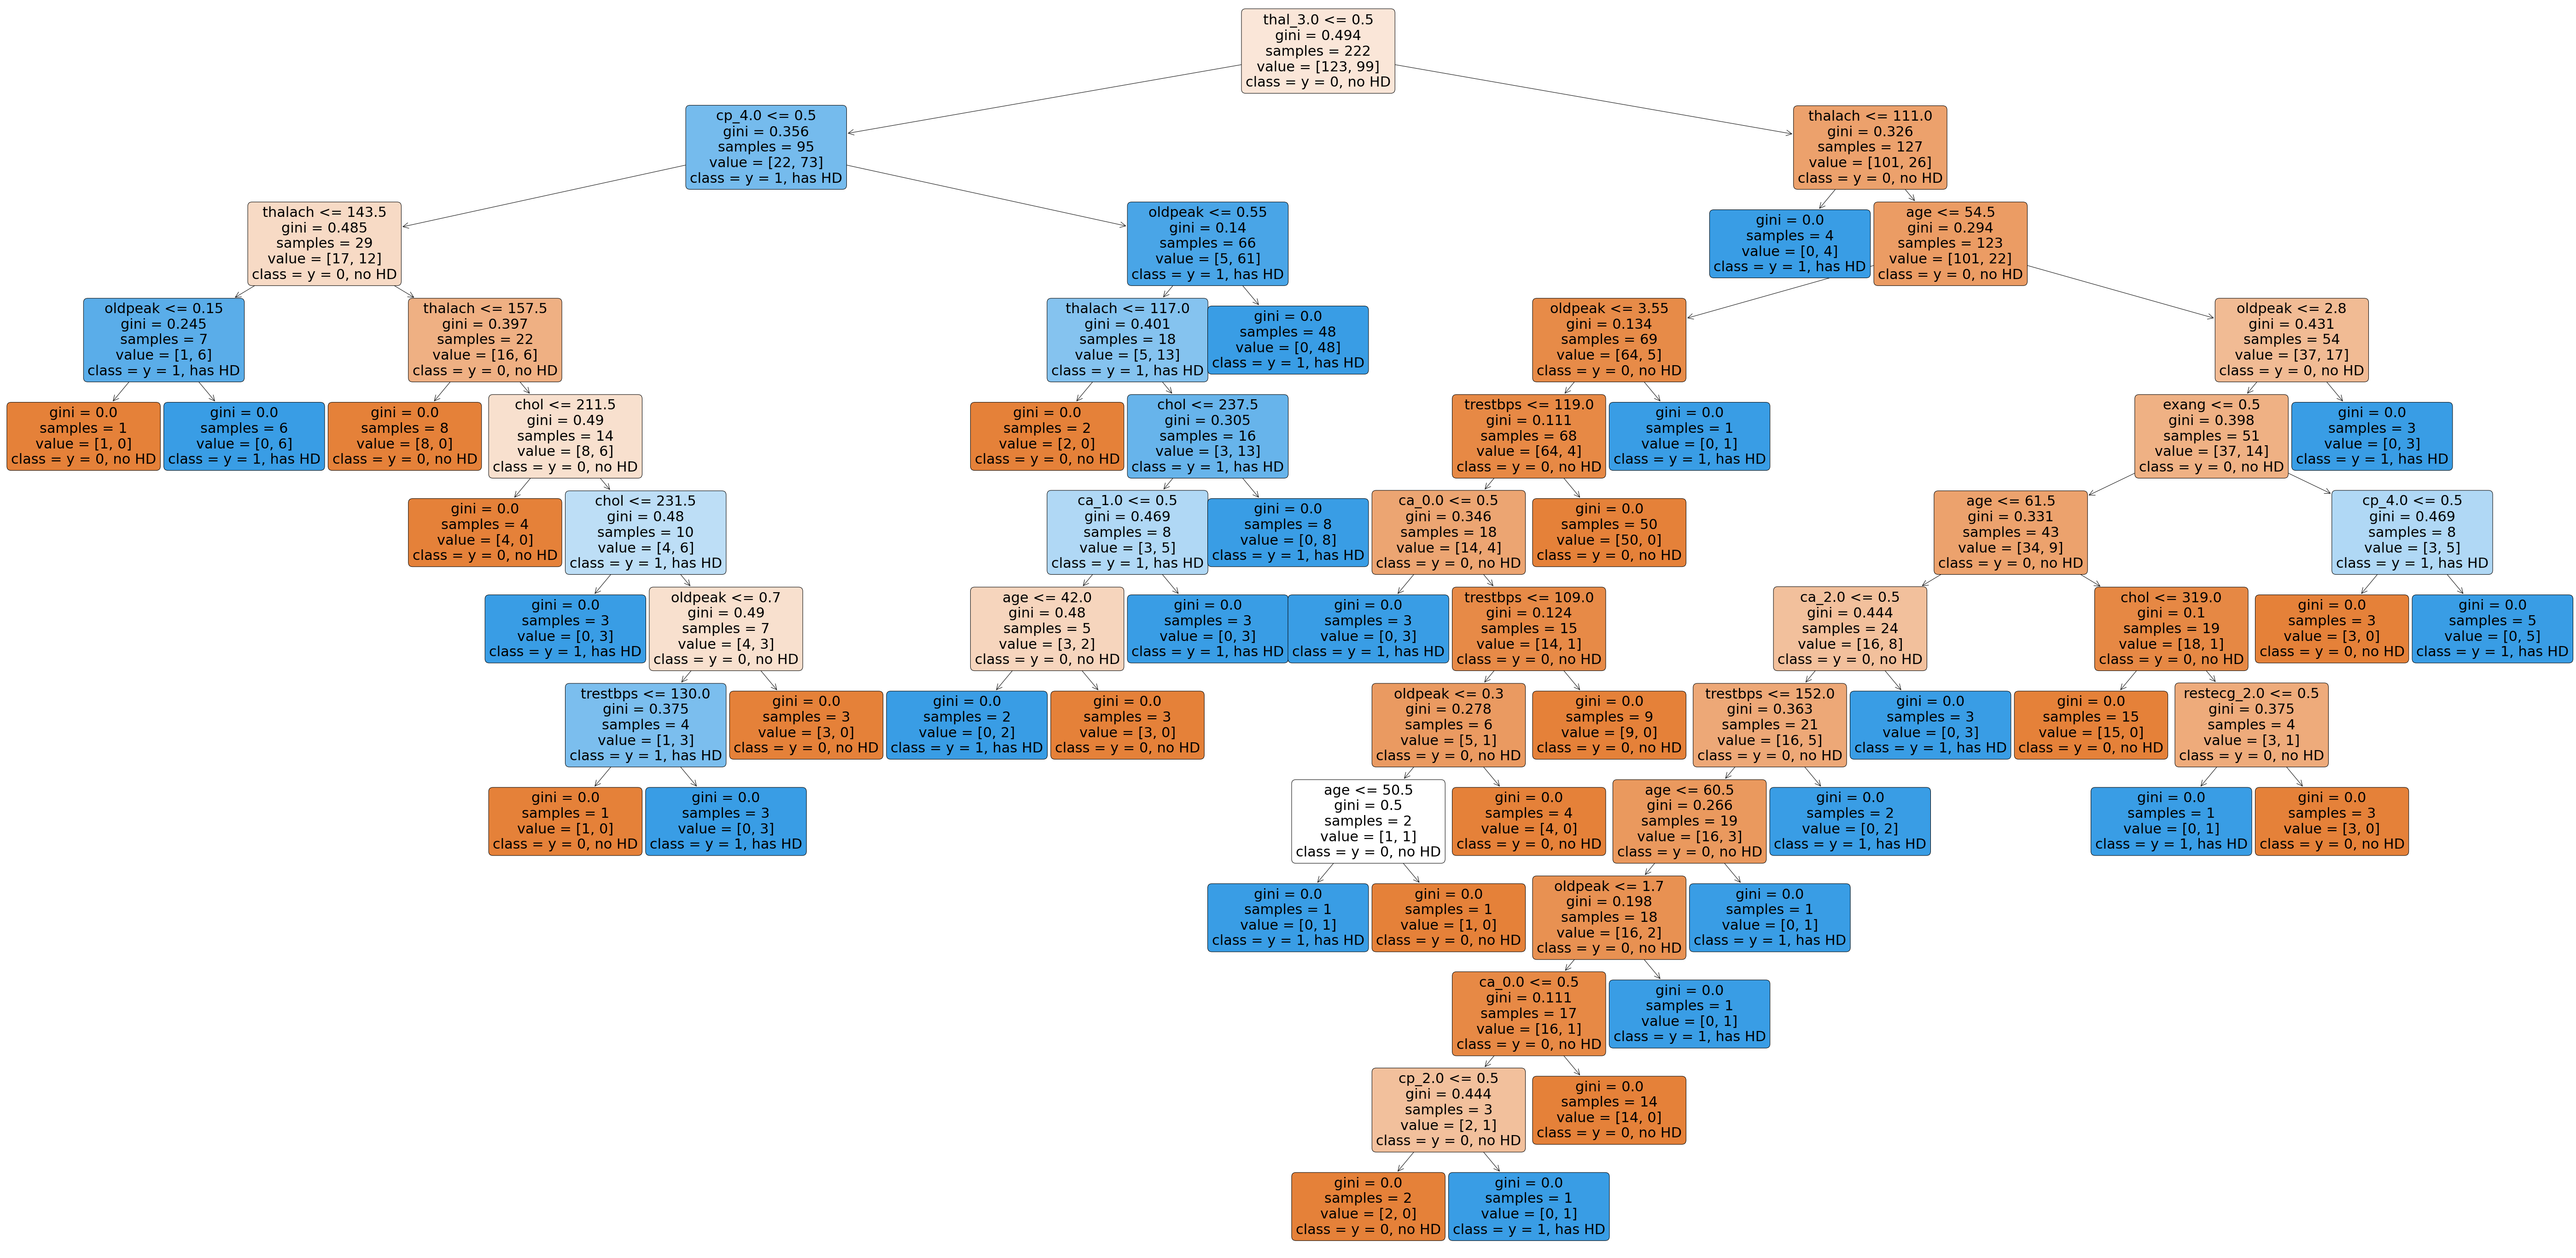

In [ ]:
plt.figure(figsize = (100,50))
plot_tree(tree,filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);

So we have a tree, for each node, it shows the value that it uses to differentiate, the gini, samples (for some reason the beginning samples are 222 - the rest must be testing data), value (?? but must be how many yes/no are in this node) and class (that must only be important for leaf nodes). The bottom leaf samples are too small.

## Let's look at the testing data.

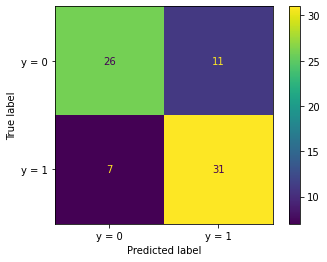

In [ ]:
plot_confusion_matrix(tree,x_test,y_test,display_labels=["y = 0", "y = 1"]);

#DID HE SAY COST COMPLEXITY PRUNING?

In [ ]:
path = tree.cost_complexity_pruning_path(x_train,y_train) #determine values for alpha
display(path)
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1] # we don't like the last one since it's just the root and so far away from the others
trees = []
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha=alpha)
  tree.fit(x_train,y_train)
  trees.append(tree)

len(trees)


{'ccp_alphas': array([0.        , 0.0028028 , 0.00423953, 0.00426743, 0.00675676,
        0.00714027, 0.00731982, 0.00743243, 0.00772201, 0.00884521,
        0.00983654, 0.01093872, 0.01112417, 0.01360922, 0.01602893,
        0.01633967, 0.02353265, 0.04729341, 0.15557588]),
 'impurities': array([0.        , 0.00840841, 0.01688748, 0.02542233, 0.03217908,
        0.04645962, 0.06841908, 0.08328394, 0.09100595, 0.10869637,
        0.12836945, 0.16118562, 0.19455812, 0.23538577, 0.2514147 ,
        0.26775437, 0.29128703, 0.33858044, 0.49415632])}

18

We have ourselves 21 trees! Also, in the Youtube video he said first to use all the data (so both training and testing) to make the bunch of trees, but here we are only using training data... I like it better, to be honest.

P.S. ccp means Cost Complexity Pruning.

Now we will find how well each tree does.

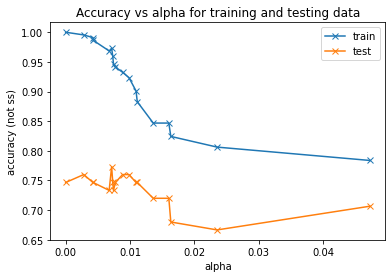

In [ ]:
train_scores = [tree.score(x_train,y_train) for tree in trees] # we need to give it x_train/y_train again because this MODEL can be used on any data
test_scores = [tree.score(x_test,y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy (not ss)")
ax.set_title("Accuracy vs alpha for training and testing data")
ax.plot(ccp_alphas,train_scores,label="train",marker="x")
ax.plot(ccp_alphas,test_scores,label="test",marker="x")
ax.legend()
plt.show()

This was just to see that we can do better and yes! The accuracy on the test data goes up (at first) if we have non-zero alpha.

## Now let's do cross-validation

First let's see if choosing alpha = 0.005 is best (like above) using cross-validation.

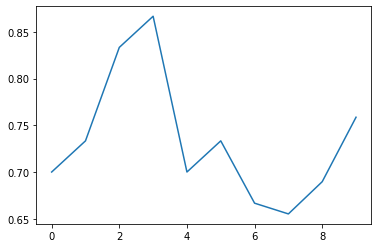

(0.7336781609195402, 0.06565029844428552)

In [ ]:
tree = DecisionTreeClassifier(ccp_alpha = 0.005)
scores = cross_val_score(tree,X_encoded,y,cv=10)
plt.plot(scores)
plt.show()
scores.mean(),scores.std()

Looks like sometimes it's really good, sometimes it's really bad!

So now we are going to find the best alpha where this doesn't happen:

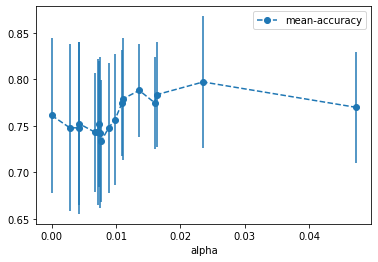

In [ ]:
alphaResults = {}
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha = alpha)
  scores = cross_val_score(tree,x_train,y_train,cv=10) #he's a chicken and only using x_train again, I think he must have misspoken in the video
  alphaResults[alpha] = [scores.mean(),scores.std()]
df = pd.DataFrame(alphaResults).T
df.columns = ['mean-accuracy','stdev']
df.index.name = 'alpha'
df.plot(y='mean-accuracy',yerr='stdev',marker='o',linestyle='--')

That all looks really bad. How do we know which alpha is the best?

If we don't want less than 0.7 accuracy, we will choose alpha = 0.016. If we want to be adventurers, we will take alpha = 0.013.

In [ ]:
ccp_alphas

array([0.        , 0.0028028 , 0.00423953, 0.00426743, 0.00675676,
       0.00714027, 0.00731982, 0.00743243, 0.00772201, 0.00884521,
       0.00983654, 0.01093872, 0.01112417, 0.01360922, 0.01602893,
       0.01633967, 0.02353265, 0.04729341])

Let's take alpha = 0.01546907

In [ ]:
alphaResults

{0.0: [0.7612648221343874, 0.08334111833321259],
 0.0028028028028028035: [0.7480237154150198, 0.08991226123174206],
 0.004239533651298358: [0.7478260869565218, 0.09249856385212554],
 0.004267425320056901: [0.7523715415019764, 0.08791268237597473],
 0.006756756756756757: [0.7430830039525692, 0.06428243465332253],
 0.007140267202186706: [0.7432806324110672, 0.07836884195519522],
 0.0073198198198198205: [0.7521739130434784, 0.06773901004483396],
 0.007432432432432431: [0.7428853754940712, 0.08144330878046915],
 0.007722007722007724: [0.7339920948616602, 0.06585625522952722],
 0.008845208845208846: [0.7478260869565216, 0.07030241795831321],
 0.009836541086541079: [0.7567193675889328, 0.07043701171596782],
 0.010938723301024402: [0.7747035573122529, 0.057325880893038104],
 0.011124167645906777: [0.7792490118577075, 0.06542695996970856],
 0.013609216451593714: [0.7881422924901186, 0.050360757004367006],
 0.016028931016559167: [0.7747035573122529, 0.04959647506800313],
 0.016339671512085305: 

That means we are ok with 0.64 to 0.92 accuracy.

In [ ]:
chosen = 0.01546907062805828

Now we get THE ANSWER:

In [ ]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=chosen)
scores = cross_val_score(pruned_tree,X_encoded,y)
scores

array([0.73333333, 0.9       , 0.79661017, 0.74576271, 0.74576271])

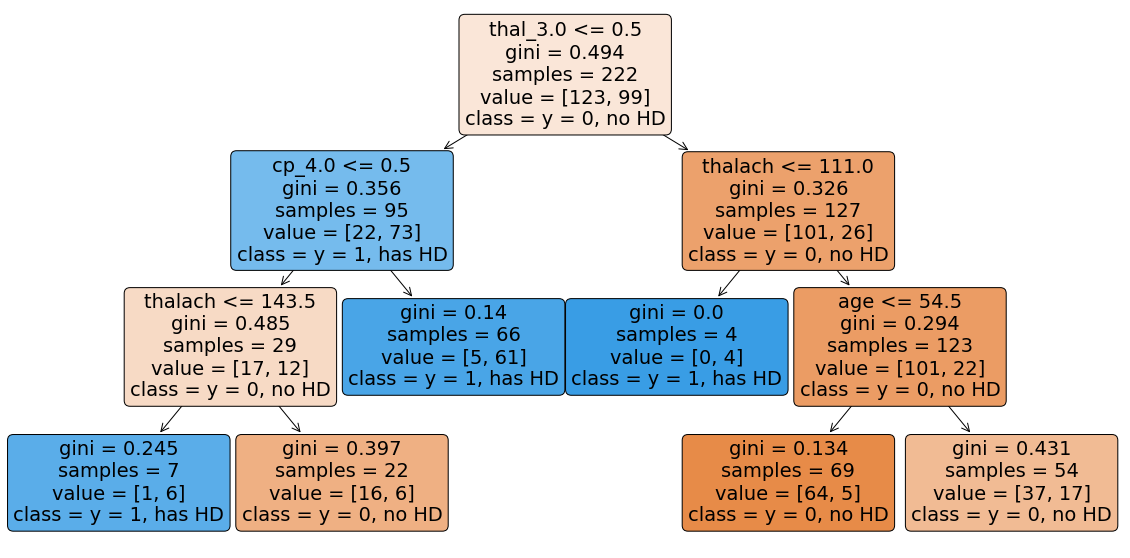

In [ ]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=chosen)
pruned_tree.fit(x_train,y_train)
plt.figure(figsize=(20,10))
plot_tree(pruned_tree,filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);


Ok, let's see how well it does:

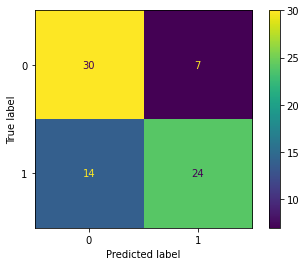

In [ ]:
plot_confusion_matrix(pruned_tree,x_test,y_test)

## We do worse than before COST COMPLEXITY PRUNING!!

The sensitivity is 24/34 = 0.706 and the specificity is 31/41 = 0.756. Before, the sensitivity was 28/34 = 0.824 and the specificity was 30/41 = 0.732.

In [ ]:
30/41

0.7317073170731707

I'll see what he does but here is what I want to do:
Take the data and divide it into 10 pieces.
For each of the 10 times we have a training/testing set, I want to do the following:

1.   Find 20 trees to look at (no need to also keep the alphas).
2.   Write a dictionary with each of the 20 trees as the key and two things as the value: the accuracy for that test set AND its confusion matrix.

In the end, we will have 10 dictionaries with 20 trees each. I want to combine them into one dictionary (a lot of trees will be the same so maybe 25-30 trees). Each will have the average of the accuracies as well as the average of the confusion matrices as values (missing accuracies count as 0, missing confusion matrices -- I don't know yet). Then we just find the tree with the best accuracy and report its average confusion matrix as output.



The disadvantage is we don't have test data to point at but it is true that the model was tested.

Maybe because missing accuracies are 0, missing confusion matrices should be all wrong. Hopefully it's not too important. We don't want to look at all the 10 training/testing sets and get the dictionaries connected too early because that could do something (I'm not sure what). Actually, it's probably fine.

Part of the problem is also that we look at specificity and sensitivity the same. We should probably pull sensitivity rather than accuracy.

# Let's do it!

In [ ]:
nr_folds = 10
kf = KFold(n_splits=nr_folds,shuffle=True)
list_of_dicts = []
for result in kf.split(X_encoded):
  x_train, x_test = X_encoded.iloc[result[0]], X_encoded.iloc[result[1]]
  y_train, y_test = y.iloc[result[0]], y.iloc[result[1]]
  path = tree.cost_complexity_pruning_path(x_train,y_train)
  ccp_alphas = path.ccp_alphas
  ccp_alphas = ccp_alphas[:-1]
  trees = {}
  for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha)
    tree.fit(x_train,y_train)
    score = tree.score(x_test,y_test)
    y_predicted = tree.predict(x_test)
    conf_matr = confusion_matrix(y_test.to_list(),y_predicted.tolist())
    trees[tree.tree_] = [score,conf_matr,tree]
  list_of_dicts.append(trees)

In [ ]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [ ]:
list(list_of_dicts[0].keys())[1].feature

array([22, 11,  5,  7, 21, -2, -2, -2,  2,  7, 15, 19,  0,  9, -2, -2, -2,
       -2, -2,  2, -2, -2, -2,  7,  5,  3, -2,  2, -2, -2, 18, -2,  0, -2,
       12, -2, -2, 24,  0,  2, 14, -2, -2, -2, -2, -2,  5, 11, -2, -2,  0,
        7,  2, 18,  1, -2, -2,  5,  5, -2, -2, -2, -2, -2,  7,  6,  0,  2,
       20,  7,  0, 18,  3, -2, -2, -2, -2, -2, -2, -2,  3, -2, 12, -2, -2,
       11, -2,  3, -2, -2, -2])

In [ ]:
master = {}
for tree_dict in list_of_dicts:
  master = {**master, **tree_dict}
tree_set = set()
for tree in master:
  tree_set.add(np.array2string(tree.feature))
tree_set

{'[11  0 -2  1 -2  3 -2 -2 18 -2 24 -2 -2]',
 '[11  0 -2  1 -2 -2 18 -2 24 -2 -2]',
 '[11  0 -2 -2 18 -2 24 -2 -2]',
 '[11  0 21  2  7 -2 -2 -2 -2  1  0 -2 -2  3  7 18  0  5 -2 -2 -2  0 -2 -2\n -2 17 -2 -2 18  7  5 -2  1 -2 -2 -2 24  3  6  5 -2 -2 12 -2  2 -2 -2 12\n -2  7 -2 -2  7  0 -2  3 -2 -2 -2]',
 '[11  0 21  2  7 -2 -2 -2 -2  1 -2  3  7 18  0  3 -2 -2 -2  0 -2 -2 -2 17\n -2 -2 18 -2 24  3  0  3 -2 -2  6  5 -2 -2 -2 -2  7  0 -2  3 -2 -2 -2]',
 '[11  0 21  2  7 -2 -2 -2 -2  1 -2  3  7 18  0 -2 -2  0 -2 -2 -2 17 -2 -2\n 18 -2 24  3  0 17 -2 -2  6 -2 -2 -2  7  0 -2 -2 -2]',
 '[11  0 21  2  7 23  2 17  3 -2  9 -2 -2 -2 -2 19 -2 -2 -2 -2 -2  1  0 -2\n  0 18  2 -2 -2 -2 -2  3  7 18  0  5 -2 -2 -2  0 -2 -2 -2  7 -2 -2 18  7\n  5 -2  1 -2  2  5 -2 -2 -2  3 -2  3 -2 -2 24  3  6  5 -2 -2 14  2 -2 -2\n -2 12 -2 23 -2 -2  7  0 -2  1 -2 -2 -2]',
 '[11  0 21  2  7 23  2 17 -2 -2 -2  7 -2 -2 -2 -2 -2  1  0 -2  0  5  5 -2\n -2 -2 -2  3  7 18  0  3 -2 -2 -2  0 -2 -2 -2  7 -2 -2 18  7  5 -2  1 -2\

I have to say, I can't believe that there are almost as many different trees as there are trees overall. I thought there would be 25-30 trees, NO THERE ARE 260 TREES!

In [ ]:
master = {}
for tree_dict in list_of_dicts:
  temp = copy.deepcopy(tree_dict) #WOW I need to do this
  master = {**master, **temp}

In [ ]:
tree_set = set()
score_dict = {}
temp_master = copy.deepcopy(master)
for tree in temp_master:
  if np.array2string(tree.feature) in tree_set:
    #what to do here, I don't know
    pass
  else:
    tree_set.add(np.array2string(tree.feature))
    score_dict[tree] = temp_master[tree]

Let's order by accuracy first.

In [ ]:
sorted(score_dict.items(), key=lambda item: item[1][0],reverse=True)

[(<sklearn.tree._tree.Tree at 0x7f006d5f69d0>,
  [0.9333333333333333, array([[18,  1],
          [ 1, 10]]), DecisionTreeClassifier(ccp_alpha=0.0035372451102788187, class_weight=None,
                          criterion='gini', max_depth=None, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          presort='deprecated', random_state=None,
                          splitter='best')]),
 (<sklearn.tree._tree.Tree at 0x7f006d8af180>,
  [0.9333333333333333, array([[18,  1],
          [ 1, 10]]), DecisionTreeClassifier(ccp_alpha=0.0035372451102788187, class_weight=None,
                          criterion='gini', max_depth=None, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_le

Now let's sort by sensitivity.

In [ ]:
this_one = sorted(score_dict.items(), key=lambda item: item[1][1][1][1]/(item[1][1][1][0]+item[1][1][1][1]),reverse=True)[0]
this_one

(<sklearn.tree._tree.Tree at 0x7f006d52f5e0>,
 [0.8275862068965517, array([[13,  4],
         [ 1, 11]]), DecisionTreeClassifier(ccp_alpha=0.011371712864250181, class_weight=None,
                         criterion='gini', max_depth=None, max_features=None,
                         max_leaf_nodes=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=1,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         presort='deprecated', random_state=None,
                         splitter='best')])

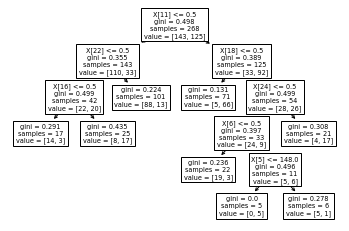

In [ ]:
plot_tree(this_one[1][2]);

That's really bad. Let's do accuracy again!

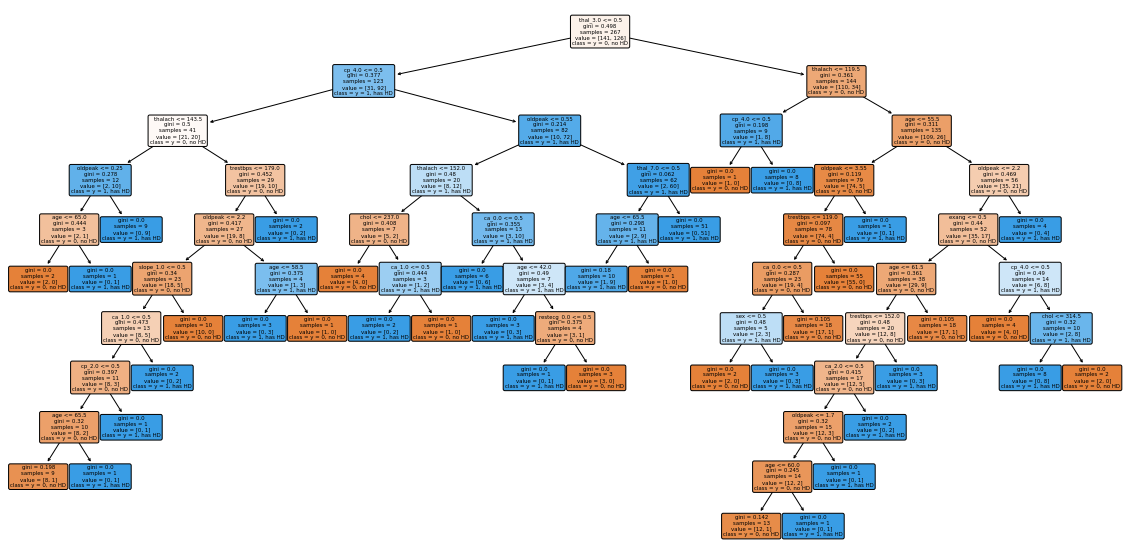

In [ ]:
no_this_one = sorted(score_dict.items(), key=lambda item: item[1][0],reverse=True)[0];
plt.figure(figsize = (20,10))
plot_tree(no_this_one[1][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);

And confusion matrix


In [ ]:
no_this_one[1][1]

array([[18,  1],
       [ 1, 10]])

Specificity is 100%, sensitivity is 12/16 = 0.75.

But we had sooooo many different trees, it could have just be luck.

The idea is to look at the trees that are in common. There are about 30 of them. Then do what I originally said, and add the accuracies of them. Let's first look at them.

In [ ]:
tree_set = set()
in_more_than_one_fold = {}
temp_master = copy.deepcopy(master)
for tree,values in temp_master.items():
  if np.array2string(tree.feature) in tree_set:
    in_more_than_one_fold[tree] = values
  else:
    tree_set.add(np.array2string(tree.feature))

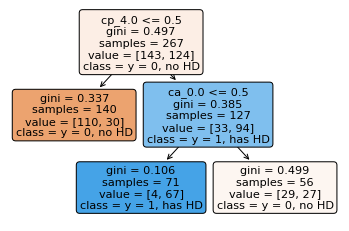

In [ ]:
plot_tree(list(in_more_than_one_fold.values())[7][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);


**So** the trees look great. Let's do what we originally wanted to do. For trees that were not in a fold, let's use accuracy = 0.5:

In [ ]:
tree_set = set()
score_dict = {}
temp_master = copy.deepcopy(master)
for tree in temp_master:
  if np.array2string(tree.feature) in tree_set:
    for key in score_dict:
      if np.array2string(key.feature) == np.array2string(tree.feature):
        found = key
    if not found:
      raise Exception
    score_dict[found][0] = score_dict[found][0] + temp_master[tree][0] # this is the accuracy
    #we won't look at the confusion matrix for now
  else:
    tree_set.add(np.array2string(tree.feature))
    score_dict[tree] = temp_master[tree]

We just added the ones that were in more than one fold, without adding 0.5 for the other ones.

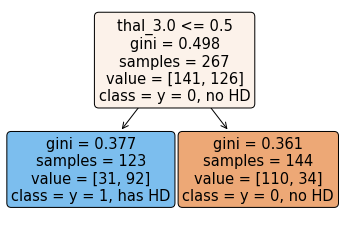

In [ ]:
sorted_scores = sorted(score_dict.items(), key=lambda item: item[1][0],reverse=True);
nr_1 = sorted_scores[0]
plot_tree(nr_1[1][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);

In [ ]:
nr_1

(<sklearn.tree._tree.Tree at 0x7f006d8d1030>,
 [5.081609195402299, array([[17,  2],
         [ 3,  8]]), DecisionTreeClassifier(ccp_alpha=0.03118053652446634, class_weight=None,
                         criterion='gini', max_depth=None, max_features=None,
                         max_leaf_nodes=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=1,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         presort='deprecated', random_state=None,
                         splitter='best')])

We are not surprised at this answer. We really should have added 0.5. To do so, we need a counter.

In [ ]:
master = {}
for tree_dict in list_of_dicts:
  temp = copy.deepcopy(tree_dict) #WOW I need to do this
  master = {**master, **temp}
tree_set = set()
score_dict = {}
temp_master = copy.deepcopy(master)
for tree in temp_master:
  if np.array2string(tree.feature) in tree_set:
    for key in score_dict:
      if np.array2string(key.feature) == np.array2string(tree.feature):
        found = key
    if not found:
      raise Exception
    score_dict[found][0] += temp_master[tree][0] # this is the accuracy
    #we won't look at the confusion matrix for now
    score_dict[found][3] += 1
  else:
    tree_set.add(np.array2string(tree.feature))
    score_dict[tree] = temp_master[tree]
    counter = 1
    score_dict[tree].append(counter)

for tree in score_dict:  # add 0.5
  score_dict[tree][0] = (score_dict[tree][0] + 0.5 * (nr_folds - score_dict[tree][3]))/nr_folds

In [ ]:
sorted_scores = sorted(score_dict.values(), key=lambda value: value[0],reverse=True);
sorted_scores

[[0.6581609195402299, array([[17,  2],
         [ 3,  8]]), DecisionTreeClassifier(ccp_alpha=0.03118053652446634, class_weight=None,
                         criterion='gini', max_depth=None, max_features=None,
                         max_leaf_nodes=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=1,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         presort='deprecated', random_state=None,
                         splitter='best'), 7],
 [0.5933333333333334, array([[19,  0],
         [ 4,  7]]), DecisionTreeClassifier(ccp_alpha=0.030642252739631004, class_weight=None,
                         criterion='gini', max_depth=None, max_features=None,
                         max_leaf_nodes=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=1,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         p

In [ ]:
for value in sorted_scores:
  if (value[0] > 1) or (value[0]<0):
    print("Hello")
    print(b)
    plot_tree(b[2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);


Nothing with accuracy over 1 or under 0.

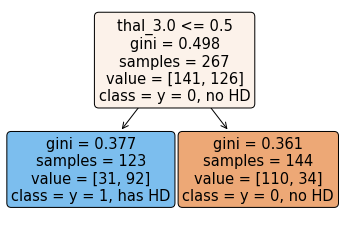

In [ ]:
plot_tree(sorted_scores[0][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);


The problem is it's still in the first place ...

If a tree is not part of list_of_trees for a fold, we can say for sure that it's not the best tree or part of the best tree. But we don't know that it's accuracy would have been 0.5. We COULD go and evaluate it's performance. The problem is that if we do this for 260 trees, we will get a tree that does really well on all folds but is completely overfit.

In [ ]:
sorted_scores

[[0.6581609195402299, array([[17,  2],
         [ 3,  8]]), DecisionTreeClassifier(ccp_alpha=0.03118053652446634, class_weight=None,
                         criterion='gini', max_depth=None, max_features=None,
                         max_leaf_nodes=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=1,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         presort='deprecated', random_state=None,
                         splitter='best'), 7],
 [0.5933333333333334, array([[19,  0],
         [ 4,  7]]), DecisionTreeClassifier(ccp_alpha=0.030642252739631004, class_weight=None,
                         criterion='gini', max_depth=None, max_features=None,
                         max_leaf_nodes=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=1,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         p

Looking at the best and second-best tree, it does seem that the second-best tree actually has a much better confusion matrix.

We could look at all trees that are part of at least 3 folds (?).

In [ ]:
three_folds = [value for value in sorted_scores if value[3]>2]

The problem is if we now run them through each fold and then take the one with the highest accuracy, we are fitting to the testing set.

We could use the smallest tree's performance as base-line for what it should be if it's not part of a fold. But then every tree with one great result and nothing else (monster tree) would get a really high result. It seems like we have to do cross-validation to find the best result for what the baseline should be. Or we could look at all possible baselines and take all the trees that (at some point) were at the top (for some baseline).



In [ ]:
master = {}
for tree_dict in list_of_dicts:
  temp = copy.deepcopy(tree_dict) #WOW I need to do this
  master = {**master, **temp}
tree_set = set()
score_dict = {}
temp_master = copy.deepcopy(master)
for tree in temp_master:
  if np.array2string(tree.feature) in tree_set:
    for key in score_dict:
      if np.array2string(key.feature) == np.array2string(tree.feature):
        found = key
    if not found:
      raise Exception
    score_dict[found][0] += temp_master[tree][0] # this is the accuracy
    #we won't look at the confusion matrix for now
    score_dict[found][3] += 1
  else:
    tree_set.add(np.array2string(tree.feature))
    score_dict[tree] = temp_master[tree]
    counter = 1
    score_dict[tree].append(counter)

baselines = [0.5 + 0.5*i/1000 for i in range(1000)]
output = []
test = set()
for baseline in baselines:
  score_temp = copy.deepcopy(score_dict)
  for tree in score_temp: 
    score_temp[tree][0] = (score_temp[tree][0] + baseline * (nr_folds - score_temp[tree][3]))/nr_folds
  sorted_scores = sorted(score_temp.items(), key=lambda value: value[1][0],reverse=True)
  top_scorer = sorted_scores[0]
  if np.array2string(top_scorer[0].feature) not in test:
    test.add(np.array2string(top_scorer[0].feature))
    output.append(top_scorer)


In [ ]:
output

[(<sklearn.tree._tree.Tree at 0x7f006db29e30>,
  [0.6581609195402299, array([[17,  2],
          [ 3,  8]]), DecisionTreeClassifier(ccp_alpha=0.03118053652446634, class_weight=None,
                          criterion='gini', max_depth=None, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          presort='deprecated', random_state=None,
                          splitter='best'), 7]),
 (<sklearn.tree._tree.Tree at 0x7f006d84e3b0>,
  [0.7014068965517242, array([[16,  1],
          [ 1, 11]]), DecisionTreeClassifier(ccp_alpha=0.019146285379823567, class_weight=None,
                          criterion='gini', max_depth=None, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_le

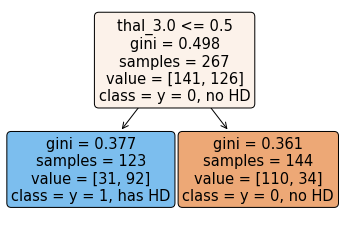

In [ ]:
plot_tree(output[0][1][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);


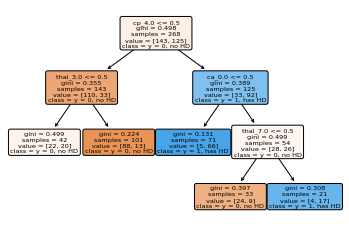

In [ ]:
plot_tree(output[1][1][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);


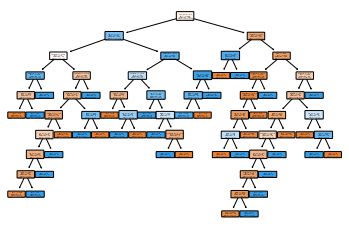

In [ ]:
plot_tree(output[2][1][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);


In [ ]:
plot_tree(output[3][1][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);


IndexError: ignored

If we now also add that the tree has to appear in at least three folds, we have two winners:

In [ ]:
output[0:2]

Let's now also bring the average confusion matrix into it.

In [ ]:
master = {}
for tree_dict in list_of_dicts:
  temp = copy.deepcopy(tree_dict) #WOW I need to do this
  master = {**master, **temp}
tree_set = set()
score_dict = {}
temp_master = copy.deepcopy(master)
for tree in temp_master:
  if np.array2string(tree.feature) in tree_set:
    for key in score_dict:
      if np.array2string(key.feature) == np.array2string(tree.feature):
        found = key
    if not found:
      raise Exception
    score_dict[found][0] += temp_master[tree][0] # this is the accuracy
    corr_total = temp_master[tree][1][0][0]+temp_master[tree][1][0][1]+temp_master[tree][1][1][0]+temp_master[tree][1][1][1]
    score_dict[found][1][0][0] =score_dict[found][3]*score_dict[found][1][0][0] + temp_master[tree][1][0][0]/corr_total
    score_dict[found][1][1][0] =score_dict[found][3]*score_dict[found][1][1][0] + temp_master[tree][1][1][0]/corr_total
    score_dict[found][1][0][1] =score_dict[found][3]*score_dict[found][1][0][1] + temp_master[tree][1][0][1]/corr_total
    score_dict[found][1][1][1] =score_dict[found][3]*score_dict[found][1][1][1] + temp_master[tree][1][1][1]/corr_total
    score_dict[found][1][0][0] /= score_dict[found][3]+1
    score_dict[found][1][1][0] /= score_dict[found][3]+1
    score_dict[found][1][0][1] /= score_dict[found][3]+1
    score_dict[found][1][1][1] /= score_dict[found][3]+1
    score_dict[found][3] += 1
  else:
    tree_set.add(np.array2string(tree.feature))
    score_dict[tree] = temp_master[tree]
    corr_total = temp_master[tree][1][0][0]+temp_master[tree][1][0][1]+temp_master[tree][1][1][0]+temp_master[tree][1][1][1]
    score_dict[tree][1] = score_dict[tree][1].astype(float)
    score_dict[tree][1][0][0] /= corr_total
    score_dict[tree][1][1][0] /= corr_total
    score_dict[tree][1][0][1] /= corr_total
    score_dict[tree][1][1][1] /= corr_total
    counter = 1
    score_dict[tree].append(counter)

baselines = [0.5 + 0.5*i/100 for i in range(100)]
output = []
test = set()
for baseline in baselines:
  score_temp = copy.deepcopy(score_dict)
  for tree in score_temp: 
    score_temp[tree][0] = (score_temp[tree][0] + baseline * (nr_folds - score_temp[tree][3]))/nr_folds
  sorted_scores = sorted(score_temp.items(), key=lambda value: value[1][0],reverse=True)
  top_scorer = sorted_scores[0]
  if np.array2string(top_scorer[0].feature) not in test:
    test.add(np.array2string(top_scorer[0].feature))
    output.append(top_scorer)

In [ ]:
output

[(<sklearn.tree._tree.Tree at 0x7f006dbabf80>,
  [0.6581609195402299, array([[0.40361248, 0.13021346],
          [0.14384236, 0.32233169]]), DecisionTreeClassifier(ccp_alpha=0.03118053652446634, class_weight=None,
                          criterion='gini', max_depth=None, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          presort='deprecated', random_state=None,
                          splitter='best'), 7]),
 (<sklearn.tree._tree.Tree at 0x7f006d64fc00>,
  [0.7022068965517241, array([[0.55172414, 0.03448276],
          [0.03448276, 0.37931034]]), DecisionTreeClassifier(ccp_alpha=0.019146285379823567, class_weight=None,
                          criterion='gini', max_depth=None, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
 

Ok, now only take the ones that appear at least in 3 folds.

In [ ]:
output[0:2]

I'm not really ready to say which one is better but if the second one is better, then let's use cross-validation to get it's performance.

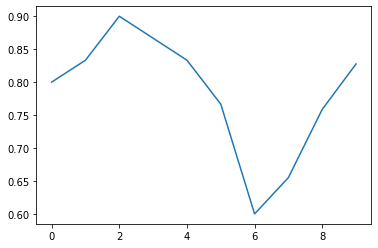

(0.7841379310344827, 0.0887186571816653)

In [ ]:
tree = output[1][1][2]
scores = cross_val_score(tree,X_encoded,y,cv=10)
plt.plot(scores)
plt.show()
scores.mean(),scores.std()

Or we could use the other one:

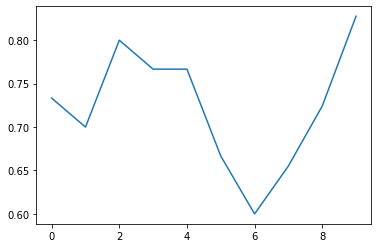

(0.7240229885057471, 0.06649094955980885)

In [ ]:
tree = output[0][1][2]
scores = cross_val_score(tree,X_encoded,y,cv=10)
plt.plot(scores)
plt.show()
scores.mean(),scores.std()

Or not!

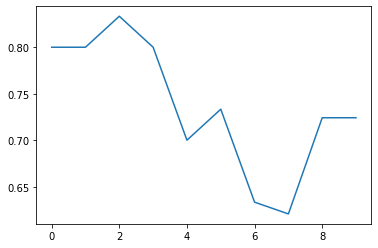

(0.7368965517241379, 0.06868419633943097)

In [ ]:
tree = output[2][1][2]
scores = cross_val_score(tree,X_encoded,y,cv=10)
plt.plot(scores)
plt.show()
scores.mean(),scores.std()

In [ ]:
tree = output[3][1][2]
scores = cross_val_score(tree,X_encoded,y,cv=10)
plt.plot(scores)
plt.show()
scores.mean(),scores.std()

Here's the final model!!!

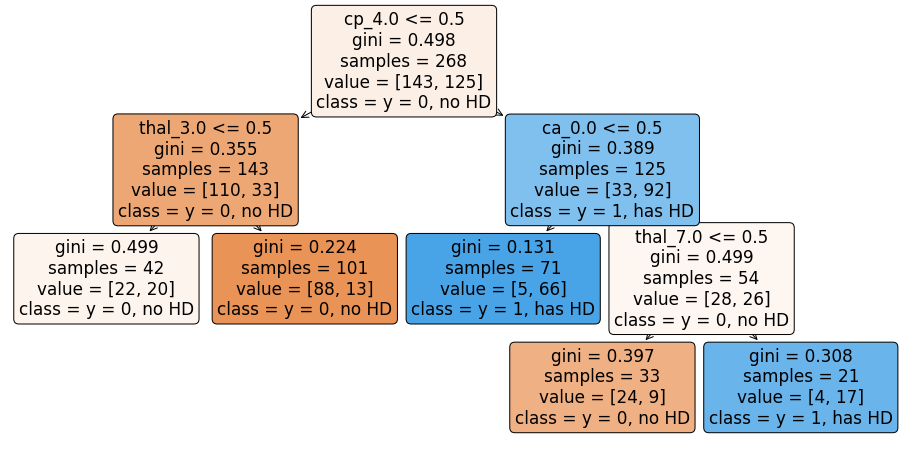

In [ ]:
plt.figure(figsize = (16,8))
plot_tree(output[1][1][2],filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);

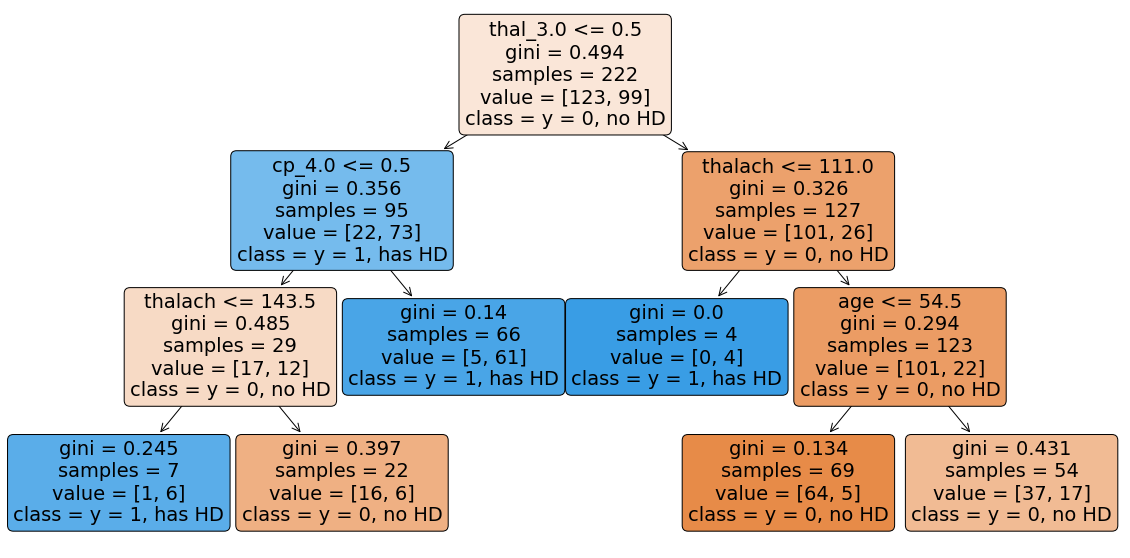

In [ ]:
plt.figure(figsize = (20,10))
plot_tree(pruned_tree,filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=X_encoded.columns);

Very, very nice!

## Now let's run it against Dr. Mr. Man's model Statquest to see who got the best one!

0.7808045977011494

0.08484448325621652

0.7841379310344827

0.0887186571816653

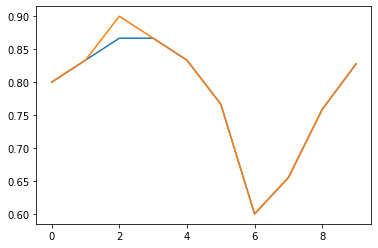

In [ ]:
tree = pruned_tree
scores = cross_val_score(tree,X_encoded,y,cv=10)
plt.plot(scores)
display(scores.mean(),scores.std())
tree = output[1][1][2]
scores = cross_val_score(tree,X_encoded,y,cv=10)
plt.plot(scores)
display(scores.mean(),scores.std())
plt.show()


The first one must be blue, the second one must be yellow! So I win!!!

Let's try to do SR3

In [ ]:
X_encoded

age  sex  trestbps   chol  ...  ca_3.0  thal_3.0  thal_6.0  thal_7.0
0    63.0  1.0     145.0  233.0  ...       0         0         1         0
1    67.0  1.0     160.0  286.0  ...       1         1         0         0
2    67.0  1.0     120.0  229.0  ...       0         0         0         1
3    37.0  1.0     130.0  250.0  ...       0         1         0         0
4    41.0  0.0     130.0  204.0  ...       0         1         0         0
..    ...  ...       ...    ...  ...     ...       ...       ...       ...
297  57.0  0.0     140.0  241.0  ...       0         0         0         1
298  45.0  1.0     110.0  264.0  ...       0         0         0         1
299  68.0  1.0     144.0  193.0  ...       0         0         0         1
300  57.0  1.0     130.0  131.0  ...       0         0         0         1
301  57.0  0.0     130.0  236.0  ...       0         1         0         0

[297 rows x 25 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded,y)

In [ ]:
A,b = x_train,y_train #using the paper's names
alpha = 0.016 #we use this, not lambda
kappa = 1.0
H_kappa = (A.T).dot(A);
for i in H_0.columns:
  H_kappa.at[i,i] += kappa
H_kappa_inv = pd.DataFrame(np.linalg.pinv(H_kappa.values), H_kappa.columns, H_kappa.index)
F_kappa_1 = A.dot(H_kappa_inv)
F_kappa_1.applymap(lambda x: x*kappa)
F_kappa_2 = H_kappa_inv.applymap(lambda x: -x*kappa)
for i in F_kappa_2.columns:
  F_kappa_2.at[i,i] += 1.0
F_kappa_2.applymap(lambda x: x*np.sqrt(kappa))
F_kappa = F_kappa_1.append(F_kappa_2)
G_kappa_1 = A.dot(H_kappa_inv.dot(A.T))
G_kappa_1.applymap(lambda x: -x)
for i in G_kappa_1.columns:
  G_kappa_1.at[i,i] += 1.0
G_kappa_2 = H_kappa_inv.dot(A.T)
G_kappa_2.applymap(lambda x: x*np.sqrt(kappa))
G_kappa = G_kappa_1.append(G_kappa_2)
g_kappa = G_kappa.dot(b)
#now we use g_kappa as y_train and F_kappa as x_train
g_kappa


(25, 222)
(25, 222)


In [ ]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(F_kappa,g_kappa) #determine values for alpha
display(path)
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1] # we don't like the last one since it's just the root and so far away from the others
trees = []
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha=alpha)
  tree.fit(x_train,y_train)
  trees.append(tree)

len(trees)

{'ccp_alphas': array([0.00000000e+00, 8.29901001e-10, 9.59602794e-10, 1.49636578e-09,
        1.77055009e-09, 2.05624682e-09, 3.70918317e-09, 3.84341676e-09,
        9.68614920e-09, 1.12436273e-08, 1.23422168e-08, 2.13627847e-08,
        2.36104869e-08, 2.49730720e-08, 2.61709945e-08, 2.61827689e-08,
        4.03674523e-08, 4.05421202e-08, 4.26592050e-08, 4.41781461e-08,
        5.30458078e-08, 6.67938372e-08, 7.75565511e-08, 7.80882804e-08,
        9.13406939e-08, 9.50493510e-08, 9.58873616e-08, 9.69593948e-08,
        1.13097060e-07, 1.29652768e-07, 1.31803430e-07, 1.33659551e-07,
        1.35379281e-07, 1.36817473e-07, 1.37768194e-07, 1.48586248e-07,
        1.56350520e-07, 1.65472015e-07, 2.54902746e-07, 2.55028741e-07,
        2.93579449e-07, 2.94875978e-07, 3.07951825e-07, 3.29202566e-07,
        3.32655403e-07, 3.37136344e-07, 3.37983865e-07, 4.50888411e-07,
        5.23100215e-07, 5.27281848e-07, 5.28915792e-07, 5.41107391e-07,
        5.70305077e-07, 5.97760392e-07, 6.25168170

236

I'm disappointed. The trees can't predict rates, only 0 or 1. That's the biggest disadvantage of using trees. I'm using Regressor here.

I don't have test data in for g_kappa so I'm just going to use the same alpha as before.

The best alpha is 8.61762158e-03

In [ ]:
chosen = 0.01546907062805828
pruned_tree_2 = DecisionTreeRegressor(ccp_alpha=chosen)
pruned_tree_2.fit(F_kappa,g_kappa)

DecisionTreeRegressor(ccp_alpha=0.01546907062805828, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

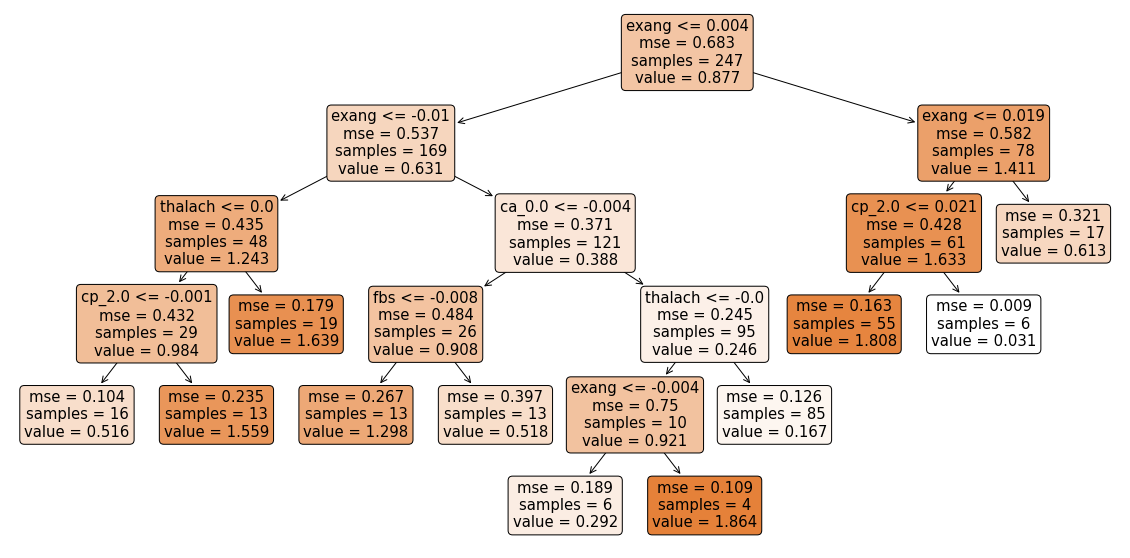

In [ ]:
plt.figure(figsize=(20,10))
sktree.plot_tree(pruned_tree_2,filled=True,rounded=True,feature_names=F_kappa.columns);


In [ ]:
pruned_tree_2.score(F_test,g_test)

-0.004123428443453259

H_kappa_inv is tiny and A.T dot b is huge! We need both together. The problem right now is the thresholds don't make any sense and neither do the predictions. So we just take the test data and put it in w space.

In [ ]:
F_test = x_test.dot(H_kappa_inv)
F_test.applymap(lambda x: x*kappa)
A_new = A.append(x_test)
g_test = A_new.dot(H_kappa_inv.dot(A_new.T))
g_test.applymap(lambda x: -x)
for i in g_test.columns:
  g_test.at[i,i] += 1.0
G_kappa_2 = H_kappa_inv.dot(A_new.T)
G_kappa_2.applymap(lambda x: x*np.sqrt(kappa))
g_test = g_test.append(G_kappa_2)
b_new = b.append(y_test)
g_test = g_test.dot(b_new)
g_kappa_2 = g_test[:len(g_test)-len(G_kappa_2)-len(y_test)]
temp = g_test[len(g_test)-len(G_kappa_2):]
g_kappa_2 = g_kappa_2.append(temp)
g_test = g_test[len(g_test)-len(G_kappa_2)-len(y_test):len(g_test)-len(G_kappa_2)]
g_kappa_2.shape

(247,)

In [ ]:
abc = pd.concat([g_kappa, g_kappa_2,g_kappa.subtract(g_kappa_2)], axis=1)
abc[3] = np.abs(abc[2]/abc[0])
abc.describe()

0           1           2           3
count  247.000000  247.000000  247.000000  247.000000
mean     0.877408    0.994357   -0.116948    0.670481
std      0.827851    0.931090    0.128145    2.613594
min     -0.219945   -0.273320   -0.414339    0.004028
25%      0.111415    0.116824   -0.198873    0.104021
50%      0.443526    0.565051   -0.095569    0.171122
75%      1.723772    1.901513   -0.011116    0.399353
max      2.263246    2.619266    0.134919   31.709987

We see that the test data really changed every element. This may only work for like leave-one-out cross validation where the test set is 1 element. The median change is 17% and the 50% range is 10% to 40%. So 25% changed more than 40%.

In [ ]:
g_test.describe()

count    75.000000
mean      1.014815
std       0.865633
min      -0.055208
25%       0.305483
50%       0.612096
75%       1.921070
max       2.520854
dtype: float64

Seems similar to g_kappa

In [ ]:
alphaResults = {}
for alpha in ccp_alphas:
  tree = DecisionTreeRegressor(ccp_alpha = alpha)
  scores = cross_val_score(tree,F_kappa,g_kappa,cv=10) #he's a chicken and only using x_train again, I think he must have misspoken in the video
  alphaResults[alpha] = [scores.mean(),scores.std()]
df = pd.DataFrame(alphaResults).T
df.columns = ['mean-accuracy','stdev']
df.index.name = 'alpha'


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(F_kappa, g_kappa)
g_cv.best_params_

result = g_cv.cv_results_
r2_score(g_test, g_cv.best_estimator_.predict(F_test))

{'min_samples_split': 8}
{'mean_fit_time': array([0.00579891, 0.00523524, 0.0052494 , 0.00493927, 0.00506225,
       0.0049818 , 0.00452271, 0.00453281]), 'std_fit_time': array([3.41243894e-04, 3.36611283e-04, 2.27162269e-04, 8.78711913e-05,
       3.66845537e-04, 4.72832587e-04, 1.41577891e-04, 1.70841844e-04]), 'mean_score_time': array([0.00153322, 0.00137725, 0.00136971, 0.00129547, 0.00141115,
       0.00127354, 0.00115576, 0.00118322]), 'std_score_time': array([1.65244228e-04, 7.66686240e-05, 7.07861509e-05, 8.76672086e-05,
       1.29712364e-04, 1.28973354e-04, 8.80455764e-05, 3.58330989e-05]), 'param_min_samples_split': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'min_samples_split': 2}, {'min_samples_split': 3}, {'min_samples_split': 4}, {'min_samples_split': 5}, {'min_samples_split': 6}, {'min_samples_split': 7}, {'min_samples_split': 8}, {'

0.04232126155877569

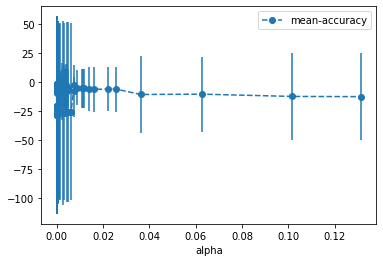

In [ ]:
df.plot(y='mean-accuracy',yerr='stdev',marker='o',linestyle='--')

{'ccp_alphas': array([0.00000000e+00, 8.29901001e-10, 9.59602794e-10, 1.49636579e-09,
        1.77055009e-09, 2.05624682e-09, 3.70918317e-09, 3.84341676e-09,
        9.68614921e-09, 1.12436273e-08, 1.23422168e-08, 2.13627847e-08,
        2.36104869e-08, 2.49730720e-08, 2.61709945e-08, 2.61827689e-08,
        4.03674523e-08, 4.05421202e-08, 4.26592050e-08, 4.41781461e-08,
        5.30458078e-08, 6.67938372e-08, 7.75565511e-08, 7.80882804e-08,
        9.13406939e-08, 9.50493510e-08, 9.58873616e-08, 9.69593948e-08,
        1.13097060e-07, 1.29652768e-07, 1.31803430e-07, 1.33659551e-07,
        1.35379281e-07, 1.36817473e-07, 1.37768194e-07, 1.48586248e-07,
        1.56350520e-07, 1.65472015e-07, 2.54902746e-07, 2.55028741e-07,
        2.93579449e-07, 2.94875978e-07, 3.07951825e-07, 3.29202566e-07,
        3.32655403e-07, 3.37136344e-07, 3.37983865e-07, 4.50888411e-07,
        5.23100215e-07, 5.27281848e-07, 5.28915792e-07, 5.41107391e-07,
        5.70305077e-07, 5.97760392e-07, 6.25168170

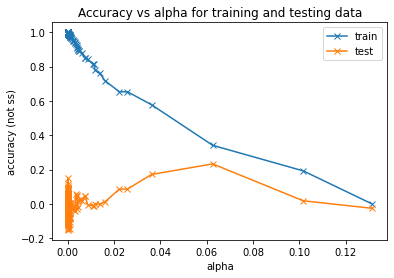

In [ ]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(F_kappa,g_kappa) #determine values for alpha
display(path)
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas # we don't like the last one since it's just the root and so far away from the others
trees = []
for alpha in ccp_alphas:
  tree = DecisionTreeRegressor(ccp_alpha=alpha)
  tree.fit(F_kappa,g_kappa)
  trees.append(tree)

train_scores = [tree.score(F_kappa,g_kappa) for tree in trees] # we need to give it x_train/y_train again because this MODEL can be used on any data
test_scores = [tree.score(F_test,g_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("R^2")
ax.set_title("R^2 vs alpha for training and testing data")
ax.plot(ccp_alphas,train_scores,label="train",marker="x")
ax.plot(ccp_alphas,test_scores,label="test",marker="x")
ax.legend()
plt.show()

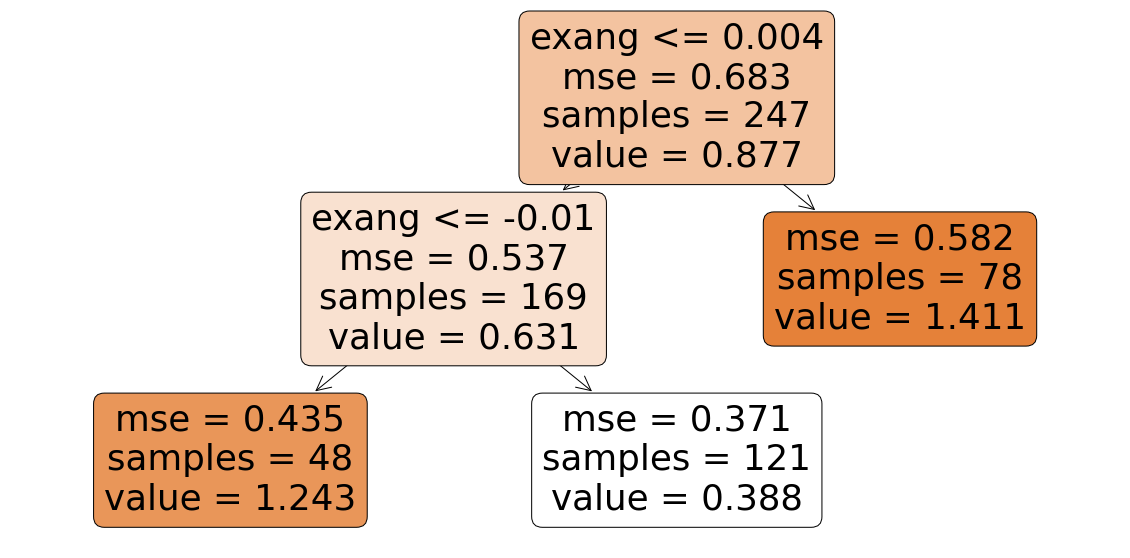

In [ ]:
chosen = 0.0625543106
pruned_tree = DecisionTreeRegressor(ccp_alpha=chosen)
pruned_tree.fit(F_kappa,g_kappa)
plt.figure(figsize=(20,10))
sktree.plot_tree(pruned_tree,filled=True,rounded=True,feature_names=F_kappa.columns);

In [ ]:
g_predicted = pruned_tree.predict(F_test)
g_predicted

array([1.41077207, 0.38849819, 0.38849819, 1.41077207, 0.38849819,
       1.2431535 , 0.38849819, 1.2431535 , 1.41077207, 1.41077207,
       1.2431535 , 0.38849819, 1.41077207, 0.38849819, 1.41077207,
       1.41077207, 1.41077207, 1.2431535 , 1.41077207, 1.2431535 ,
       1.41077207, 1.2431535 , 1.2431535 , 0.38849819, 0.38849819,
       1.41077207, 1.41077207, 0.38849819, 0.38849819, 1.2431535 ,
       0.38849819, 0.38849819, 0.38849819, 0.38849819, 0.38849819,
       0.38849819, 0.38849819, 1.41077207, 1.41077207, 1.41077207,
       1.2431535 , 0.38849819, 1.41077207, 0.38849819, 1.41077207,
       1.2431535 , 0.38849819, 1.2431535 , 1.41077207, 1.41077207,
       1.2431535 , 1.41077207, 0.38849819, 1.2431535 , 0.38849819,
       0.38849819, 1.2431535 , 0.38849819, 0.38849819, 1.2431535 ,
       0.38849819, 1.41077207, 1.2431535 , 0.38849819, 0.38849819,
       1.2431535 , 1.2431535 , 1.2431535 , 1.41077207, 1.41077207,
       1.2431535 , 1.41077207, 0.38849819, 1.2431535 , 1.41077

In [ ]:
g_test

72     2.520854
202    0.585017
227    0.393725
113    1.841678
159    0.782570
         ...   
254    0.504051
36     2.005452
149    0.279194
251    2.404345
106    2.055184
Length: 75, dtype: float64

It's less than not working.

##PCA trees

In [ ]:
scaled_data = preprocessing.scale(X_encoded)
scaled_data = pd.DataFrame(data=scaled_data, columns=X_encoded.columns, index = X_encoded.index)
scaled_data

age       sex  trestbps  ...  thal_3.0  thal_6.0  thal_7.0
0    0.936181  0.691095  0.750380  ... -1.110443  3.937004 -0.794901
1    1.378929  0.691095  1.596266  ...  0.900542 -0.254000 -0.794901
2    1.378929  0.691095 -0.659431  ... -1.110443 -0.254000  1.258018
3   -1.941680  0.691095 -0.095506  ...  0.900542 -0.254000 -0.794901
4   -1.498933 -1.446980 -0.095506  ...  0.900542 -0.254000 -0.794901
..        ...       ...       ...  ...       ...       ...       ...
297  0.272059 -1.446980  0.468418  ... -1.110443 -0.254000  1.258018
298 -1.056185  0.691095 -1.223355  ... -1.110443 -0.254000  1.258018
299  1.489615  0.691095  0.693988  ... -1.110443 -0.254000  1.258018
300  0.272059  0.691095 -0.095506  ... -1.110443 -0.254000  1.258018
301  0.272059 -1.446980 -0.095506  ...  0.900542 -0.254000 -0.794901

[297 rows x 25 columns]

In [ ]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

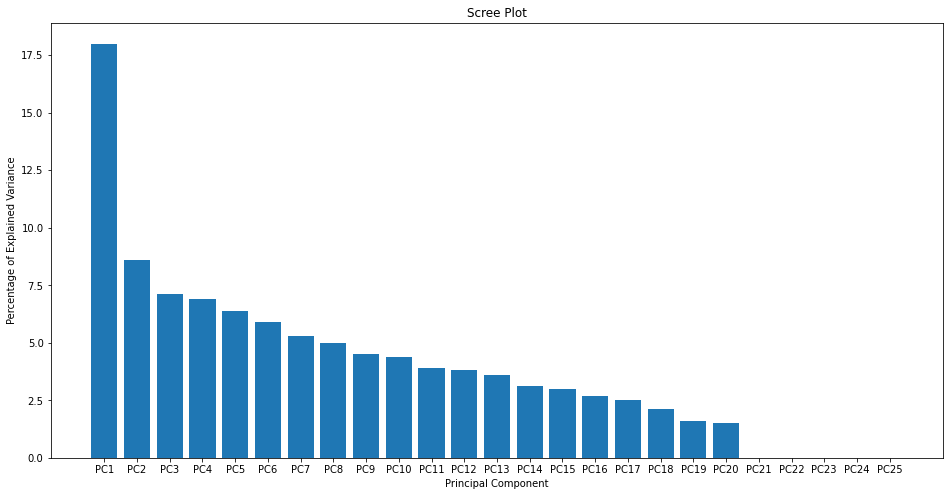

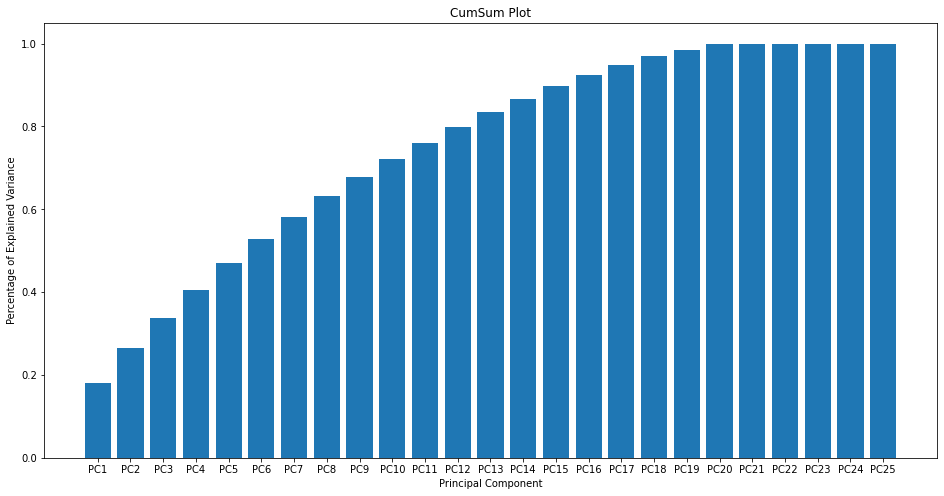

In [ ]:
plt.rcParams['figure.figsize'] = [16,8]
plt.figure(1)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(i) for i in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
noprint = plt.title('Scree Plot')

plt.figure(2)
cum_sum = np.cumsum(pca.explained_variance_ratio_ * 100)/100
labels = ['PC' + str(i) for i in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(cum_sum)+1),height=cum_sum,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
noprint = plt.title('CumSum Plot')

plt.show()

I want y to be about y, not X but I don't know how to do that.

The PCA1 is very good. The rest not so much. But let's look at them and use them to build trees!

In [ ]:
pca_df = pd.DataFrame(pca_data,index = X_encoded.index,columns = labels)
pca_df

PC1       PC2       PC3  ...          PC23          PC24          PC25
0    1.222097  2.147129  3.527468  ...  1.625124e-15  4.913484e-16 -6.573636e-16
1    3.097091  2.050521 -0.152794  ... -5.606274e-16 -4.800967e-16  1.316752e-15
2    3.888451  0.046669 -0.730723  ...  1.821488e-16  1.876036e-16  5.867303e-17
3   -1.711434 -0.781108  3.279606  ... -1.512326e-16 -3.135632e-16 -1.554216e-15
4   -2.810397  1.290863  0.219034  ... -5.408812e-17 -3.413188e-16 -1.248035e-16
..        ...       ...       ...  ...           ...           ...           ...
297  1.541735 -1.793791  0.782796  ... -3.868405e-16 -8.995211e-17  4.593941e-16
298  0.308225 -1.908923  1.814701  ...  5.724873e-17  7.427152e-16  1.530494e-17
299  3.050666 -1.275985 -0.002431  ...  5.707269e-16  8.537375e-16  5.027622e-16
300  2.735306 -2.895983 -0.887450  ...  2.237822e-16  5.206706e-16  4.108219e-16
301 -0.846021  1.826591 -1.245704  ...  4.510281e-16  0.000000e+00 -1.594980e-16

[297 rows x 25 columns]

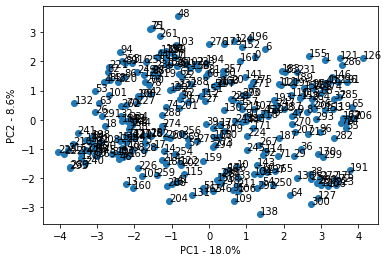

In [ ]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel(f"PC1 - {per_var[0]}%")
plt.ylabel(f"PC2 - {per_var[1]}%")
for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [ ]:
loading_scores = pd.Series(pca.components_[0],index = X_encoded.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10 = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10])

thal_3.0    -0.318991
slope_1.0   -0.313141
thalach     -0.306090
oldpeak      0.298992
cp_4.0       0.294351
slope_2.0    0.275823
thal_7.0     0.273995
exang        0.266580
ca_0.0      -0.251446
cp_2.0      -0.205898
dtype: float64


In [ ]:
sorted_loading_scores

thal_3.0       0.318991
slope_1.0      0.313141
thalach        0.306090
oldpeak        0.298992
cp_4.0         0.294351
slope_2.0      0.275823
thal_7.0       0.273995
exang          0.266580
ca_0.0         0.251446
cp_2.0         0.205898
age            0.205188
cp_3.0         0.155175
restecg_0.0    0.146458
ca_2.0         0.139086
restecg_2.0    0.132151
ca_3.0         0.130213
trestbps       0.111077
sex            0.110997
ca_1.0         0.108264
thal_6.0       0.105439
slope_3.0      0.073155
restecg_1.0    0.062111
chol           0.055297
fbs            0.038052
cp_1.0         0.003666
dtype: float64

In [ ]:
pca_first_five = pca_df.iloc[:,0:5]
pca_first_five

PC1       PC2       PC3       PC4       PC5
0    1.222097  2.147129  3.527468 -3.515031  2.511901
1    3.097091  2.050521 -0.152794  1.143146 -0.429758
2    3.888451  0.046669 -0.730723 -0.416922 -0.733631
3   -1.711434 -0.781108  3.279606 -0.882589  1.383001
4   -2.810397  1.290863  0.219034 -0.878665 -1.594360
..        ...       ...       ...       ...       ...
297  1.541735 -1.793791  0.782796  1.057477 -0.902581
298  0.308225 -1.908923  1.814701 -0.666549  0.062279
299  3.050666 -1.275985 -0.002431 -0.489151  2.298940
300  2.735306 -2.895983 -0.887450  0.953583 -0.096321
301 -0.846021  1.826591 -1.245704  1.453838 -0.877558

[297 rows x 5 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pca_df,y)

{'ccp_alphas': array([0.        , 0.00442407, 0.00443625, 0.00563063, 0.00600601,
        0.00675676, 0.00720721, 0.00812769, 0.00840841, 0.00949807,
        0.01061776, 0.01138657, 0.01490461, 0.01638691, 0.01704149,
        0.01839761, 0.02110518, 0.24759404]),
 'impurities': array([0.        , 0.00884813, 0.01772064, 0.03461253, 0.04061854,
        0.05413205, 0.06133926, 0.07759465, 0.08600306, 0.10499919,
        0.12623471, 0.13762129, 0.1525259 , 0.16891281, 0.1859543 ,
        0.20435191, 0.24656227, 0.49415632])}

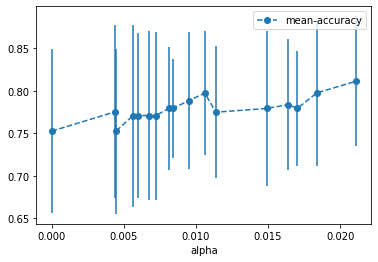

In [ ]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train,y_train) #determine values for alpha
display(path)
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1] # we don't like the last one since it's just the root and so far away from the others
trees = []
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha=alpha)
  tree.fit(x_train,y_train)
  trees.append(tree)

len(trees)

alphaResults = {}
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha = alpha)
  scores = cross_val_score(tree,x_train,y_train,cv=10) #he's a chicken and only using x_train again, I think he must have misspoken in the video
  alphaResults[alpha] = [scores.mean(),scores.std()]
df = pd.DataFrame(alphaResults).T
df.columns = ['mean-accuracy','stdev']
df.index.name = 'alpha'
df.plot(y='mean-accuracy',yerr='stdev',marker='o',linestyle='--')

In [ ]:
x_train

PC1       PC2       PC3  ...          PC23          PC24          PC25
217  0.195863  1.204885  0.837721  ... -2.900105e-16 -3.968300e-16  3.886746e-16
223  3.388767 -2.217454 -0.442835  ... -2.619404e-16  3.541371e-16  6.137845e-16
6    1.506589  2.417269  1.056939  ...  8.468976e-17 -5.078523e-16 -1.564624e-15
234 -2.145731  0.008462 -1.346074  ... -1.859271e-16 -3.968300e-16 -5.064427e-16
128 -3.440642 -1.318174 -0.157648  ...  1.423033e-18  4.725924e-17  2.082634e-16
..        ...       ...       ...  ...           ...           ...           ...
155  2.665004  2.182428 -0.135329  ... -4.496051e-16 -3.135632e-16  8.171513e-16
119  3.318730  0.355339 -1.102180  ...  1.127599e-16  7.658134e-17 -1.442896e-16
1    3.097091  2.050521 -0.152794  ... -5.606274e-16 -4.800967e-16  1.316752e-15
47   2.223247  0.121273  1.147415  ... -3.313293e-16 -1.454633e-16  4.038830e-16
215  0.881172  0.354466  1.722670  ...  3.903156e-16  5.761817e-16 -4.287843e-16

[222 rows x 25 columns]

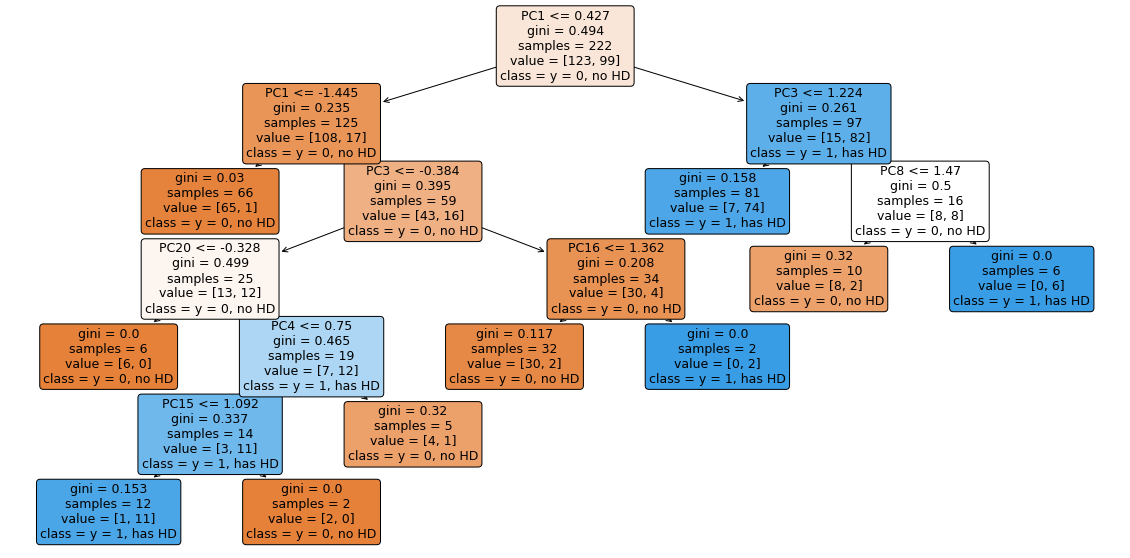

In [ ]:
chosen = 0.24759404
pruned_tree = DecisionTreeClassifier(ccp_alpha=chosen)
pruned_tree.fit(x_train,y_train)
plt.figure(figsize=(20,10))
plot_tree(pruned_tree,filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=x_train.columns);



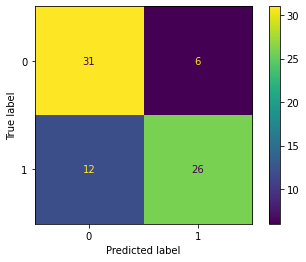

In [ ]:
plot_confusion_matrix(pruned_tree,x_test,y_test)

In [ ]:
1-18/(18+57)

0.76

But wait, alpha = 0.24759404 is even better.

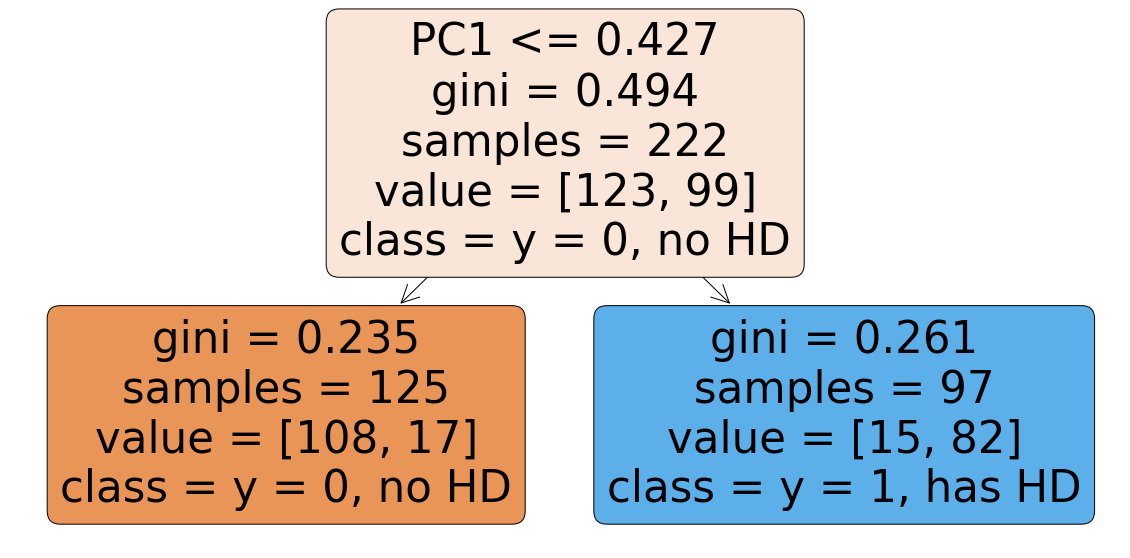

In [ ]:
chosen = 0.24759404
pruned_tree = DecisionTreeClassifier(ccp_alpha=chosen)
pruned_tree.fit(x_train,y_train)
plt.figure(figsize=(20,10))
plot_tree(pruned_tree,filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=x_train.columns);


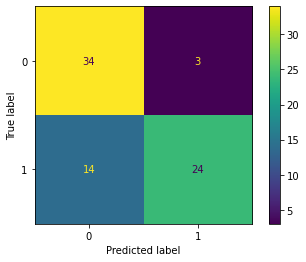

In [ ]:
plot_confusion_matrix(pruned_tree,x_test,y_test)

In [ ]:
1-17/57

0.7017543859649122

This is 1.5 std below the expected.

So maybe we had bad luck with the test data.

We see that PCA doesn't help decision trees. Decision trees are just PCA written out one step at a time. Before the best alpha has 80%, and now we also have 80%. Before the best alpha was low, now it's high because with PCA you need fewer nodes.

Let's do PCA for the first node and all the other nodes are regular.

So we have PCA1 <= 0.427 for the first node and then we will have two trees, one for the people with Yes and one for the people with No.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded.loc[pca_df["PC1"]<=0.427], y.loc[pca_df["PC1"]<=0.427])

{'ccp_alphas': array([0.        , 0.00620155, 0.00751342, 0.01033592, 0.01188441,
        0.0124031 , 0.0124031 , 0.01315955, 0.01594684, 0.01813303,
        0.01865128, 0.02035815]),
 'impurities': array([0.        , 0.0124031 , 0.04245677, 0.0631286 , 0.09878184,
        0.11118494, 0.13599114, 0.20178891, 0.21773575, 0.25400181,
        0.27265309, 0.29301124])}

mean-accuracy     stdev
alpha                            
0.000000       0.704487  0.125826
0.006202       0.728205  0.126241
0.007513       0.728205  0.121464
0.010336       0.697436  0.094420
0.011884       0.689744  0.109057
0.012403       0.697436  0.111649
0.012403       0.697436  0.106217
0.013160       0.705128  0.102724
0.015947       0.720513  0.105378
0.018133       0.720513  0.105378
0.018651       0.720513  0.105378

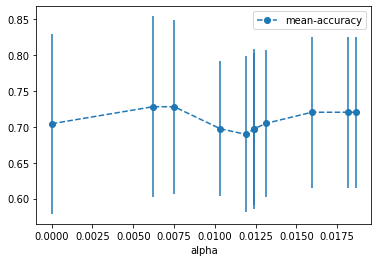

In [ ]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train,y_train) #determine values for alpha
display(path)
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1] # we don't like the last one since it's just the root and so far away from the others
trees = []
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha=alpha)
  tree.fit(x_train,y_train)
  trees.append(tree)

len(trees)

alphaResults = {}
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha = alpha)
  scores = cross_val_score(tree,x_train,y_train,cv=10) #he's a chicken and only using x_train again, I think he must have misspoken in the video
  alphaResults[alpha] = [scores.mean(),scores.std()]
df = pd.DataFrame(alphaResults).T
df.columns = ['mean-accuracy','stdev']
df.index.name = 'alpha'
df.plot(y='mean-accuracy',yerr='stdev',marker='o',linestyle='--')
df

Similarly, you can't do better than the most simple one!

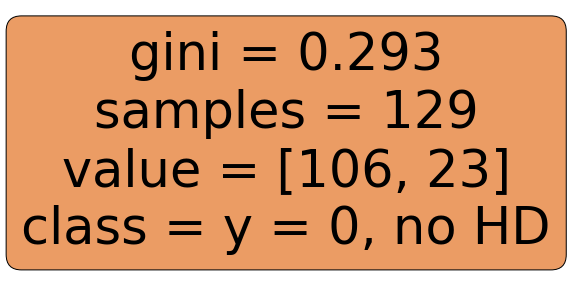

In [ ]:
chosen = 0.02216819
pruned_tree = DecisionTreeClassifier(ccp_alpha=chosen)
pruned_tree.fit(x_train,y_train)
plt.figure(figsize=(10,5))
plot_tree(pruned_tree,filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=x_train.columns);


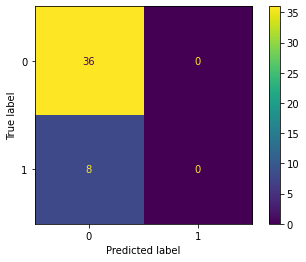

In [ ]:
plot_confusion_matrix(pruned_tree,x_test,y_test)

So 8/44 wrong.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded.loc[pca_df["PC1"]>0.427], y.loc[pca_df["PC1"]>0.427])

{'ccp_alphas': array([0.        , 0.01393306, 0.01433692, 0.01792115, 0.01926825,
        0.07009175]),
 'impurities': array([0.        , 0.04179918, 0.0561361 , 0.07405725, 0.17039848,
        0.24049023])}

mean-accuracy     stdev
alpha                            
0.000000       0.848889  0.073401
0.013933       0.840000  0.083178
0.014337       0.838889  0.072563
0.017921       0.840000  0.083178
0.019268       0.850000  0.070842

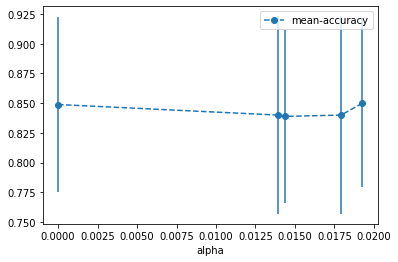

In [ ]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train,y_train) #determine values for alpha
display(path)
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1] # we don't like the last one since it's just the root and so far away from the others
trees = []
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha=alpha)
  tree.fit(x_train,y_train)
  trees.append(tree)

len(trees)

alphaResults = {}
for alpha in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha = alpha)
  scores = cross_val_score(tree,x_train,y_train,cv=10) #he's a chicken and only using x_train again, I think he must have misspoken in the video
  alphaResults[alpha] = [scores.mean(),scores.std()]
df = pd.DataFrame(alphaResults).T
df.columns = ['mean-accuracy','stdev']
df.index.name = 'alpha'
df.plot(y='mean-accuracy',yerr='stdev',marker='o',linestyle='--')
df

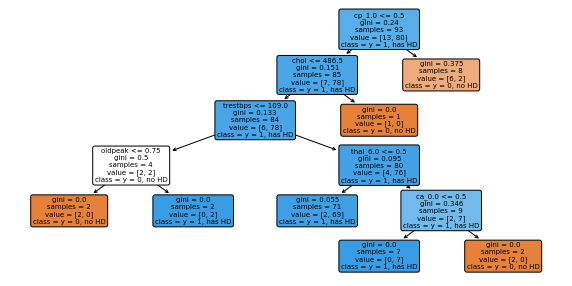

In [ ]:
chosen = 0.019268
pruned_tree = DecisionTreeClassifier(ccp_alpha=chosen)
pruned_tree.fit(x_train,y_train)
plt.figure(figsize=(10,5))
plot_tree(pruned_tree,filled=True,rounded=True,class_names=["y = 0, no HD","y = 1, has HD"],feature_names=x_train.columns);

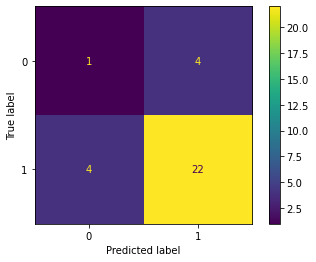

In [ ]:
plot_confusion_matrix(pruned_tree,x_test,y_test)

So 8/31 not correct.

In total, we have 16/75 not correct.

In [ ]:
1-16/75

0.7866666666666666

It just seems so flat, there is nothing you can do with Decision Trees that you couldn't do with PCA in the case. With just PCA1 we also have about 80%.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded,y)
train_score = []
test_score = []
for i in range(len(pca.components_)):
  loading_scores = pd.Series(pca.components_[i],index = X_encoded.columns)
  X_pca = (x_train*loading_scores).sum(axis=1)
  X_pca = pd.DataFrame(X_pca)
  pruned_tree = DecisionTreeClassifier(max_depth=1) #this will always just be the root
  pruned_tree.fit(X_pca,y_train)
  train_score.append(pruned_tree.score(X_pca,y_train))
  X_pca_test = (x_test*loading_scores).sum(axis=1)
  X_pca_test = pd.DataFrame(X_pca_test)
  test_score.append(pruned_tree.score(X_pca_test,y_test))

In [ ]:
train_score

{0: 0.7387387387387387,
 1: 0.5990990990990991,
 2: 0.5900900900900901,
 3: 0.6486486486486487,
 4: 0.5990990990990991,
 5: 0.5540540540540541,
 6: 0.5630630630630631,
 7: 0.5900900900900901,
 8: 0.6081081081081081,
 9: 0.6036036036036037,
 10: 0.6171171171171171,
 11: 0.581081081081081,
 12: 0.6756756756756757,
 13: 0.581081081081081,
 14: 0.5720720720720721,
 15: 0.6351351351351351,
 16: 0.6396396396396397,
 17: 0.5675675675675675,
 18: 0.7027027027027027,
 19: 0.6621621621621622,
 20: 0.7072072072072072,
 21: 0.7027027027027027,
 22: 0.7117117117117117,
 23: 0.8108108108108109,
 24: 0.7522522522522522}

Interestingly, even though PCA 23 is very bad at distinguishing X, it's great at distinguishing y. And PCA 3 is really bad at distinguishing y.

In [ ]:
train_score

[0.6891891891891891,
 0.545045045045045,
 0.5765765765765766,
 0.6666666666666666,
 0.6216216216216216,
 0.545045045045045,
 0.545045045045045,
 0.581081081081081,
 0.5720720720720721,
 0.581081081081081,
 0.5990990990990991,
 0.5765765765765766,
 0.6981981981981982,
 0.545045045045045,
 0.5990990990990991,
 0.6396396396396397,
 0.6036036036036037,
 0.5675675675675675,
 0.7072072072072072,
 0.6801801801801802,
 0.7387387387387387,
 0.7342342342342343,
 0.7207207207207207,
 0.7972972972972973,
 0.7477477477477478]

In [ ]:
len(train_score)

25

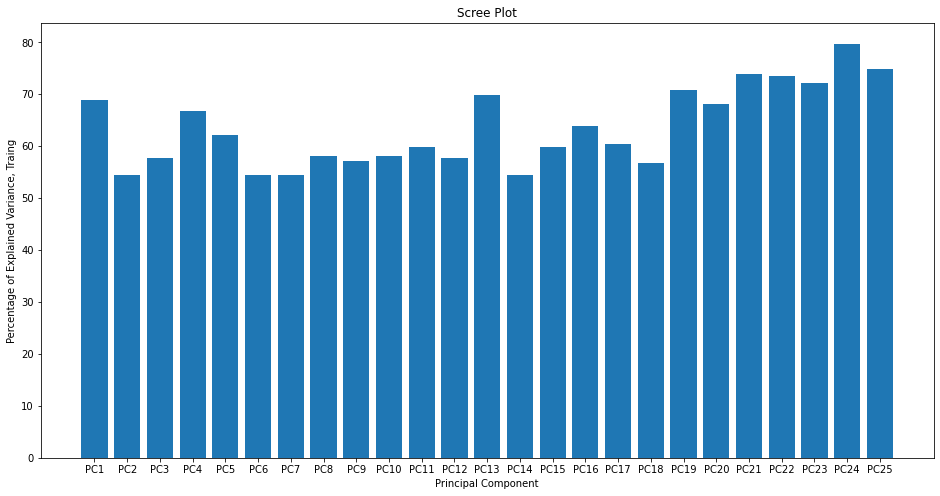

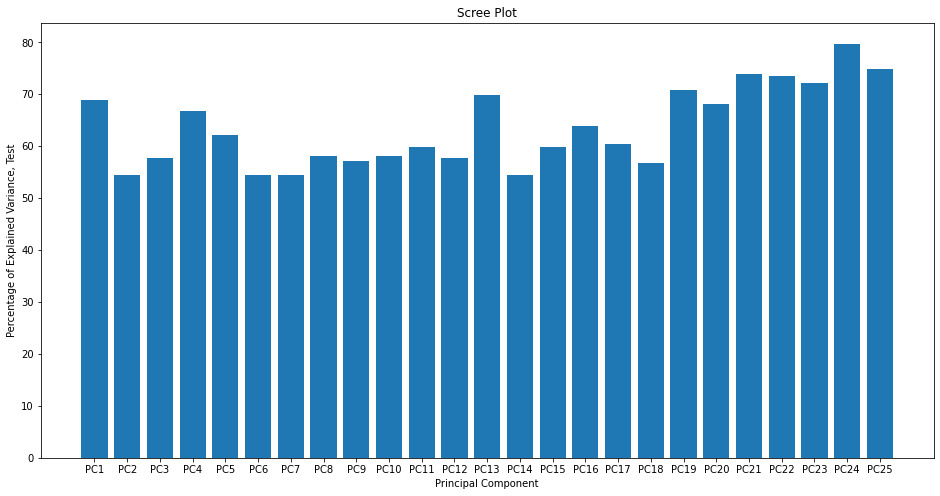

In [ ]:
plt.rcParams['figure.figsize'] = [16,8]
plt.figure(1)
per_var = np.round([i * 100 for i in train_score], decimals = 2)
labels = ['PC' + str(i) for i in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance, Traing')
plt.xlabel('Principal Component')
noprint = plt.title('Scree Plot')

plt.figure(2)
per_var = np.round([i * 100 for i in train_score], decimals = 2)
labels = ['PC' + str(i) for i in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance, Test')
plt.xlabel('Principal Component')
noprint = plt.title('Scree Plot')

plt.show()

You see that there is no relation between the PCA's of X and the PCA's needed to fit y. Do you think that we could use SVD in some way? Maybe we have to divide into y=0 and y=1 and then do SVD on both and see how different they are? How do you measure that? I'm sure someone figured it out.

Let's do least squares using SVD.

In [ ]:
#scaled_data = preprocessing.scale(X_encoded)
scaled_data=X_encoded
scaled_data = pd.DataFrame(data=scaled_data, columns=X_encoded.columns, index = X_encoded.index)
A_train,A_test,b_train,b_test = train_test_split(scaled_data,y)

In [ ]:
U,S,VT = np.linalg.svd(A_train,full_matrices=False)
S = np.diag(S)

In [ ]:
A_train_inv = VT.T @ np.linalg.inv(S) @ U.T

In [ ]:
x_fit = A_train_inv @ b_train

In [ ]:
b_predicted = A_test @ x_fit

In [ ]:
b_predicted

95     0.828125
2      1.156250
282    1.281250
157    0.843750
249    0.000000
         ...   
76     1.187500
140   -0.109375
235    0.906250
291   -0.328125
108    1.093750
Length: 75, dtype: float64

In [ ]:
b_predicted_list = [int(row > 0.5) for row in b_predicted]

In [ ]:
conf_matr = confusion_matrix(b_test.to_list(),b_predicted_list)

In [ ]:
conf_matr

array([[33,  3],
       [ 9, 30]])

In [ ]:
1-14/(14+42+19)

0.8133333333333334

Pretty good! Better than Decision Trees and Cost Complexity Pruning. Let's see what it is on the training data.

In [ ]:
conf_matr = confusion_matrix(b_train.to_list(),[int(row > 0.5) for row in (A_train @ x_fit)])

In [ ]:
conf_matr

array([[119,   5],
       [ 25,  73]])

In [ ]:
65/(65+47+110)

0.2927927927927928

So that was just luck! In total, we have:

In [ ]:
1-(65+14)/(65+47+110+14+42+19)

0.734006734006734

It's just the same as decision trees. Mid 70s.

Now if we didn't use scaled data, we get:

In [ ]:
(109+69+40+23)/(109+69+40+23+9+35+2+10)

0.8114478114478114

So it's a lot better without using scaled data! Given that it's just least squares, I don't know why it would be different!!! And also 0.81 is actually very good!

Maybe preprocessing also sets the standard deviations to 1.

Let's pad A with 1 at the beginning to also give a possible constant term.

In [ ]:
scaled_data = np.pad(scaled_data,[(0,0),(0,1)],constant_values=1)

In [ ]:
A_train,A_test,b_train,b_test = train_test_split(scaled_data,y)
U,S,VT = np.linalg.svd(A_train,full_matrices=False)
S = np.diag(S)
A_train_inv = VT.T @ np.linalg.inv(S) @ U.T
x_fit = A_train_inv @ b_train
b_predicted = A_test @ x_fit
b_predicted_list = [int(row > 0.5) for row in b_predicted]
conf_matr = confusion_matrix(b_test.to_list(),b_predicted_list)

In [ ]:
conf_matr

array([[30, 10],
       [ 6, 29]])

In [ ]:
1-16/(16+30+29)

0.7866666666666666

In [ ]:
conf_matr = confusion_matrix(b_train.to_list(),[int(row > 0.5) for row in (A_train @ x_fit)])

In [ ]:
conf_matr

array([[111,   9],
       [ 15,  87]])

In [ ]:
1-24/(87+111)

0.8787878787878788

In [ ]:
1-(24+16)/(87+111+16+30+29)

0.8534798534798534

Even better, 88% for train data and 79% for test data. Overall, 85%.

I do want to know how good this is. 88% and 79% sound so different, is it just bad luck? Let's do cross correlation.

In [ ]:
def cross_correlate(gens):
  i = 0
  result = []
  for generator in gens:
    print(i)
    i+=1
    A_train, A_test = X_encoded.iloc[generator[0]], X_encoded.iloc[generator[1]]
    b_train, b_test = y.iloc[generator[0]], y.iloc[generator[1]]
    U,S,VT = np.linalg.svd(A_train,full_matrices=False)
    S = np.diag(S)
    A_train_inv = VT.T @ np.linalg.inv(S) @ U.T
    x_fit = A_train_inv @ b_train
    b_predicted_test = A_test @ x_fit
    b_predicted_test = [int(row > 0.5) for row in b_predicted_test]
    b_predicted_train = A_train @ x_fit
    b_predicted_train = [int(row > 0.5) for row in b_predicted_train]
    test_accuracy = accuracy_score(b_test.to_list(),b_predicted_test)
    train_accuracy = accuracy_score(b_train.to_list(),b_predicted_train)
    result.append([test_accuracy,train_accuracy])
  return result

#non-parallel
nr_folds = 10
kf = KFold(n_splits=nr_folds,shuffle=True)
gen = kf.split(X_encoded)
gens = []
for generator in gen:
  gens.append(generator)

result = cross_correlate(gens)

0
1
2
3
4
5
6
7
8
9


In [ ]:
result

[[0.8, 0.8277153558052435],
 [0.8, 0.8389513108614233],
 [0.8, 0.8539325842696629],
 [0.8333333333333334, 0.8202247191011236],
 [0.7333333333333333, 0.8389513108614233],
 [0.9, 0.850187265917603],
 [0.8, 0.8539325842696629],
 [0.7586206896551724, 0.8470149253731343],
 [0.7241379310344828, 0.753731343283582],
 [0.8275862068965517, 0.8507462686567164]]

In [ ]:
print(np.mean([i[0] for i in result]))
print(np.std([i[0] for i in result]))

0.7977011494252874
0.048714482506939154


In [ ]:
print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

0.8335387668399574
0.02868045531608982


We see that the test accuracy is a bit lower than the training accuracy. The stdevs are also higher for the test data. In total, we have an 80% +- 5% model! Let's now do padding.

In [ ]:
def cross_correlate(estimator,X,y,pad = True):
#non-parallel
  nr_folds = 10
  kf = KFold(n_splits=nr_folds,shuffle=True)
  gen = kf.split(X)
  gens = []
  for generator in gen:
    gens.append(generator)

  i = 0
  result = []
  for generator in gens:
    print(i)
    i+=1
    A_train, A_test = X.iloc[generator[0]], X.iloc[generator[1]]
    if pad:
      A_train = np.pad(A_train,[(0,0),(0,1)],constant_values=1)
      A_test = np.pad(A_test,[(0,0),(0,1)],constant_values=1)
    b_train, b_test = y.iloc[generator[0]], y.iloc[generator[1]]
    test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test = estimator(A_train,A_test,b_train,b_test)
    result.append([test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test])
  return result

def estimator(A_train,A_test,b_train,b_test):
  U,S,VT = np.linalg.svd(A_train,full_matrices=False)
  S = np.diag(S)
  A_train_inv = VT.T @ np.linalg.inv(S) @ U.T
  x_fit = A_train_inv @ b_train
  b_predicted_test = A_test @ x_fit
  b_predicted_test_2 = [int(row > 0.5) for row in b_predicted_test]
  b_predicted_train = A_train @ x_fit
  b_predicted_train = [int(row > 0.5) for row in b_predicted_train]
  test_accuracy = accuracy_score(b_test.to_list(),b_predicted_test_2)
  train_accuracy = accuracy_score(b_train.to_list(),b_predicted_train)
  return test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test

result = cross_correlate(estimator,X_encoded,y)

0
1
2
3
4
5
6
7
8
9


In [ ]:
print(np.mean([i[0] for i in result]))
print(np.std([i[0] for i in result]))

0.8411494252873564
0.0655470793116582


In [ ]:
print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

0.8757853988484543
0.00740968107171282


That's crazy! Now we have a 84.2% +- 6.9% model just using ax + b.

We can do even better. We can find out which feature was important (kind of like loading scores for PCA).

In [ ]:
scaled_data = preprocessing.scale(X_encoded)
scaled_data = pd.DataFrame(data=scaled_data, columns=X_encoded.columns, index = X_encoded.index)
result = cross_correlate(estimator,scaled_data,y)

0
1
2
3
4
5
6
7
8
9


In [ ]:
Aa = result[0][4]
Xx = result[0][2]
print(Aa[0])
print(Xx)
print(X_encoded.columns)

[-0.17068899  0.69109474  0.46841791 -0.85436705  2.43042728  0.23580733
  1.43591632  1.75615726 -0.28972678 -0.44450044 -0.62277642  1.04477237
 -0.98994949 -0.11684125  1.01697914 -0.93794821 -0.92533778  3.62530787
  0.8407714  -0.52931315 -0.38303805 -0.26870461 -1.11044257 -0.25400025
  1.25801776  1.        ]
[-1.01416838e-02  7.59227103e-02  4.56723347e-02  1.60626503e-02
 -3.76547257e-02 -3.83112359e-02  1.81610226e-02  4.66884182e-02
 -4.63887139e+12 -6.44164836e+12 -7.78787668e+12 -8.66928248e+12
 -1.42602455e+13 -3.28765707e+12 -1.42589520e+13  6.42331407e+13
  6.41716918e+13  3.29979836e+13 -4.98300513e+13 -4.18277810e+13
 -3.37913727e+13 -2.53523976e+13 -6.04614139e+13 -2.90114148e+13
 -5.92263772e+13  4.61356524e-01]
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0',
       'ca_1.0', 'ca_2.0', 'ca_

The one-hot encoded values are all non-sense! That means it doesn't know how to use them. Must be that they are lin. dependent. We get 84% even without any of the categorical values!!!

In [ ]:
importance = []
importance_stdev = []
for j in range(8): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))


In [ ]:
X_encoded.columns[:8].to_list()

['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak']

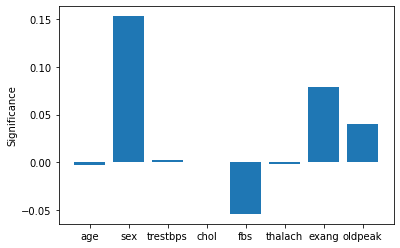

In [ ]:
fig = plt.figure()
x_tick = X_encoded.columns[:8].to_list()
plt.bar(x_tick,importance[:8])
plt.ylabel("Significance")
plt.show()

In [ ]:
X_encoded.describe()

age         sex    trestbps  ...    thal_3.0    thal_6.0    thal_7.0
count  297.000000  297.000000  297.000000  ...  297.000000  297.000000  297.000000
mean    54.542088    0.676768  131.693603  ...    0.552189    0.060606    0.387205
std      9.049736    0.468500   17.762806  ...    0.498108    0.239009    0.487933
min     29.000000    0.000000   94.000000  ...    0.000000    0.000000    0.000000
25%     48.000000    0.000000  120.000000  ...    0.000000    0.000000    0.000000
50%     56.000000    1.000000  130.000000  ...    1.000000    0.000000    0.000000
75%     61.000000    1.000000  140.000000  ...    1.000000    0.000000    1.000000
max     77.000000    1.000000  200.000000  ...    1.000000    1.000000    1.000000

[8 rows x 25 columns]

One thing I could do is just take out one column from each one-hot encoding. Then I wouldn't have any more linear dependance.

In [ ]:
?pandas.DataFrame.drop

Object `pandas.DataFrame.drop` not found.


In [ ]:
X_copy = copy.deepcopy(X_encoded)
X_copy.drop(["cp_1.0","restecg_0.0","slope_1.0","ca_0.0","thal_3.0"],axis=1,inplace=True)
result = cross_correlate(estimator,X_copy,y)
print(np.mean([i[0] for i in result])) #test
print(np.std([i[0] for i in result]))
print(np.mean([i[1] for i in result])) #train
print(np.std([i[1] for i in result]))

0
1
2
3
4
5
6
7
8
9
0.838735632183908
0.04323138102647737
0.8754220470680305
0.007091600407549262


We don't do any better using the categorical data.

0
1
2
3
4
5
6
7
8
9


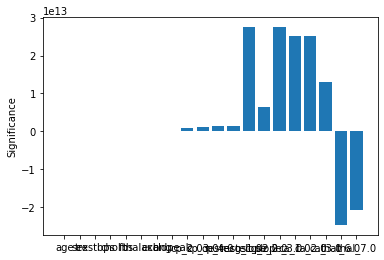

In [ ]:
scaled_data = preprocessing.scale(X_encoded)
scaled_data = pd.DataFrame(data=scaled_data, columns=X_encoded.columns, index = X_encoded.index)
result = cross_correlate(estimator,scaled_data,y);
importance = []
importance_stdev = []
for j in range(len(X_copy.columns)): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))
fig = plt.figure()
x_tick = X_copy.columns.to_list()
plt.bar(x_tick,importance)
plt.ylabel("Significance")
plt.show()

In [ ]:
Aa = result[0][4]
Xx = result[0][2]
print(Aa[0])
print(Xx)
print(X_copy.columns)

[ 0.93618065  0.69109474  0.75038004 -0.27644339  2.43042728  0.01749443
 -0.69641941  1.06896529  3.4515277  -0.44450044 -0.62277642 -0.9571463
 -0.98994949 -0.11684125  1.01697914 -0.93794821 -0.92533778  3.62530787
  0.8407714  -0.52931315 -0.38303805 -0.26870461 -1.11044257  3.93700394
 -0.79490133  1.        ]
[-3.13512366e-02  9.28823927e-02  1.00800912e-01 -7.86089024e-04
  2.73303568e-02 -5.04575864e-02  7.66477216e-02  7.31685870e-02
  6.91688030e+13  9.60494629e+13  1.16122665e+14  1.29265039e+14
  1.91474922e+14  4.41439723e+13  1.91457554e+14 -4.48792135e+13
 -4.48362796e+13 -2.30554436e+13 -9.17544927e+13 -7.70195238e+13
 -6.22216952e+13 -4.66826005e+13  1.90104801e+13  9.12186615e+12
  1.86221558e+13  4.66281700e-01]
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'slope_2.0',
       'slope_3.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')


Looks like we still have linear dependences! (apparently, we just made another mistake somewhere) 

Let's do SVC for categorical data from [Kaggle](https://www.kaggle.com/matleonard/encoding-categorical-features-with-svd)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Use 3 components in the latent vectors
svd = TruncatedSVD(n_components=2)
#"cp","restecg","slope","ca","thal"
pair_counts = X_old.groupby(["cp","restecg"])['age'].count()

In [ ]:
pair_counts

cp   restecg
1.0  0.0         9
     2.0        14
2.0  0.0        30
     2.0        19
3.0  0.0        47
     1.0         1
     2.0        35
4.0  0.0        61
     1.0         3
     2.0        78
Name: age, dtype: int64

In [ ]:
pair_matrix = pair_counts.unstack(fill_value=0)
pair_matrix


restecg  0.0  1.0  2.0
cp                    
1.0        9    0   14
2.0       30    0   19
3.0       47    1   35
4.0       61    3   78

In [ ]:
svd_encoding = pd.DataFrame(svd.fit_transform(pair_matrix),index=pair_matrix.index)
svd_encoding.head(10)

0          1
cp                       
1.0  16.368207  -2.959198
2.0  34.357099   8.971377
3.0  57.672138  10.434885
4.0  98.680076  -8.731204

In [ ]:
encoded = svd_encoding.reindex(X_old['cp']).set_index(X_old.index)
encoded.head(10)

0          1
0  16.368207  -2.959198
1  98.680076  -8.731204
2  98.680076  -8.731204
3  57.672138  10.434885
4  34.357099   8.971377
5  34.357099   8.971377
6  98.680076  -8.731204
7  98.680076  -8.731204
8  98.680076  -8.731204
9  98.680076  -8.731204

In [ ]:
# Join encoded feature to the dataframe, with info in the column names
data_svd = X_old.join(encoded.add_prefix("cp_restecg_svd_"))
data_svd.head()

age  sex   cp  trestbps  ...   ca  thal  cp_restecg_svd_0  cp_restecg_svd_1
0  63.0  1.0  1.0     145.0  ...  0.0   6.0         16.368207         -2.959198
1  67.0  1.0  4.0     160.0  ...  3.0   3.0         98.680076         -8.731204
2  67.0  1.0  4.0     120.0  ...  2.0   7.0         98.680076         -8.731204
3  37.0  1.0  3.0     130.0  ...  0.0   3.0         57.672138         10.434885
4  41.0  0.0  2.0     130.0  ...  0.0   3.0         34.357099          8.971377

[5 rows x 15 columns]

In [ ]:
data_svd.drop(["cp","restecg"],axis=1,inplace=True)

In [ ]:
data_svd

age  sex  trestbps   chol  ...   ca  thal  cp_restecg_svd_0  cp_restecg_svd_1
0    63.0  1.0     145.0  233.0  ...  0.0   6.0         16.368207         -2.959198
1    67.0  1.0     160.0  286.0  ...  3.0   3.0         98.680076         -8.731204
2    67.0  1.0     120.0  229.0  ...  2.0   7.0         98.680076         -8.731204
3    37.0  1.0     130.0  250.0  ...  0.0   3.0         57.672138         10.434885
4    41.0  0.0     130.0  204.0  ...  0.0   3.0         34.357099          8.971377
..    ...  ...       ...    ...  ...  ...   ...               ...               ...
297  57.0  0.0     140.0  241.0  ...  0.0   7.0         98.680076         -8.731204
298  45.0  1.0     110.0  264.0  ...  0.0   7.0         16.368207         -2.959198
299  68.0  1.0     144.0  193.0  ...  2.0   7.0         98.680076         -8.731204
300  57.0  1.0     130.0  131.0  ...  1.0   7.0         98.680076         -8.731204
301  57.0  0.0     130.0  236.0  ...  1.0   3.0         34.357099          8.971377

[297 rows x 13 columns]

In [ ]:
# Use 3 components in the latent vectors
svd = TruncatedSVD(n_components=2)
#"slope","ca","thal"
pair_counts = data_svd.groupby(["slope","thal"])['age'].count()

In [ ]:
pair_counts

slope  thal
1.0    3.0     100
       6.0       2
       7.0      37
2.0    3.0      56
       6.0      13
       7.0      68
3.0    3.0       8
       6.0       3
       7.0      10
Name: age, dtype: int64

In [ ]:
pair_matrix = pair_counts.unstack(fill_value=0)
pair_matrix

thal   3.0  6.0  7.0
slope               
1.0    100    2   37
2.0     56   13   68
3.0      8    3   10

In [ ]:
svd_encoding = pd.DataFrame(svd.fit_transform(pair_matrix),index=pair_matrix.index)
svd_encoding.head(10)

0          1
slope                       
1.0    104.067084 -23.303263
2.0     84.515997  28.036079
3.0     12.311684   4.516478

In [ ]:
encoded = svd_encoding.reindex(data_svd['slope']).set_index(data_svd.index)
encoded.head(10)

0          1
0   12.311684   4.516478
1   84.515997  28.036079
2   84.515997  28.036079
3   12.311684   4.516478
4  104.067084 -23.303263
5  104.067084 -23.303263
6   12.311684   4.516478
7  104.067084 -23.303263
8   84.515997  28.036079
9   12.311684   4.516478

In [ ]:
# Join encoded feature to the dataframe, with info in the column names
data_svd_2 = data_svd.join(encoded.add_prefix("slope_thal_svd_"))
data_svd_2.head()

age  sex  trestbps  ...  cp_restecg_svd_1  slope_thal_svd_0  slope_thal_svd_1
0  63.0  1.0     145.0  ...         -2.959198         12.311684          4.516478
1  67.0  1.0     160.0  ...         -8.731204         84.515997         28.036079
2  67.0  1.0     120.0  ...         -8.731204         84.515997         28.036079
3  37.0  1.0     130.0  ...         10.434885         12.311684          4.516478
4  41.0  0.0     130.0  ...          8.971377        104.067084        -23.303263

[5 rows x 15 columns]

In [ ]:
data_svd_2.loc[data_svd_2["slope_thal_svd_1"].isna()]

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal, cp_restecg_svd_0, cp_restecg_svd_1, slope_thal_svd_0, slope_thal_svd_1]
Index: []

In [ ]:
data_svd_2.drop(["slope","thal"],axis=1,inplace=True)
data_svd = data_svd_2
data_svd

age  sex  trestbps  ...  cp_restecg_svd_1  slope_thal_svd_0  slope_thal_svd_1
0    63.0  1.0     145.0  ...         -2.959198         12.311684          4.516478
1    67.0  1.0     160.0  ...         -8.731204         84.515997         28.036079
2    67.0  1.0     120.0  ...         -8.731204         84.515997         28.036079
3    37.0  1.0     130.0  ...         10.434885         12.311684          4.516478
4    41.0  0.0     130.0  ...          8.971377        104.067084        -23.303263
..    ...  ...       ...  ...               ...               ...               ...
297  57.0  0.0     140.0  ...         -8.731204         84.515997         28.036079
298  45.0  1.0     110.0  ...         -2.959198         84.515997         28.036079
299  68.0  1.0     144.0  ...         -8.731204         84.515997         28.036079
300  57.0  1.0     130.0  ...         -8.731204         84.515997         28.036079
301  57.0  0.0     130.0  ...          8.971377         84.515997         28.036079

[297 rows x 13 columns]

In [ ]:
data_svd = data_svd.astype({"ca": "float64"})
data_svd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               297 non-null    float64
 1   sex               297 non-null    float64
 2   trestbps          297 non-null    float64
 3   chol              297 non-null    float64
 4   fbs               297 non-null    float64
 5   thalach           297 non-null    float64
 6   exang             297 non-null    float64
 7   oldpeak           297 non-null    float64
 8   ca                297 non-null    float64
 9   cp_restecg_svd_0  297 non-null    float64
 10  cp_restecg_svd_1  297 non-null    float64
 11  slope_thal_svd_0  297 non-null    float64
 12  slope_thal_svd_1  297 non-null    float64
dtypes: float64(13)
memory usage: 42.5 KB


Ok, now let's do SVD on this!!

In [ ]:
def cross_correlate(estimator,X,y,pad = True):
#non-parallel
  nr_folds = 10
  kf = KFold(n_splits=nr_folds,shuffle=True)
  gen = kf.split(X)
  gens = []
  for generator in gen:
    gens.append(generator)

  i = 0
  result = []
  for generator in gens:
    print(i)
    i+=1
    A_train, A_test = X.iloc[generator[0]], X.iloc[generator[1]]
    if pad:
      A_train = np.pad(A_train,[(0,0),(0,1)],constant_values=1)
      A_test = np.pad(A_test,[(0,0),(0,1)],constant_values=1)
    b_train, b_test = y.iloc[generator[0]], y.iloc[generator[1]]
    test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test = estimator(A_train,A_test,b_train,b_test)
    result.append([test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test])
  return result

def estimator(A_train,A_test,b_train,b_test):
  U,S,VT = np.linalg.svd(A_train,full_matrices=False)
  S = np.diag(S)
  A_train_inv = VT.T @ np.linalg.inv(S) @ U.T
  x_fit = A_train_inv @ b_train
  b_predicted_test = A_test @ x_fit
  b_predicted_test_2 = [int(row > 0.5) for row in b_predicted_test]
  b_predicted_train = A_train @ x_fit
  b_predicted_train = [int(row > 0.5) for row in b_predicted_train]
  test_accuracy = accuracy_score(b_test.to_list(),b_predicted_test_2)
  train_accuracy = accuracy_score(b_train.to_list(),b_predicted_train)
  return test_accuracy,train_accuracy,x_fit,b_predicted_test,A_test

result = cross_correlate(estimator,data_svd,y)

NameError: ignored

In [ ]:
print(np.mean([i[0] for i in result]))
print(np.std([i[0] for i in result]))

0.8181609195402298
0.0752813018535986


In [ ]:
print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

0.846991167756722
0.010199110007812644


We included categorical data and now we only get 82%???

In [ ]:
scaled_data = preprocessing.scale(data_svd)
scaled_data = pd.DataFrame(data=scaled_data, columns=data_svd.columns, index = data_svd.index)
result = cross_correlate(estimator,scaled_data,y)

0
1
2
3
4
5
6
7
8
9


In [ ]:
Aa = result[0][4]
Xx = result[0][2]
print(Aa[0])
print(Xx)
print(X_encoded.columns)

[ 1.3789285   0.69109474  1.59626645  0.74455507 -0.41145029 -1.81633388
  1.43591632  0.38177332  2.47842525  0.96552309 -0.97029936 -0.17550299
  1.03791145  1.        ]
[-0.0114061   0.11318336  0.04747942  0.03441862 -0.00671212 -0.04341929
  0.06129881  0.05317959  0.14214683  0.06890184 -0.0592081   0.0082365
  0.08126256  0.4655203 ]
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')


In [ ]:
importance = []
importance_stdev = []
for j in range(len(data_svd.columns)): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))


In [ ]:
data_svd.columns.to_list()

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'ca',
 'cp_restecg_svd_0',
 'cp_restecg_svd_1',
 'slope_thal_svd_0',
 'slope_thal_svd_1']

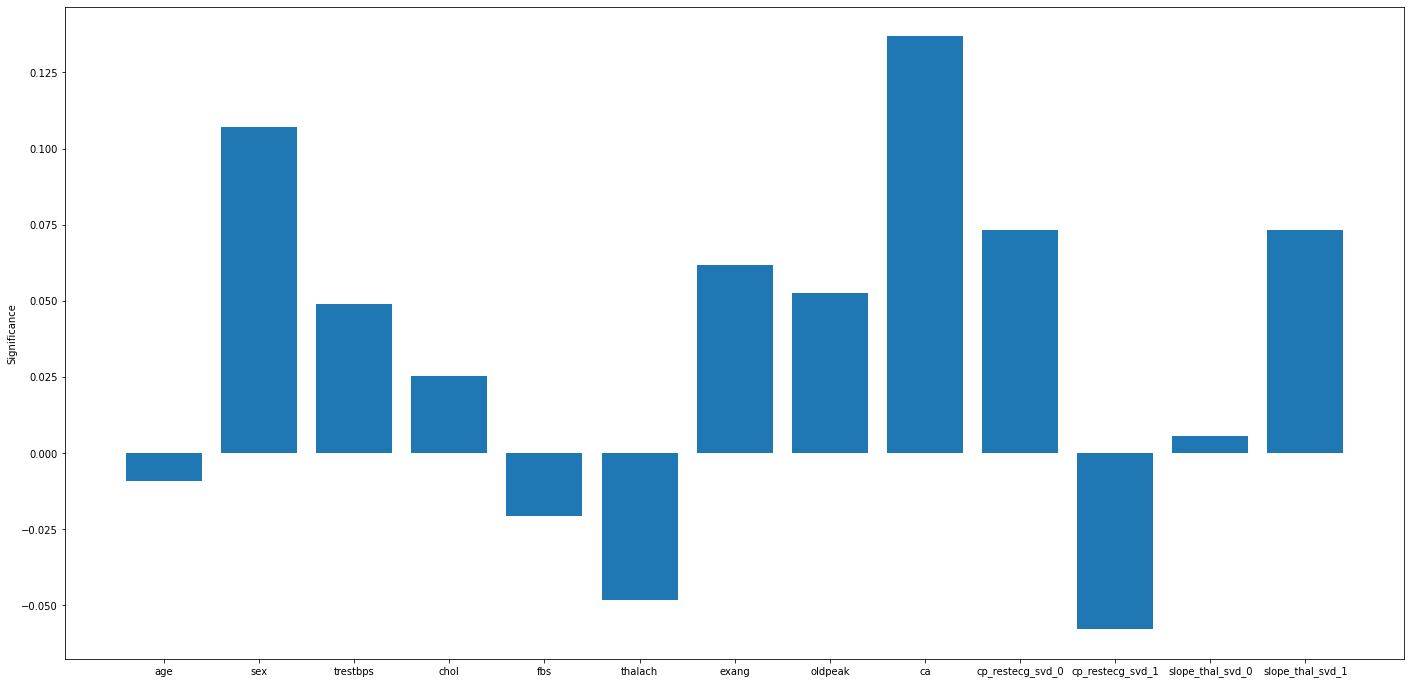

In [ ]:
plt.rcParams['figure.figsize'] = [24,12]
fig = plt.figure()

x_tick = data_svd.columns.to_list()
plt.bar(x_tick,importance)
plt.ylabel("Significance")
plt.show()

There is only one possible conclusion. The one-hot encoding WAS being used. It was just impossible to get the Significance from it because each was added to a huge number (I should just subtract the average for each).

That doesn't work, but we just do the same thing and take out one of the linearly dependent columns and now it works!

0
1
2
3
4
5
6
7
8
9
0.8486206896551725
0.0637243079395984
0.8750433227122814
0.008934210453343083


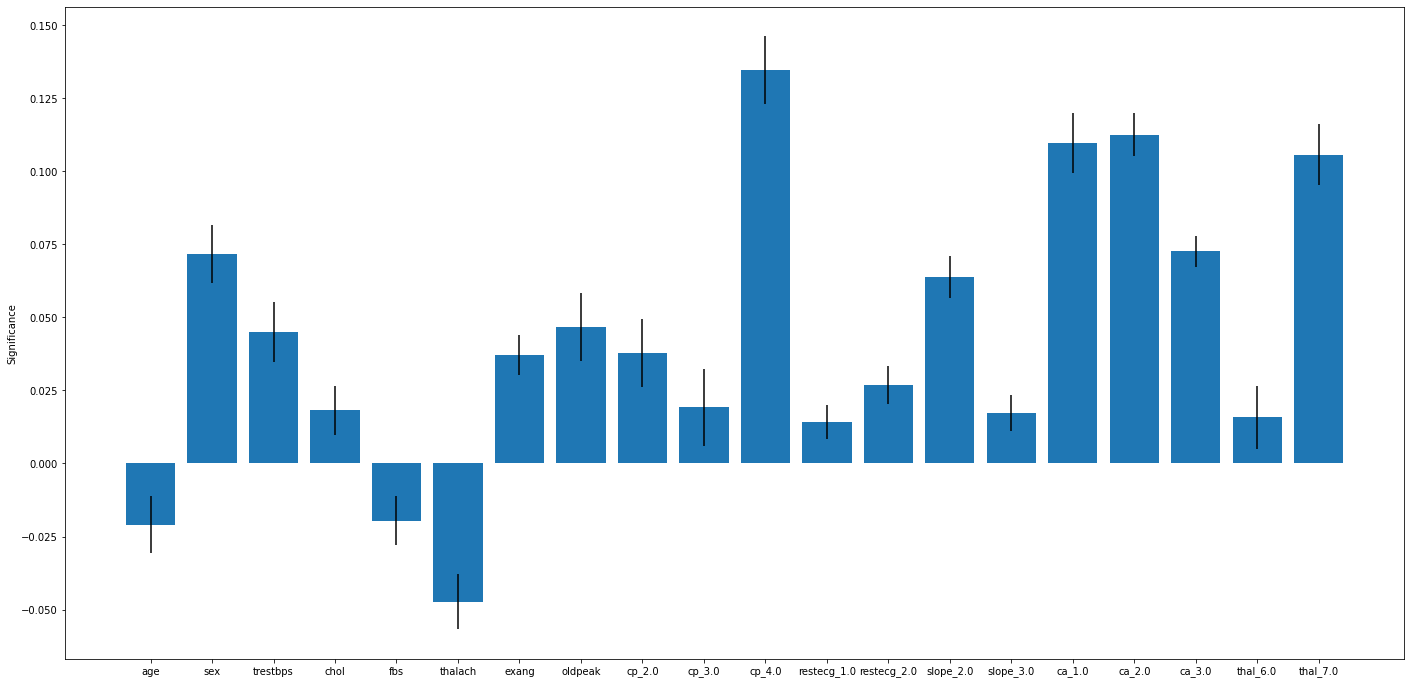

In [ ]:
X_copy = copy.deepcopy(X_encoded)
X_copy.drop(["cp_1.0","restecg_0.0","slope_1.0","ca_0.0","thal_3.0"],axis=1,inplace=True)
scaled_data = preprocessing.scale(X_copy)
scaled_data = pd.DataFrame(data=scaled_data, columns=X_copy.columns, index = X_copy.index)
result = cross_correlate(estimator,scaled_data,y)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

importance = []
importance_stdev = []
for j in range(len(X_copy.columns)): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))
average = np.mean([i[2][-1] for i in result])

X_copy.columns.to_list()
plt.rcParams['figure.figsize'] = [24,12]
fig = plt.figure()

x_tick = X_copy.columns.to_list()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()

I don't know why it suddenly works! In the end we find that one-hot encoding is the best and we just need to take out one of the linearly dependent columns each. It would be nice to somehow get the Significance of the columns we dropped.

Let's do cp_1.0. It's just the average of the other cp's/4. 

In [ ]:
# cp_1 = -(importance[8] + importance[9] + importance[10])/4
# cp_1_error = (importance_stdev[8] + importance_stdev[9] + importance_stdev[10])/4 # this needs to be changed
# importance.insert(8,cp_1)
# importance_stdev.insert(8,cp_1_error)
# importance[9] += cp_1
# importance[10] += cp_1
# importance[11] += cp_1
# x_tick.insert(8,"cp_1.0")

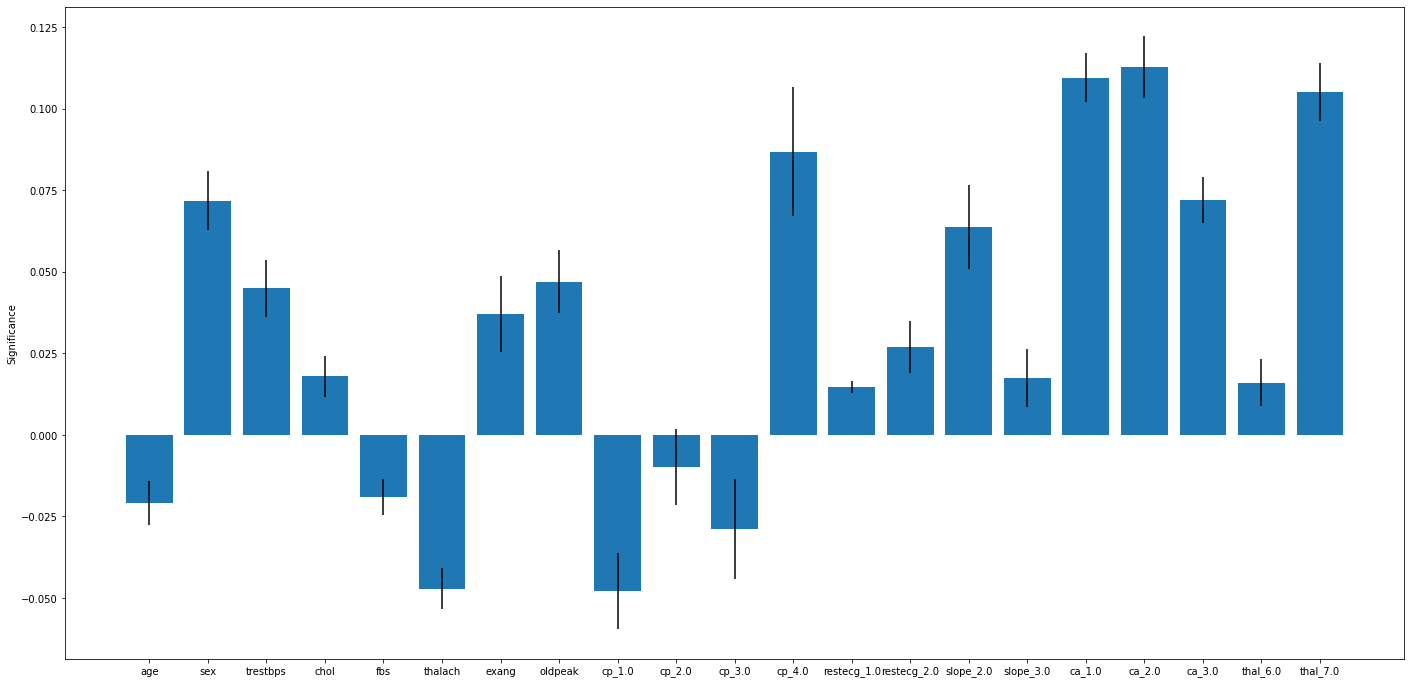

In [ ]:
# plt.figure()
# plt.bar(x_tick,importance,yerr=importance_stdev)
# plt.ylabel("Significance")
# plt.show()

I could also use how many cp_1 I actually had (look at the data). I may need to do that to get the st.devs. The cp_2.0 doesn't have such a large st.dev for sure.

I don't understand why cp_4 is positive and cp_1 is negative. cp_4 is no pain and cp_1 is 'typical pain'.

In [ ]:
df.loc[df["cp"] == 4.0,"num"].value_counts()

0    39
1    34
3    29
2    29
4    11
Name: num, dtype: int64

In [ ]:
df.loc[df["cp"] == 1.0,"num"].value_counts()

0    16
1     5
4     1
2     1
Name: num, dtype: int64

In [ ]:
(7/(16+7))

0.30434782608695654

In [ ]:
(39/(24+29+29+11+39))

0.29545454545454547

Well it's about the same, but cp_1.0 does have a bit more than cp_4.0.

In [ ]:
df.loc[df["cp"] == 2.0,"num"].value_counts()

0    40
1     6
3     2
2     1
Name: num, dtype: int64

In [ ]:
9/(40+9)

0.1836734693877551

cp_2.0 has a lot less than both cp_1.0 and cp_4.0

In [ ]:
df.loc[df["cp"] == 3.0,"num"].value_counts()

0    65
1     9
3     4
2     4
4     1
Name: num, dtype: int64

In [ ]:
18/(65+18)

0.21686746987951808

cp_3.0 also has a lot less than both cp_1.0 and cp_4.0.

I expect cp_1 and cp_4 to be positive and cp_2 and cp_3 to be negative but that's not what I see. Maybe it's more complicated? Or maybe I did it wrong. I did do it wrong. I want n_1*cp_1 + n_2*cp_2 + n_3*cp_3 + n_4*cp_4 = 0, not cp_1 + cp_2 + cp_3 + cp_4 = 0?

If nobody had cp_1, I wouldn't have to add it in. But I do think that n_1*cp_1 + n_2*cp_2 + n_3*cp_3 + n_4*cp_4 = 0 because the effect on the total data should be 0.


So right now cp_2 = (n_2 cp_2 - n_1 cp_1/3)/(n_2+n_1/3). To get back cp_2, we use cp_2_real = (cp_2 * (n_2 + n_1/3) + n_1 cp_1/3)/n_2 but first we have to solve cp_1: n_1 cp_1 + (cp_2 * (n_2 + n_1/3) + n_1 cp_1/3) + (cp_3 * (n_3 + n_1/3) + n_1 cp_1/3) + (cp_4 * (n_4 + n_1/3) + n_1 cp_1/3) = 0 or 2 n_1 cp_1 = - (cp_2 * (n_2 + n_1/3) + cp_3 * (n_3 + n_1/3) + cp_4 * (n_4 + n_1/3))

In [ ]:
# n_1 = len(df.loc[df["cp"] == 1.0])
# n_2 = len(df.loc[df["cp"] == 2.0])
# n_3 = len(df.loc[df["cp"] == 3.0])
# n_4 = len(df.loc[df["cp"] == 4.0])

In [ ]:
# cp_1 = -1/(2*n_1)*(importance[8]*(n_2+n_1/3) + importance[9]*(n_3+n_1/3) + importance[10]*(n_4+n_1/3))
# cp_1_error = (importance_stdev[8] + importance_stdev[9] + importance_stdev[10])/4 # this needs to be changed
# importance.insert(8,cp_1)
# importance_stdev.insert(8,cp_1_error)
# importance[9] = ((importance[9]*(n_2+n_1/3))+n_1*cp_1/3)/n_2
# importance[10] = ((importance[10]*(n_3+n_1/3))+n_1*cp_1/3)/n_3
# importance[11] = ((importance[11]*(n_4+n_1/3))+n_1*cp_1/3)/n_4
# x_tick.insert(8,"cp_1.0")

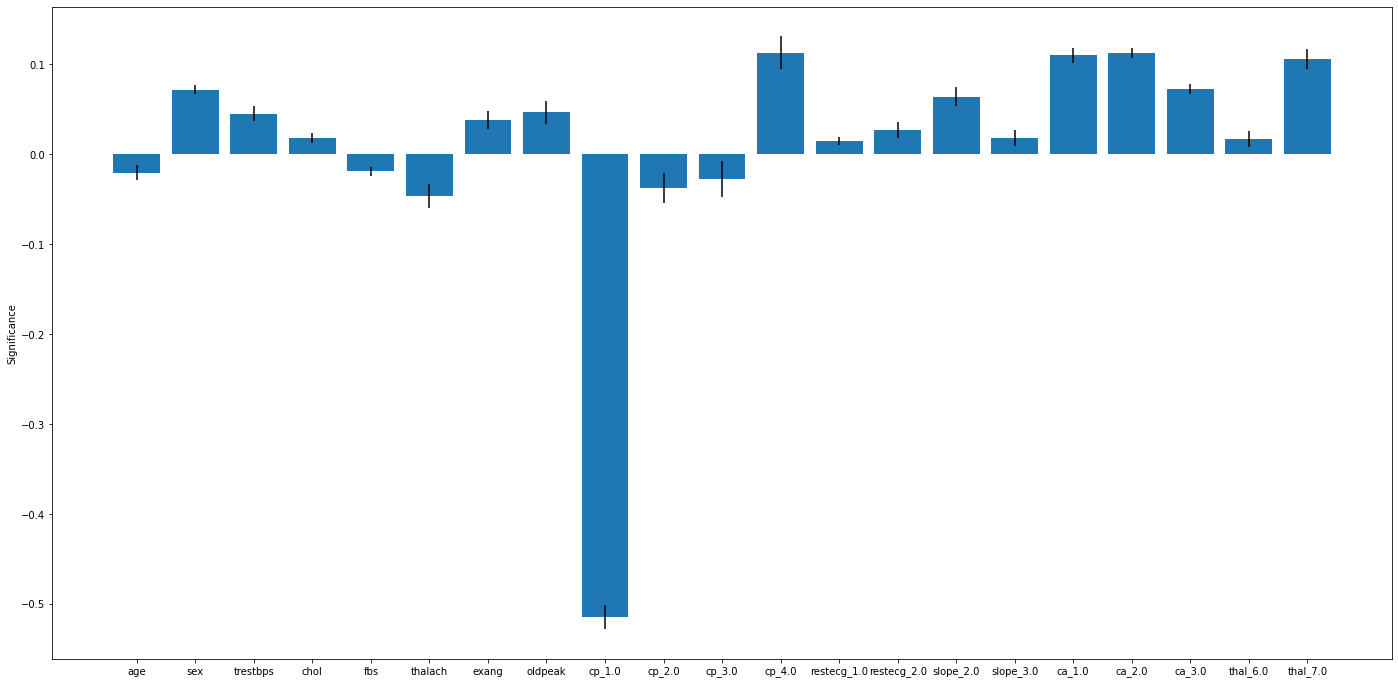

In [ ]:
# plt.figure()
# plt.bar(x_tick,importance,yerr=importance_stdev)
# plt.ylabel("Significance")
# plt.show()

I don't believe this for one second.

Because n_1 was so small, it has to work this hard for the weighted sum to be zero. What I really want is cp_1.0 and cp_4.0 to be positive and cp_2.0 and cp_3.0 to be negative.

I believe in what I did here but the outcome is clearly wrong.

In [ ]:
average

0.46168342575645244

Right now, cp_1 has an effect of 0. cp_2,cp_3,cp_4 are both positive. Let's add x to the average result[i][2][:-1] so that cp_1 is -x, cp_2 is cp_2 - x etc. Also, we want n_i cp_i = 0.

n_1*(-x) + n_2*(cp_2-x) + n_3*(cp_3-x) + n_4*(cp_4-x) = 0 or n*x = n_2 cp_2 + n_3 cp_3 + n_4 cp_4

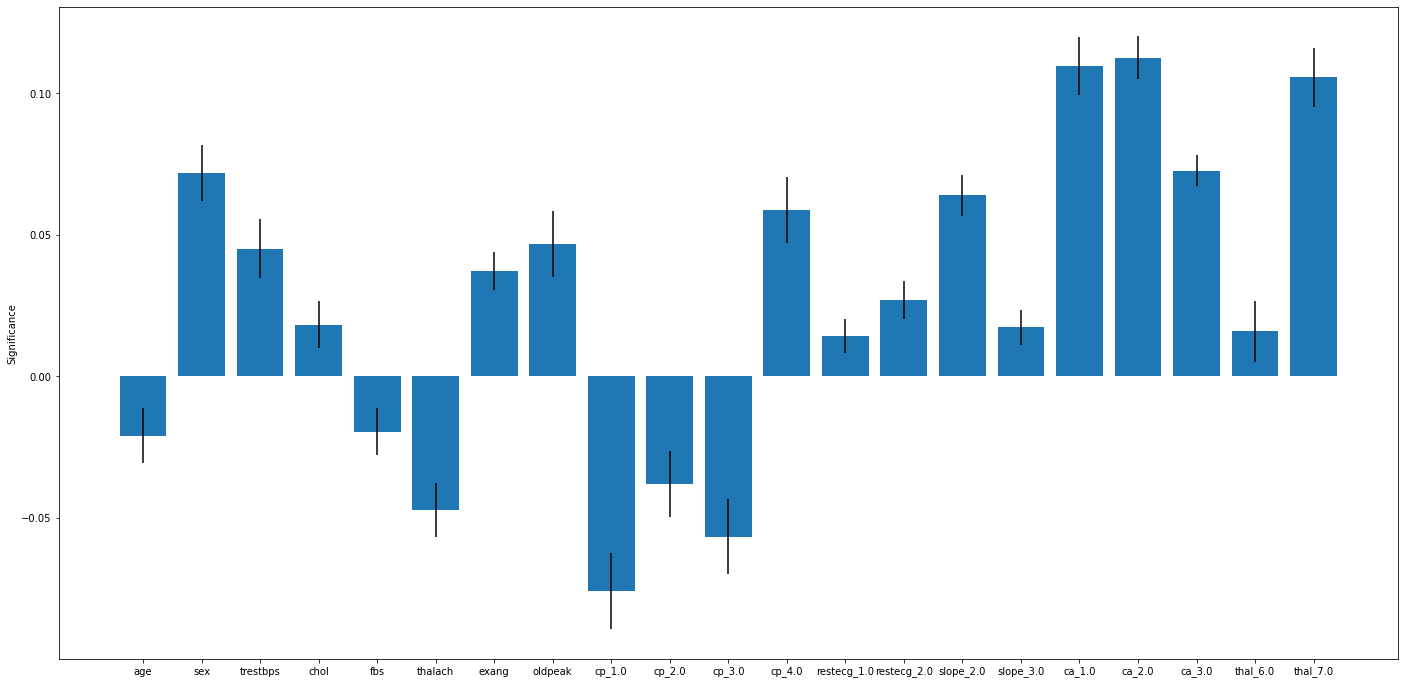

In [ ]:
n_1 = len(df.loc[df["cp"] == 1.0])
n_2 = len(df.loc[df["cp"] == 2.0])
n_3 = len(df.loc[df["cp"] == 3.0])
n_4 = len(df.loc[df["cp"] == 4.0])
x = (n_2*importance[8]+n_3*importance[9]+n_4*importance[10])/(n_1+n_2+n_3+n_4)
cp_1_error = np.sqrt((n_2*importance_stdev[8]**2 + n_3*importance_stdev[9]**2 + n_4*importance_stdev[10]**2)/(3/4*(n_1+n_2+n_3+n_4)))
importance.insert(8,-x)
importance_stdev.insert(8,cp_1_error)
importance[9] = importance[9]-x
importance[10] = importance[10]-x
importance[11] = importance[11]-x
x_tick.insert(8,"cp_1.0")
plt.figure()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()
average = average + x

In [ ]:
average

0.5370350606232529

This is the right answer but I don't like that cp_1.0 is negative, it is 'typical pain'.

I want to take out cp_4 and do the same thing and see what I get.

0
1
2
3
4
5
6
7
8
9
0.8486206896551725
0.06723705654638319
0.8731762535636426
0.007744155295678444


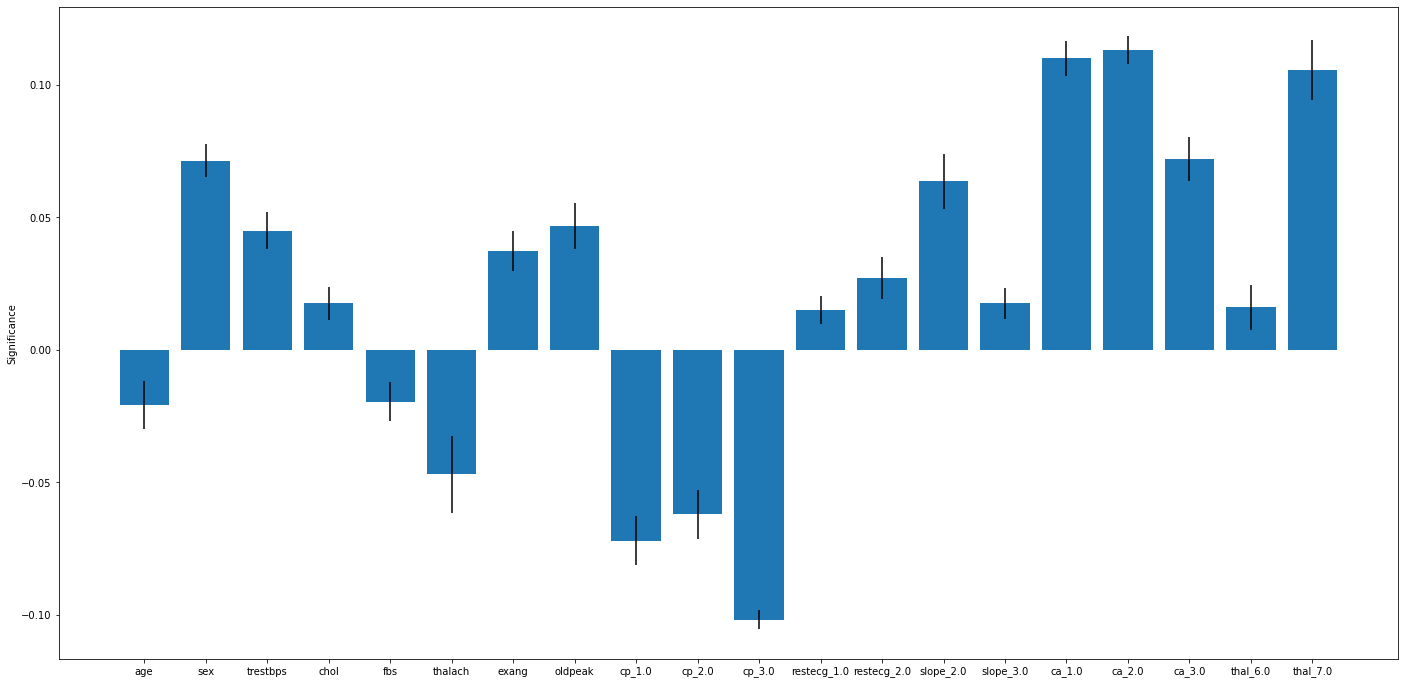

In [ ]:
X_copy = copy.deepcopy(X_encoded)
X_copy.drop(["cp_4.0","restecg_0.0","slope_1.0","ca_0.0","thal_3.0"],axis=1,inplace=True)
scaled_data = preprocessing.scale(X_copy)
scaled_data = pd.DataFrame(data=scaled_data, columns=X_copy.columns, index = X_copy.index)
result = cross_correlate(estimator,scaled_data,y)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

importance = []
importance_stdev = []
for j in range(len(X_copy.columns)): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))
average = np.mean([i[2][-1] for i in result])

X_copy.columns.to_list()
plt.rcParams['figure.figsize'] = [24,12]
fig = plt.figure()

x_tick = X_copy.columns.to_list()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()

Interesting! So this is real.

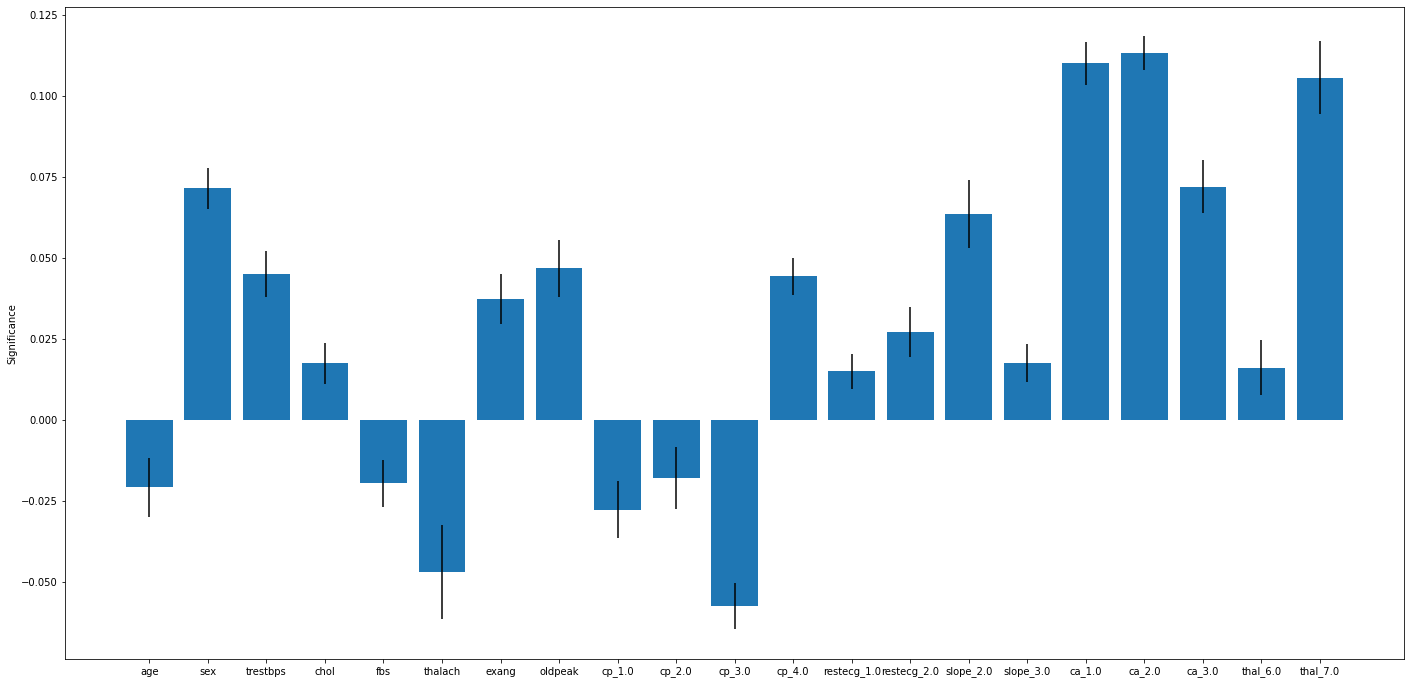

In [ ]:
n_1 = len(df.loc[df["cp"] == 1.0])
n_2 = len(df.loc[df["cp"] == 2.0])
n_3 = len(df.loc[df["cp"] == 3.0])
n_4 = len(df.loc[df["cp"] == 4.0])
x = (n_1*importance[8]+n_2*importance[9]+n_3*importance[10])/(n_1+n_2+n_3+n_4)
cp_4_error = np.sqrt((n_1*importance_stdev[8]**2 + n_2*importance_stdev[9]**2 + n_3*importance_stdev[10]**2)/(3/4*(n_1+n_2+n_3+n_4)))
importance.insert(11,-x)
importance_stdev.insert(11,cp_4_error)
importance[8] = importance[8]-x
importance[9] = importance[9]-x
importance[10] = importance[10]-x
cp_1_error = np.sqrt((n_1*importance_stdev[8]**2 + n_4*cp_4_error**2)/(1/2*(n_1+n_4)))
cp_2_error = np.sqrt((n_2*importance_stdev[9]**2 + n_4*cp_4_error**2)/(1/2*(n_2+n_4)))
cp_3_error = np.sqrt((n_3*importance_stdev[10]**2 + n_4*cp_4_error**2)/(1/2*(n_3+n_4)))
importance_stdev[8] = cp_1_error
importance_stdev[9] = cp_2_error
importance_stdev[10] = cp_3_error
x_tick.insert(11,"cp_4.0")
plt.figure()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()
average = average + x

The error bar on the inferred bar does seem very large. It's sad that actually cp_1.0 increases the rate of num by 0.1 but because that's already understood by the other features, cp_1.0 actually "downcorrects". There should be a bigger error-bar because of this.

It would be great to take out correlations first so this doesn't happen.

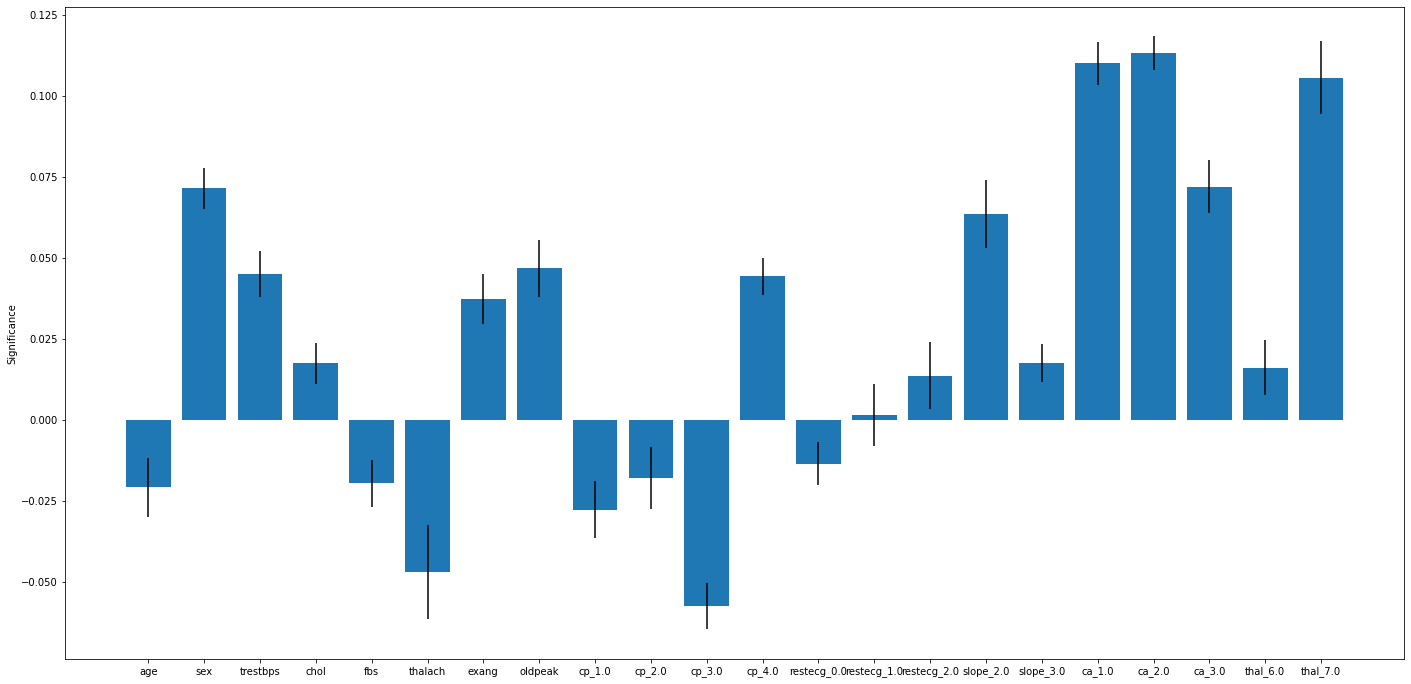

In [ ]:
n_1 = len(df.loc[df["restecg"] == 0.0])
n_2 = len(df.loc[df["restecg"] == 1.0])
n_3 = len(df.loc[df["restecg"] == 2.0])
x = (n_2*importance[12]+n_3*importance[13])/(n_1+n_2+n_3)
restecg_0_error = np.sqrt((n_2*importance_stdev[12]**2 + n_3*importance_stdev[13]**2)/(2/3*(n_1+n_2+n_3)))
importance.insert(12,-x)
importance_stdev.insert(12,restecg_0_error)
importance[13] = importance[13]-x
importance[14] = importance[14]-x
restecg_1_error = np.sqrt((n_2*importance_stdev[13]**2 + n_1*restecg_0_error**2)/(1/2*(n_1+n_2)))
restecg_2_error = np.sqrt((n_3*importance_stdev[14]**2 + n_1*restecg_0_error**2)/(1/2*(n_1+n_3)))
importance_stdev[13] = restecg_1_error
importance_stdev[14] = restecg_2_error
x_tick.insert(12,"restecg_0.0")
plt.figure()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()
average = average + x

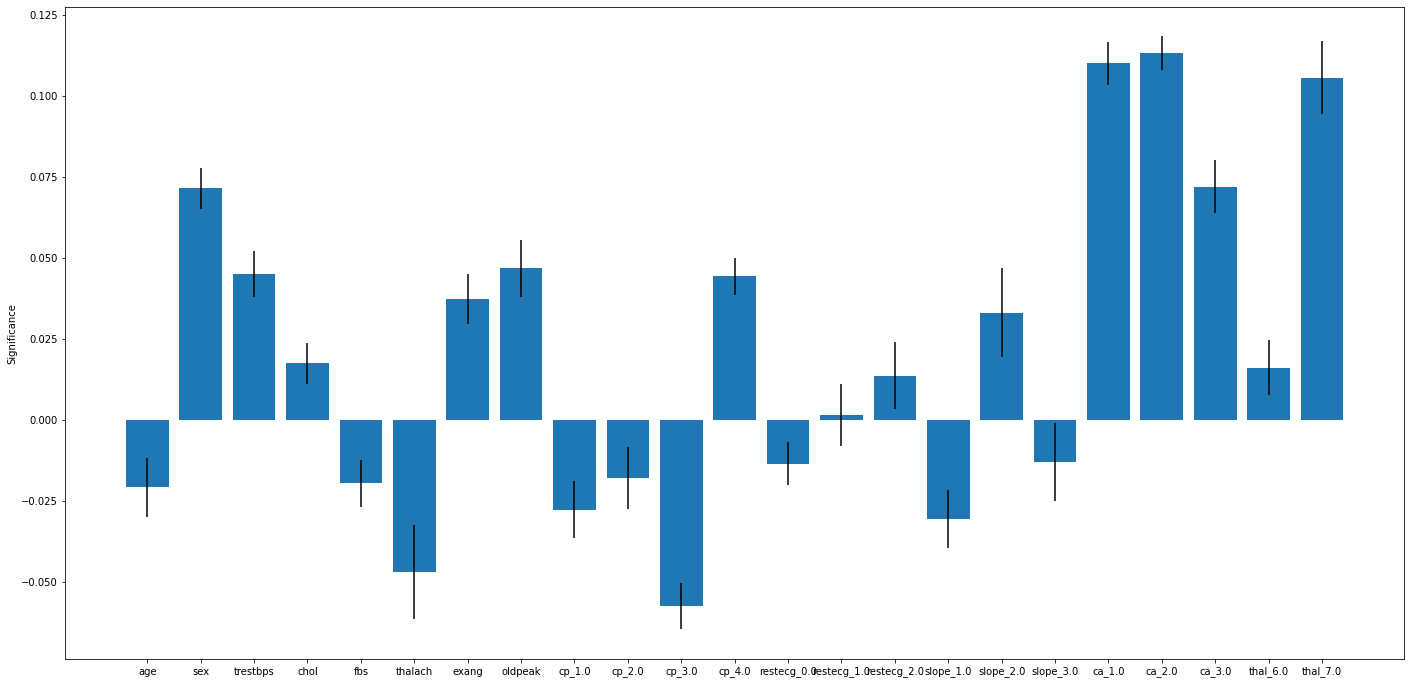

In [ ]:
n_1 = len(df.loc[df["slope"] == 1.0])
n_2 = len(df.loc[df["slope"] == 2.0])
n_3 = len(df.loc[df["slope"] == 3.0])
x = (n_2*importance[15]+n_3*importance[16])/(n_1+n_2+n_3)
slope_0_error = np.sqrt((n_2*importance_stdev[15]**2 + n_3*importance_stdev[16]**2)/(2/3*(n_1+n_2+n_3)))
importance.insert(15,-x)
importance_stdev.insert(15,slope_0_error)
importance[16] = importance[16]-x
importance[17] = importance[17]-x
slope_1_error = np.sqrt((n_2*importance_stdev[16]**2 + n_1*slope_0_error**2)/(1/2*(n_1+n_2)))
slope_2_error = np.sqrt((n_3*importance_stdev[17]**2 + n_1*slope_0_error**2)/(1/2*(n_1+n_3)))
importance_stdev[16] = slope_1_error
importance_stdev[17] = slope_2_error
x_tick.insert(15,"slope_1.0")
plt.figure()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()
average = average + x

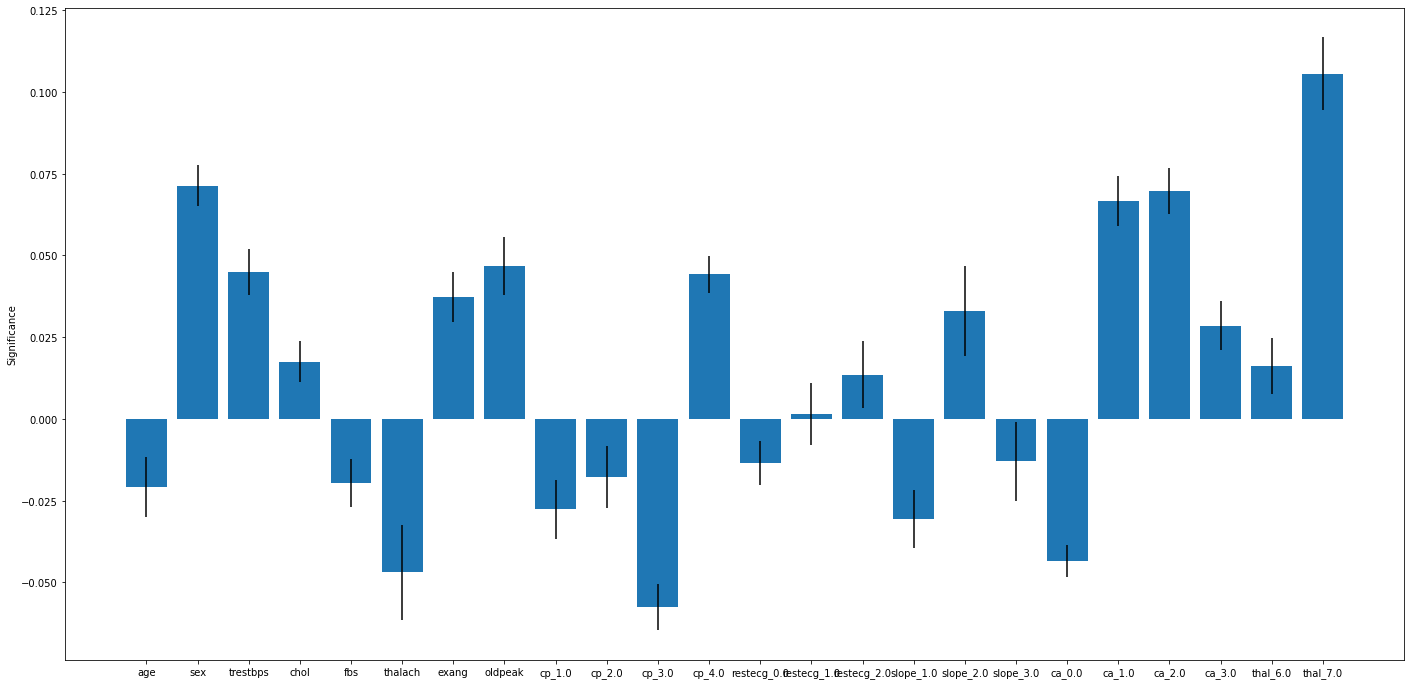

In [ ]:
n_1 = len(df.loc[df["ca"] == "0.0"])
n_2 = len(df.loc[df["ca"] == "1.0"])
n_3 = len(df.loc[df["ca"] == "2.0"])
n_4 = len(df.loc[df["ca"] == "3.0"])
x = (n_2*importance[18]+n_3*importance[19]+n_4*importance[20])/(n_1+n_2+n_3+n_4)
ca_0_error = np.sqrt((n_2*importance_stdev[18]**2 + n_3*importance_stdev[19]**2 + n_4*importance_stdev[20]**2)/(3/4*(n_1+n_2+n_3+n_4)))
importance.insert(18,-x)
importance_stdev.insert(18,ca_0_error)
importance[19] = importance[19]-x
importance[20] = importance[20]-x
importance[21] = importance[21]-x
ca_1_error = np.sqrt((n_2*importance_stdev[19]**2 + n_1*ca_0_error**2)/(1/2*(n_1+n_2)))
ca_2_error = np.sqrt((n_3*importance_stdev[20]**2 + n_1*ca_0_error**2)/(1/2*(n_1+n_3)))
ca_3_error = np.sqrt((n_4*importance_stdev[21]**2 + n_1*ca_0_error**2)/(1/2*(n_1+n_4)))
importance_stdev[19] = ca_1_error
importance_stdev[20] = ca_2_error
importance_stdev[21] = ca_3_error
x_tick.insert(18,"ca_0.0")
plt.figure()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()
average = average + x

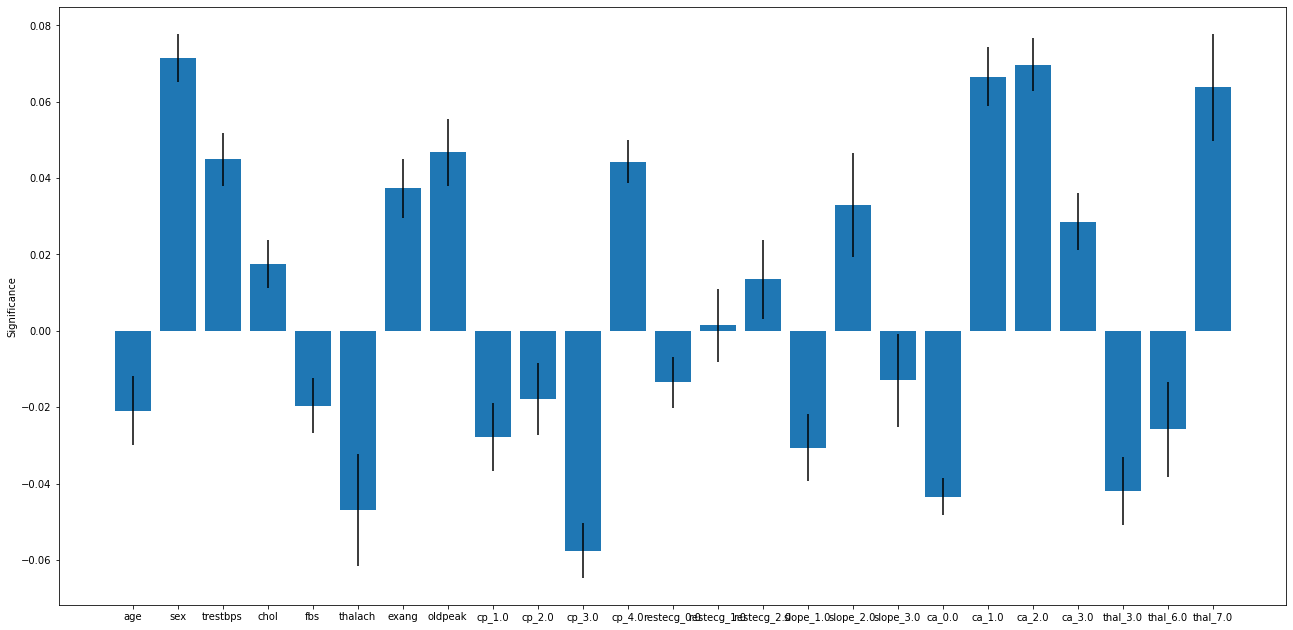

In [ ]:
n_1 = len(df.loc[df["thal"] == "3.0"])
n_2 = len(df.loc[df["thal"] == "6.0"])
n_3 = len(df.loc[df["thal"] == "7.0"])
x = (n_2*importance[22]+n_3*importance[23])/(n_1+n_2+n_3)
thal_3_error = np.sqrt((n_2*importance_stdev[22]**2 + n_3*importance_stdev[23]**2)/(2/3*(n_1+n_2+n_3)))
importance.insert(22,-x)
importance_stdev.insert(22,thal_3_error)
importance[23] = importance[23]-x
importance[24] = importance[24]-x
thal_6_error = np.sqrt((n_2*importance_stdev[23]**2 + n_1*thal_3_error**2)/(1/2*(n_1+n_2)))
thal_7_error = np.sqrt((n_3*importance_stdev[24]**2 + n_1*thal_3_error**2)/(1/2*(n_1+n_3)))
importance_stdev[23] = thal_6_error
importance_stdev[24] = thal_7_error
x_tick.insert(22,"thal_3.0")
plt.figure(figsize=(22,11))
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()
average = average + x

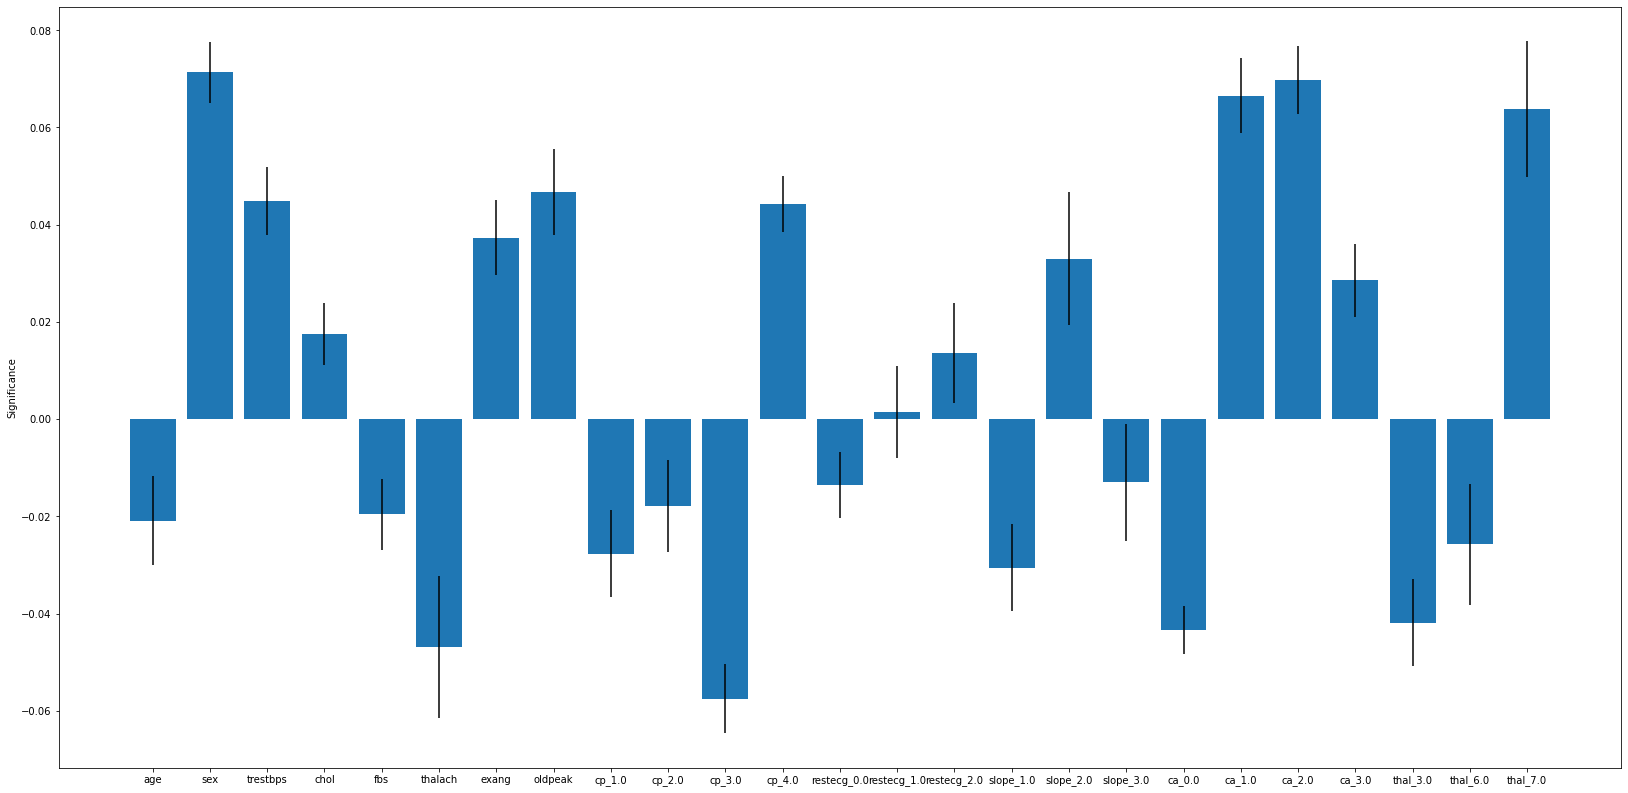

In [ ]:
plt.figure(figsize=(28,14))
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()

In [ ]:
average

0.5460524548431582

In [ ]:
std_count = np.array([importance[i]/importance_stdev[i] for i in range(len(importance))])
x_tick = np.array(x_tick)
plt.figure(figsize=(28,14))
plt.bar(x_tick,std_count)
plt.ylabel("Std_count")
plt.show()

In [ ]:
np.array(sorted_ticks)[np.abs(sorted_std)>2.0]

array(['sex', 'ca_2.0', 'ca_0.0', 'ca_1.0', 'cp_3.0', 'cp_4.0',
       'trestbps', 'oldpeak', 'exang', 'thal_3.0', 'thal_7.0', 'ca_3.0',
       'slope_1.0', 'thalach', 'cp_1.0', 'chol', 'fbs', 'slope_2.0',
       'age', 'thal_6.0'], dtype='<U11')

It's hard to explain that saying you have no pain is one of the main ways to find out you have a problem.

Also, these St. Devs are much too small. Also, it would be nice to take out correlations. Also, I wanted to find a way to take this number and actually make it a rate of heart disease (i.e. if y_pred = 0.6, how many people were sick, if y_pred = 0.8, how many ...)

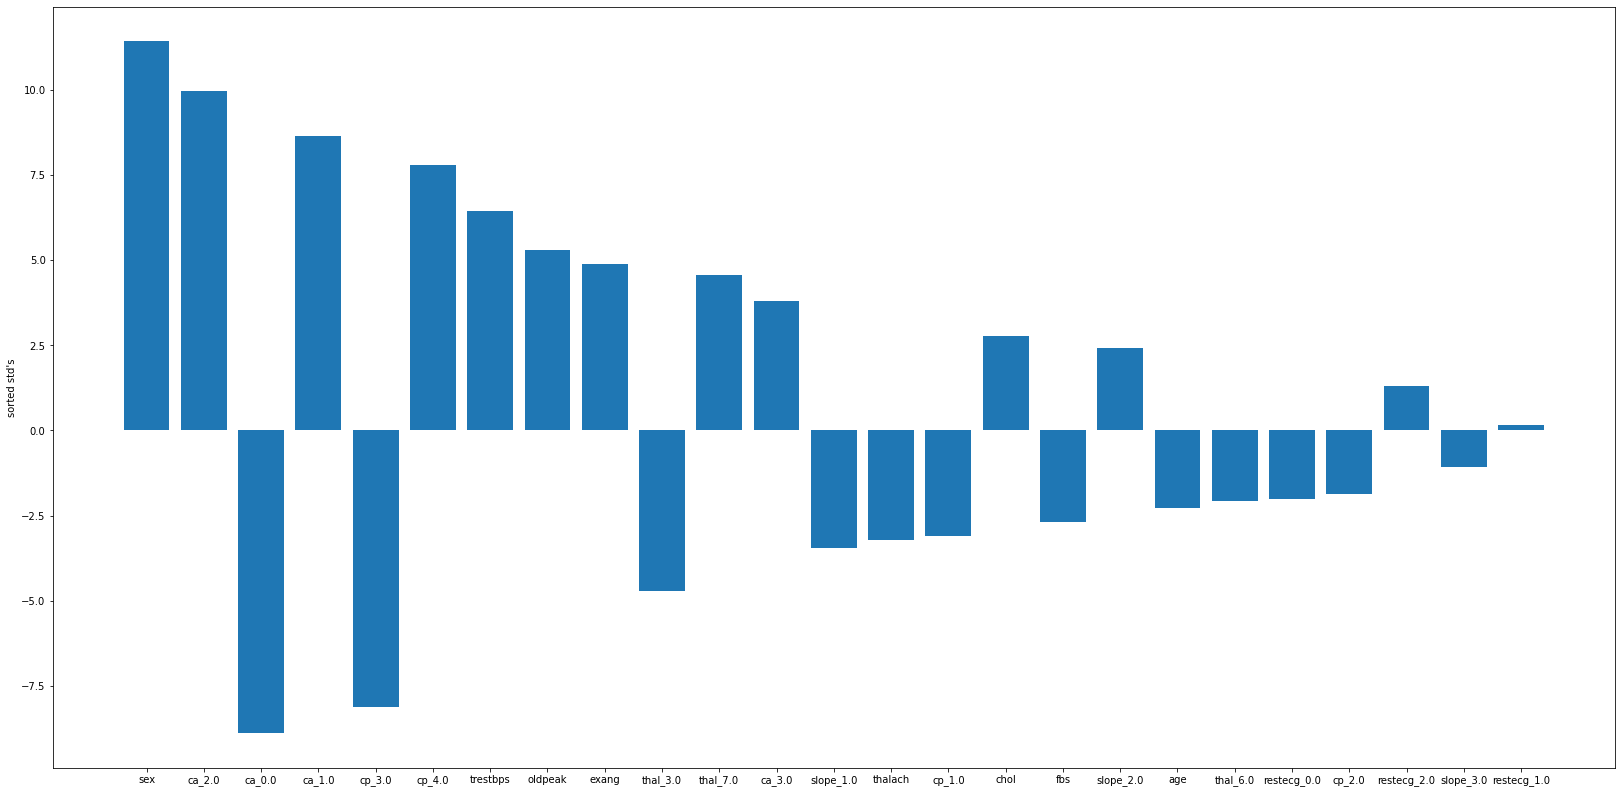

In [ ]:
sorted_std = sorted(std_count, key=abs,reverse=True)
sorted_ticks = [tick for _,tick in sorted(zip(abs(std_count),x_tick),reverse=True)]
plt.figure(figsize=(28,14))
plt.bar(sorted_ticks,sorted_std)
plt.ylabel("sorted std's")
plt.show()

Everything cp_1.0 and after can be IGNORED.

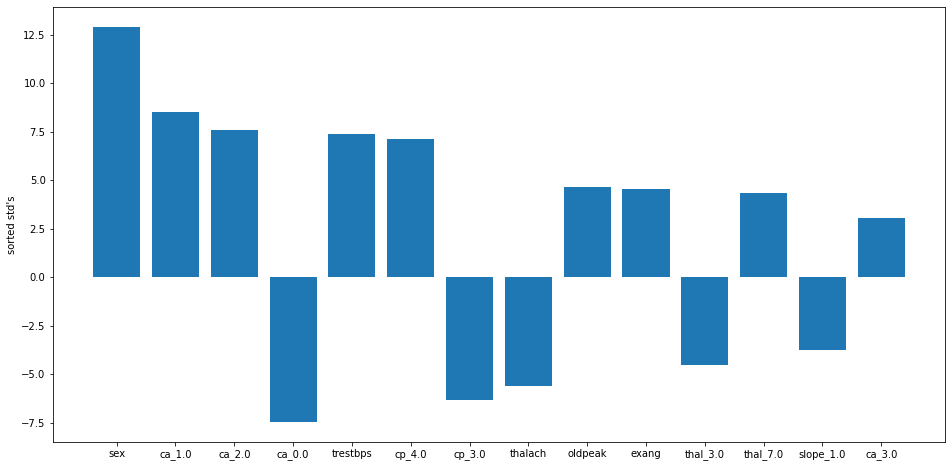

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(sorted_ticks[:14],sorted_std[:14])
plt.ylabel("sorted std's")
plt.show()

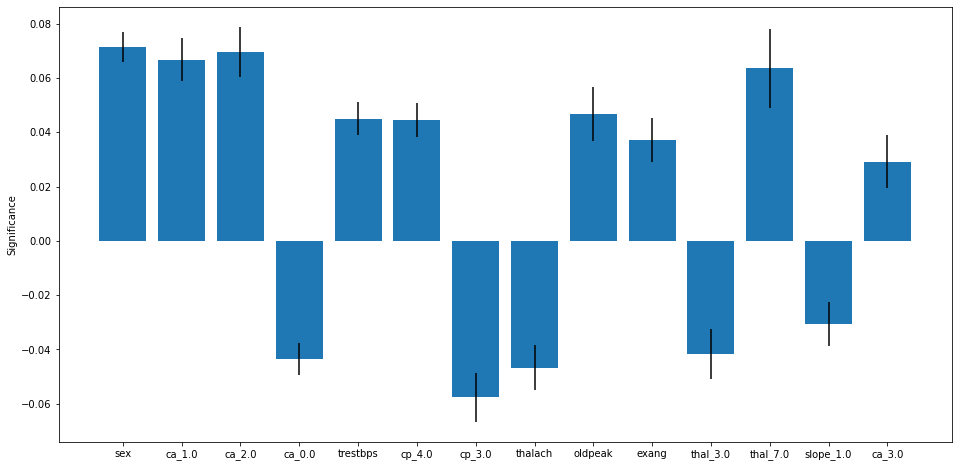

In [ ]:
sorted_importance = [temp for _,temp in sorted(zip(abs(std_count),importance),reverse=True)]
sorted_importance_stdev = [temp for _,temp in sorted(zip(abs(std_count),importance_stdev),reverse=True)]
plt.figure(figsize=(16,8))
plt.bar(sorted_ticks[:14],sorted_importance[:14],yerr=sorted_importance_stdev[:14])
plt.ylabel("Significance")
plt.show()

Now we could redo everything just with these 14.

0
1
2
3
4
5
6
7
8
9
0.8449425287356321
0.06082501884226679
0.8649477332438928
0.005851522548608713


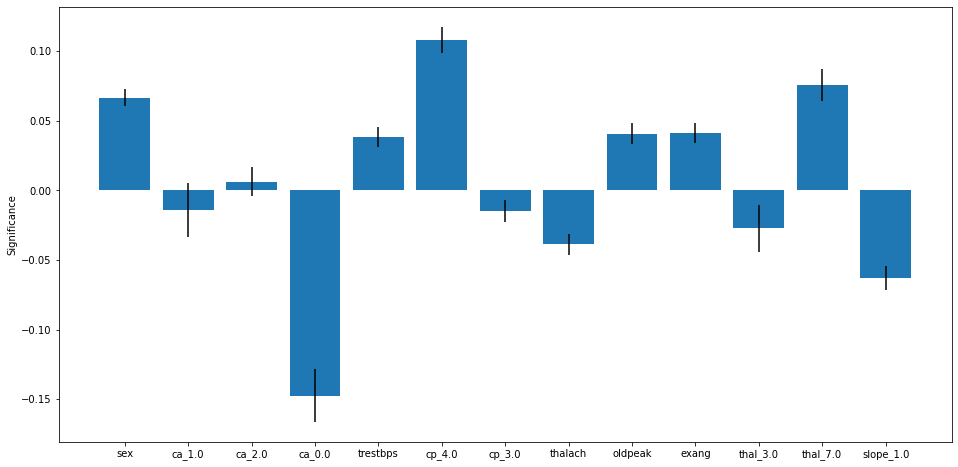

In [ ]:
X_copy = copy.deepcopy(X_encoded)
X_copy = X_copy[["sex","ca_1.0","ca_2.0","ca_0.0","trestbps","cp_4.0","cp_3.0","thalach","oldpeak","exang","thal_3.0","thal_7.0","slope_1.0"]]
scaled_data = preprocessing.scale(X_copy)
scaled_data = pd.DataFrame(data=scaled_data, columns=X_copy.columns, index = X_copy.index)
result = cross_correlate(estimator,scaled_data,y)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

importance = []
importance_stdev = []
for j in range(len(X_copy.columns)): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))
average = np.mean([i[2][-1] for i in result])

X_copy.columns.to_list()
plt.rcParams['figure.figsize'] = [16,8]
fig = plt.figure()

x_tick = X_copy.columns.to_list()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()

We do well with these 14 (0.85 +-0.045) but the result is different from before!

Some of these are only important if non-important features are included. Let's take them out, too.

0
1
2
3
4
5
6
7
8
9
0.8587356321839081
0.03881059631142446
0.868317122253899
0.004217758321523968


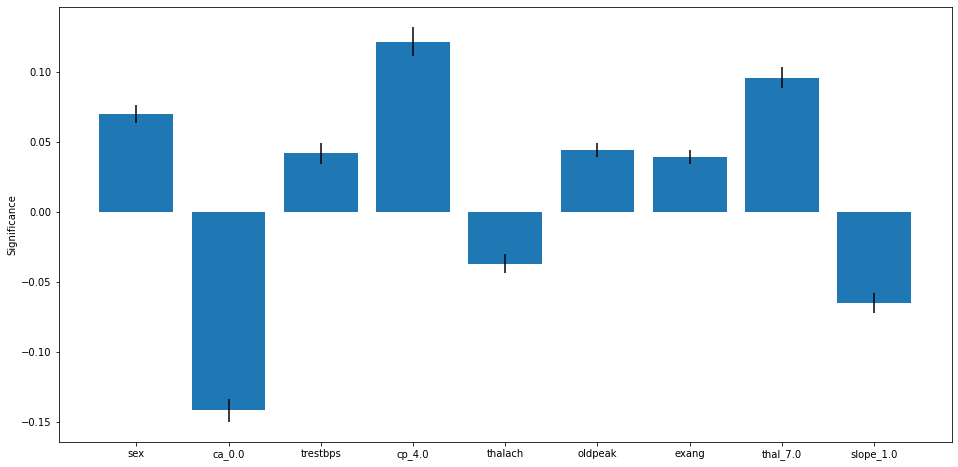

In [ ]:
X_copy = copy.deepcopy(X_encoded)
X_copy = X_copy[["sex","ca_0.0","trestbps","cp_4.0","thalach","oldpeak","exang","thal_7.0","slope_1.0"]]
scaled_data = preprocessing.scale(X_copy)
scaled_data = pd.DataFrame(data=scaled_data, columns=X_copy.columns, index = X_copy.index)
result = cross_correlate(estimator,scaled_data,y)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

importance = []
importance_stdev = []
for j in range(len(X_copy.columns)): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))
average = np.mean([i[2][-1] for i in result])

X_copy.columns.to_list()
plt.rcParams['figure.figsize'] = [16,8]
fig = plt.figure()

x_tick = X_copy.columns.to_list()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.show()

The result is really good! 0.86 +- 0.04!! The best yet. And only 9 factors! Let's sort them again.

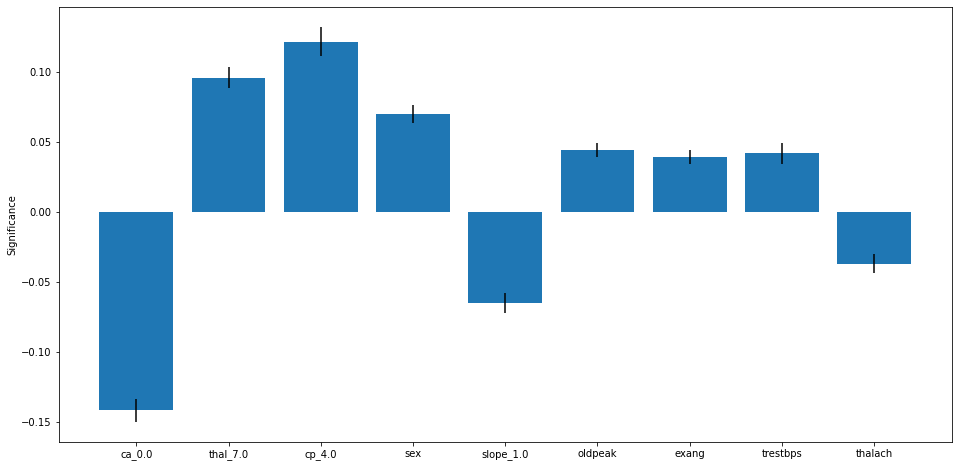

In [ ]:
std_count = np.array([importance[i]/importance_stdev[i] for i in range(len(importance))])
x_tick = np.array(x_tick)
sorted_ticks = [tick for _,tick in sorted(zip(abs(std_count),x_tick),reverse=True)]
sorted_importance = [temp for _,temp in sorted(zip(abs(std_count),importance),reverse=True)]
sorted_importance_stdev = [temp for _,temp in sorted(zip(abs(std_count),importance_stdev),reverse=True)]
plt.figure(figsize=(16,8))
plt.bar(sorted_ticks,sorted_importance,yerr=sorted_importance_stdev)
plt.ylabel("Significance")
plt.show()

Other than 1-hot, we could also use (A,B,C,A & B, A & C, B & C). That would be lots more features! But don't we have that? We have Not A which is the same as B & C. In some ways, Not A is the same as B & C. They are linearly dependent. So this is only important when we have 4 or more categories. There we do need A&B... and it should really be A | B. "ca" and "cp" are the only ones for 8 more columns.

Maybe that would help us with our cp_4.0 problem.

Now let's do PCA again.

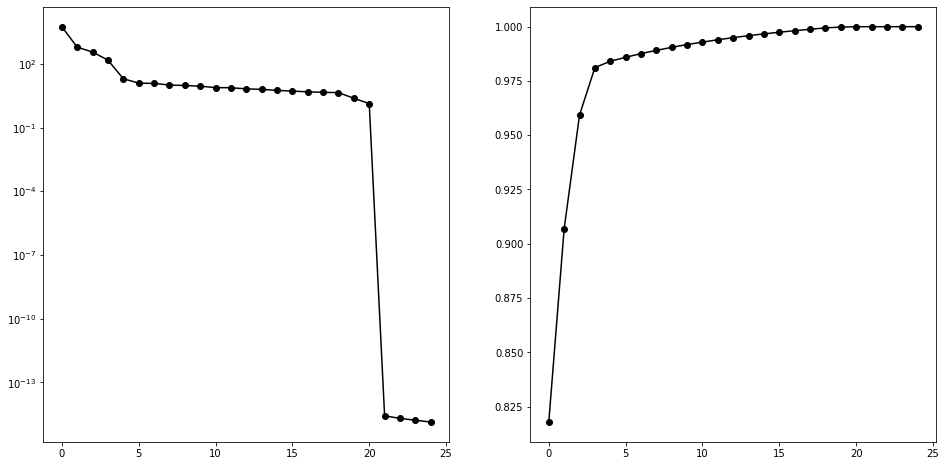

In [ ]:
  U,S,VT = np.linalg.svd(X_encoded,full_matrices=False)
  fig1 = plt.figure()
  ax1 = fig1.add_subplot(121)
  ax1.semilogy(S,'-o',color='k')
  ax2 = fig1.add_subplot(122)
  ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

  plt.show()


So this tells me I only need 4 principal components.

In [ ]:
U.shape

(297, 25)

In [ ]:
VT.shape

(25, 25)

In [ ]:
S.shape

(25,)

So it is clear that VT takes the factors and turns them into PCA1, S weights them and U tells us what people have what PCA's. For clustering, we want to do VT[0,:] @ X_encoded[j,:]

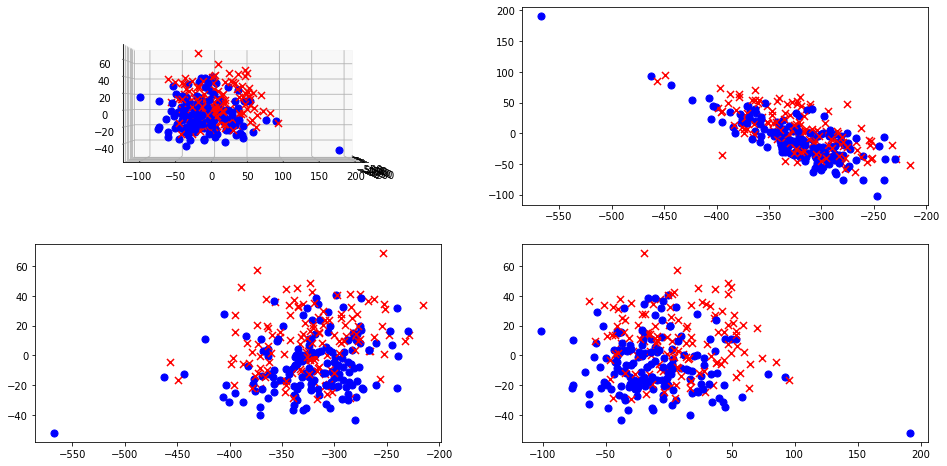

In [ ]:
fig2 = plt.figure()
ax = fig2.add_subplot(221,projection = '3d')
for j in range(X_encoded.shape[0]):
  a = VT[0,:] @ X_encoded.iloc[j,:].T
  b = VT[1,:] @ X_encoded.iloc[j,:].T
  c = VT[2,:] @ X_encoded.iloc[j,:].T

  if y.iloc[j] == 1:
    ax.scatter(a,b,c,marker = 'x',color='r',s=50)
  else:
    ax.scatter(a,b,c,marker = 'o',color='b',s=50)
ax.view_init(0,0)

ax2 = fig2.add_subplot(222)
for j in range(X_encoded.shape[0]):
  a = VT[0,:] @ X_encoded.iloc[j,:].T
  b = VT[1,:] @ X_encoded.iloc[j,:].T
  c = VT[2,:] @ X_encoded.iloc[j,:].T

  if y.iloc[j] == 1:
    ax2.scatter(a,b,marker = 'x',color='r',s=50)
  else:
    ax2.scatter(a,b,marker = 'o',color='b',s=50)

ax3 = fig2.add_subplot(223)
for j in range(X_encoded.shape[0]):
  a = VT[0,:] @ X_encoded.iloc[j,:].T
  b = VT[1,:] @ X_encoded.iloc[j,:].T
  c = VT[2,:] @ X_encoded.iloc[j,:].T

  if y.iloc[j] == 1:
    ax3.scatter(a,c,marker = 'x',color='r',s=50)
  else:
    ax3.scatter(a,c,marker = 'o',color='b',s=50)

ax4 = fig2.add_subplot(224)
for j in range(X_encoded.shape[0]):
  a = VT[0,:] @ X_encoded.iloc[j,:].T
  b = VT[1,:] @ X_encoded.iloc[j,:].T
  c = VT[2,:] @ X_encoded.iloc[j,:].T

  if y.iloc[j] == 1:
    ax4.scatter(b,c,marker = 'x',color='r',s=50)
  else:
    ax4.scatter(b,c,marker = 'o',color='b',s=50)

plt.show()

Looks like I can use a and c and b and c to distinguish. Maybe c is just good, a and b are both not very good.

The problem is that even though the PCAs are good for understanding X_encoded, they aren't made to use that to get a good y. That's what the SVD was good for!

But I can use the 4 PCAs to do SVD. That's only a 4x4 SVD.

In [ ]:
temp = []
for j in range(X_encoded.shape[0]):
  temp2 = []
  for i in range(19):
    temp2.append(VT[i,:] @ X_encoded.iloc[j,:].T)

  temp.append(temp2)

pca_svd = pd.DataFrame(temp)

In [ ]:
pca_svd

0          1          2   ...            22            23            24
0   -318.146818 -18.335181  14.673684  ... -3.330669e-16 -1.665335e-16 -1.665335e-16
1   -346.665436  36.935067  44.860297  ... -1.665335e-16  1.526557e-16  2.463307e-16
2   -296.014747   2.814890   9.454481  ...  1.110223e-16 -2.775558e-17 -5.464379e-17
3   -337.871394 -25.176112 -27.482576  ... -5.551115e-17  6.938894e-17 -3.122502e-17
4   -296.043686 -43.784195 -12.291461  ... -1.665335e-16 -2.081668e-16  3.018419e-16
..          ...        ...        ...  ...           ...           ...           ...
292 -308.950012   7.349235  23.569656  ...  0.000000e+00  1.665335e-16  2.229120e-16
293 -316.776683  27.971396 -10.525525  ...  3.330669e-16 -2.775558e-17 -2.211772e-16
294 -283.489819 -36.983776  25.349044  ...  5.551115e-17 -5.551115e-17  5.637851e-17
295 -216.084544 -51.488929  33.751322  ...  1.110223e-16  1.110223e-16  2.229120e-16
296 -324.401278 -26.526979 -12.561247  ... -4.996004e-16 -1.387779e-17  4.683753e-16

[297 rows x 25 columns]

0
1
2
3
4
5
6
7
8
9
0.8613793103448277
0.04578176935857543
0.8724202023589915
0.005826884481890999


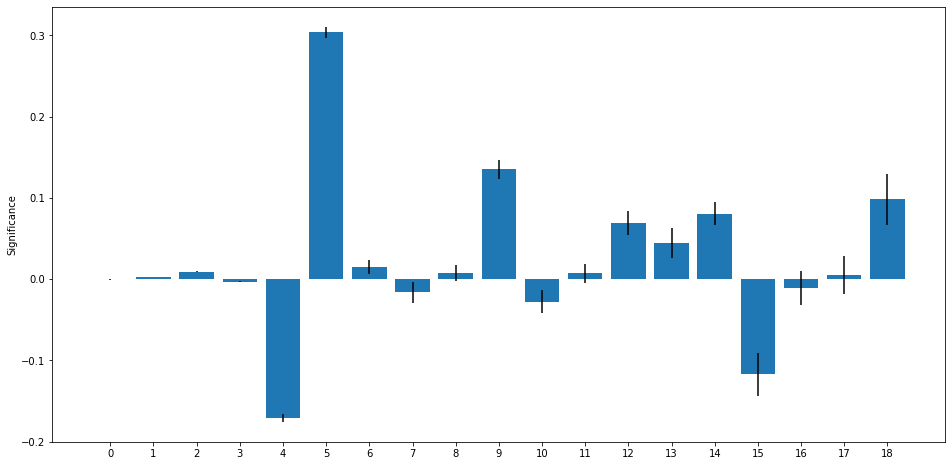

In [ ]:
result = cross_correlate(estimator,pca_svd,y)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

importance = []
importance_stdev = []
for j in range(len(pca_svd.columns)): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))
average = np.mean([i[2][-1] for i in result])

pca_svd.columns.to_list()
plt.rcParams['figure.figsize'] = [16,8]
fig = plt.figure()

x_tick = pca_svd.columns.to_list()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.xticks(ticks=x_tick)
plt.show()

The 20th PCA is linearly dependent with another so we can only do 19 PCAs. The result is similar to the non-PCA SVD but there is no relationships between the PCAs that help with understanding X and the SVDs that help us understand y.

The 'good PCAs' are 4,5,9,10,12,13,14,15,18.

In [ ]:
temp = []
for j in range(X_encoded.shape[0]):
  temp2 = []
  for i in [4,5,9,10,12,13,14,15,18]:
    temp2.append(VT[i,:] @ X_encoded.iloc[j,:].T)

  temp.append(temp2)

pca_svd = pd.DataFrame(temp)

0
1
2
3
4
5
6
7
8
9
0.7771264367816093
0.08847506558805077
0.7949731678685226
0.014161549224153054


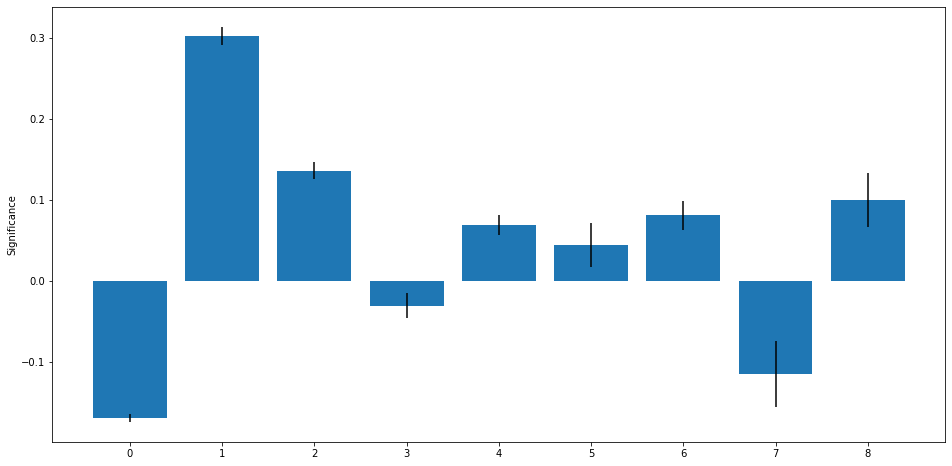

In [ ]:
result = cross_correlate(estimator,pca_svd,y)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

importance = []
importance_stdev = []
for j in range(len(pca_svd.columns)): # we can't use the categorical values right now
  importance.append(np.mean([i[2][j] for i in result]))
  importance_stdev.append(np.std([i[2][j] for i in result]))
average = np.mean([i[2][-1] for i in result])

pca_svd.columns.to_list()
plt.rcParams['figure.figsize'] = [16,8]
fig = plt.figure()

x_tick = pca_svd.columns.to_list()
plt.bar(x_tick,importance,yerr=importance_stdev)
plt.ylabel("Significance")
plt.xticks(ticks=x_tick)
plt.show()

It is still not great with 9 PCAs. You need all the 'unimportant' PCAs. It's just not helping.

For A | B for 'ca' and 'cp', I think since no person can be both A and B, A | B is linearly dependent with A and B, so a(A) + a(B) = a (A | B) (if neither, 0 = 0, if A a = a, if B a = a so yes.) So we've done all we can. All that is left is some better way to choose which factors to use (either better st.devs. or de-correlating the data). I just used the first result that didn't make any sense ('cp_1.0') and said anything below is not important.

We had some great results using the SVD to truncate the features. We used the loading scores for each feature. Another method is to truncate the SVD directly. Since there is no way to know the eigen-people and understand which make sense and which don't we have to use another method to find the r at which to truncate.

Since we can't just try a lot of different r and choose the best one because that would overfit the test data, we are going to use the training data or cross-validation.

In [ ]:
result = cross_correlate(estimator,X_encoded,y)

0
1
2
3
4
5
6
7
8
9


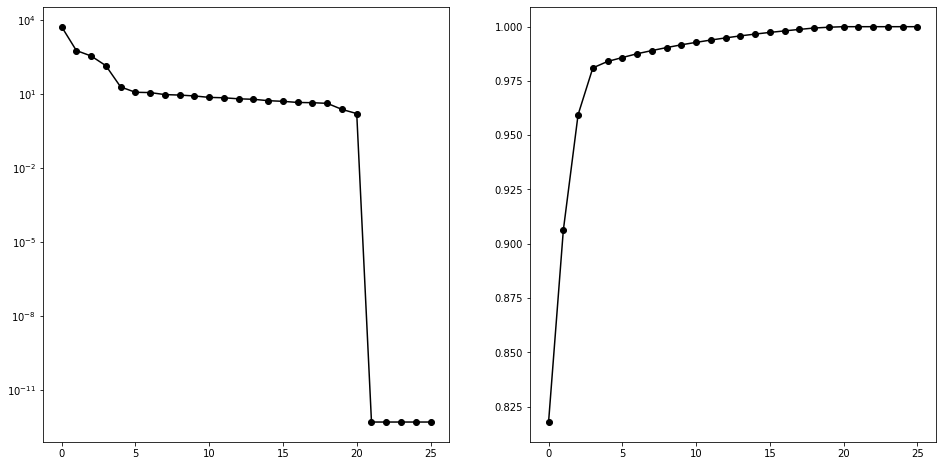

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.semilogy(np.diagonal(result[0][-1]),'-o',color='k')

ax2 = fig.add_subplot(122)
ax2.plot(np.cumsum(np.diagonal(result[0][-1]))/np.sum(np.diagonal(result[0][-1])),'-o',color='k')

fig.show()

This is interesting. This makes us feel like we get 98% correct answers with just r=4? That is the same as for the PCA but here we gave it y.

Actually, I take that back. This is just the same as PCA. It's no better and we know PCA is really bad!

I just want to know what r the '4/sqrt(3)' people say I should use here.

In [ ]:
beta = X_encoded.shape[1]/X_encoded.shape[0]
omega = 0.56*beta**3 - 0.95*beta**2 + 1.82*beta+1.43
omega

1.5768014746733472

In [ ]:
np.median(np.diagonal(result[0][-1]))*omega

9.841854340627888

In [ ]:
np.diagonal(result[0][-1])

array([5.32886939e+03, 5.75985005e+02, 3.46661216e+02, 1.40508532e+02,
       1.93646789e+01, 1.17361313e+01, 1.14216676e+01, 9.45372605e+00,
       9.04637934e+00, 8.33201644e+00, 7.29247058e+00, 7.02395325e+00,
       6.37517624e+00, 6.10813824e+00, 5.36156596e+00, 5.04630191e+00,
       4.54572460e+00, 4.43807374e+00, 4.18222650e+00, 2.37369168e+00,
       1.61020423e+00, 5.14936928e-13, 5.14936928e-13, 5.14936928e-13,
       5.14936928e-13, 5.14936928e-13])

The 4/sqrt(3) people tell us to use r = 7. Let's do it.

In [ ]:
result = cross_correlate(estimator,X_encoded,y,r=7)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

0
1
2
3
4
5
6
7
8
9
0.8217241379310345
0.044559914078248115
0.8372617250824529
0.006303745680645444


It's ok but it's not perfect. Let's do r = 9 like we did for the features (best case)

In [ ]:
result = cross_correlate(estimator,X_encoded,y,r=9)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

0
1
2
3
4
5
6
7
8
9
0.8383908045977012
0.06283730489114164
0.8582103527307284
0.005934112428988517


For 9 features we got 
```
0.8587356321839081
0.03881059631142446
0.868317122253899
0.004217758321523968
```
so we are doing almost as well. The accuracy is a bit lower but the st.dev is a bit lower, also.


In [ ]:
result = cross_correlate(estimator,X_encoded,y,r=10)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

0
1
2
3
4
5
6
7
8
9
0.8483908045977012
0.06994033279828975
0.8555886298842864
0.009837092791450123


In [ ]:
result = cross_correlate(estimator,X_encoded,y,r=8)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

0
1
2
3
4
5
6
7
8
9
0.8182758620689654
0.0836864496336907
0.8406297165856111
0.008541411515165027


It seems like r = 9 is the right answer here. You can tell that these PCAs don't do any better than the features. They help us understand X but that doesn't help us understand y. I think it is better to just use the features this time.

The 4/sqrt(3) people gave tau = 9.8 but it should have been between 8.4 and 9.0. That's pretty good.

So I have to eat my words a little bit. The PCA does just as well as features, it's no better and no worse with r = 9. Before I thought you need r = 19 for PCA but you don't. I wish there was a 4/Sqrt(3) r-selection if you're using Features, not PCAs. You should use the abs-sorted loading scores.

I think you just answered your own question. You do the loading scores and their standard deviation. You look at Importance = |Loading Score| / Standard Deviation. You take out everything with Importance < 2 (so the usual 95%) and then do SVD again on those and get the Loading Scores and Standard Deviations and take out everything again with Importance < 2 until everthing is important.

I used Importance < 3.2, not 2. Would 2 have given the same answer?

So here with tau = 2 we have to do it a lot of times and don't get as good of an answer as with tau = 3.2. The answer we get is
```
0.8382758620689655
0.05578692737271874
0.867937000391302
0.005074318113179385
```

We are using 14 linearly independent features and 2 linearly dependent features.



Let's try tau = 2.5

For tau = 2, we get 13 factors and one co-dependent factor.
```
0.8489655172413795
0.06016052863773493
0.8642056571077198
0.007883302435502258
```
It's still not as good as before when we had 0.03 in the stdev for the test data but the st. dev on the training data is very low.


Let's try tau = 2.8

Before I didn't realize how good the 18 + 2 factor model is. Indeed, r = 19 was also really good for PCA.

For tau = 2.8, we already get the 9 features that we get for the best case, except we use slope_2.0 but not slope_1.0

```
0.8555172413793104
0.05556624286158287
0.8668148023925317
0.0071664576291668395
```

For above tau = 3.2 we got
```
0.8587356321839081
0.03881059631142446
0.868317122253899
0.004217758321523968
```


tau = 3.2 is better but do we get it again?

Yes, we get the same 9 features. 
```
0.8614942528735632
0.05002113438923534
0.8701772038682989
0.005935783292262899
```
The first time for tau = 3.2 we got
```
0.8587356321839081
0.03881059631142446
0.868317122253899
0.004217758321523968
```

Very similar.

tau = 2.8 also gives very similar results.

Let's try tau = 3.5

tau = 3.5 seems to also have the same result. The same 9 features.

Let's do tau = 4.0

tau = 4.0 only gives 3 factors and the result is really bad.
```
0.7911494252873564
0.06539017724972482
0.795732014086869
0.007954402737076182
```


Let's do tau = 2.8 again.

With tau = 2.8, I get 12 + 1 features.
```
0.8480459770114942
0.07966404554914784
0.8593283582089551
0.009995553695274995
```
This is not as good as with tau = 3.2.

For tau = 3.0 I get 14 + 1 features. 
```
0.852183908045977
0.05565687682254883
0.8660713287495108
0.008276519308958924
```
This is as good as the 9 feature model.

For tau = 3.2, I now get 7 features.
```
0.8177011494252874
0.07216194116299221
0.8387472748616467
0.00970384558745432
```

This time for tau = 3.2 I got 8 features.
```
0.8517241379310345
0.06633289415621521
0.8698068645536361
0.004731333477132036
```

I seem to get between 7 and 9 features for tau = 3.2 which means it's probably on the high end. For tau = 3.0 I got 14 features. For 2.8 I got 12 features.

For tau = 3.1, I get 11 + 1 features.
```
0.84816091954023
0.06651478934600902
0.8623288054111466
0.009410400194653841
```

tau = 3.15 I get the 9 feature model. Let's do it again.

I get 9 features + 1. No slope, no thal but all the ca's.
```
0.8250574712643678
0.035254955359419145
0.8338937335792945
0.0077106810590963385
```

For tau = 3.3, I get 8 features. No slope.
```
0.847816091954023
0.06440311019242309
0.8634412208619823
0.005290460368674728
```

I don't always get the right answer, but it seems 3.2 is good for this data.

I could also do more folds to get a better answer? Or maybe the correlation standard deviations are just so large that it's impossible to get it right every time, even using tau = 3.2

I really wish that there was a way to do SVD for X and y together, not just X.

It looks like 7 is too little, but 8 and 9 are just as good (like many others: 10,11,12,14...). Let's look at how many times we say 8 or 9 for each tau.

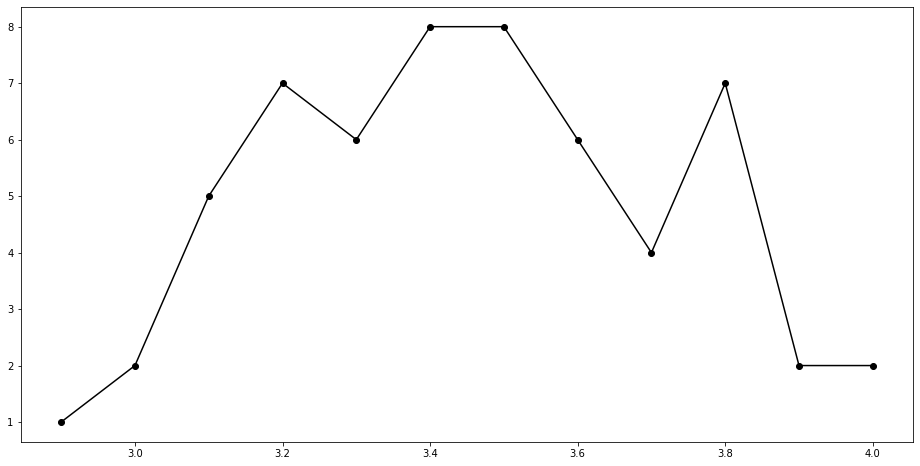

In [ ]:
eight_nine = [1,2,5,7,6,8,8,6,4,7,2,2]
taus = np.arange(2.9,4.1,0.1)
fig = plt.figure()
plt.plot(taus,eight_nine,'-o',color='k')
plt.show()

Looks like the best tau is 3.5

Looking through these, I found a 7 feature model that does as well as any other:
```
0.8589655172413794
0.04864676890861015
0.8743054390966517
0.005435280535692804
['cp_4.0' 'thal_7.0' 'ca_0.0' 'sex' 'slope_1.0' 'trestbps' 'thalach']
```

That means the 4/Sqrt(3) guys are right! Just not in the PCA basis that they are working in.

In [ ]:
result = cross_correlate(estimator,X_encoded,y,r=7)

print(np.mean([i[0] for i in result])) # test
print(np.std([i[0] for i in result]))

print(np.mean([i[1] for i in result]))
print(np.std([i[1] for i in result]))

0.8311494252873564
0.061367793486657655
0.8398792554083515
0.006670035932446238


The 7 feature PCA model is always really bad.


In [ ]:
for i in range(30):
  result = cross_correlate(estimator,X_encoded[['cp_4.0','thal_7.0','ca_0.0','sex','slope_1.0','trestbps','thalach']],y,nr_folds=1)
  test_std = np.std([i[0] for i in result])
  # print(np.mean([i[0] for i in result])) # test
  # print(np.std([i[0] for i in result]))
  # print(np.mean([i[1] for i in result]))
  #print(np.std([i[1] for i in result]))
  temp.append(test_std)
np.mean(temp)
np.std(temp)

0.05178269497625371

In [ ]:
mean_test = []
stdev_test = []
stdev_stdev_test = []
mean_train = []
stdev_train = []
n = 30
for j in np.arange(2,n+1,1):
  temp = []
  temp2 = []
  temp3 = []
  temp4 = []
  for i in range(30):
    result = cross_correlate(estimator,X_encoded[['cp_4.0','thal_7.0','ca_0.0','sex','slope_1.0','trestbps','thalach']],y,nr_folds=j)
#    test_sum_sq = [len(i[3])*(1-i[0]) for i in result]
#    test_std = np.sqrt(np.sum(test_sum_sq)/X_encoded.shape[0])
    test_mean = np.mean([i[0] for i in result])
    test_err_of_mean = np.std([i[0] for i in result])/np.sqrt(j)
#    train_sum_sq = [(X_encoded.shape[0]-len(i[3]))*(1-i[1]) for i in result]
#    train_std = np.sqrt(np.sum(train_sum_sq)/((j-1)*X_encoded.shape[0]-j*8))
    train_mean = np.mean([i[1] for i in result])
    train_err_of_mean = np.std([i[1] for i in result])/np.sqrt(j)
    temp.append(test_mean)
    temp2.append(test_err_of_mean)
    temp3.append(train_mean)
    temp4.append(train_err_of_mean)
  mean_test.append(np.mean(temp))
  stdev_test.append(np.mean(temp2))
  mean_train.append(np.mean(temp3))
  stdev_train.append(np.mean(temp4))
  stdev_stdev_test.append(np.std(temp))


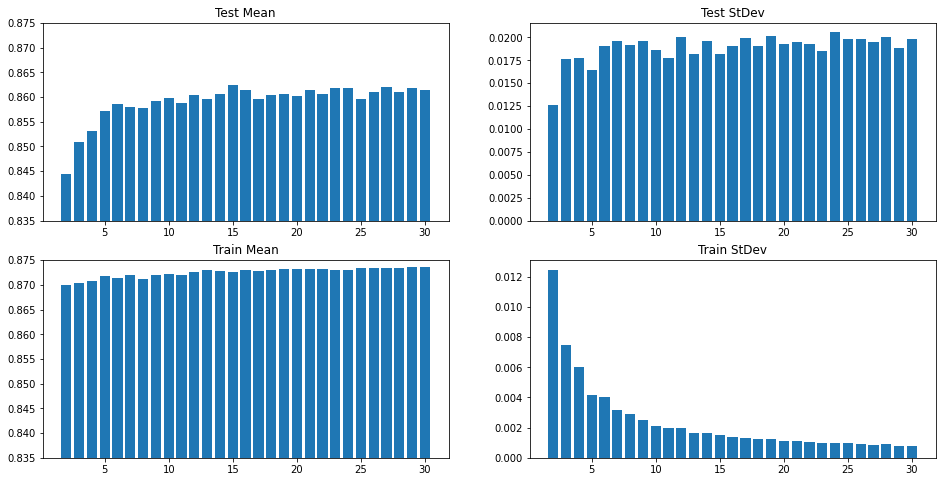

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.bar(np.arange(2,n+1,1), mean_test)
plt.title("Test Mean")
plt.ylim([0.835,0.875])
ax2 = fig.add_subplot(222)
ax2.bar(np.arange(2,n+1,1), stdev_test)
plt.title("Test StDev")
ax1 = fig.add_subplot(223)
ax1.bar(np.arange(2,n+1,1), mean_train)
plt.title("Train Mean")
plt.ylim([0.835,0.875])
ax2 = fig.add_subplot(224)
ax2.bar(np.arange(2,n+1,1), stdev_train)
plt.title("Train StDev")


plt.show()


Let's use folds = 30.

In [ ]:
  temp = []
  temp2 = []
  temp3 = []
  temp4 = []
  for i in range(30):
    result = cross_correlate(estimator,X_encoded[['cp_4.0','thal_7.0','ca_0.0','sex','slope_1.0','trestbps','thalach']],y,nr_folds=30)
    test_mean = np.mean([i[0] for i in result])
    test_err_mean = np.std([i[0] for i in result])/np.sqrt(30)
    train_mean = np.mean([i[1] for i in result])
    train_err_mean = np.std([i[1] for i in result])/np.sqrt(30)
    temp.append(test_mean)
    temp2.append(test_err_mean)
    temp3.append(train_mean)
    temp4.append(train_err_mean)
  mean_test = (np.mean(temp))
  mean_err_test = (np.mean(temp2))
  mean_train = (np.mean(temp3))
  mean_err_train = (np.mean(temp4))
  print(mean_test)
  print(mean_err_test)
  print(mean_train)
  print(mean_err_train)




0.8606543209876545
0.02034656993943237
0.8736133829096228
0.0008096621773687633


There you go, our best model with 0.86 +- 0.02 accuracy.

Let's quickly see which tau would have been best for 7 features.

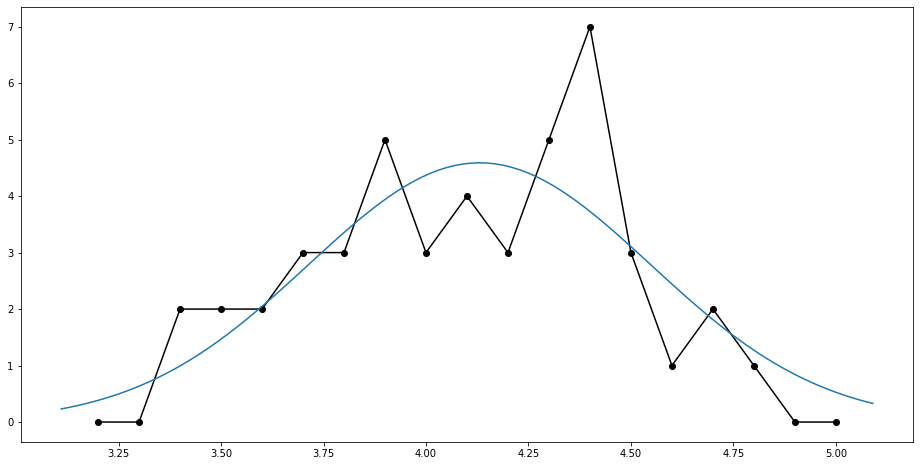

4.130772472306758
0.41770346522127344


In [ ]:
def normal(x,mu,sigma,a):
  return a*norm.pdf(x,mu,sigma)

eight_nine = [1,2,5,7,6,8,8,6,4,7,2,2]
taus1 = np.arange(2.9,4.1,0.1)
seven = [0,0,2,2,2,3,3,5,3,4,3,5,7,3,1,2,1,0,0]
taus2 = np.arange(3.2,5.1,0.1)
parameters, covariance = curve_fit(normal, taus2, seven)
fig = plt.figure()
plt.plot(taus2,seven,'-o',color='k')
xmin, xmax = plt.xlim()
gauss_x = np.linspace(xmin, xmax, 100)
gauss_y = parameters[2]*norm.pdf(x, parameters[0], parameters[1])
plt.plot(gauss_x, gauss_y)
plt.show()
print(parameters[0])
print(parameters[1])

Looks like we want tau = 4.1, not 3.5 for 7 Features.

A little bit of a better model is this 8 feature model:
['cp_4.0' 'ca_0.0' 'thal_7.0' 'sex' 'trestbps' 'slope_1.0' 'oldpeak'
 'thalach']

In [ ]:
  temp = []
  temp2 = []
  temp3 = []
  temp4 = []
  for i in range(30):
    result = cross_correlate(estimator,X_encoded[['cp_4.0' ,'ca_0.0', 'thal_7.0' ,'sex' ,'trestbps' ,'slope_1.0', 'oldpeak', 'thalach']],y,nr_folds=30)
    test_mean = np.mean([i[0] for i in result])
    test_err_mean = np.std([i[0] for i in result])/np.sqrt(30)
    train_mean = np.mean([i[1] for i in result])
    train_err_mean = np.std([i[1] for i in result])/np.sqrt(30)
    temp.append(test_mean)
    temp2.append(test_err_mean)
    temp3.append(train_mean)
    temp4.append(train_err_mean)
  mean_test = (np.mean(temp))
  mean_err_test = (np.mean(temp2))
  mean_train = (np.mean(temp3))
  mean_err_train = (np.mean(temp4))
  print(mean_test)
  print(mean_err_test)
  print(mean_train)
  print(mean_err_train)




0.8551851851851853
0.019764915859500912
0.8665309233449479
0.0010869884873074068


Before we had
```
0.8606543209876545
0.02034656993943237
0.8736133829096228
0.0008096621773687633
```
The 7 feature model is better.

Is there anything 'random' we can do to make this better? If we chose 11 features at random, we would be here all day with the one-hot encoded ones. We could collect an average tau for each feature where it is dropped.

In [ ]:
result = pd.DataFrame(columns = X_encoded.columns)
for tau in np.arange(0.5,7.0,0.1):
  for i in range(10):
    temp = hard_function_init(tau = tau, X = X_encoded, y=y)
    temp2 = {}
    for feature in X_encoded.columns:
      if feature not in temp:
        temp2[feature] = tau
    result = result.append(temp2,ignore_index=True)


Output hidden; open in https://colab.research.google.com to view.

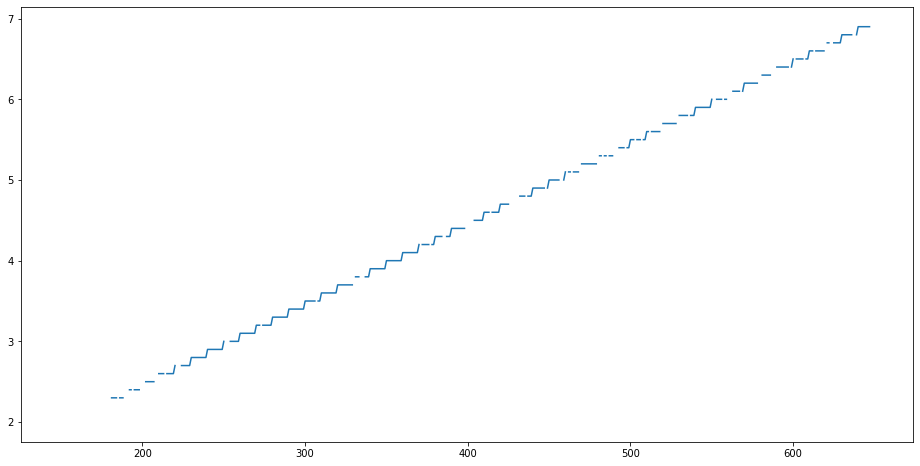

In [ ]:
result['thal_3.0'].plot()

In [ ]:
X_encoded.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

<BarContainer object of 25 artists>

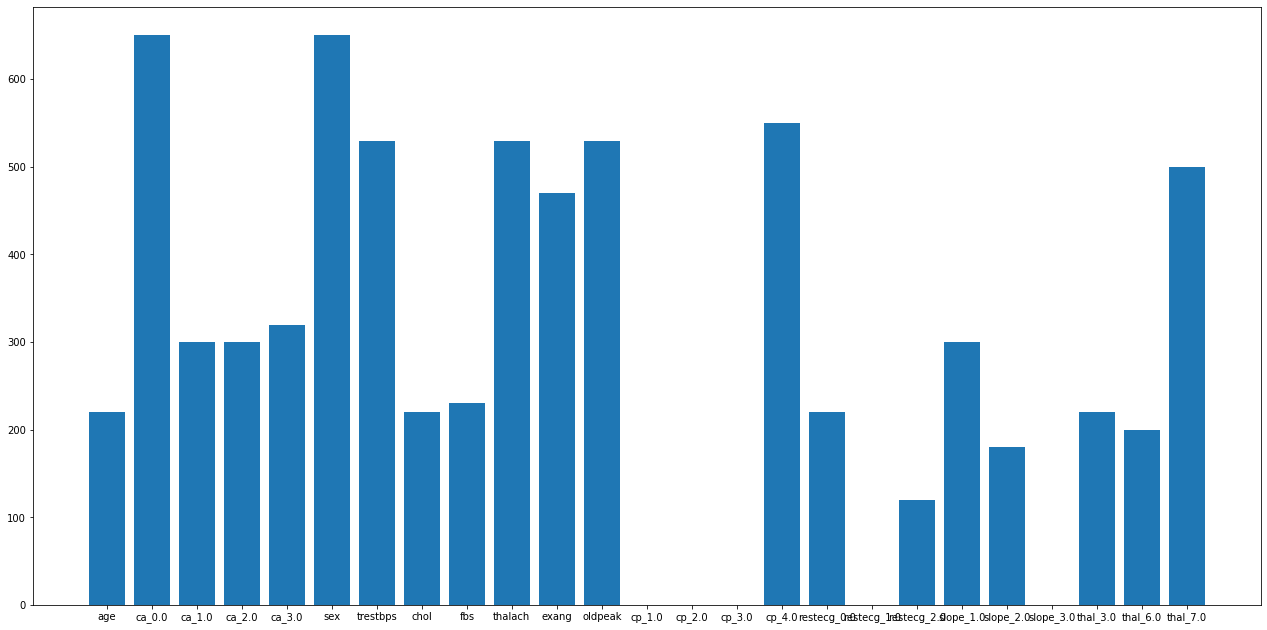

In [ ]:
out = {}
out['age'] = 220
out['ca_0.0'] = 650
out['ca_1.0'] = 300
out['ca_2.0'] = 300
out['ca_3.0'] = 320
out['sex'] = 650
out['trestbps'] = 530 #?
out['chol'] = 220
out['fbs'] = 230
out['thalach'] = 530 #?
out['exang'] = 470
out['oldpeak'] = 530
out['cp_1.0'] = 0
out['cp_2.0'] = 0
out['cp_3.0'] = 0
out['cp_4.0'] = 550 # or 0
out['restecg_0.0'] = 220
out['restecg_1.0'] = 0
out['restecg_2.0'] = 120
out['slope_1.0'] = 300 # ?
out['slope_2.0'] = 180 # or 0
out['slope_3.0'] = 0
out['thal_3.0'] = 220 # ?
out['thal_6.0'] = 200
out['thal_7.0'] = 500
plt.figure(figsize = (22,11))

plt.bar(list(out.keys()),list(out.values()))

Maybe it'll be better if we take out half each time.

In [ ]:
len(X_encoded.columns.to_list())

25

In [ ]:
result1 = pd.DataFrame(columns = X_encoded.columns)
for tau in np.arange(0.5,7.0,0.1):
  for i in range(10):
    temp = hard_function_init(tau = tau, X = X_encoded, y=y, estimator = r_estimator, r = 22)
    temp2 = {}
    for feature in X_encoded.columns:
      if feature not in temp:
        temp2[feature] = tau
    result1 = result1.append(temp2,ignore_index=True)
result2 = pd.DataFrame(columns = X_encoded.columns)
for tau in np.arange(0.5,7.0,0.1):
  for i in range(10):
    temp = hard_function_init(tau = tau, X = X_encoded, y=y, estimator = r_estimator, r = 24)
    temp2 = {}
    for feature in X_encoded.columns:
      if feature not in temp:
        temp2[feature] = tau
    result2 = result2.append(temp2,ignore_index=True)
result3 = pd.DataFrame(columns = X_encoded.columns)
for tau in np.arange(0.5,7.0,0.1):
  for i in range(10):
    temp = hard_function_init(tau = tau, X = X_encoded, y=y, estimator = r_estimator, r = 26)
    temp2 = {}
    for feature in X_encoded.columns:
      if feature not in temp:
        temp2[feature] = tau
    result3 = result3.append(temp2,ignore_index=True)
result4 = pd.DataFrame(columns = X_encoded.columns)
for tau in np.arange(0.5,7.0,0.1):
  for i in range(10):
    temp = hard_function_init(tau = tau, X = X_encoded, y=y, estimator = estimator, r = 0)
    temp2 = {}
    for feature in X_encoded.columns:
      if feature not in temp:
        temp2[feature] = tau
    result4 = result4.append(temp2,ignore_index=True)


In [ ]:
result4 = pd.DataFrame(columns = X_encoded.columns)
for tau in np.arange(0.5,7.0,0.1):
  for i in range(10):
    temp = hard_function(tau = tau, X = X_encoded, y=y, estimator = estimator, r = 0)
    temp2 = {}
    for feature in X_encoded.columns:
      if feature not in temp:
        temp2[feature] = tau
    result4 = result4.append(temp2,ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

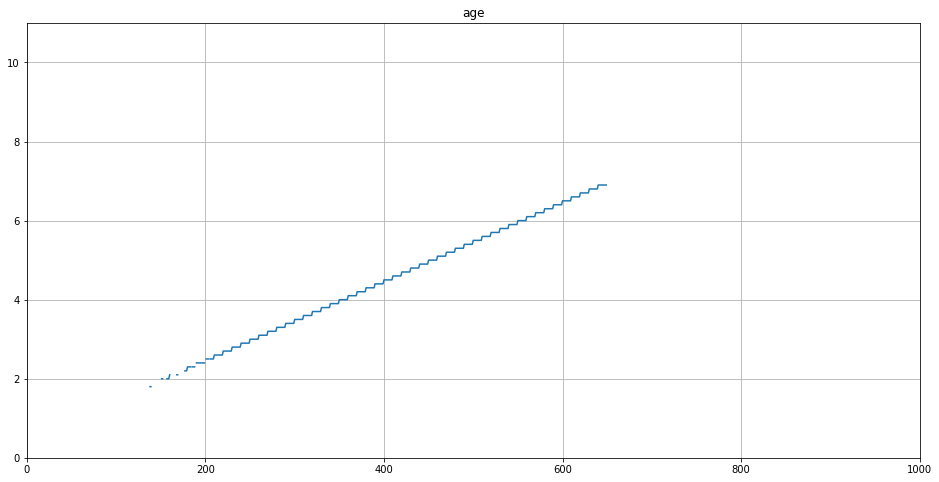

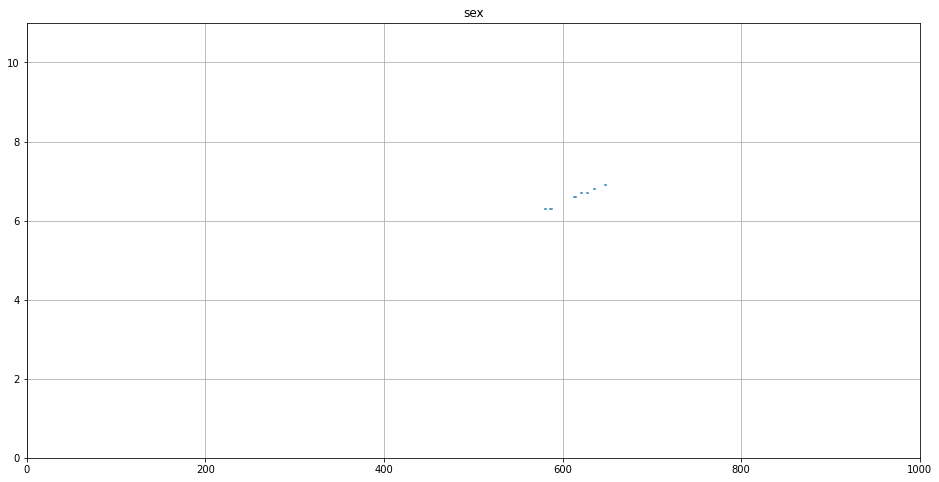

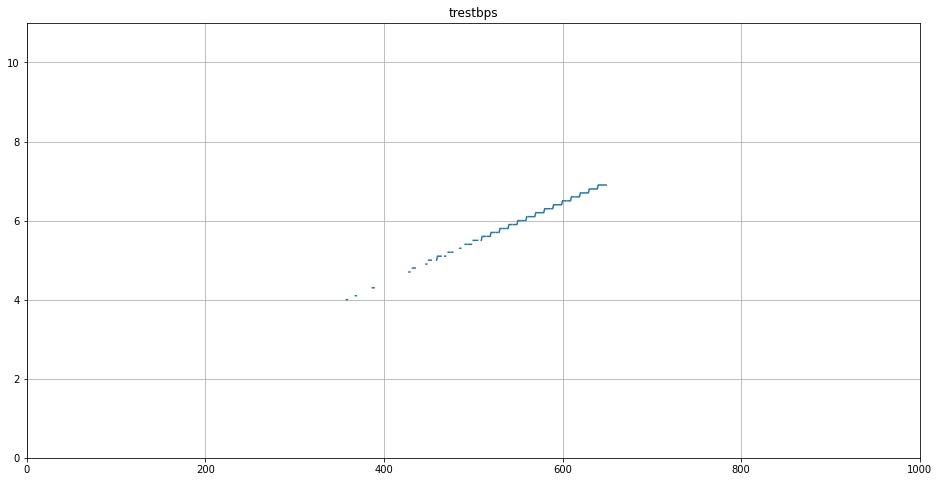

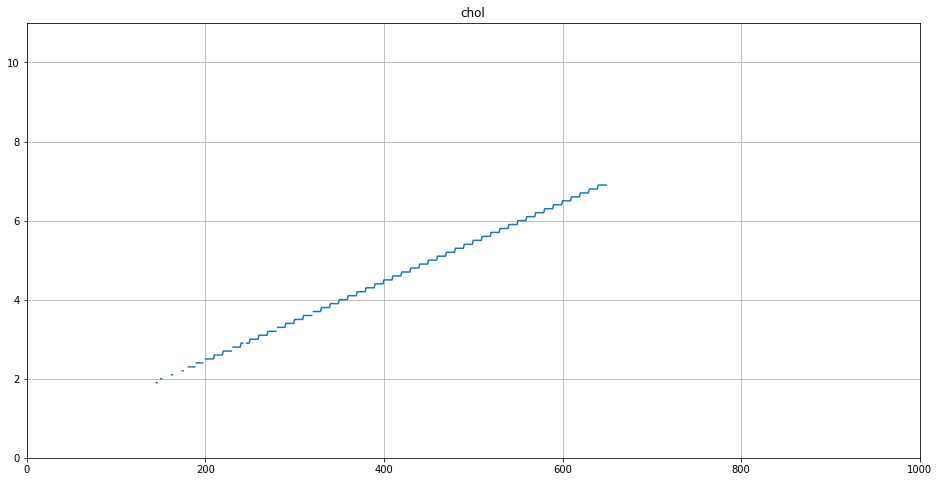

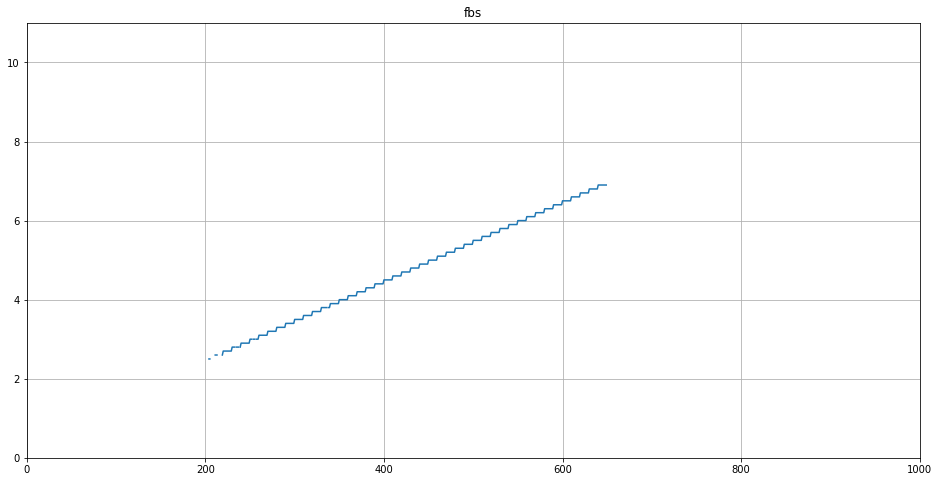

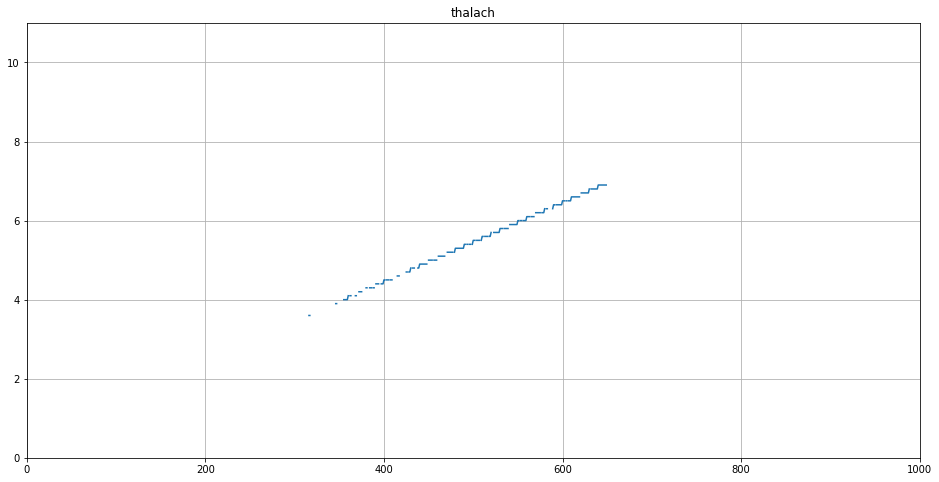

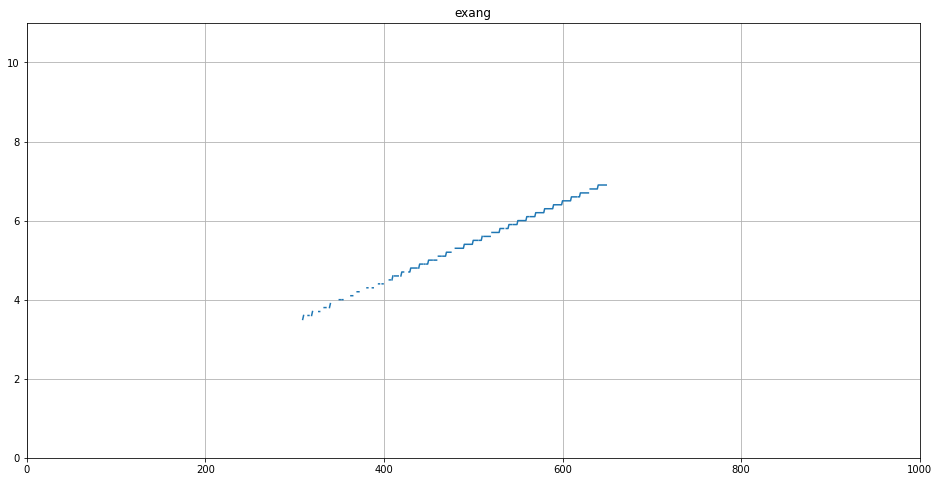

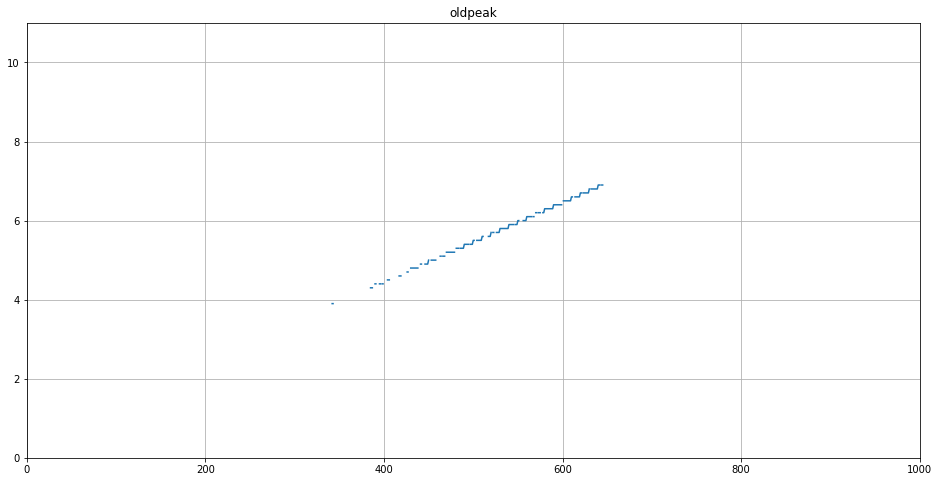

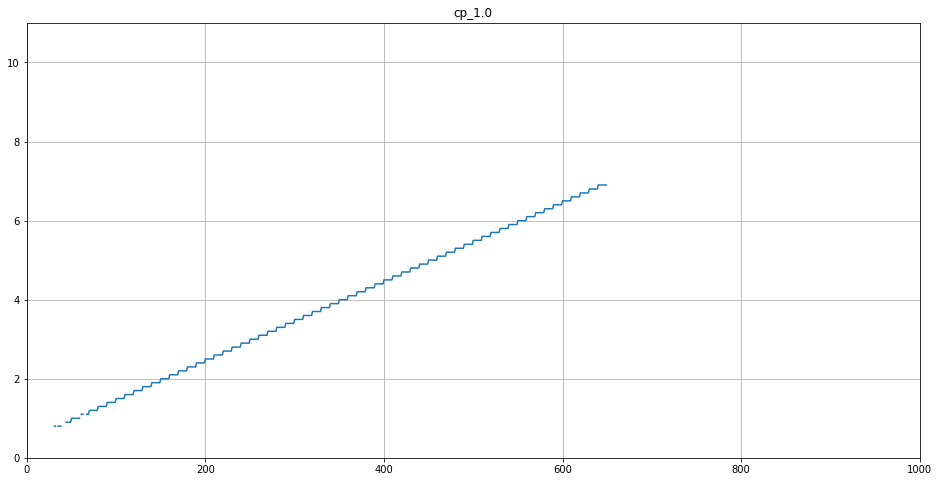

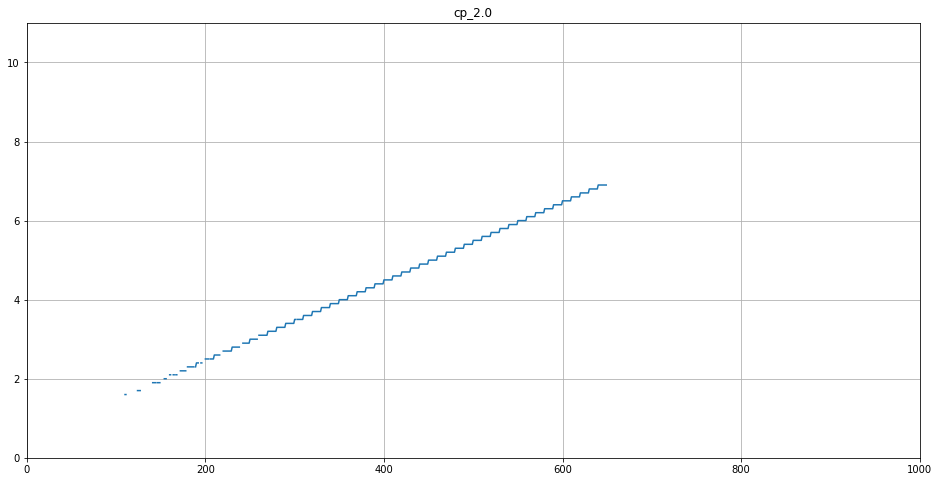

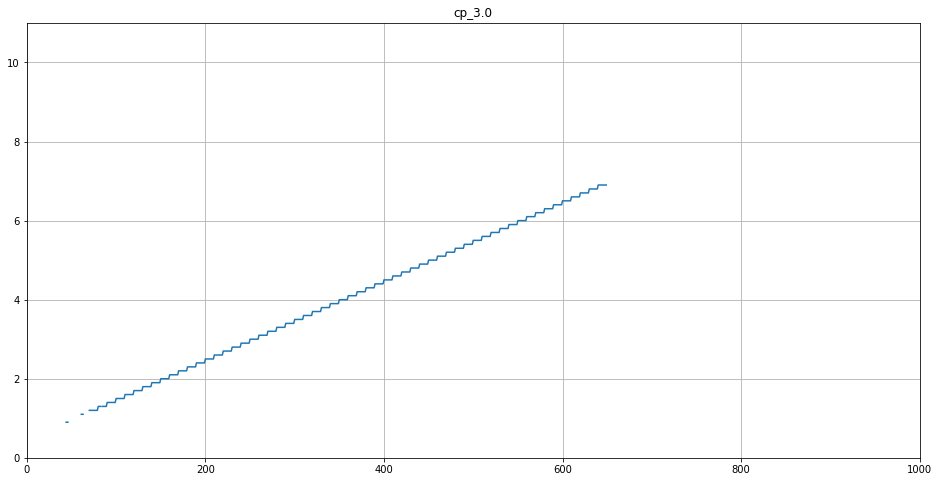

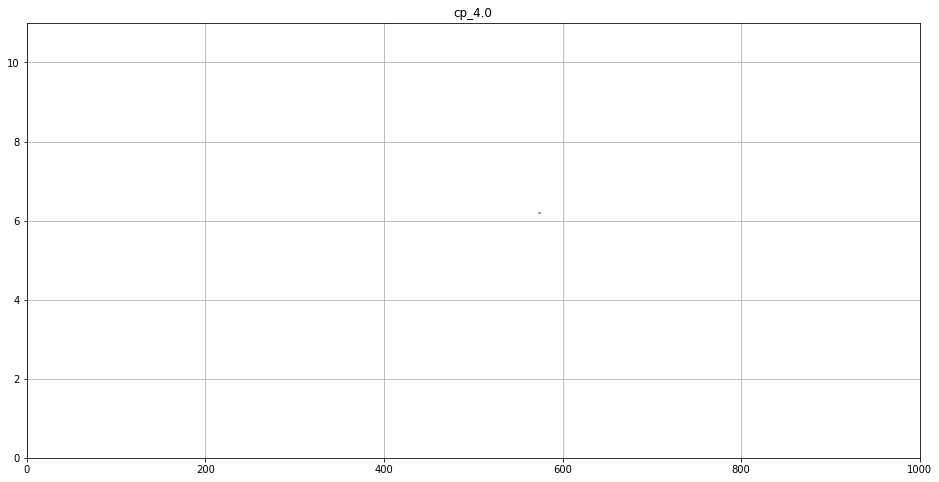

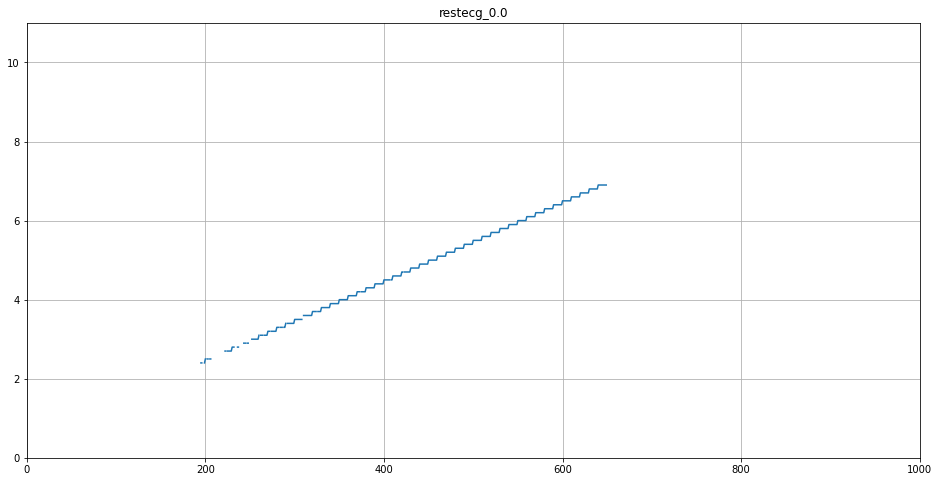

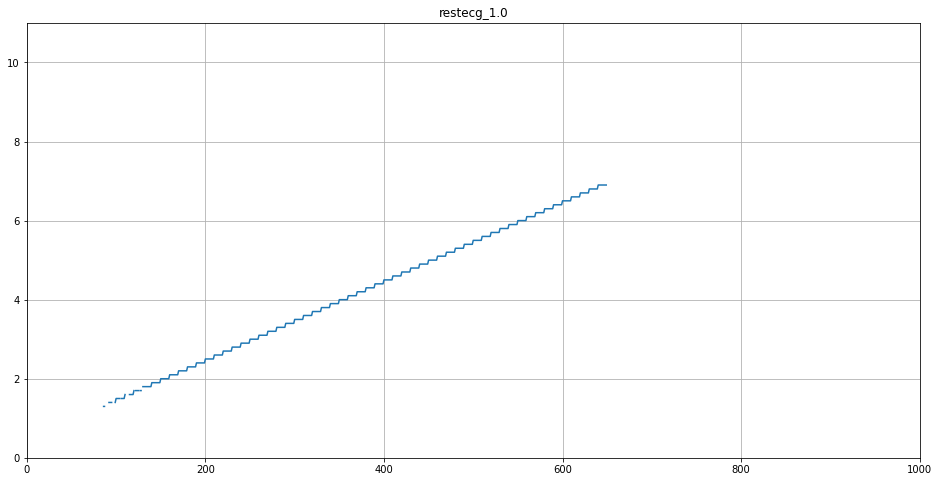

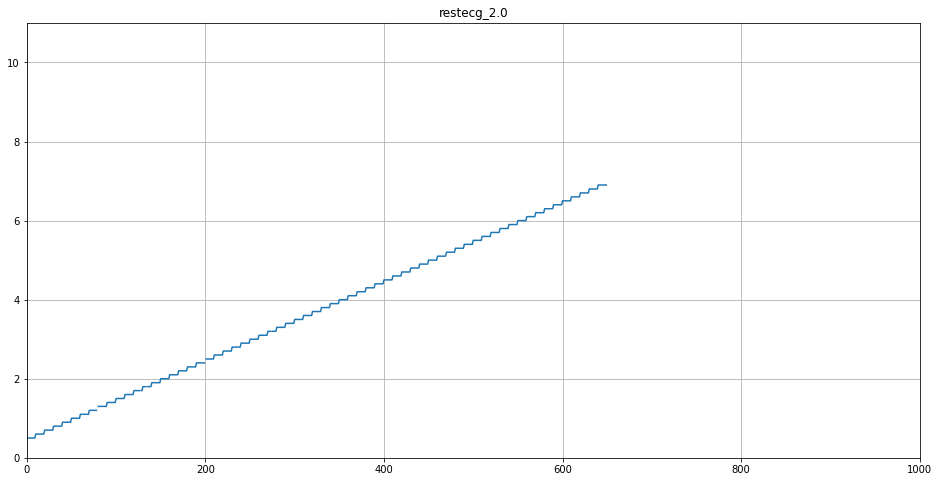

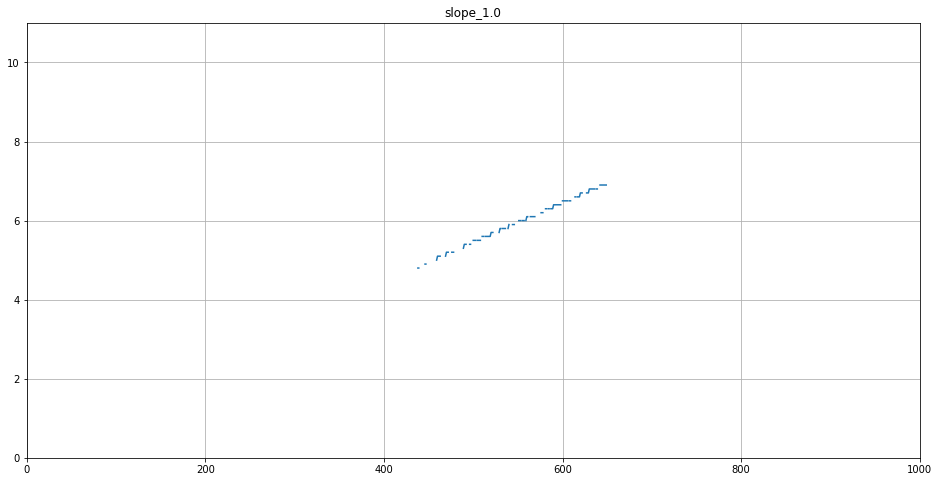

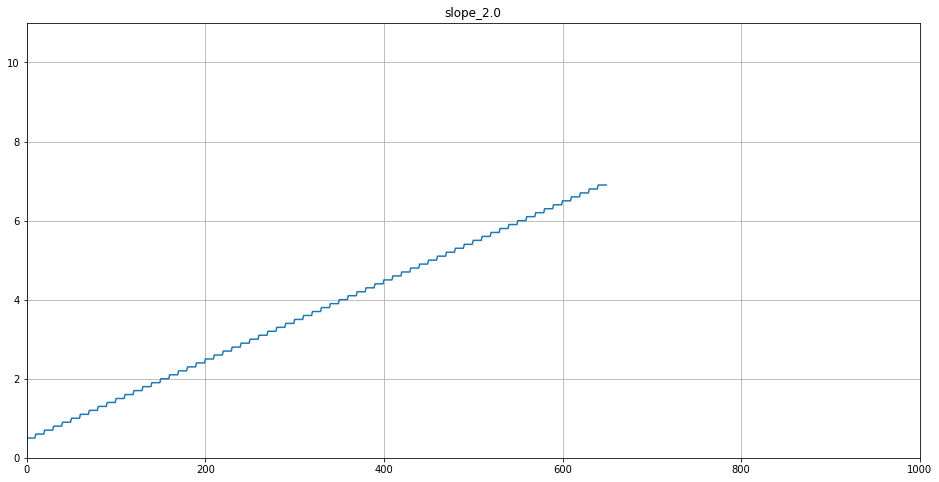

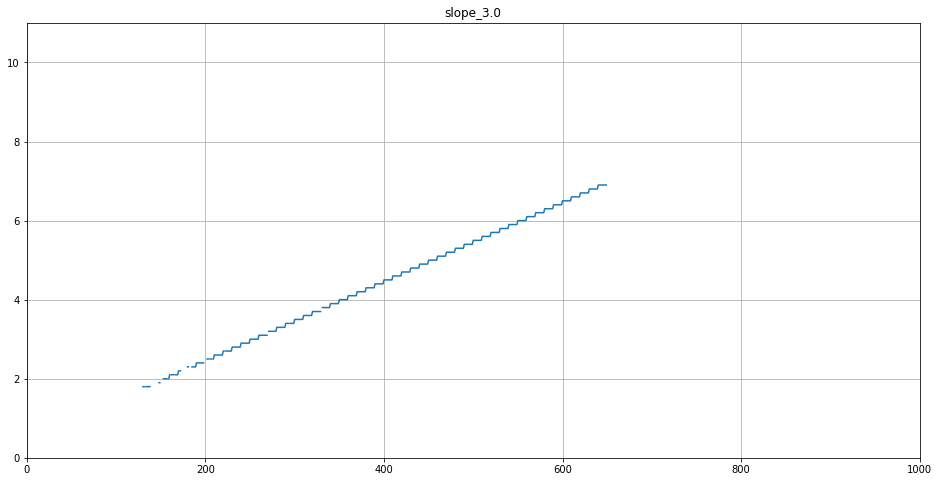

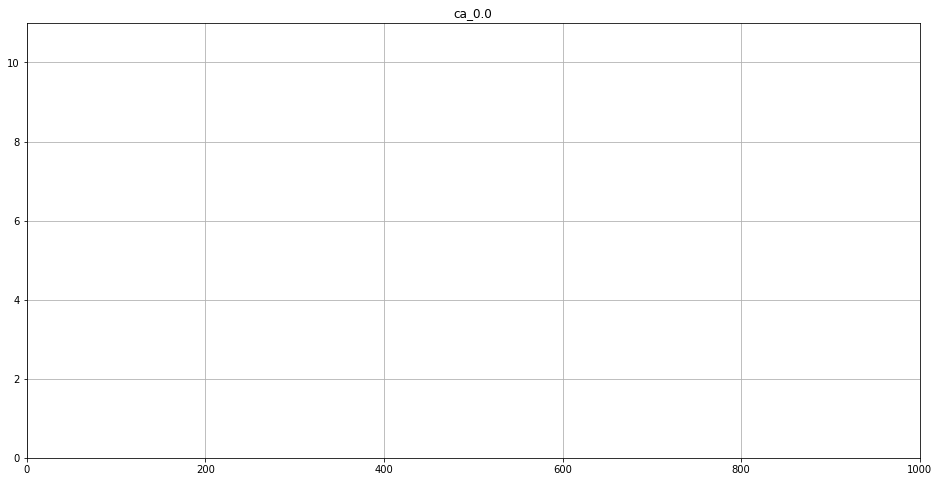

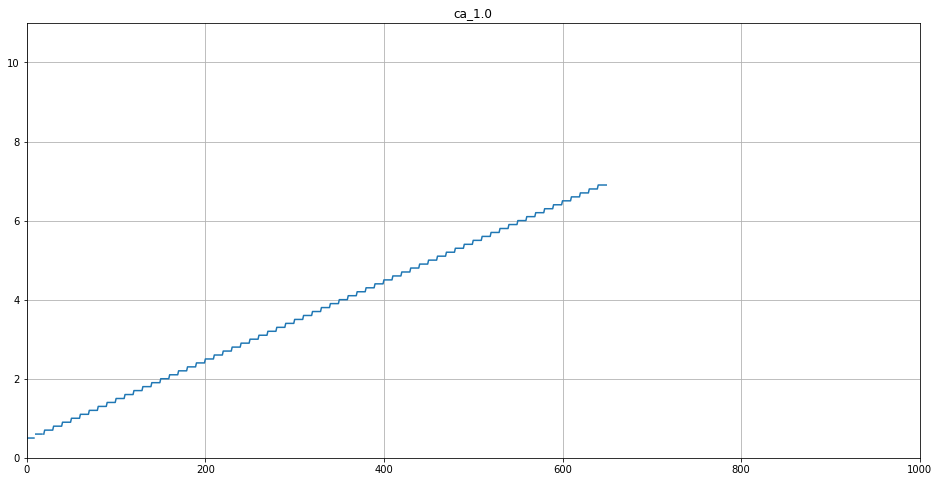

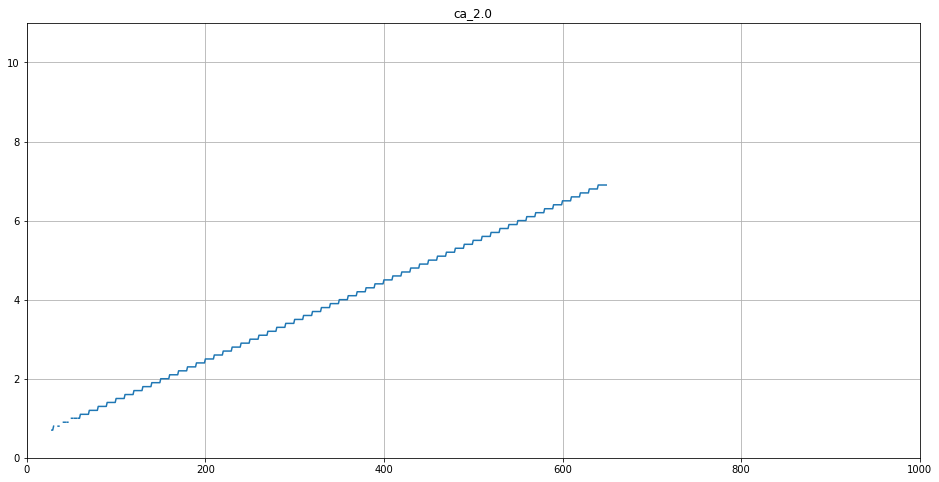

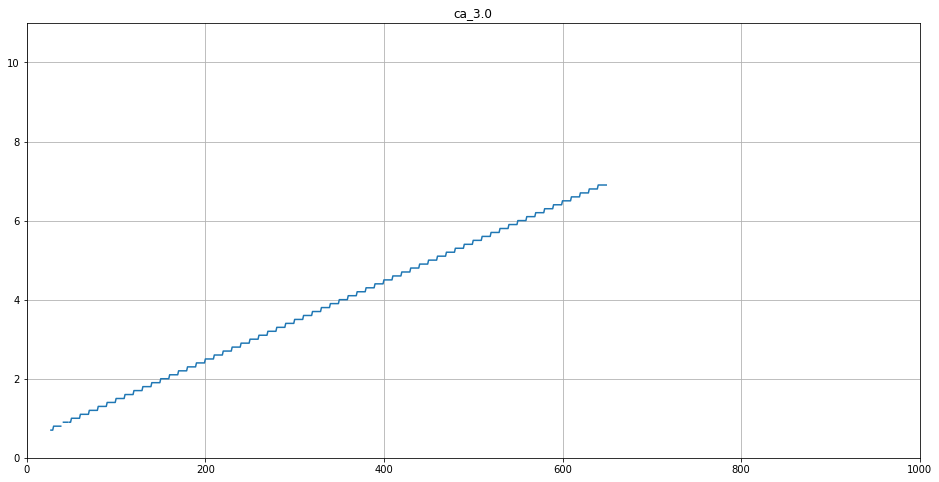

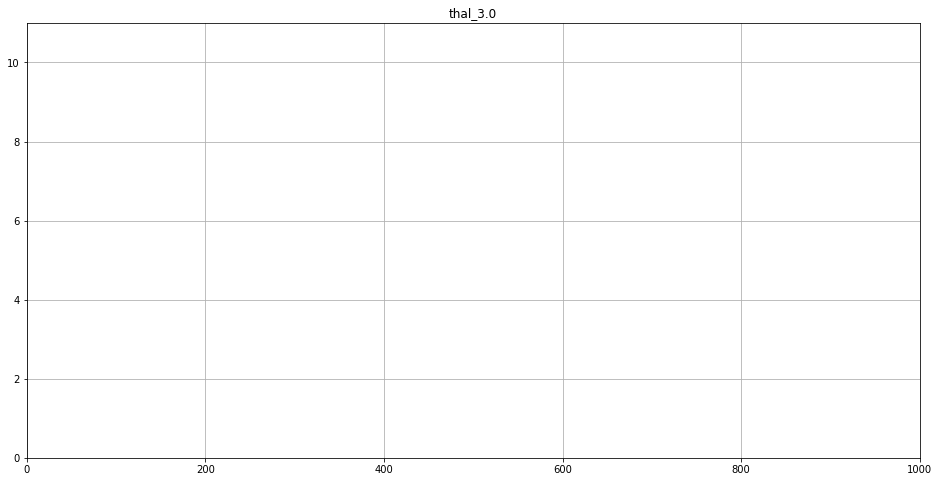

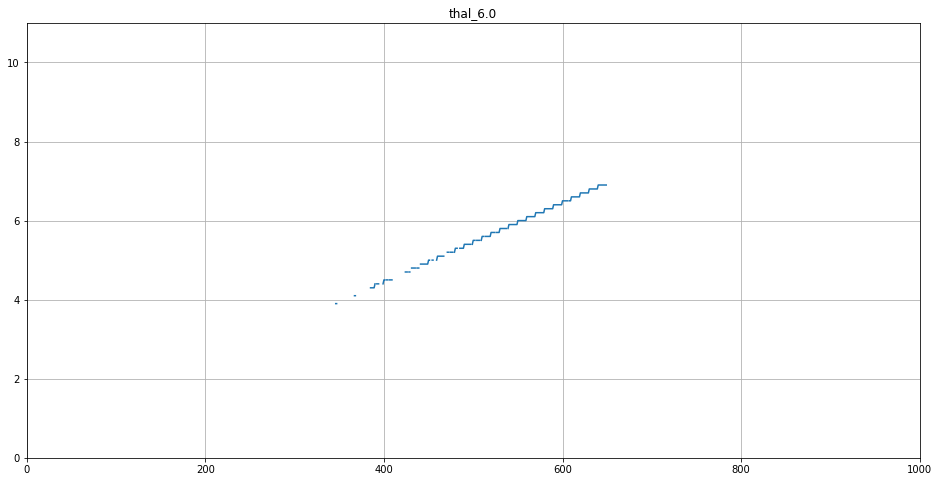

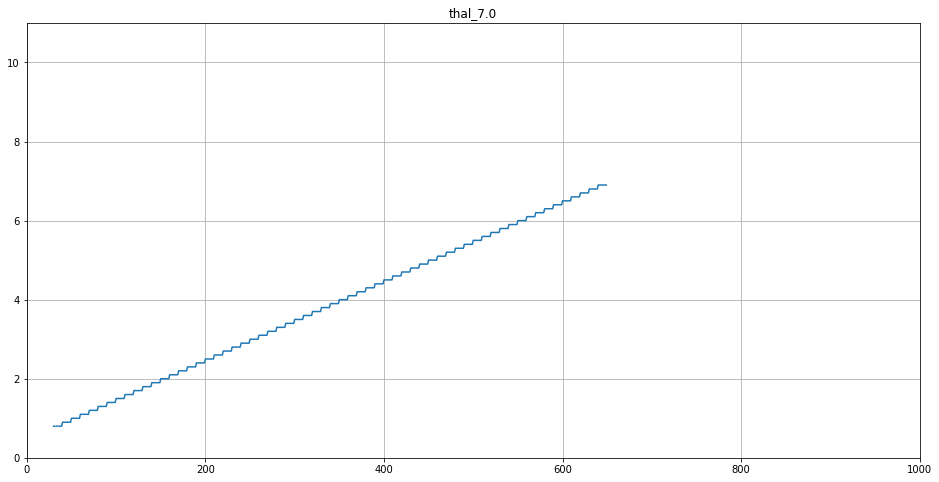

In [ ]:
for i in result4.columns.to_list():
  fig = plt.figure(i)
  #ax1 = fig.add_subplot(141)
  result4[i].plot()
  plt.title(i)
  plt.xlim([0,1000])
  plt.ylim([0,11])

  plt.grid()

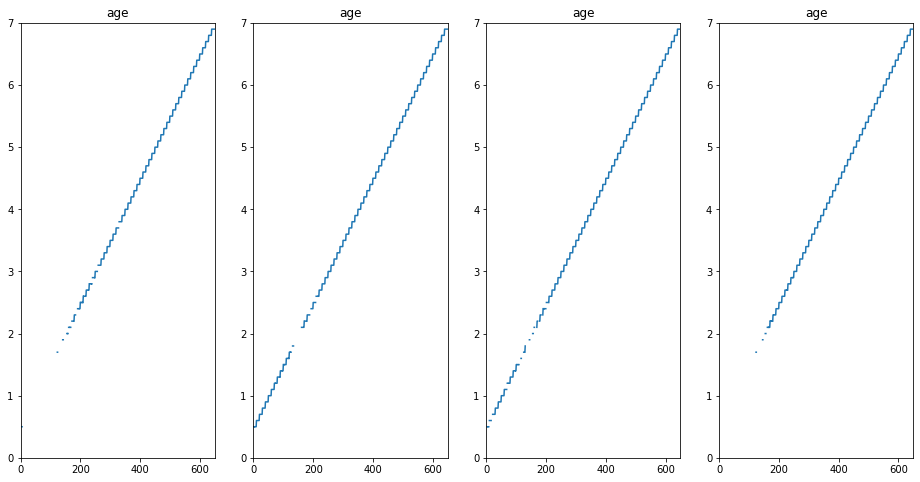

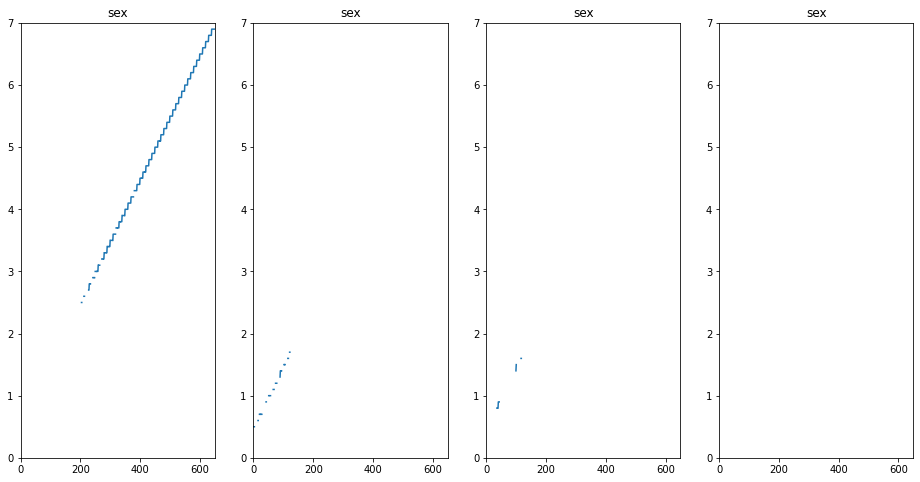

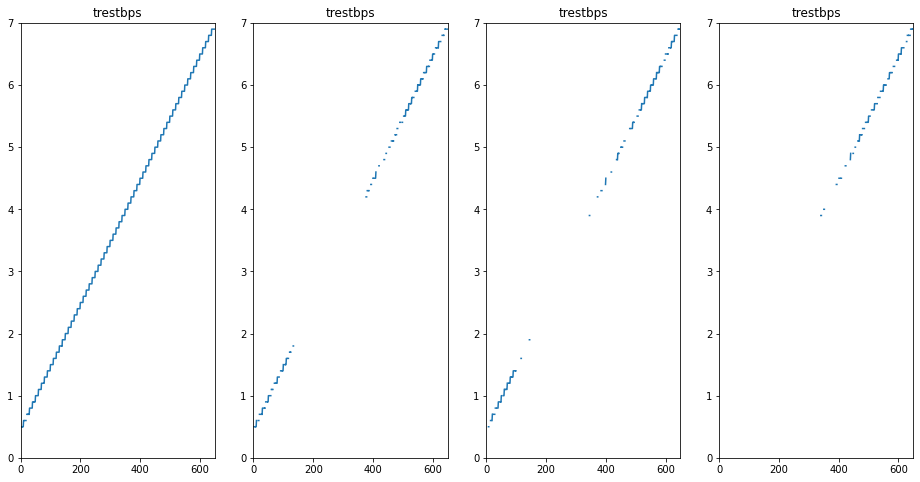

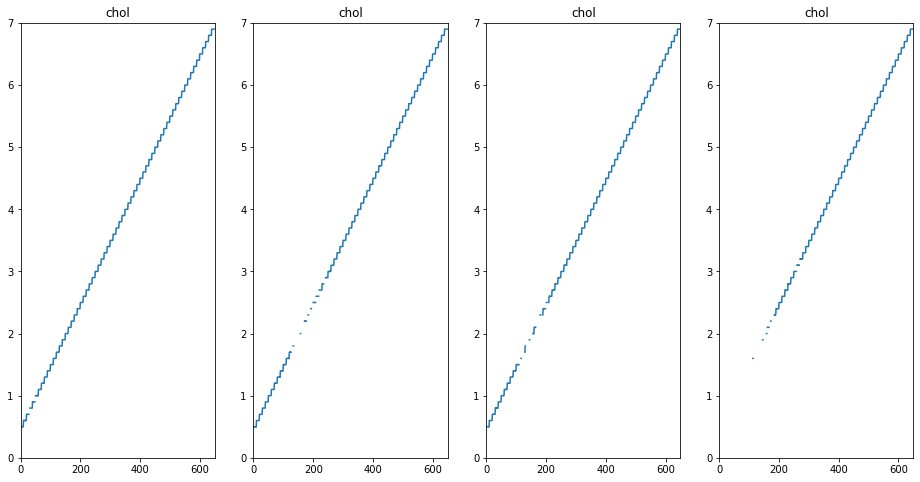

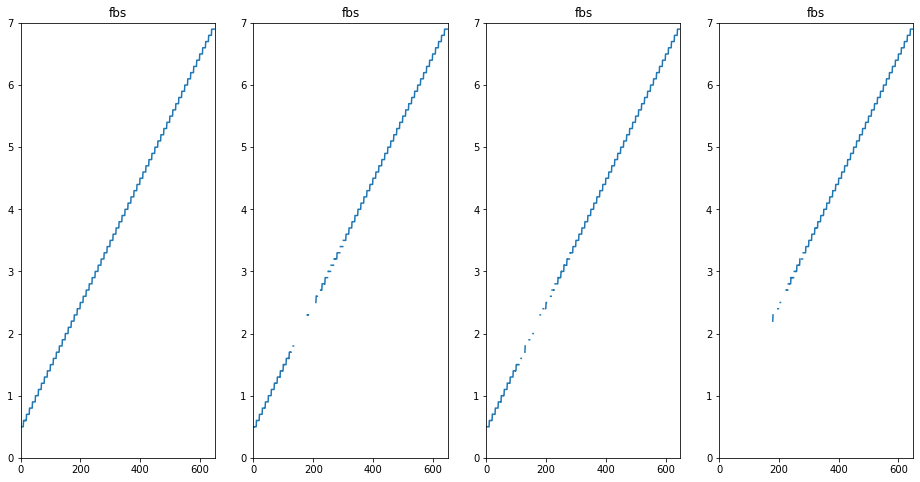

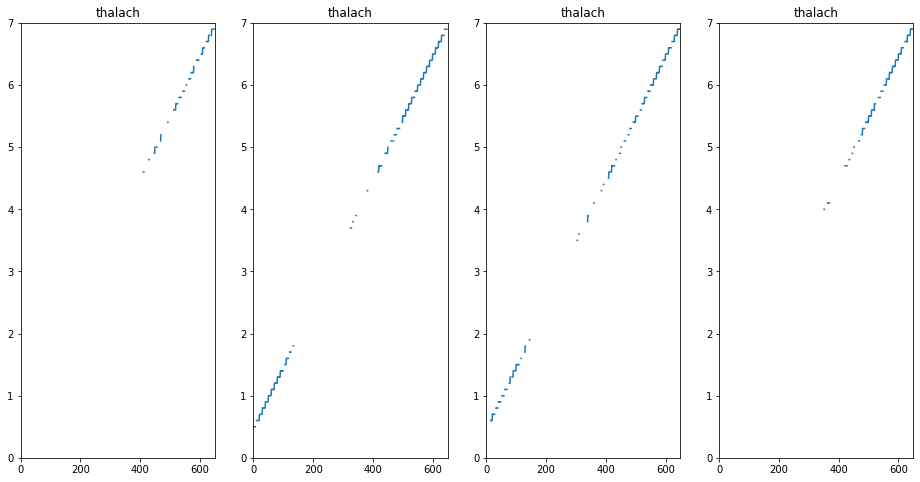

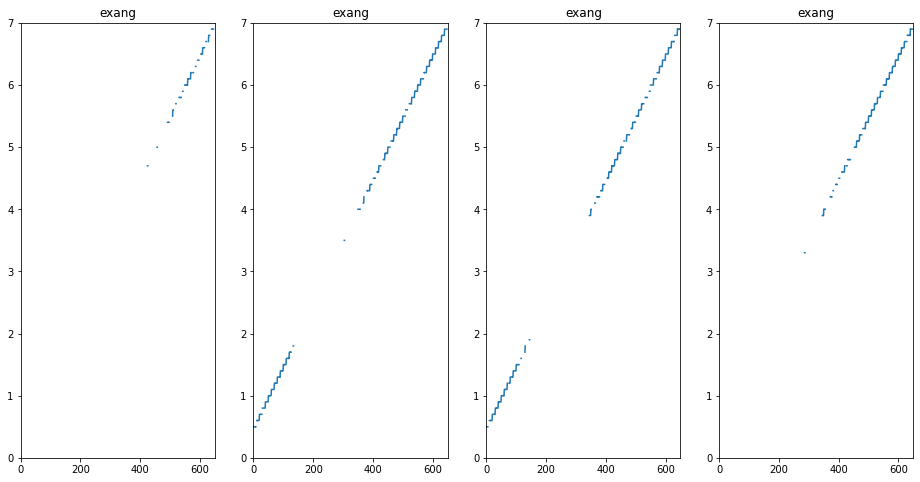

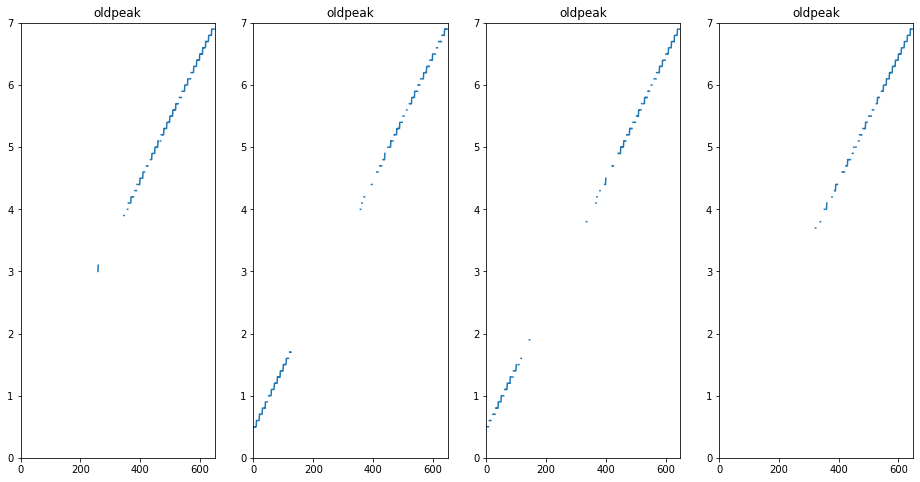

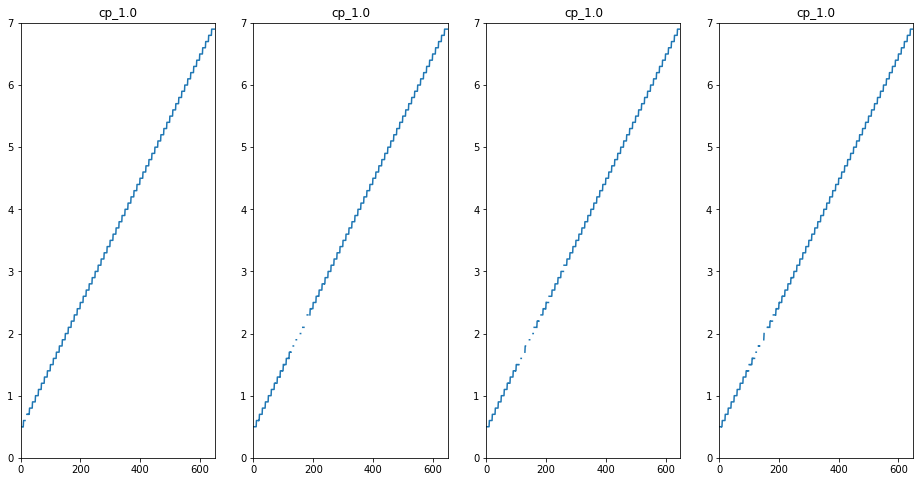

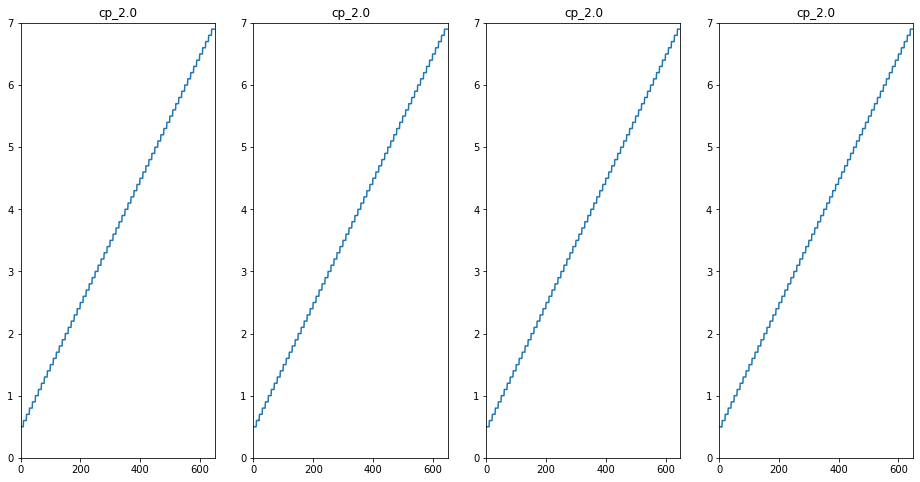

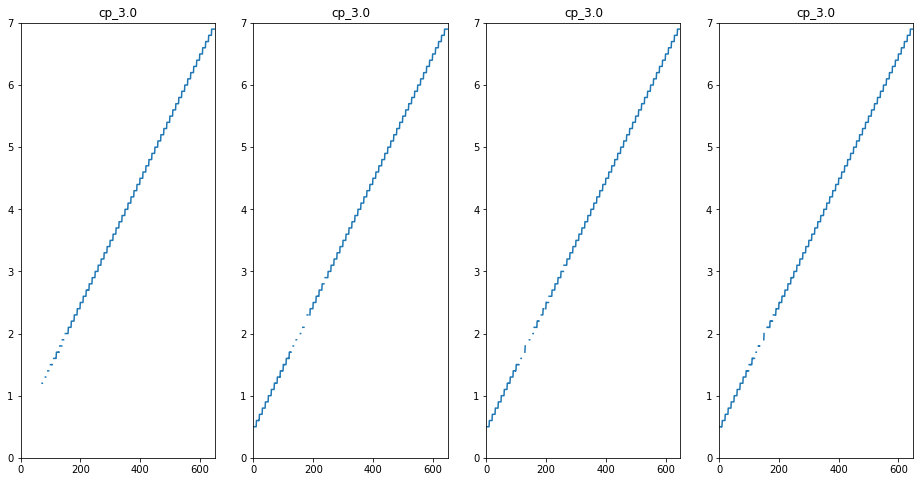

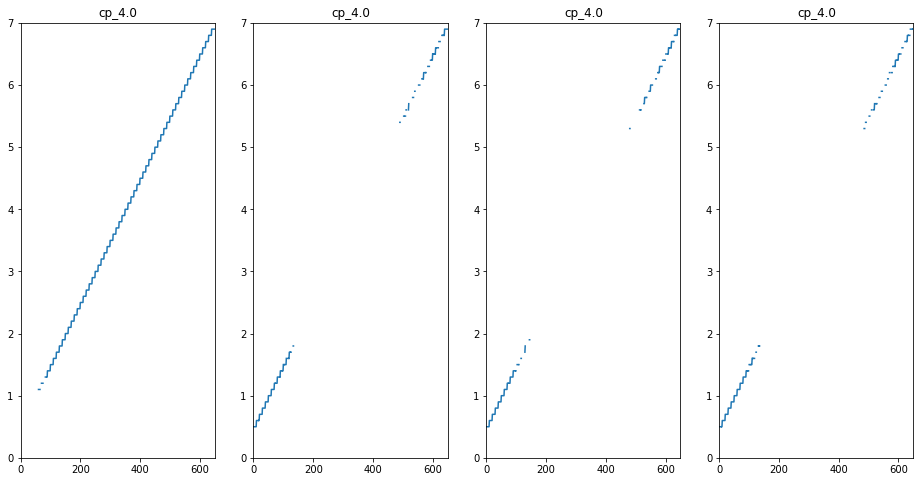

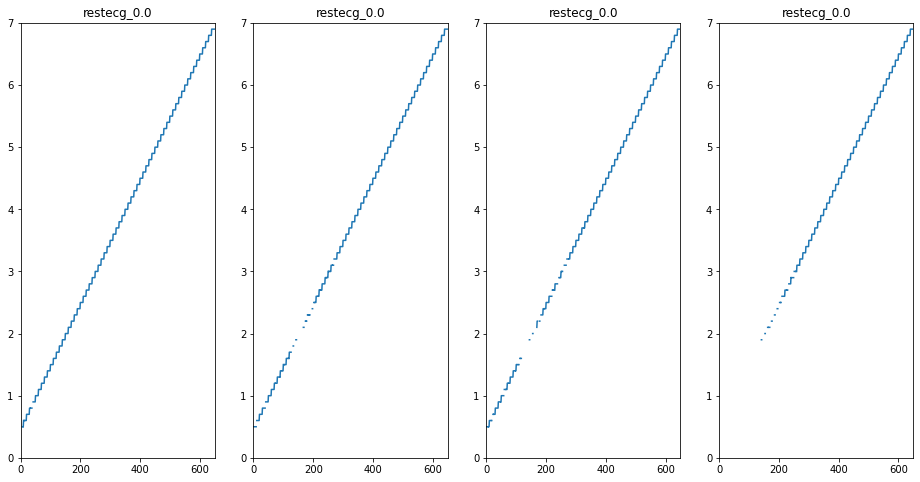

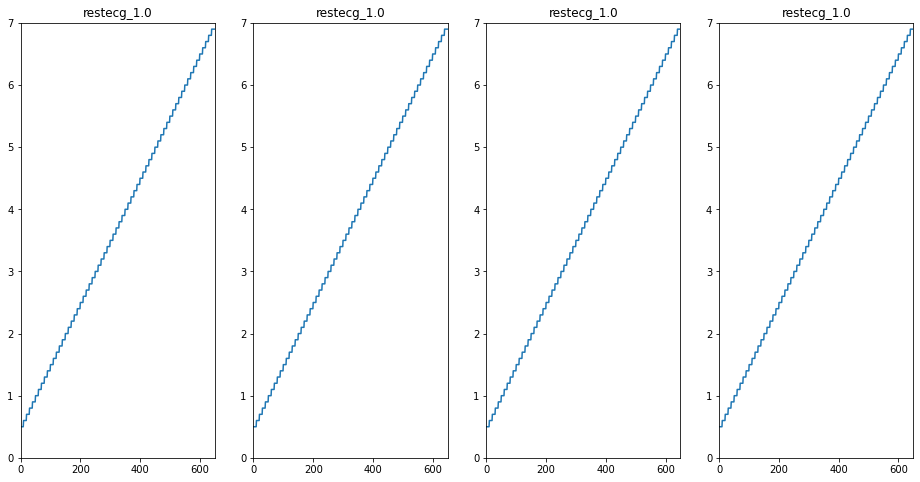

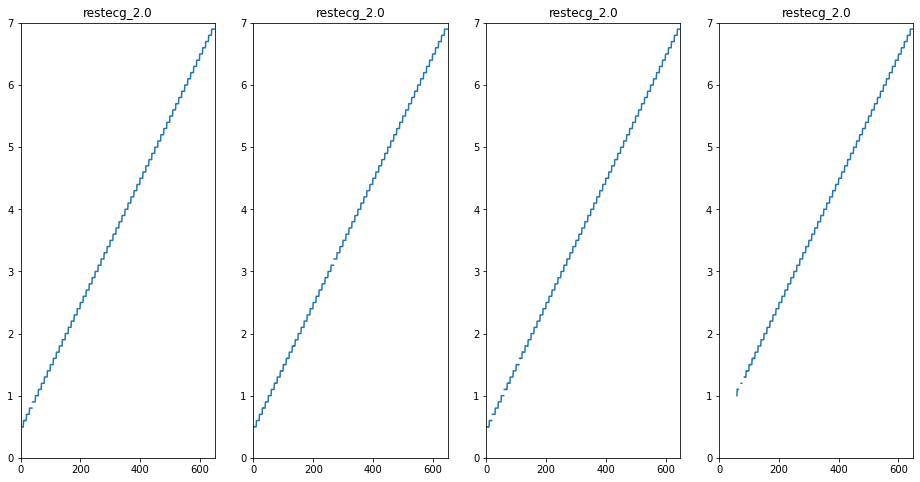

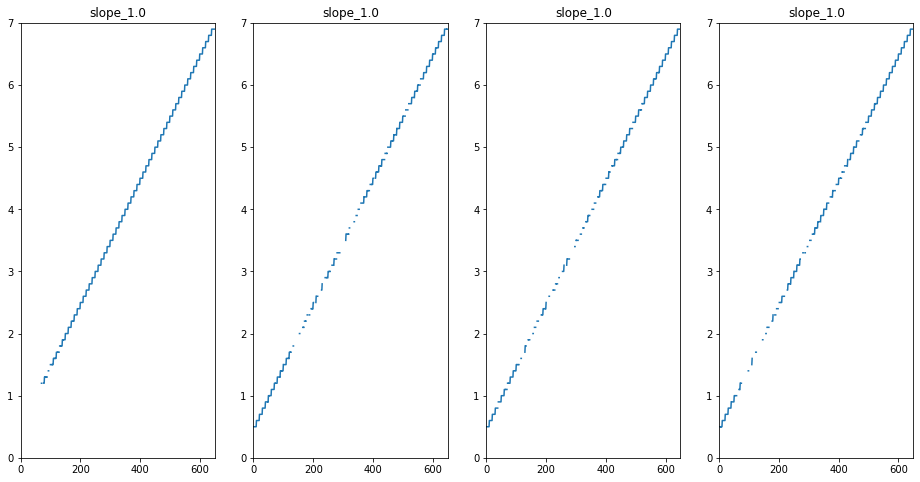

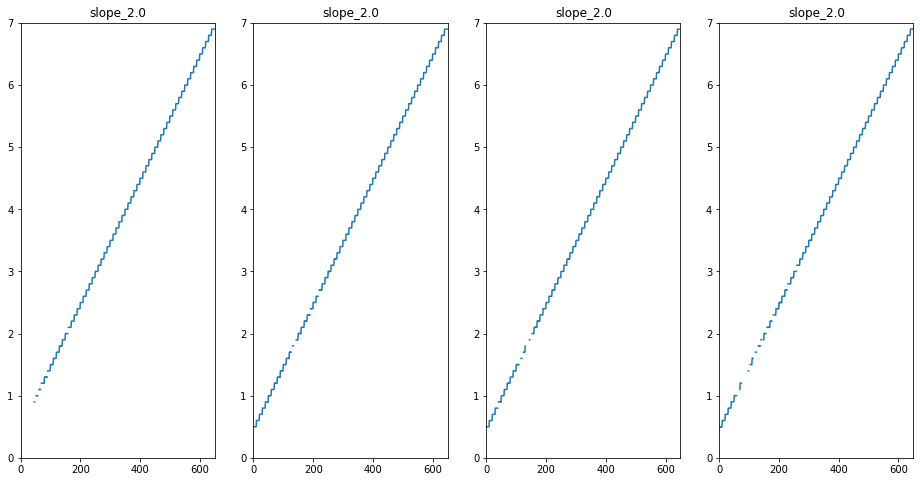

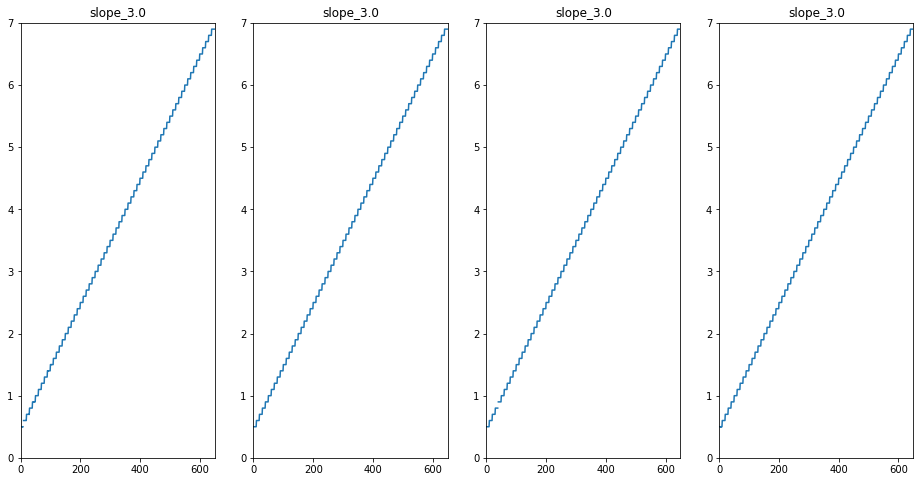

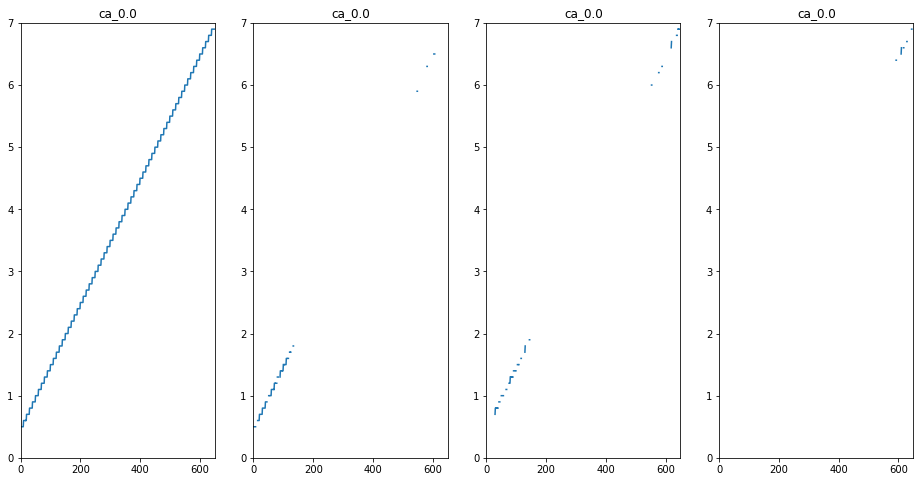

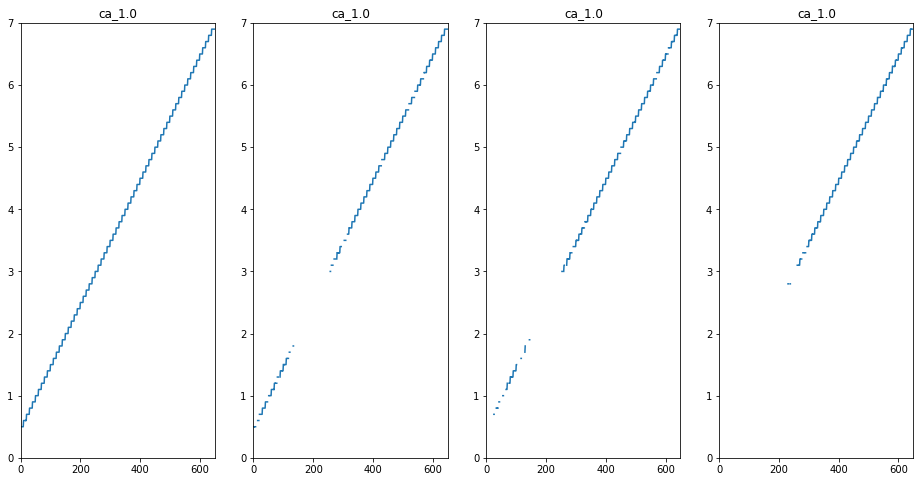

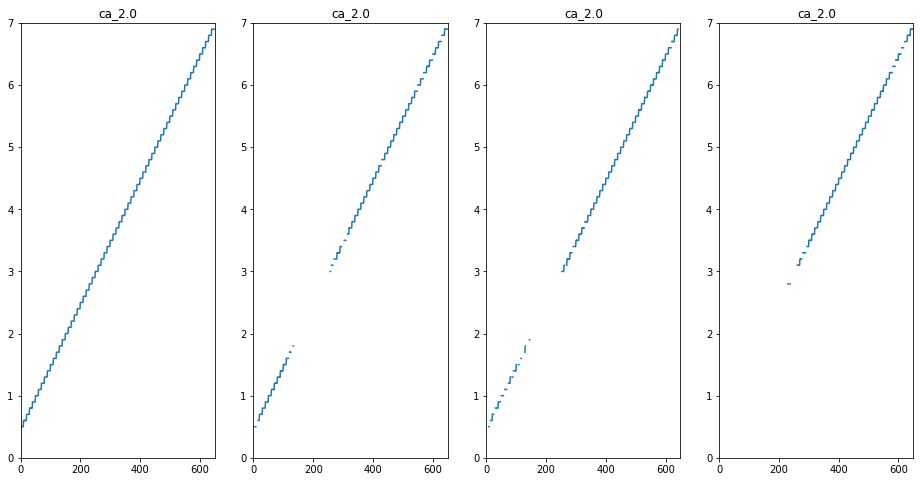

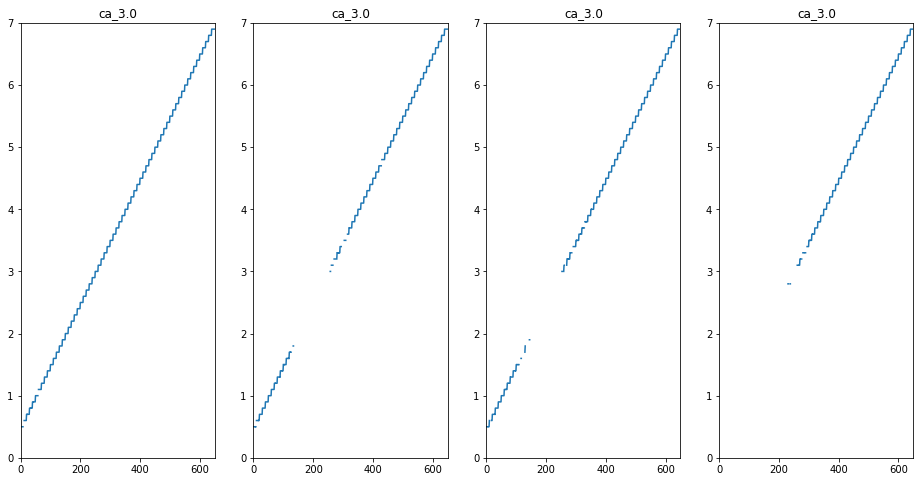

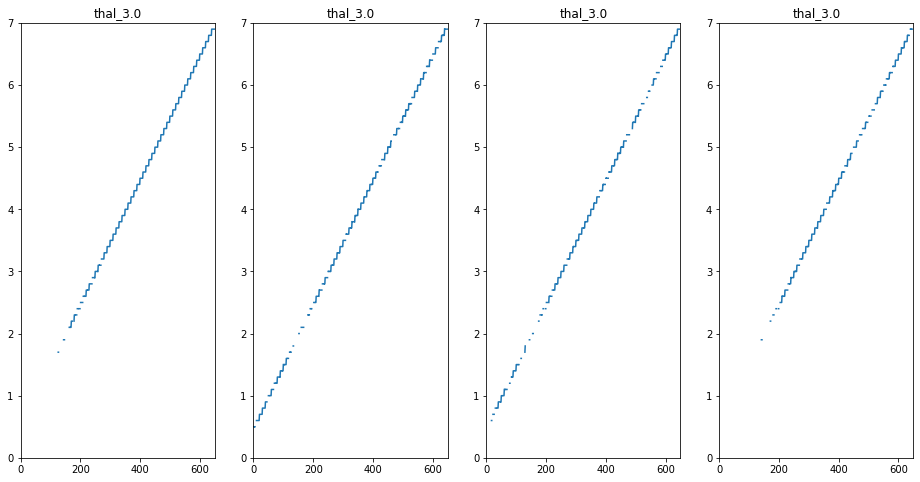

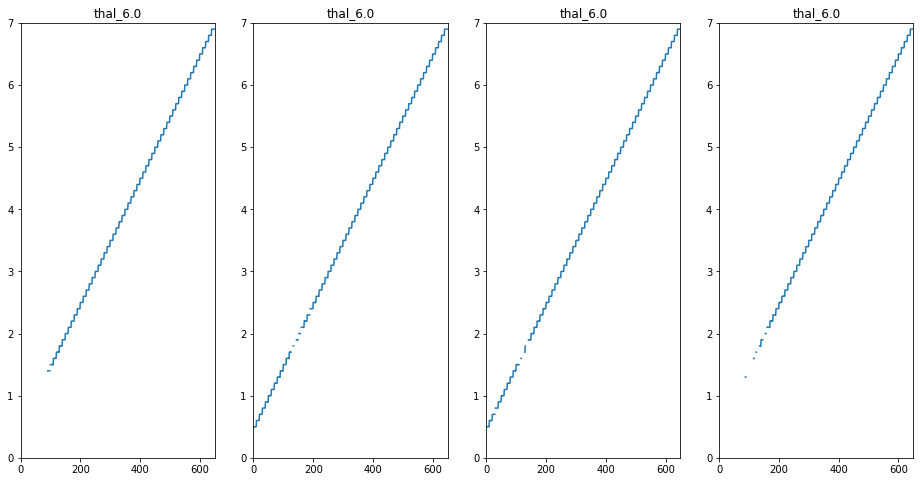

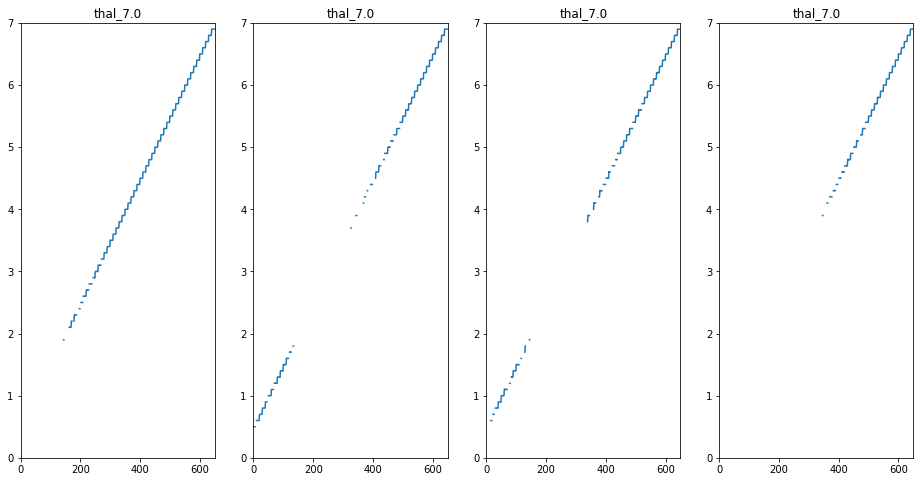

In [ ]:
for i in result.columns.to_list():
  fig = plt.figure(i)
  ax1 = fig.add_subplot(141)
  result[i].plot()
  plt.title(i)
  plt.xlim([0,650])
  plt.ylim([0,7])
  plt.grid()
  ax2 = fig.add_subplot(142)
  result2[i].plot()
  plt.title(i)
  plt.xlim([0,650])
  plt.ylim([0,7])
  plt.grid()

  ax3 = fig.add_subplot(143)
  result3[i].plot()
  plt.title(i)
  plt.xlim([0,650])
  plt.ylim([0,7])
  plt.grid()

  ax4 = fig.add_subplot(144)
  result4[i].plot()
  plt.title(i)
  plt.xlim([0,650])
  plt.ylim([0,7])
  plt.show()


Using r = 18 solved the problem of a feature appearing for low tau and high tau but not in between! Also r = 18 is 4 times as fast! The r-SVD doesn't work here. It gives the wrong answers.

Actually, r = 18 makes a LOT of mistakes. It's not worth it for not seeing the problem with the feature only appearing in between. Actually, r = 20 and the full SVD are really close. I think you can use r = 20 or above for this. It makes the above problem a little better, too, but not much.

The r_estimator does such a bad job even for r = 26 (when there are only 25 features). r = 20,22,24 the same. It really does a bad job. It seems there is a lot of over-fitting at large r > 20 (so good features get thrown out for small tau) and at r = 20, it just is not able to distinguish good from bad features.

In [ ]:
  temp = []
  temp2 = []
  temp3 = []
  temp4 = []
  for i in range(30):
    result = cross_correlate(X_encoded[['cp_4.0','ca_0.0','sex','slope_1.0','trestbps','thalach','thal_7.0']],y,nr_folds=30)
    test_mean = np.mean([i[0] for i in result])
    test_err_mean = np.std([i[0] for i in result])/np.sqrt(30)
    train_mean = np.mean([i[1] for i in result])
    train_err_mean = np.std([i[1] for i in result])/np.sqrt(30)
    temp.append(test_mean)
    temp2.append(test_err_mean)
    temp3.append(train_mean)
    temp4.append(train_err_mean)
  mean_test = (np.mean(temp))
  mean_err_test = (np.mean(temp2))
  mean_train = (np.mean(temp3))
  mean_err_train = (np.mean(temp4))
  print(mean_test)
  print(mean_err_test)
  print(mean_train)
  print(mean_err_train)

0.8621234567901234
0.019935527404099724
0.8736600018281926
0.0007970403695801401


It is not obvious why slope_1.0 should be in and oldpeak and exang should be out for the best model (even on the training data). Maybe loading scores aren't everything. BUT NOW IT IS. But now it is not obvious why thal_7 is in and thal_3 is out. But the difference between the two is much smaller.

Let's take those 7 out and go again.

Actually, I cannot take out cp_4.0, ca_0.0, slope_1.0 and thal_7.0. It gets taken out automatically and added back in but the idea is to then take it back out afterwards (or don't look at it). BUT NOW I CAN.

In [ ]:
orthogonal_to = ['sex','trestbps','thalach','cp_4.0', 'ca_0.0', 'slope_1.0','thal_7.0']
X_copy = copy.deepcopy(X_encoded.drop(orthogonal_to,axis=1))
result1 = pd.DataFrame(columns = X_copy.columns)
for tau in np.arange(0.5,10.0,0.1):
  for i in range(10):
    temp = hard_function(tau, X_copy, y, orthogonal_to=orthogonal_to)
    temp2 = {}
    for feature in X_copy.columns:
      if feature not in temp:
        temp2[feature] = tau
    result1 = result1.append(temp2,ignore_index=True)

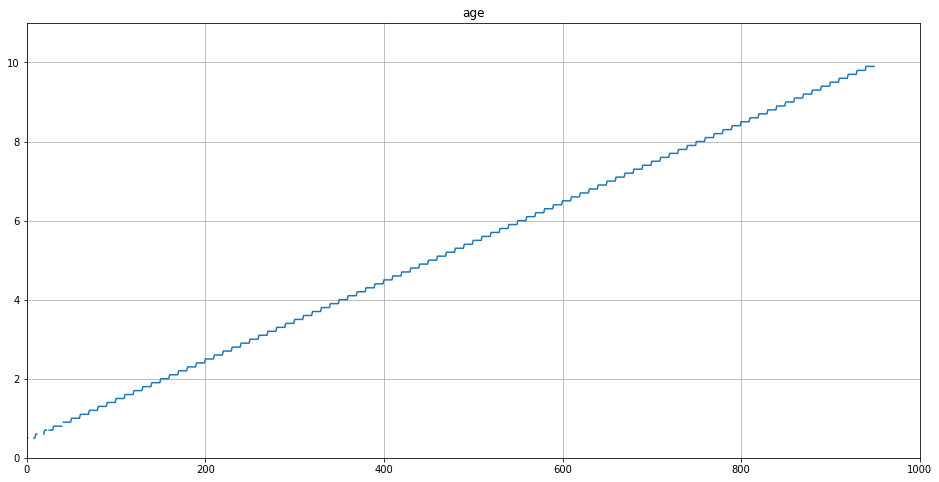

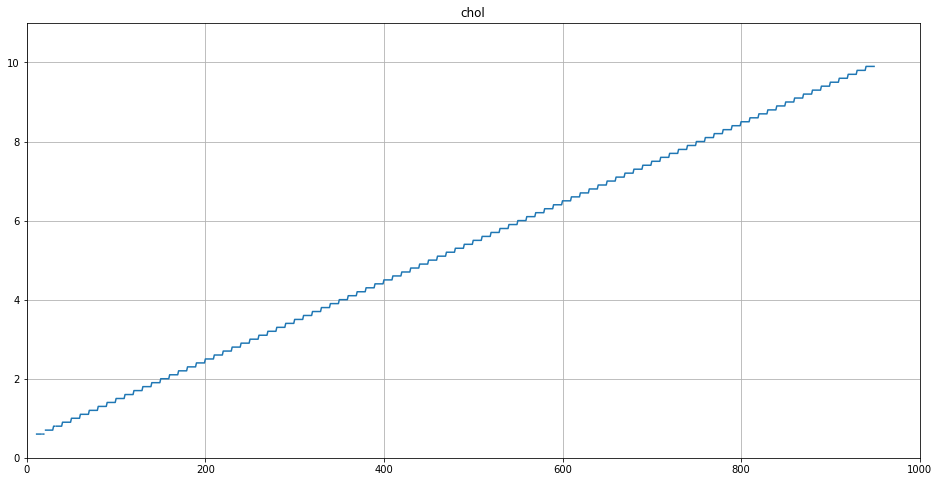

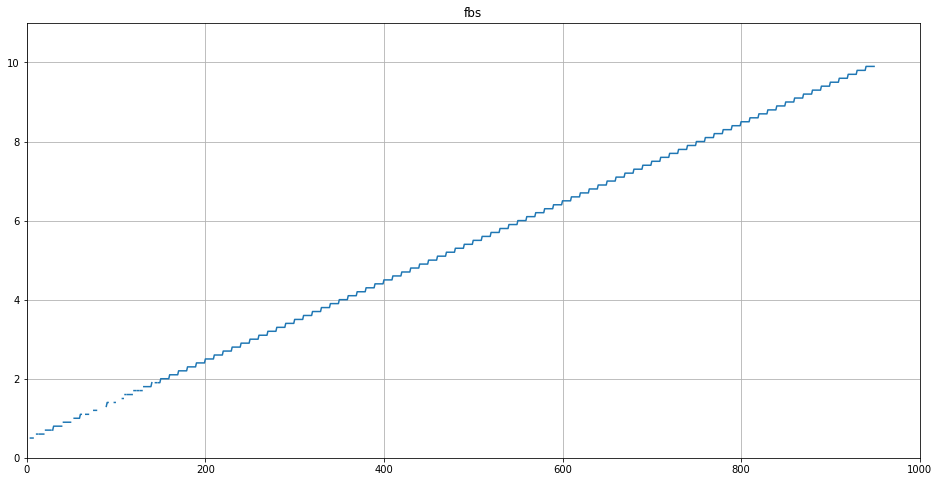

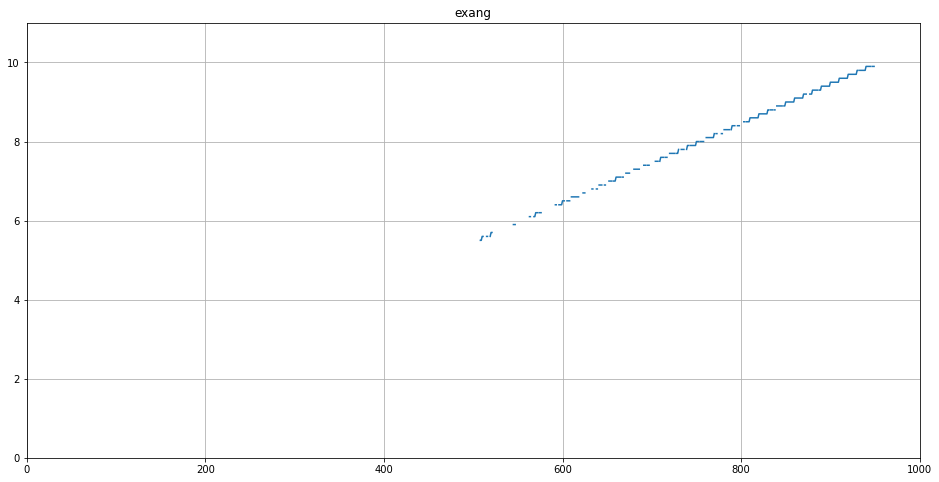

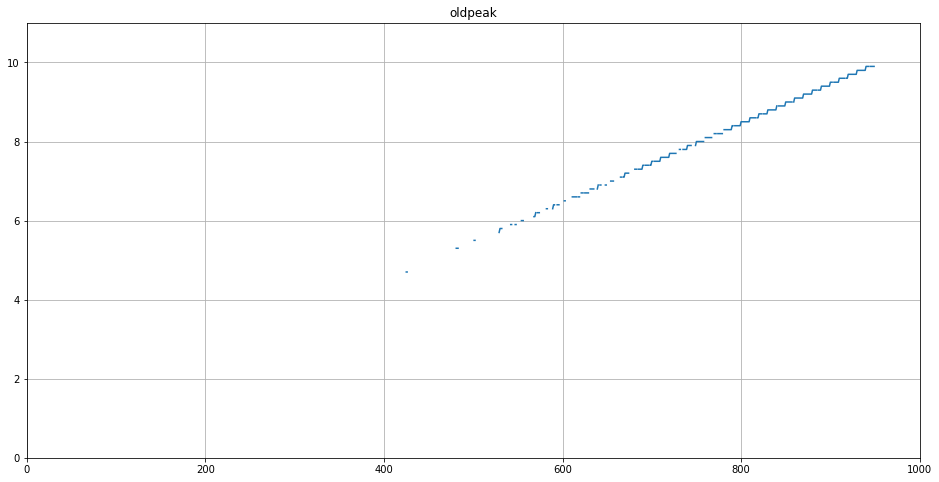

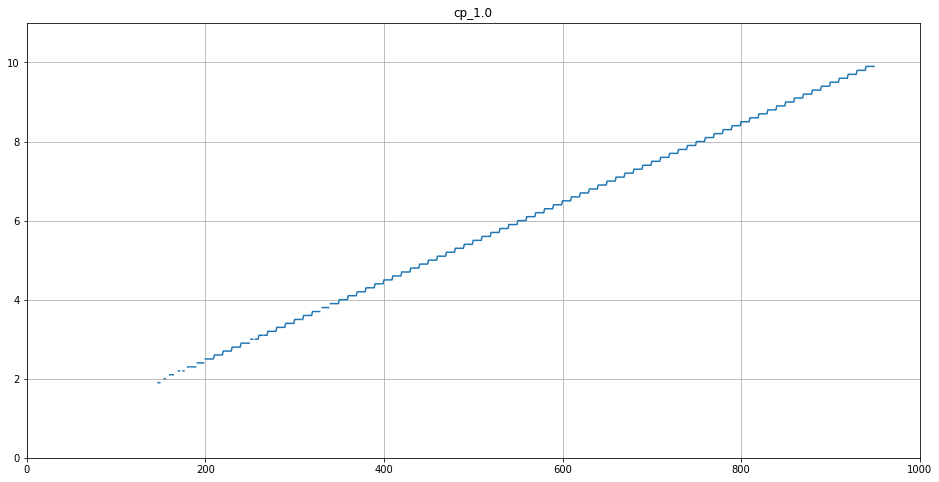

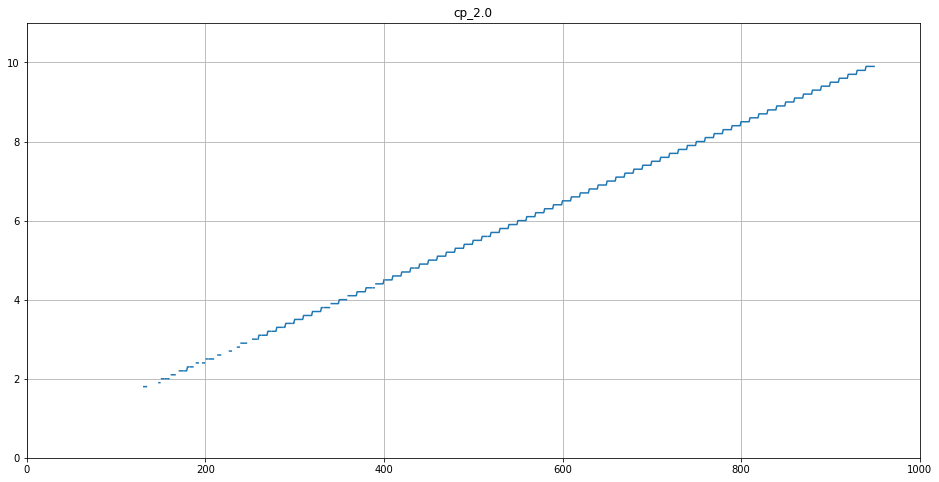

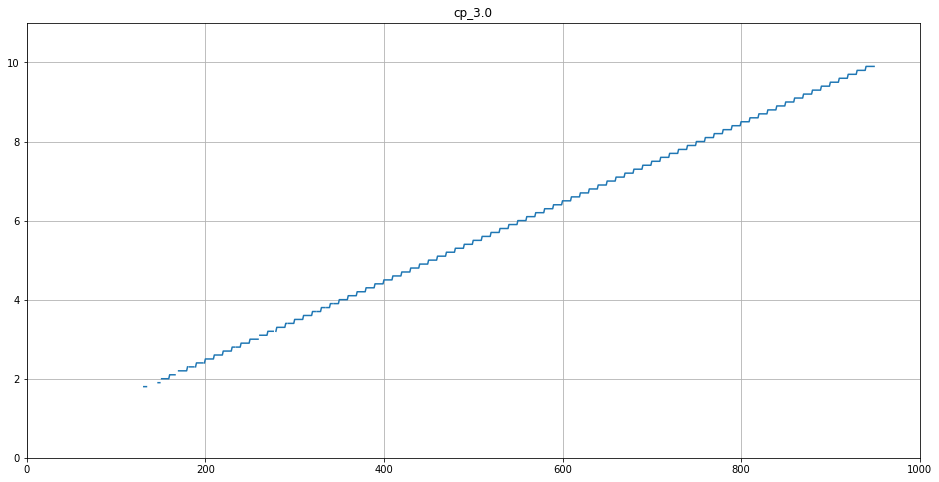

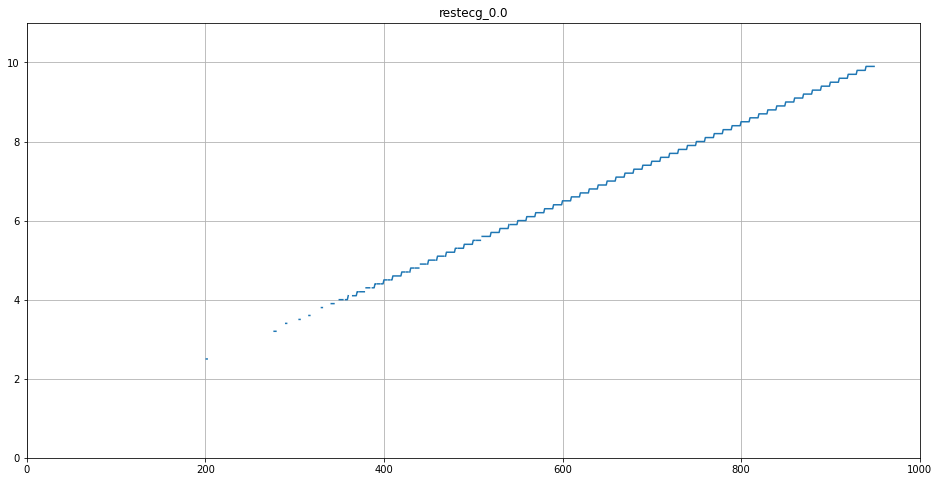

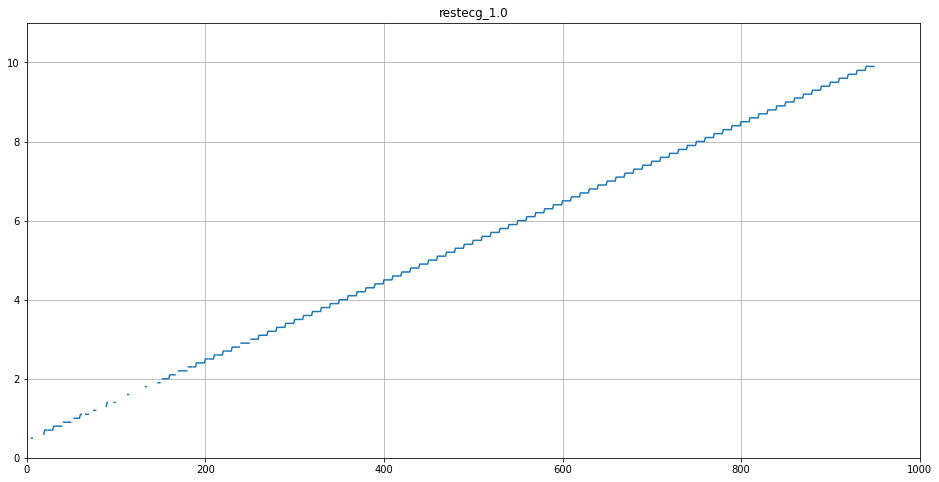

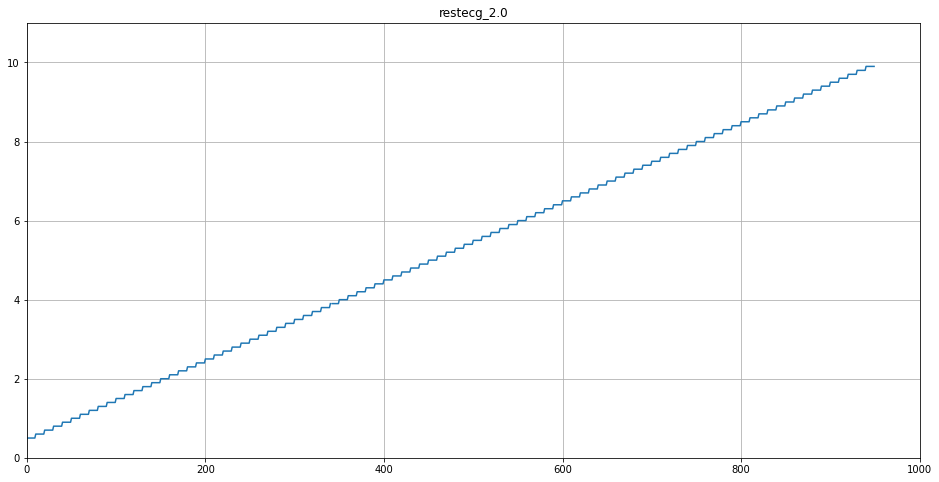

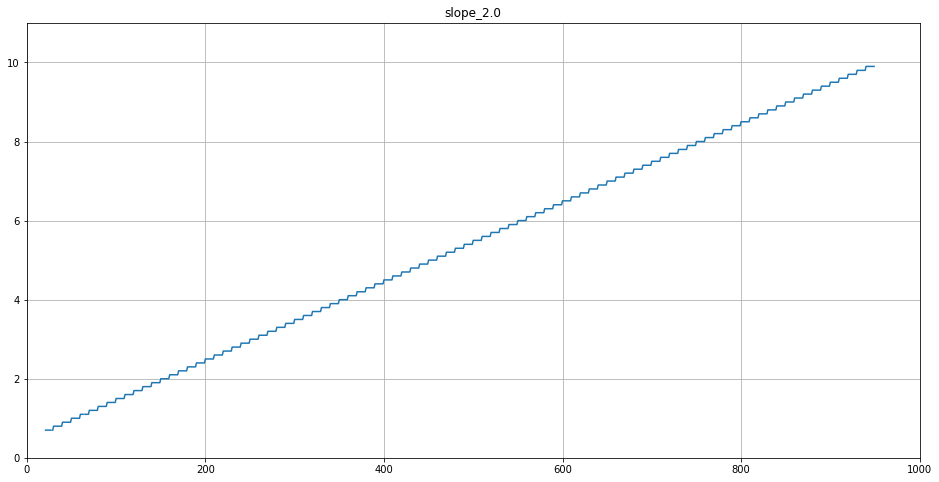

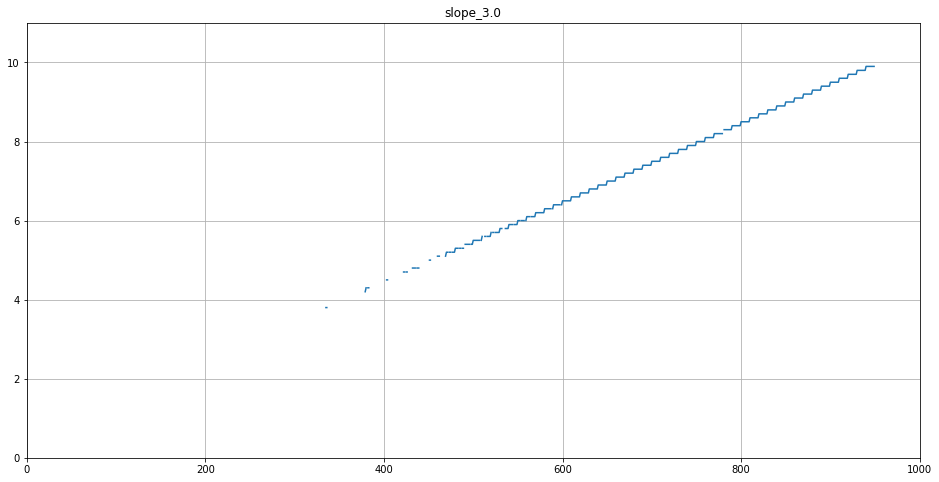

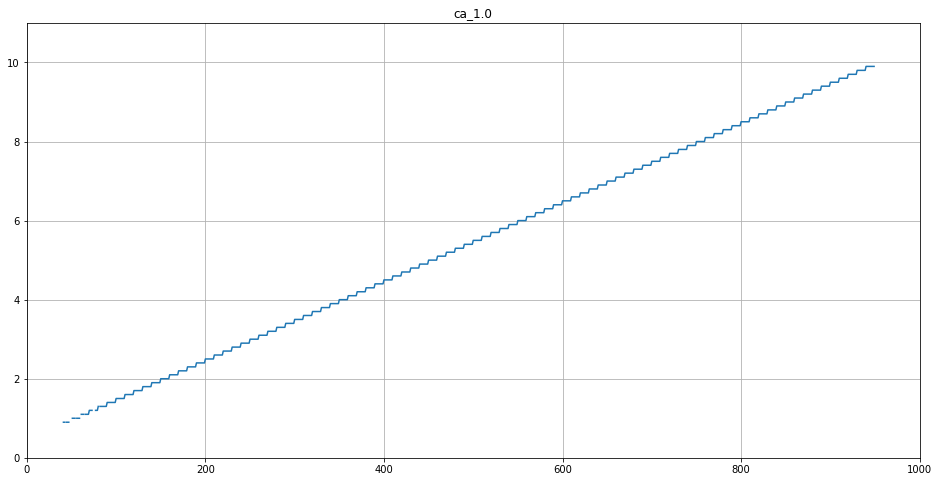

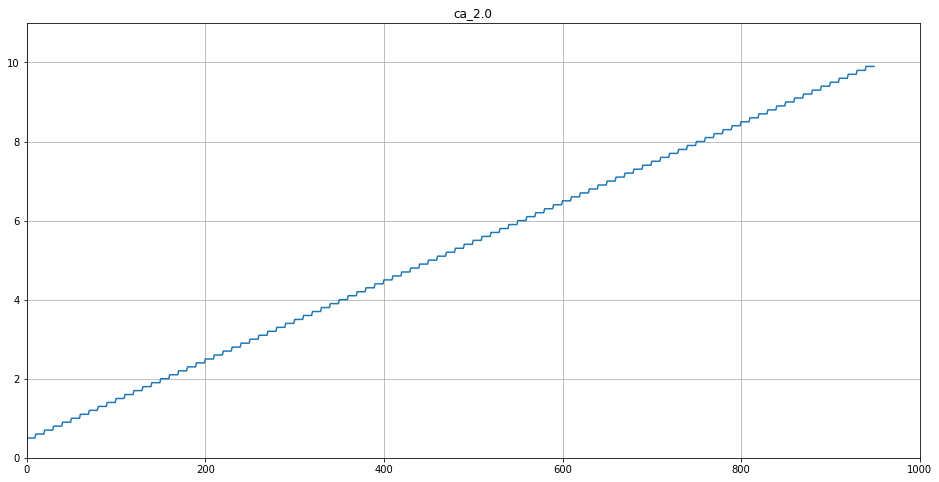

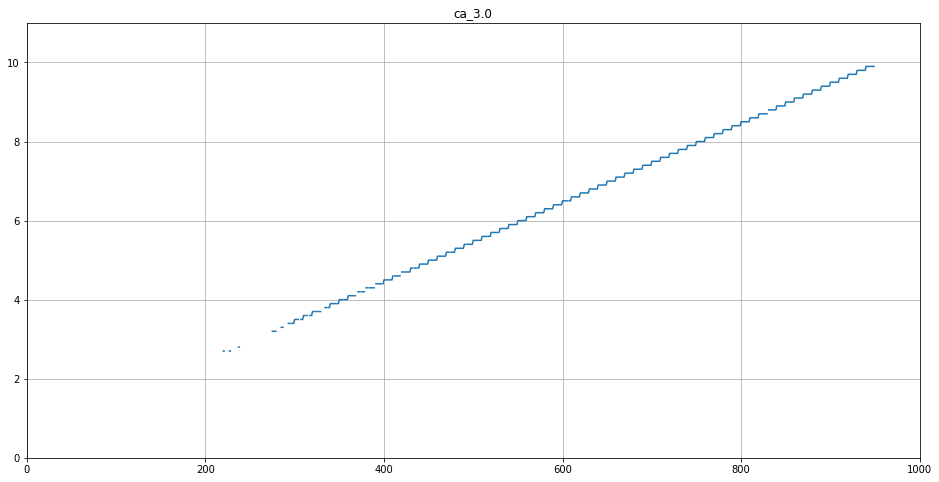

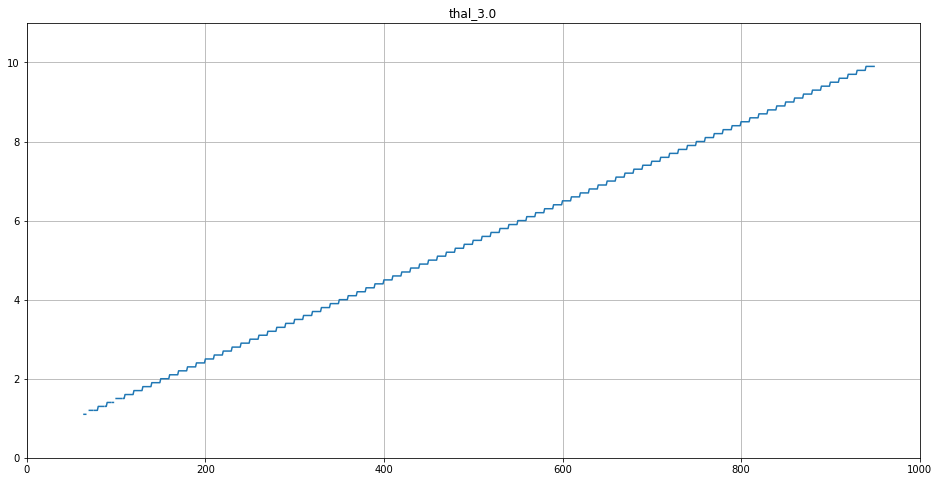

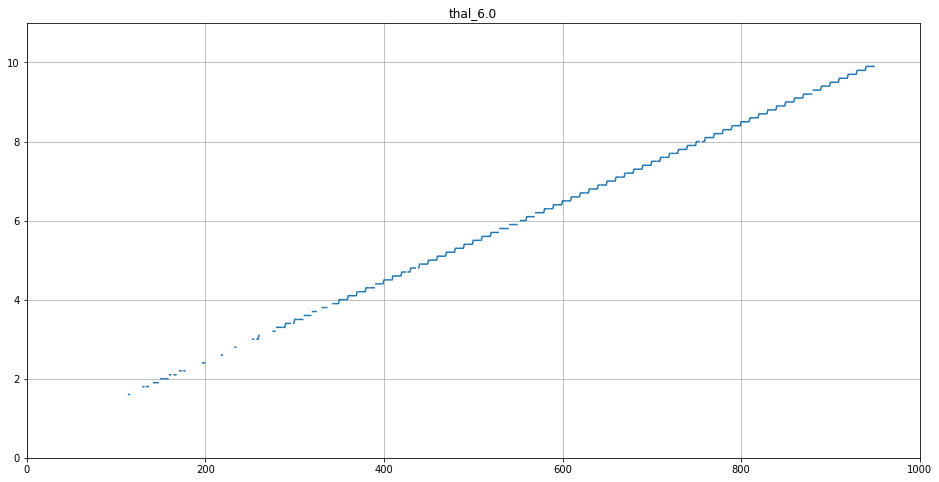

In [ ]:
for i in result1.columns.to_list():
  fig = plt.figure(i)
  #ax1 = fig.add_subplot(141)
  result1[i].plot()
  plt.title(i)
  plt.xlim([0,1000])
  plt.ylim([0,11])

  plt.grid()

```
  thal_6.0  300
  thal_3.0  0
  ca_3.0    300
  ca_2.0    0
  ca_1.0    0
  slope_3.0 500
  slope_2.0 0
  restecg_2.0 0
  restecg_1.0 0
  restecg_0.0 400
  cp_3.0    150
  cp_2.0    250
  cp_1.0    200
  oldpeak   700
  exang     700
  fbs       130
  chol      0
  age       0
  ```
  The highest ones are oldpeak,exang,slope_3.0,restecg_0.0,thal_6.0,ca_3.0,cp_2.0.

0.7507283950617285
0.024829030016099665
0.7667170763969544
0.0009691665891101028


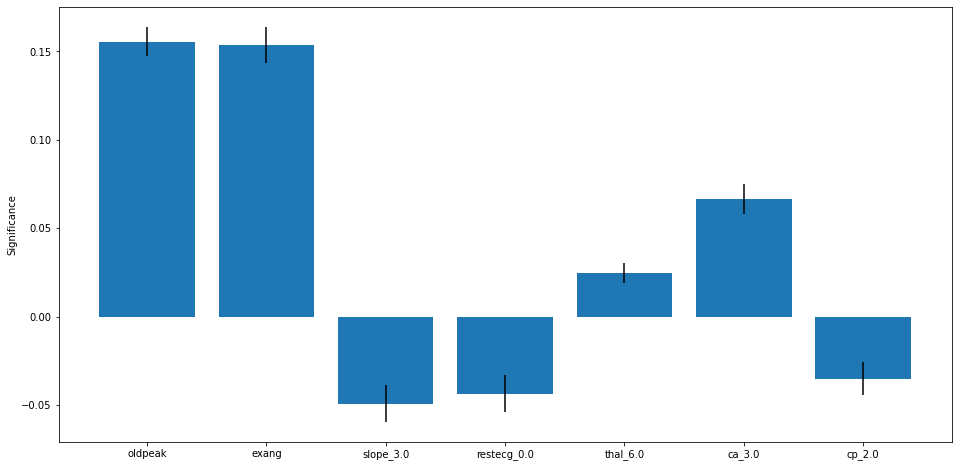

In [ ]:
  temp = []
  temp2 = []
  temp3 = []
  temp4 = []
  for i in range(30):
    result = cross_correlate(X_encoded[['oldpeak','exang','slope_3.0','restecg_0.0','thal_6.0','ca_3.0','cp_2.0']],y,nr_folds=30)
    test_mean = np.mean([i[0] for i in result])
    test_err_mean = np.std([i[0] for i in result])/np.sqrt(30)
    train_mean = np.mean([i[1] for i in result])
    train_err_mean = np.std([i[1] for i in result])/np.sqrt(30)
    temp.append(test_mean)
    temp2.append(test_err_mean)
    temp3.append(train_mean)
    temp4.append(train_err_mean)
  mean_test = (np.mean(temp))
  mean_err_test = (np.mean(temp2))
  mean_train = (np.mean(temp3))
  mean_err_train = (np.mean(temp4))
  print(mean_test)
  print(mean_err_test)
  print(mean_train)
  print(mean_err_train)
  loading_scores(X_encoded[['oldpeak','exang','slope_3.0','restecg_0.0','thal_6.0','ca_3.0','cp_2.0']],y)




That's not that bad for factors we were going to THROW AWAY.

The idea is that it may not be that good by itself but it is orthogonal so together it will be better.

We need to find a way to find the impact of thal_3.0 that's not just 'not thal_7.0'. DONE.

In [ ]:
orthogonal_to = ['sex','trestbps','thalach','cp_4.0', 'ca_0.0', 'slope_1.0','thal_7.0','oldpeak','exang','slope_3.0','restecg_0.0','thal_6.0','ca_3.0','cp_2.0']
X_copy = copy.deepcopy(X_encoded.drop(orthogonal_to,axis=1))
result1 = pd.DataFrame(columns = X_copy.columns)
for tau in np.arange(0.5,10.0,0.1):
  for i in range(10):
    temp = hard_function(tau, X_copy, y, orthogonal_to=orthogonal_to)
    temp2 = {}
    for feature in X_copy.columns:
      if feature not in temp:
        temp2[feature] = tau
    result1 = result1.append(temp2,ignore_index=True)

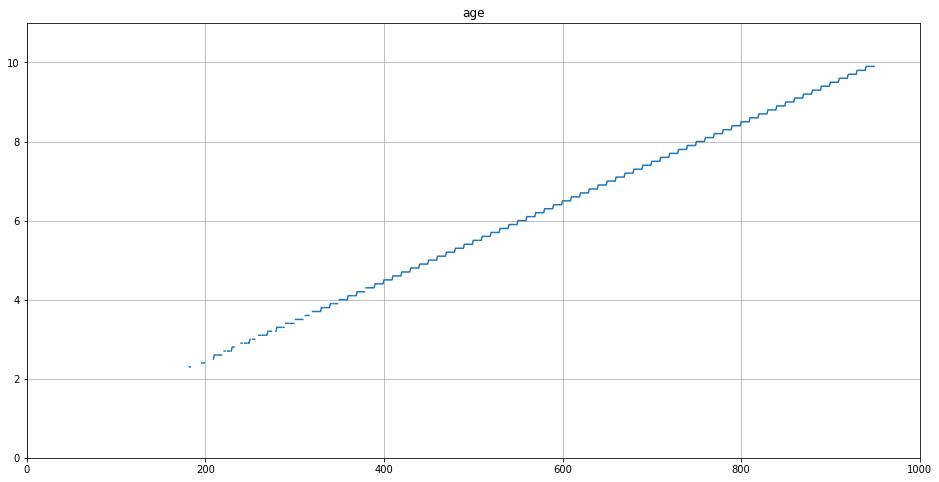

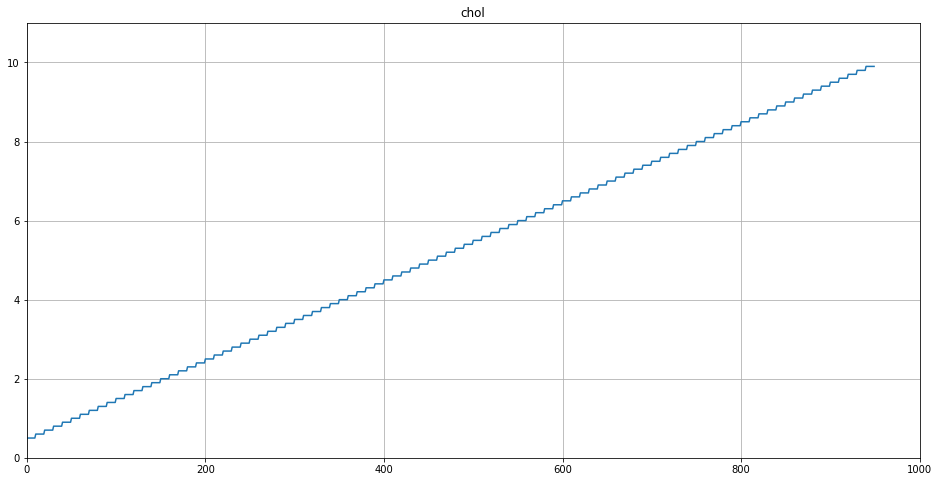

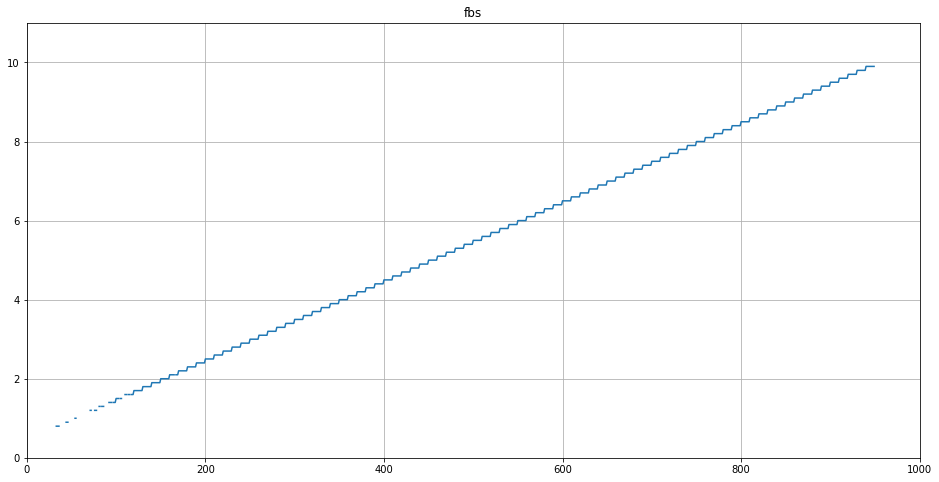

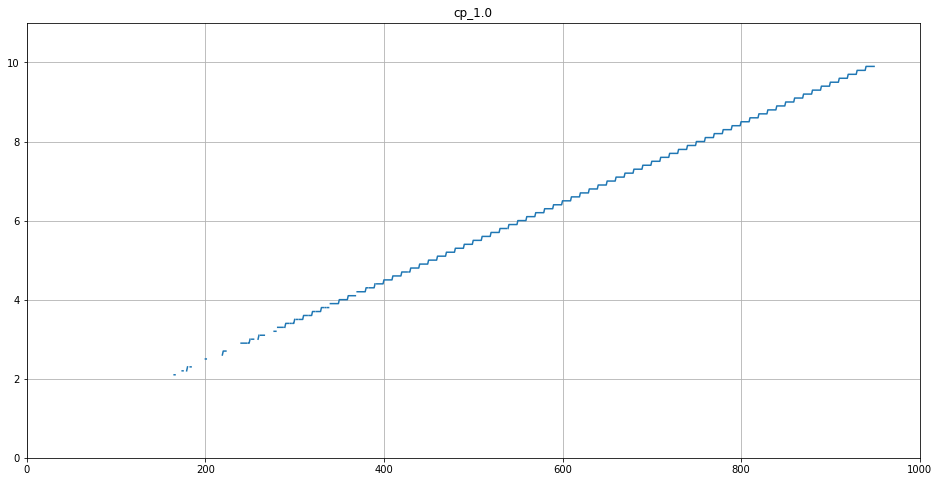

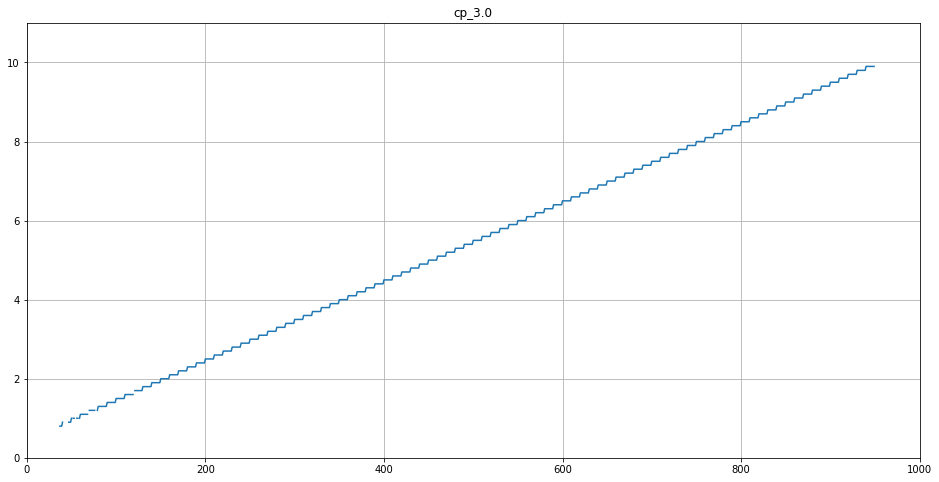

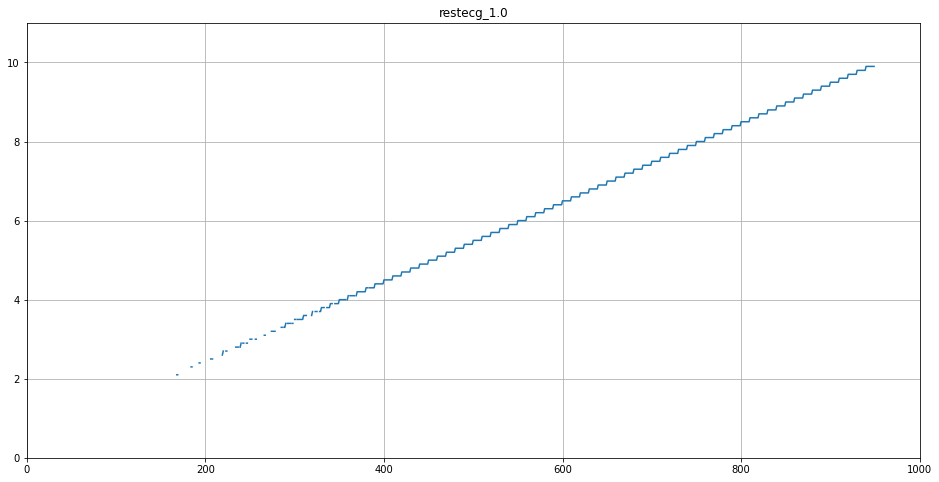

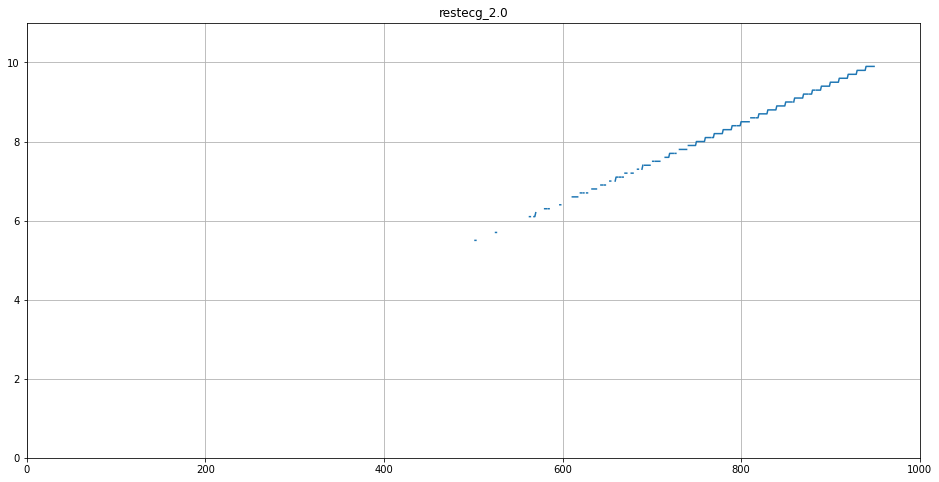

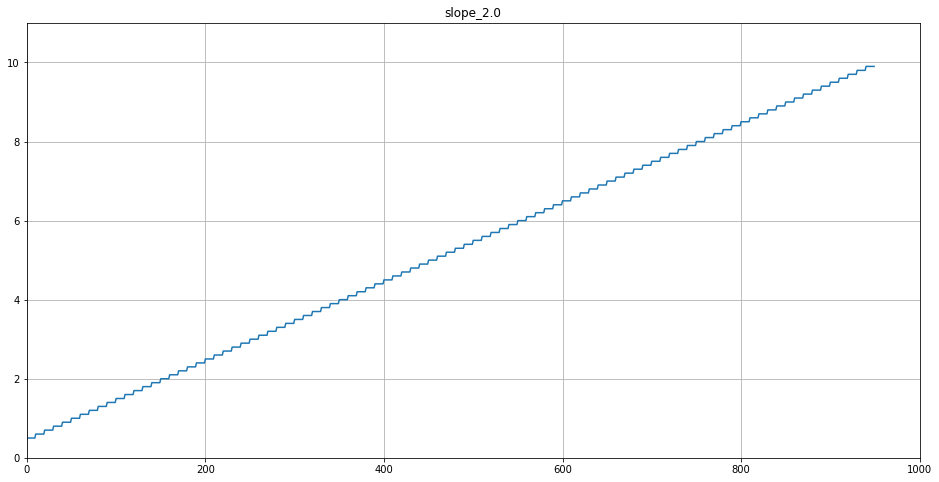

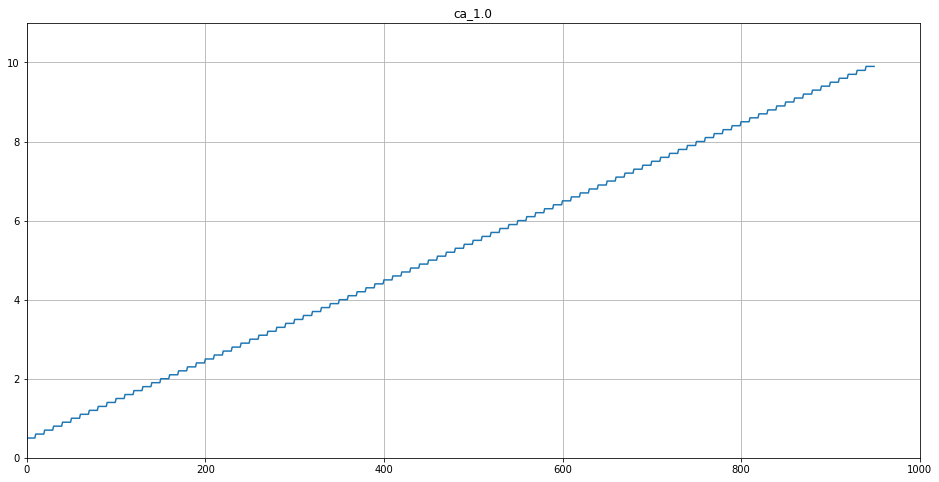

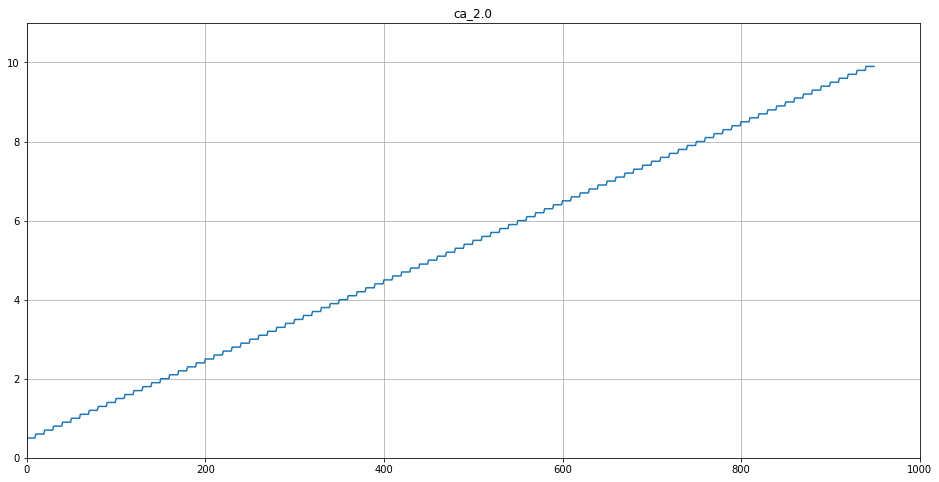

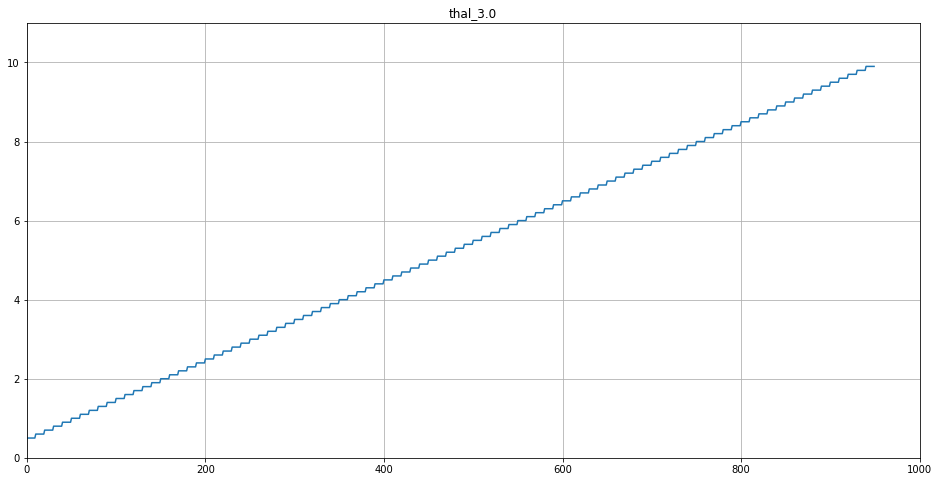

In [ ]:
for i in result1.columns.to_list():
  fig = plt.figure(i)
  #ax1 = fig.add_subplot(141)
  result1[i].plot()
  plt.title(i)
  plt.xlim([0,1000])
  plt.ylim([0,11])

  plt.grid()

```
thal_3.0  0
ca_2.0    0
ca_1.0    0
slope_2.0 0
restecg_2.0 700
restecg_1.0 300
cp_3.0    0
cp_1.0    300
fbs       100
chol      0
age       300
```
Looks like a few are just useless. I'm not sure if I should use the others because I don't know how much they are just 'not cp_4.0' or 'not ca_0.0'. To get a loading score for ca_2.0 and ca_3.0 I shouldn't look at any data with ca_0.0. In other words, if I take out part of categorical labels, I should take out their data with it. BUT NOW WE DON'T HAVE TO DO THAT. WE JUST TAKE OUT THE ORTHOGONAL COMPONENT.

0.6085925925925925
0.027963535382948105
0.63016816686024
0.0015694770662727647


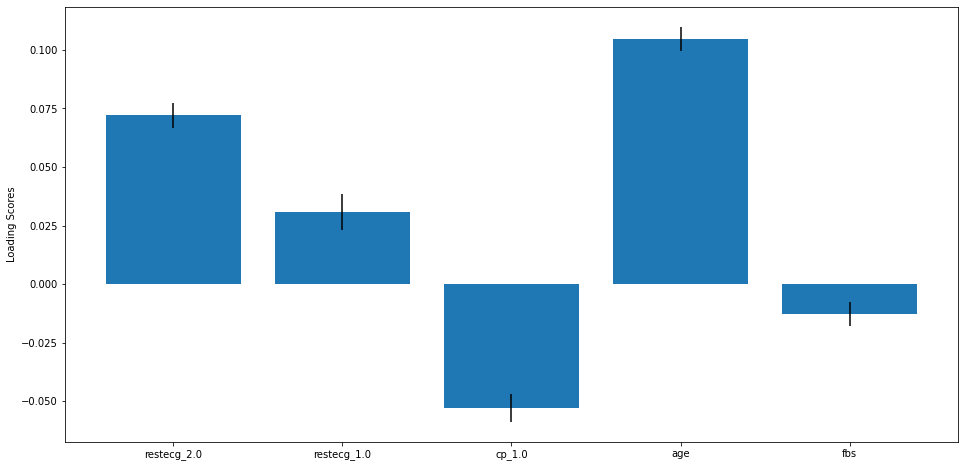

In [ ]:
scores = loading_scores(X_encoded[['restecg_2.0','restecg_1.0','cp_1.0','age','fbs']],y)

It really is nothing great, but the most "orthogonal" to my other 3.

Now how do we put the three together? I'm not going to have all the features, only 3, one for each model.

0.8612592592592594
0.019333446273008377
0.8735513050070977
0.0008098130792372066


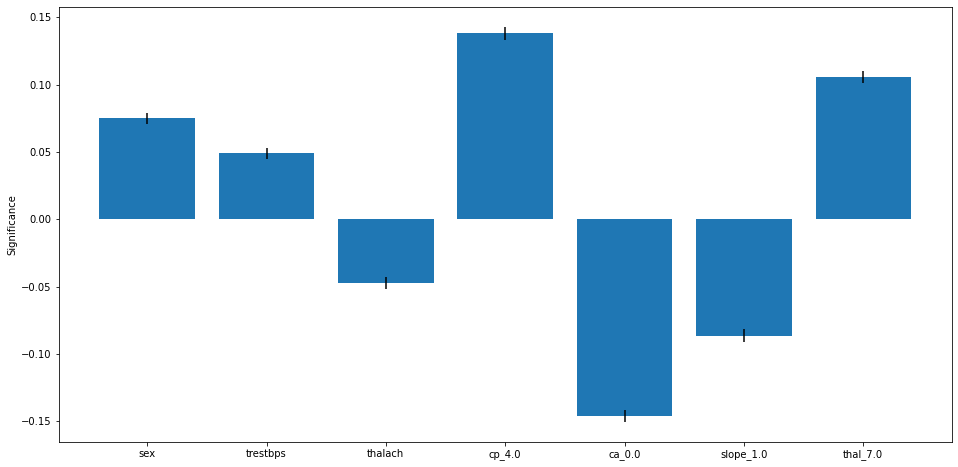

0.7502962962962965
0.023641429411050224
0.76682523551426
0.0009719040896846063


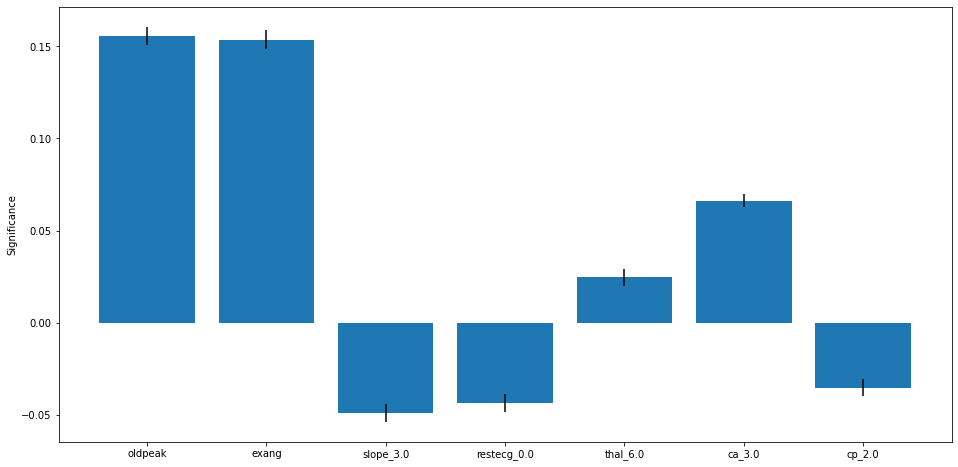

0.6055925925925929
0.027965907150280966
0.6301286321890999
0.0016367524591814168


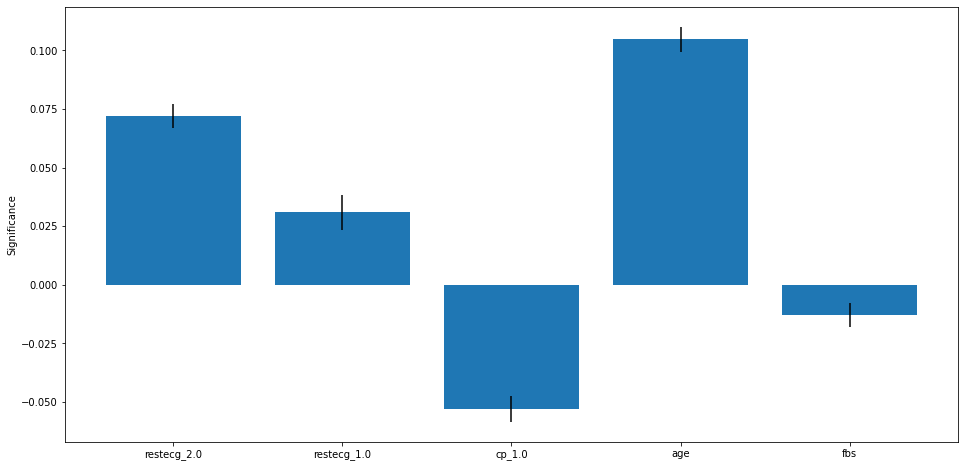

In [ ]:
features1 = ['sex','trestbps','thalach','cp_4.0', 'ca_0.0', 'slope_1.0','thal_7.0']
features2 = ['oldpeak','exang','slope_3.0','restecg_0.0','thal_6.0','ca_3.0','cp_2.0']
features3 = ['restecg_2.0','restecg_1.0','cp_1.0','age','fbs']
scores1,average1 = loading_scores(X_encoded[features1],y)
scores2,average2 = loading_scores(X_encoded[features2],y)
scores3,average3 = loading_scores(X_encoded[features3],y)


In [ ]:
models = pd.DataFrame({'model1': X_encoded[features1] @ scores1 + average1*np.ones_like(y),'model2': X_encoded[features2] @ scores2 + average2*np.ones_like(y),'model3': X_encoded[features3] @ scores3 + average3*np.ones_like(y)})

In [ ]:
models

model1    model2    model3
0    0.290923  0.481210  0.414581
1    0.992860  1.053727  0.695895
2    1.055679  0.936431  0.695895
3    0.172626  0.451373  0.204325
4   -0.129508  0.353523  0.394721
..        ...       ...       ...
297  0.666289  0.528565  0.435998
298  0.448538  0.334794  0.098692
299  1.097130  0.628824  0.526740
300  1.112397  0.662215  0.435998
301  0.336532  0.166413  0.580058

[297 rows x 3 columns]

0.8614814814814814
0.01918459368202394
0.8687604717813052
0.0008152472569447745


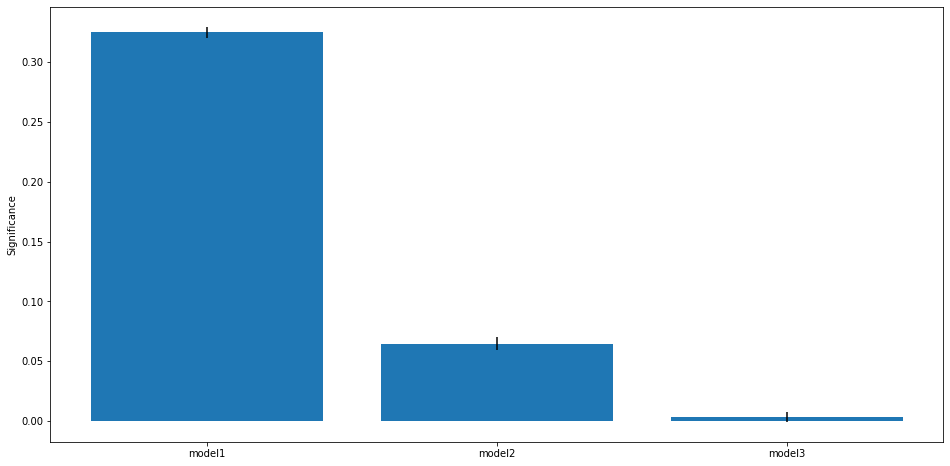

([0.8798651227066661, 0.22825637056482156, 0.023122321519884605],
 -0.06054655417639665)

In [ ]:
loading_scores(models,y)

We used some of model2. Too bad we didn't do any better than just using model1.

0.8728518518518518
0.018016706023501534
0.8748481121219941
0.0006826831487902028


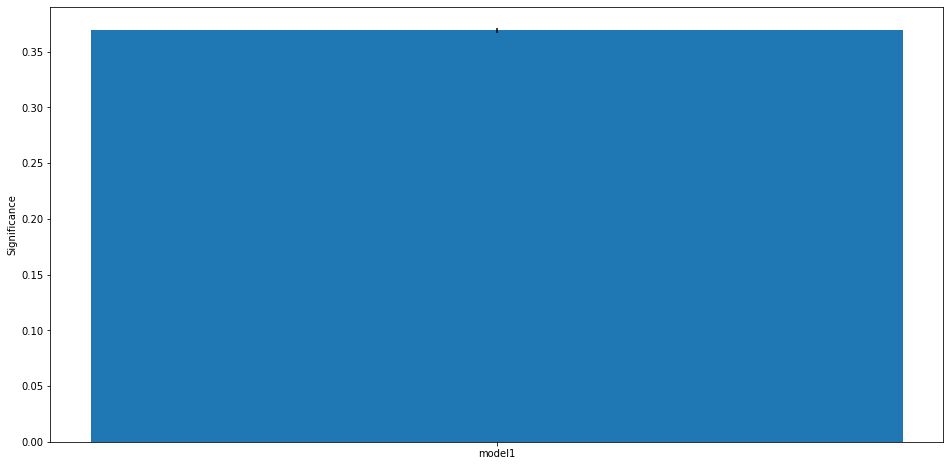

([1.000079921688327], -3.748821424833446e-05)

In [ ]:
loading_scores(pd.DataFrame({'model1': X_encoded[features1] @ scores1 + average1*np.ones_like(y)}),y)

We actually just use model 1 and do the best. It's strange because this answer was in the 'solution space' of the 3 models. However, it wasn't able to find it.

0.8632222222222224
0.018960443803039254
0.8696234460360477
0.0007564122576197711


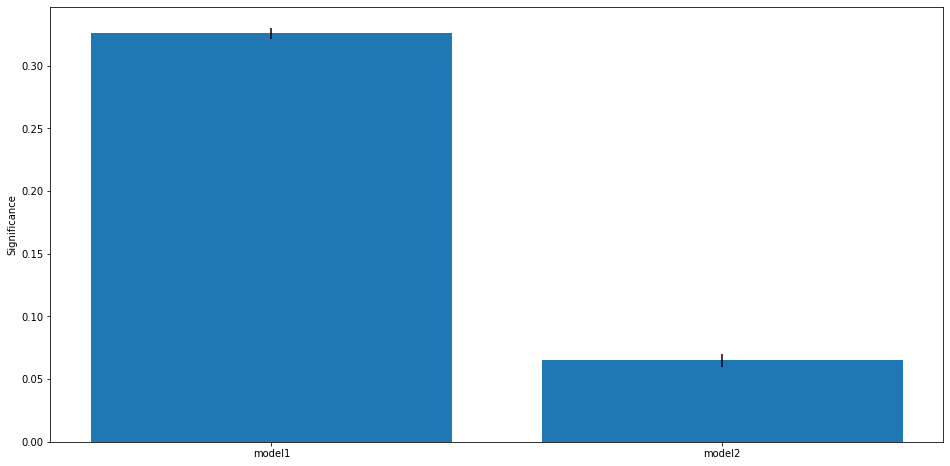

([0.8821100843267531, 0.23038026159639138], -0.05189140320919728)

In [ ]:
loading_scores(pd.DataFrame({'model1': X_encoded[features1] @ scores1 + average1*np.ones_like(y),'model2': X_encoded[features2] @ scores2 + average2*np.ones_like(y)}),y)

Again the same answer as before. It is not able to understand that just model1 is better.

Maybe it is using a different sum of squares. Since it is logistic regression, maybe this way it gets some answers from 0.7->0.9 which makes it think it is better but actually it is the same. Maybe I should use a different way to measure (so that 0.9 is actually closer to 1 than 0.7).

0.8619753086419752
0.019813887863424934
0.8735323106207252
0.0008126296708761843
###McFadden###
0.2674592112939712
0.01232644563068399
0.25948987806934204
0.00046760411284611173


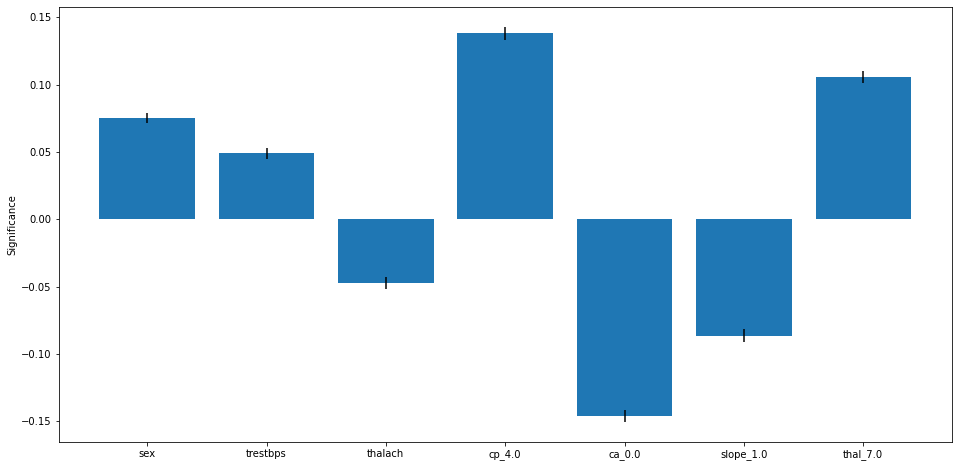

0.7508888888888888
0.024664686954627587
0.7668565164322279
0.0009565118888223012
###McFadden###
0.3548555547073162
0.012921386188360336
0.34606355944212536
0.0006981190177775513


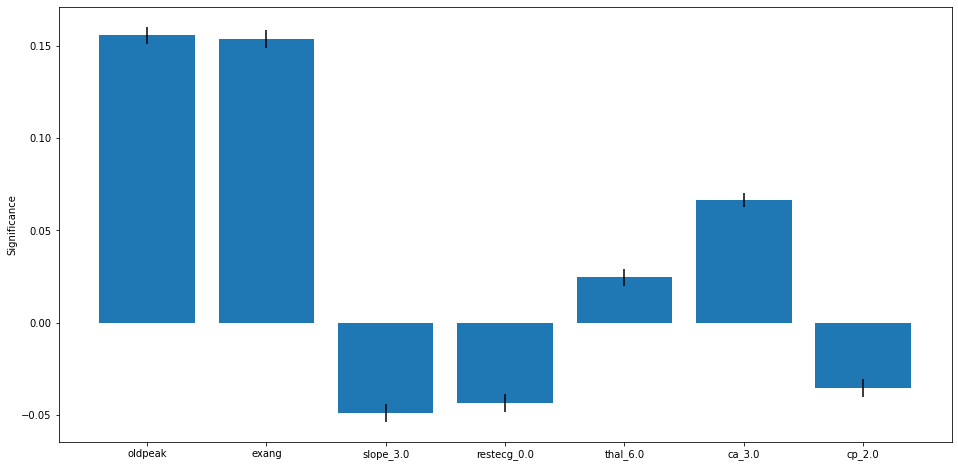

0.6054074074074075
0.02728359531917254
0.6301215613842647
0.0016508158157814332
###McFadden###
0.4647827316624413
0.008456809515635077
0.4548214829144637
0.000595448510514095


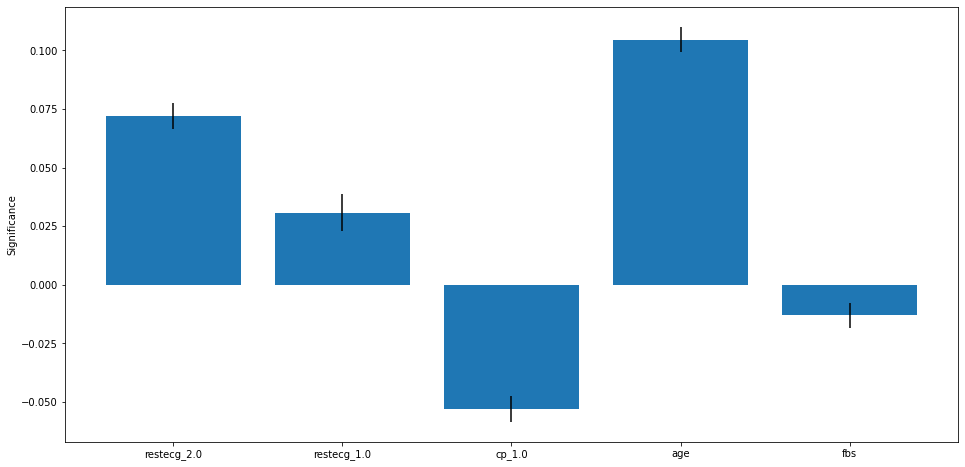

0.8617777777777778
0.019790187298940578
0.8688262867251688
0.0008611169492842215
###McFadden###
0.258209497687354
0.012496248314348523
0.2548641992489276
0.0004514890148720777


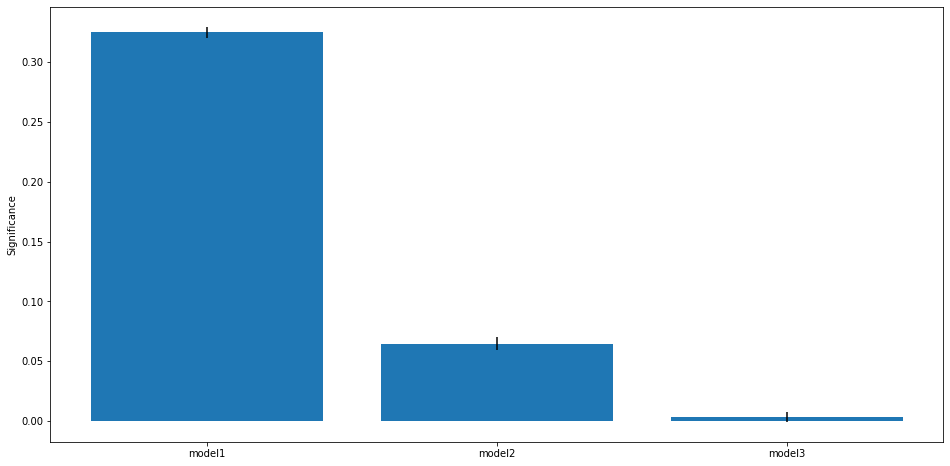

([0.8798567752962134, 0.22824454127074822, 0.023135360662745873],
 -0.0605399057675748)

In [ ]:
features1 = ['sex','trestbps','thalach','cp_4.0', 'ca_0.0', 'slope_1.0','thal_7.0']
features2 = ['oldpeak','exang','slope_3.0','restecg_0.0','thal_6.0','ca_3.0','cp_2.0']
features3 = ['restecg_2.0','restecg_1.0','cp_1.0','age','fbs']
scores1,average1 = loading_scores(X_encoded[features1],y)
scores2,average2 = loading_scores(X_encoded[features2],y)
scores3,average3 = loading_scores(X_encoded[features3],y)
models = pd.DataFrame({'model1': X_encoded[features1] @ scores1 + average1*np.ones_like(y),'model2': X_encoded[features2] @ scores2 + average2*np.ones_like(y),'model3': X_encoded[features3] @ scores3 + average3*np.ones_like(y)})
loading_scores(models,y)

It's as I thought. model1 has a train McFadden of 0.2595 and all models together have a train McFadden of 0.2549. So while the accuracy was lower at 0.8688 vs. 0.8736, we have a better McFadden of 0.2549.

In [ ]:
(0.8736-0.8688)*len(y)*9/10

1.283040000000007

So while 3 models gets 1.28 people wrong each time compared to 1 model, we are 0.5% more sure about each and every person. The idea is that us being wrong when it comes to these 1.28 people was just bad luck and if we had more people, that would go away but us doing better for everybody wouldn't.

3 models
```
0.8617530864197531
0.018808163390476463
0.8688147126510948
0.0008027090963566747
###McFadden###
0.2580820927743537
0.01211508293680781
0.2548609390014642
0.0004402869314625088
```
1 model
```
0.8606543209876544
0.020430163229451244
0.8736095114423367
0.0008417158573065593
###McFadden###
0.26739093954971715
0.012447941213007768
0.2594798049854592
0.0004684819382776921
```

In [ ]:
np.sqrt(0.0188**2+0.0204**2)*100

2.7741665415039525

We can clearly see that this is true. The test data actually has a higher accuracy for the 3 model case. Also, the McFadden of the test data is almost 1% better than for the 1 model case. In summary, we improved our model confidence by 0.9% +- 1.7% for each patient and the result is that we can save 0.1% +- 2.8% more people. ACTUALLY, the two are 'correlated': the 3 model case is just ```0.8798637094013678*model_1 + 0.2282376410154*model_2 + 0.023139974055629564*model_3 - 0.06054389374232991```. So model_1 - 3_models = 

In [ ]:
1-0.8798637094013678

0.12013629059863218

```0.120*model_1 + 0.228*model_2 + 0.023*model_3 - 0.061```. The error of this is ```np.sqrt(0.120*model_1_err**2 + 0.228*model_2_err**2 + 0.023*model_3_err**2)```

In [ ]:
model_1_err = 0.0204
model_1_mc_err = 0.0124
model_2_err = 0.0250
model_2_mc_err = 0.0129
model_3_err = 0.0273
model_3_mc_err = 0.0081
print(np.sqrt(0.120*model_1_err**2 + 0.228*model_2_err**2 + 0.023*model_3_err**2))
print(np.sqrt(0.120*model_1_mc_err**2 + 0.228*model_2_mc_err**2 + 0.023*model_3_mc_err**2))

0.01447690816438372
0.0076093173149764225


So we improved our model confidence by 0.9% +- 0.8% and the result is that we can save 0.1% +- 1.4% more people. That's a bit better. Just to make sure that we get back our 3 model results:

In [ ]:
print(np.sqrt(0.880*model_1_err**2 + 0.228*model_2_err**2 + 0.023*model_3_err**2))
print(np.sqrt(0.880*model_1_mc_err**2 + 0.228*model_2_mc_err**2 + 0.023*model_3_mc_err**2))

0.022931691389864815
0.01321965619825266


The result is a bit off but there are 'correlations between the models' that I neglect. Therefore, we may be able to do even better if we use 'correlation matrices'. We should also look at 'false positives' and 'false negatives' to see if we have to use a number different from 0.5.

The average of the accuracy is 0.86 and the average of the McFadden is 0.25. Does that mean that if our model says 0.75, we are 86% sure that our answer is right? I think so. If our model says 0.25, we are also 86% sure that our answer is right. So then, if we can improve our McFadden by 0.9%, then how much does our confidence improve?

In [ ]:
np.arange(0,1.1,0.1)

<BarContainer object of 10 artists>

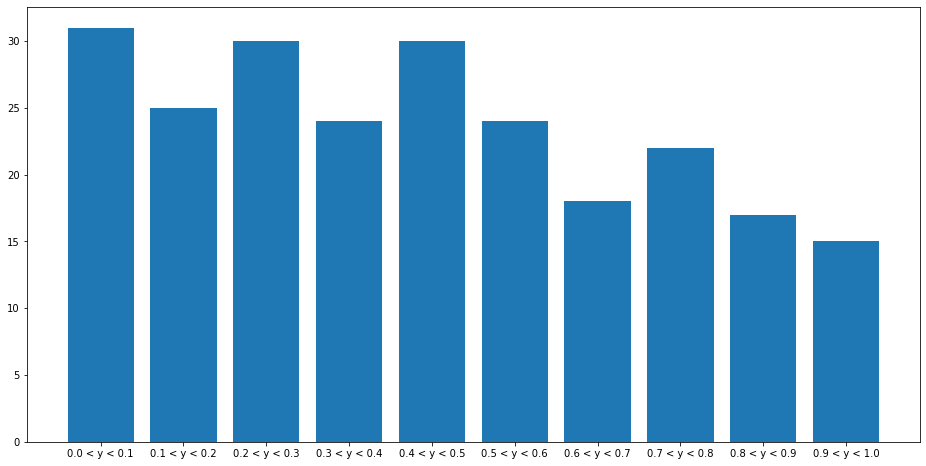

In [ ]:
plt.bar([np.str(round(i,1)) + " < y < " + np.str(round(i+0.1,1)) for i in np.arange(0,1.0,0.1)],[this[(this > i) & (this < i + 0.1)].count() for i in np.arange(0,1.0,0.1)])

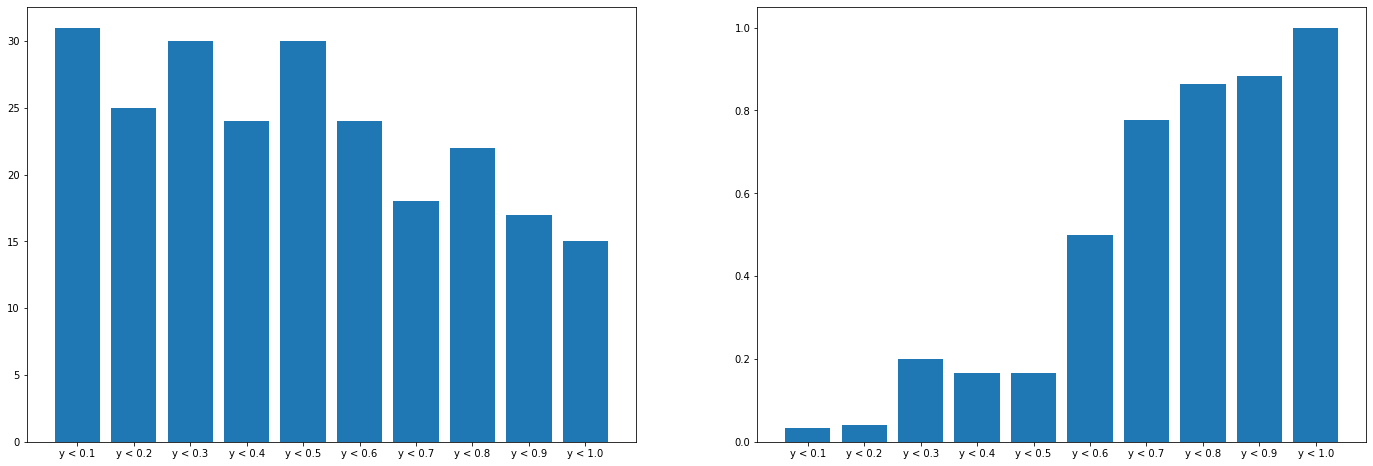

In [ ]:
this = (models @ [0.880, 0.228, 0.023])
fig1 = plt.figure(figsize=(24,8))
ax1 = fig1.add_subplot(121)
plt.bar(["y < " + np.str(round(i+0.1,1)) for i in np.arange(0,1.0,0.1)],[this[(this > i) & (this < i + 0.1)].count() for i in np.arange(0,1.0,0.1)])
ax2 = fig1.add_subplot(122)
plt.bar(["y < " + np.str(round(i+0.1,1)) for i in np.arange(0,1.0,0.1)],[np.average(y[(this > i) & (this < i + 0.1)]) for i in np.arange(0,1.0,0.1)])
plt.show()

In [ ]:
temp = [np.average(y[(this > i) & (this < i + 0.1)]) for i in np.arange(0,1.0,0.1)]

In [ ]:
for i in range(5):
  temp[i] = 1-temp[i]

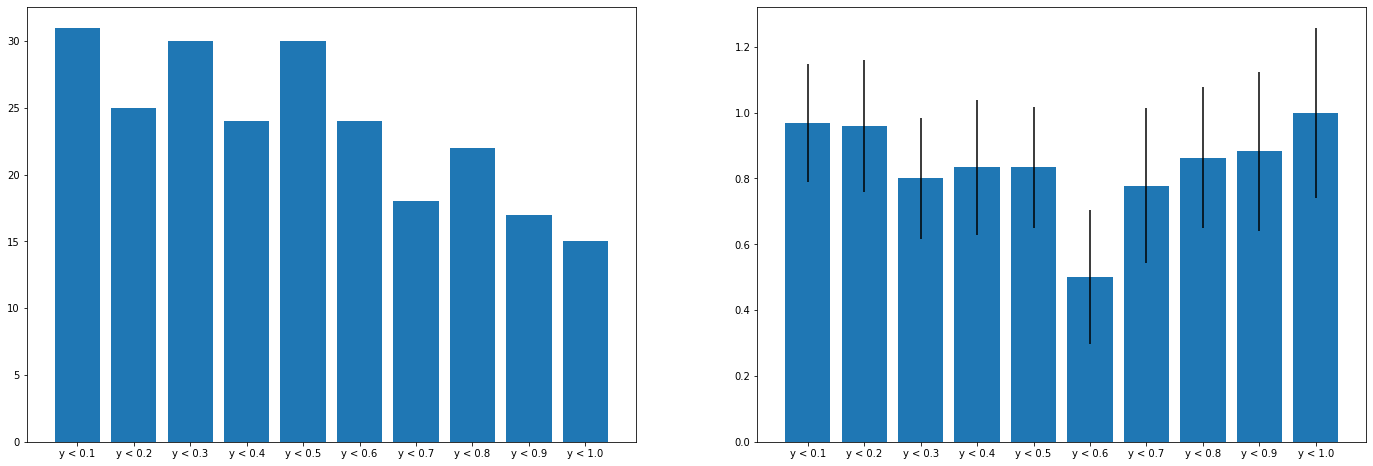

In [ ]:
this = (models @ [0.880, 0.228, 0.023])
fig1 = plt.figure(figsize=(24,8))
ax1 = fig1.add_subplot(121)
plt.bar(["y < " + np.str(round(i+0.1,1)) for i in np.arange(0,1.0,0.1)],[this[(this > i) & (this < i + 0.1)].count() for i in np.arange(0,1.0,0.1)])
ax2 = fig1.add_subplot(122)
plt.bar(["y < " + np.str(round(i+0.1,1)) for i in np.arange(0,1.0,0.1)],temp,yerr = [1/np.sqrt(this[(this > i) & (this < i + 0.1)].count()) for i in np.arange(0,1.0,0.1)])
plt.show()

Except for patients between 0.5 and 0.6, we have about 80% or higher confidence in our answer. There are 24 people in that group that we are unsure about.

It makes it look like 0.55 may be better than 0.5 but I feel like it's cheating to change it after looking at the y data.

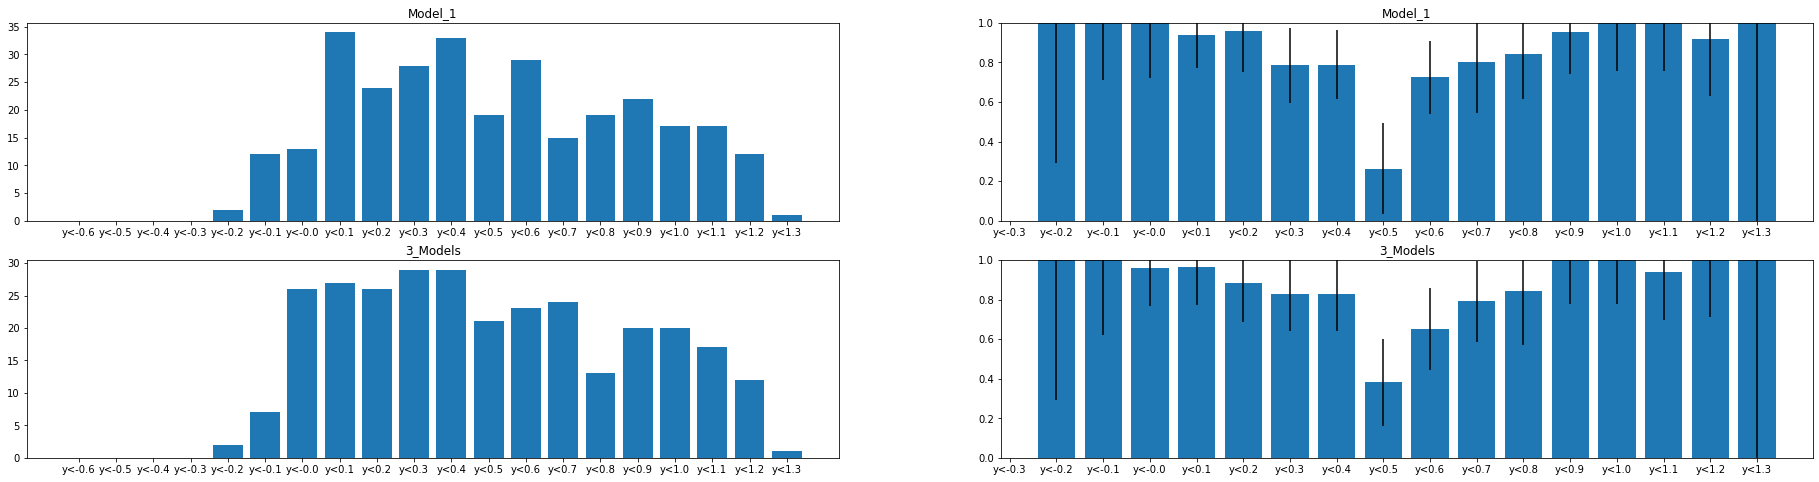

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model1 = X_encoded[features1] @ scores1 + average1 * np.ones_like(y)
y_low, y_high, y_step = -0.7,1.3,0.1
temp = [np.average(y[(model1 > i) & (model1 < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
for i in range(len(np.arange(y_low,y_high,y_step))):
  if y_low + (i+1)*y_step <= 0.5:
    temp[i] = 1-temp[i]
fig1 = plt.figure(figsize=(32,8))
ax1 = fig1.add_subplot(221)
plt.bar(["y<" + np.str(round(i+y_step,1)) for i in np.arange(y_low,y_high,y_step)],[model1[(model1 > i) & (model1 < i + y_step)].count() for i in np.arange(y_low,y_high,y_step)])
plt.title('Model_1')
ax2 = fig1.add_subplot(222)
plt.bar(["y<" + np.str(round(i+y_step,1)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(model1[(model1 > i) & (model1 < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)])
plt.ylim([0,1])
plt.title('Model_1')

three_models = (models @ [0.880, 0.228, 0.023]) - 0.061 * np.ones_like(y)
temp = [np.average(y[(three_models > i) & (three_models < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
for i in range(len(np.arange(y_low,y_high,y_step))):
  if y_low + (i+1)*y_step <= 0.5:
    temp[i] = 1-temp[i]
ax3 = fig1.add_subplot(223)
plt.bar(["y<" + np.str(round(i+y_step,1)) for i in np.arange(y_low,y_high,y_step)],[three_models[(three_models > i) & (three_models < i + y_step)].count() for i in np.arange(y_low,y_high,y_step)])
plt.title('3_Models')
ax4 = fig1.add_subplot(224)
plt.bar(["y<" + np.str(round(i+y_step,1)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(three_models[(three_models > i) & (three_models < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)])
plt.ylim([0,1])
plt.title('3_Models')
plt.show()
warnings.resetwarnings()

The two look almost the same. 3_models doesn't go as low.

0.8488024691358026
0.02022065278995804
0.8519097491074116
0.0009138971864649944
###McFadden###
0.2581408726862506
0.01169229129468175
0.2548623620160352
0.0004210529147395273


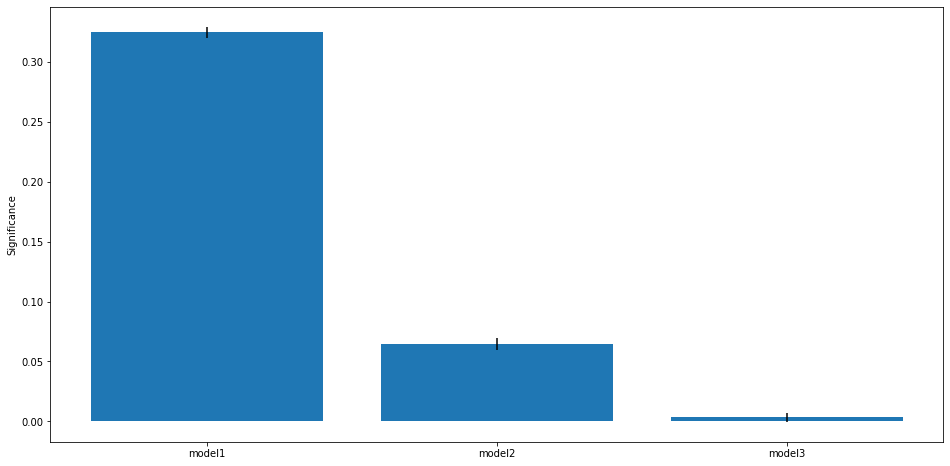

0.862320987654321
0.019506925010062896
0.8668175060222827
0.0009443311707186253
###McFadden###
0.25833018855852935
0.0116881015216199
0.2548602693785091
0.0004231093981920782


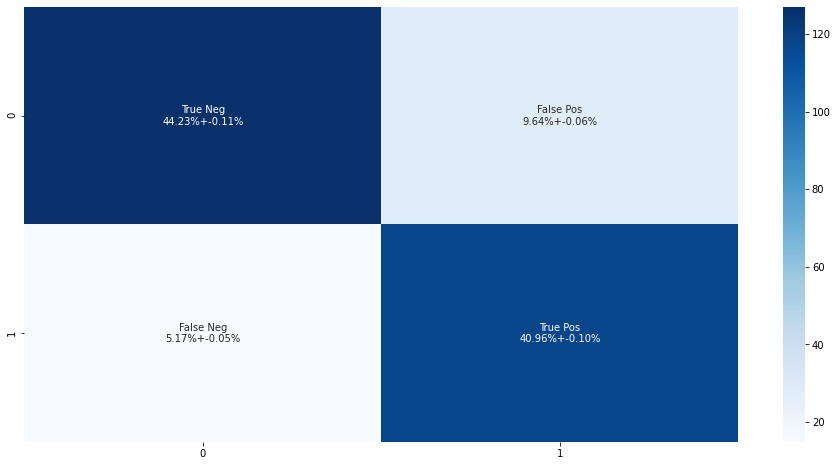

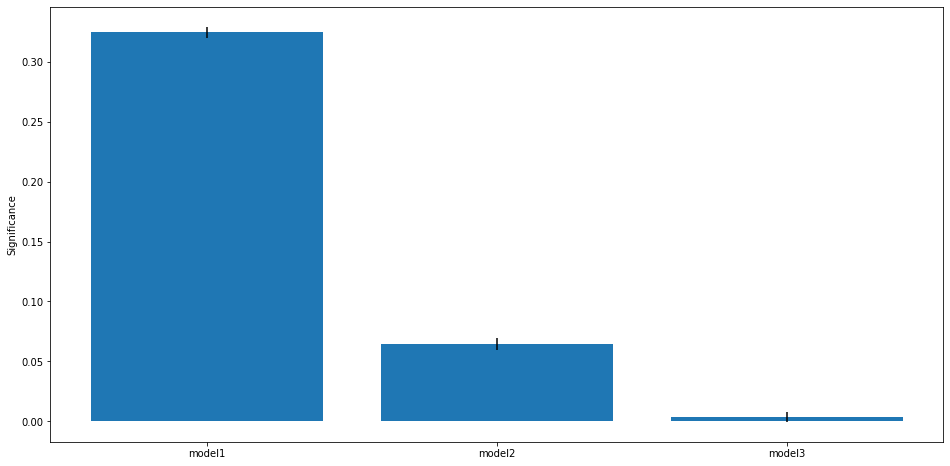

0.8661358024691358
0.019973247279484727
0.8703702225018282
0.0008869359562560877
###McFadden###
0.2583088554841544
0.011998653540352847
0.2548616198811661
0.00043636864599727376


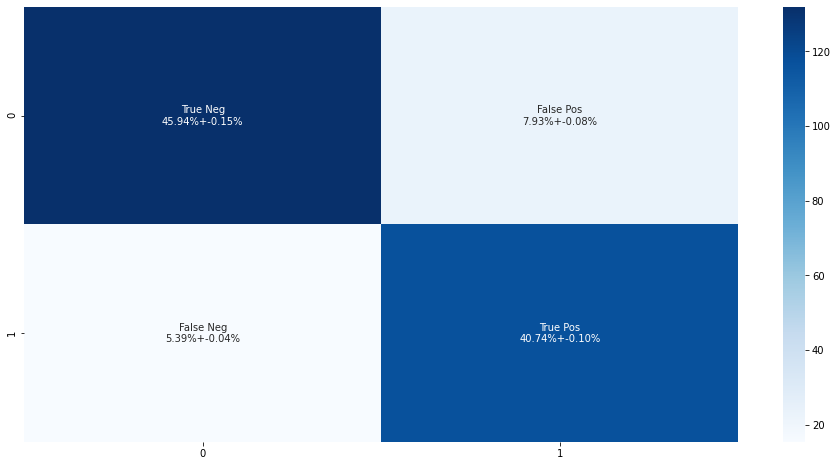

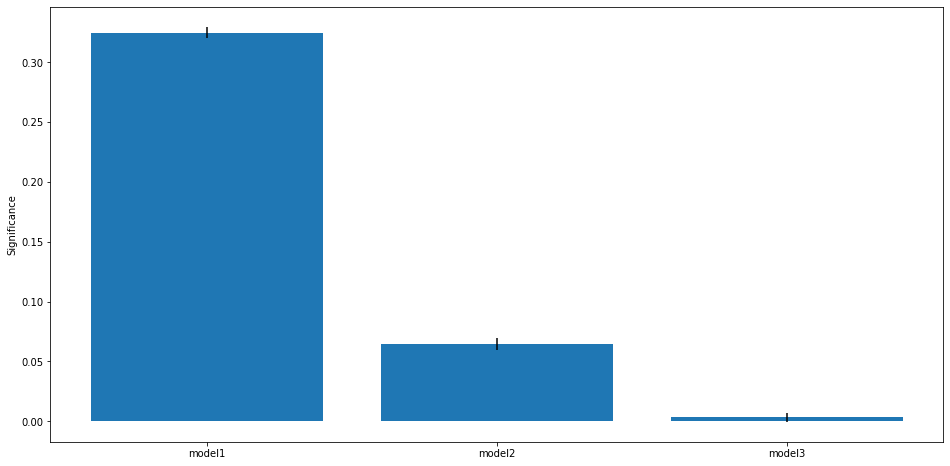

0.8623950617283952
0.019596314608590504
0.8687797619047619
0.0008100816422098683
###McFadden###
0.25819230140011024
0.012227581590742337
0.25486267957341435
0.00044245019415587865


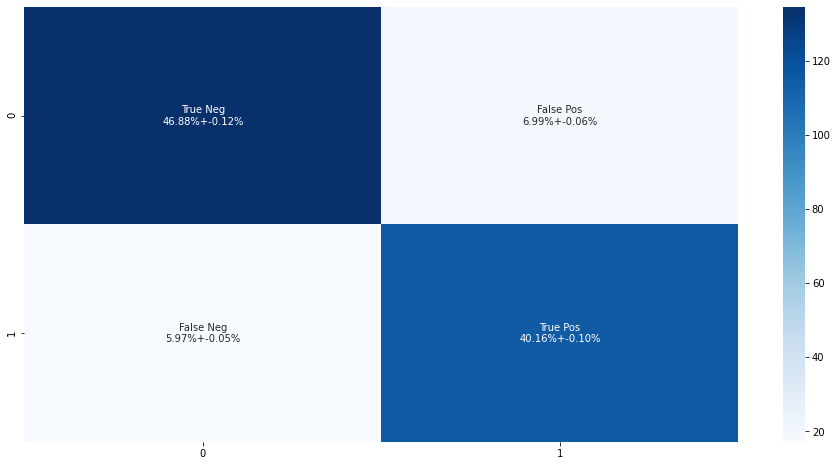

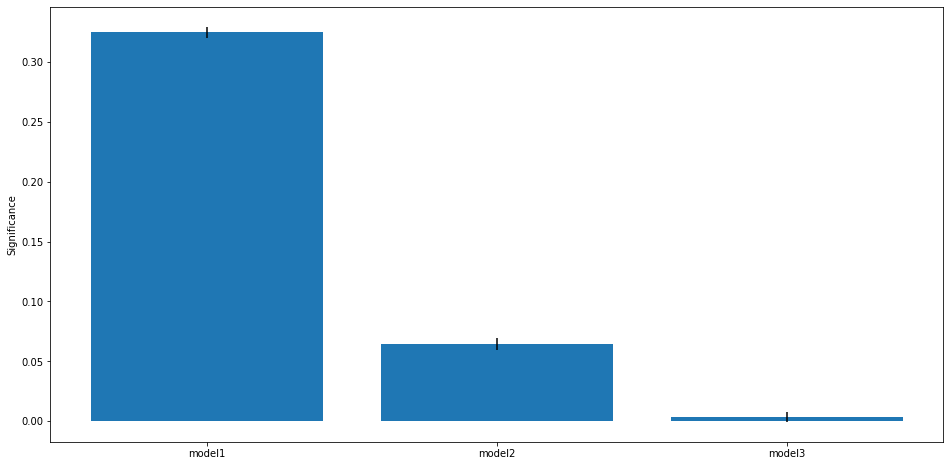

([0.8798483607342561, 0.22823039845410031, 0.023211457782925195],
 -0.060567435954219415)

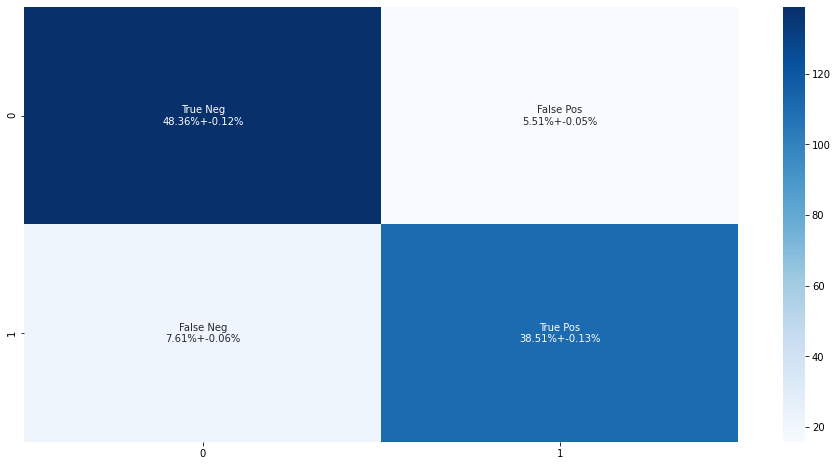

In [ ]:
loading_scores(models,y,edge=0.41)
loading_scores(models,y,edge=0.43)
loading_scores(models,y,edge=0.45)
loading_scores(models,y,edge=0.5)

Looks like we can easily give up 0.05 in edge, so edge = 0.45. Actually, 0.43 is best. Let's look at models and model_1 with edge = 0.43 and edge = 0.5.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


0.8601234567901236
0.019403549297098675
0.8735979239256678
0.000804509629625322
###McFadden###
0.2673476746398087
0.012411944810644062
0.25948300242401595
0.0004630126506057488


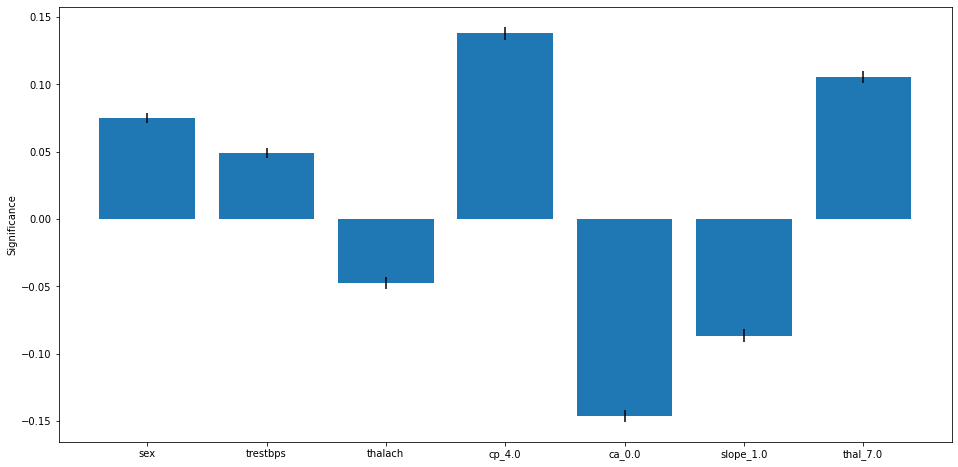

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


0.8608518518518519
0.019000694213746283
0.8687329682324603
0.0008423025305938191
###McFadden###
0.2583576350779265
0.01204325526489984
0.2548642790206398
0.00043564098512214645


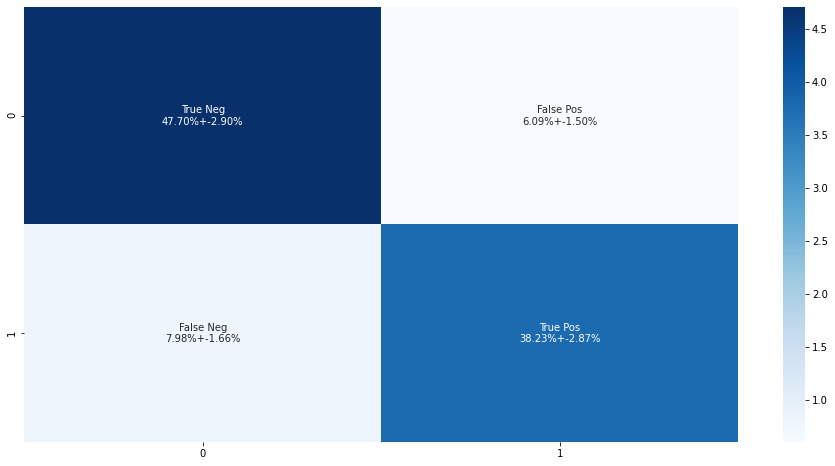

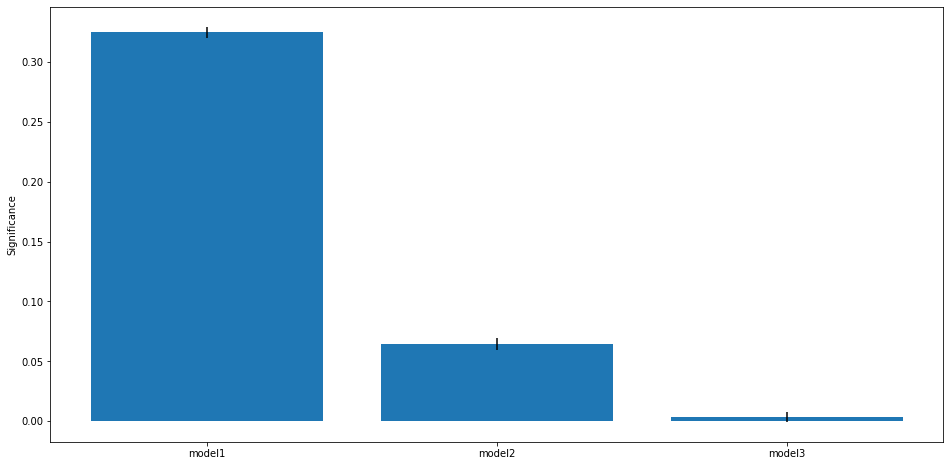

([0.8798525002869841, 0.22823238861890122, 0.023184733648632376],
 -0.060551724730665064)

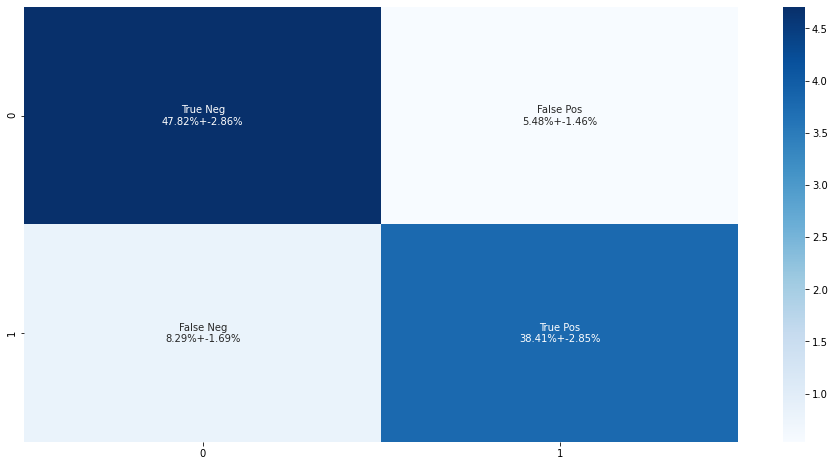

In [ ]:
loading_scores(X_encoded[features1],y,edge=0.5)
loading_scores(models,y,edge=0.5)

0.8464444444444444
0.02088258206298625
0.8544023825654924
0.0008880177901066002
###McFadden###
0.2673277626553778
0.012506572674984938
0.2594882650567743
0.0004705804528039005


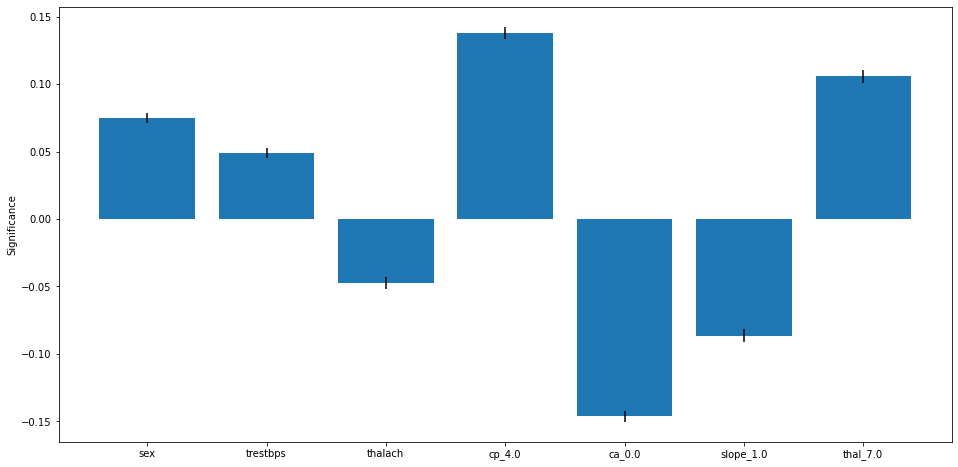

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


0.861716049382716
0.01996553127751351
0.8668290397685724
0.0009415136425009466
###McFadden###
0.25843458494824456
0.012255952383141528
0.2548616009286602
0.00044215453815151456


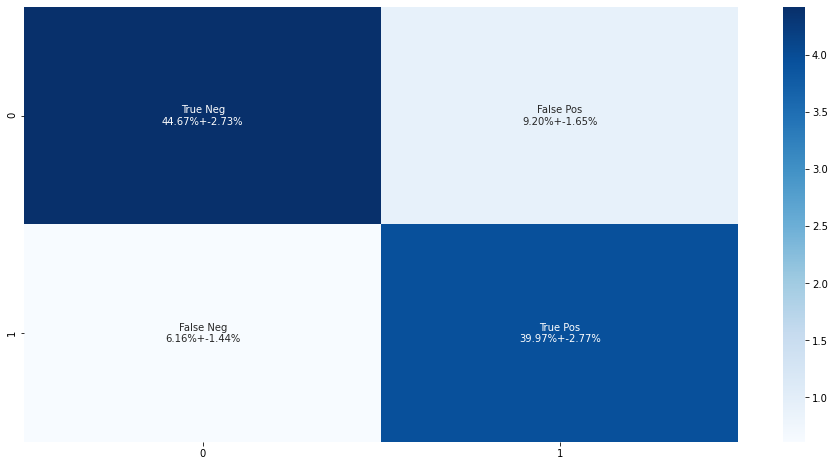

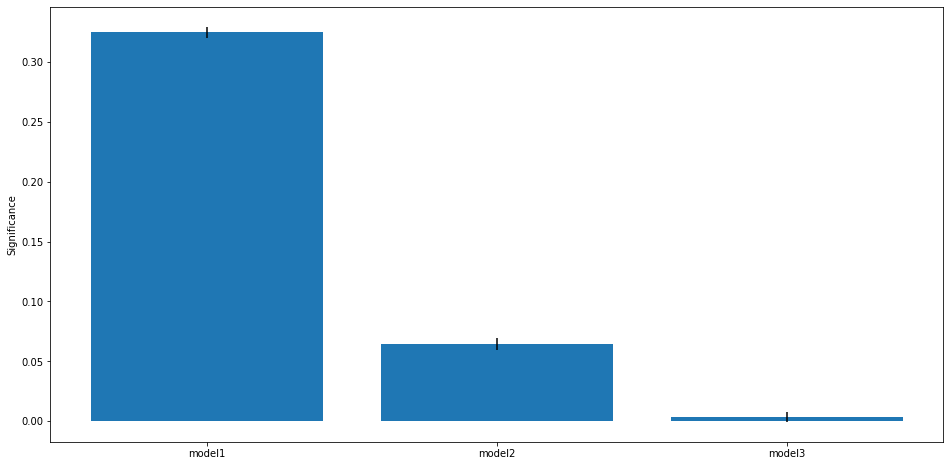

([0.8798679378537835, 0.22823473542156428, 0.023146743785646053],
 -0.0605453549127175)

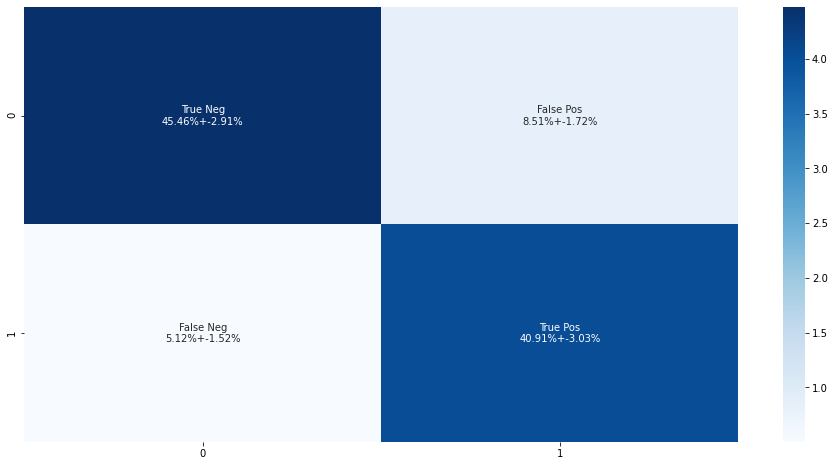

In [ ]:
loading_scores(X_encoded[features1],y,edge=0.43)
loading_scores(models,y,edge=0.43)

Nice! As I said, this model is a lot better. I was very surprised that the model_1 did not have that many false negatives!!! However, it was true that I can only change the edge in the 3_model but not in model_1. In model_1, I had to pay a lot to change it and got more false negatives and false positives.

I can even change it further to edge = 0.41.

0.8380617283950617
0.021535310936279875
0.8483726529229579
0.0009674035676549721
###McFadden###
0.2673705114579815
0.012622447829750224
0.259485472293499
0.00047351688683373806


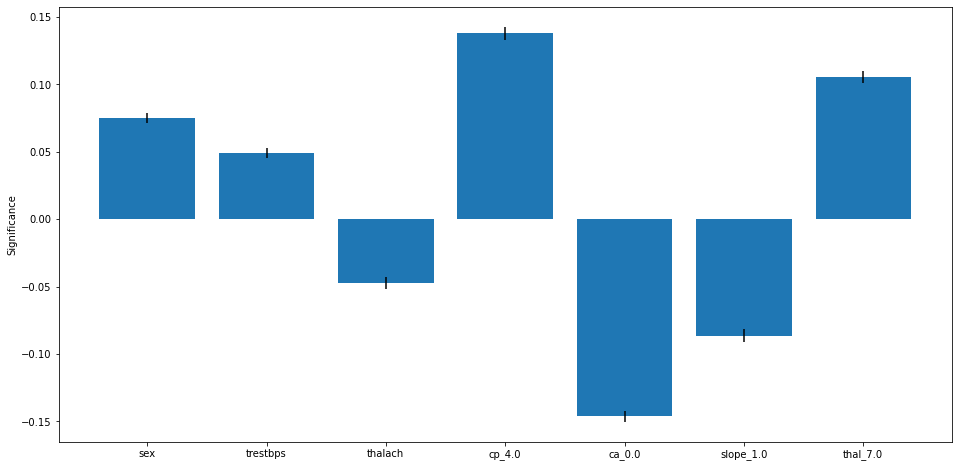

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


0.8490493827160496
0.020913597378510902
0.8519721227470212
0.000944255822370633
###McFadden###
0.2582476535580089
0.0126997079087444
0.25485765273764477
0.0004588465639069176


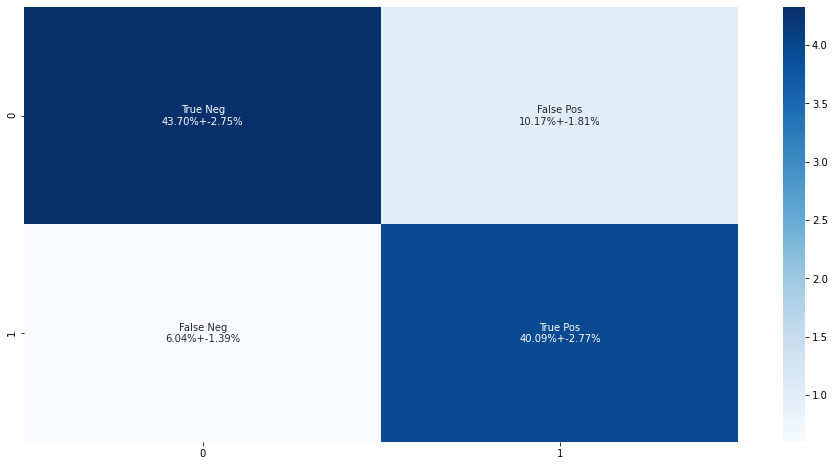

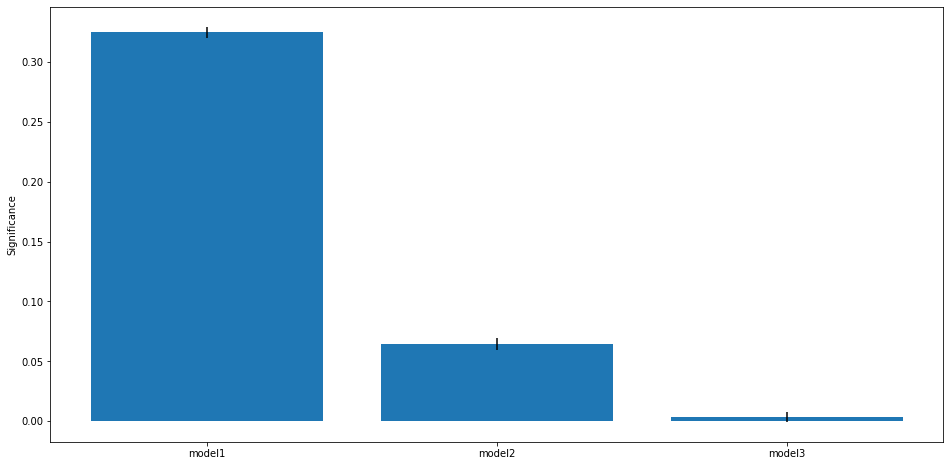

([0.8798329643874959, 0.2282712649409778, 0.023139007943079753],
 -0.06054152006366598)

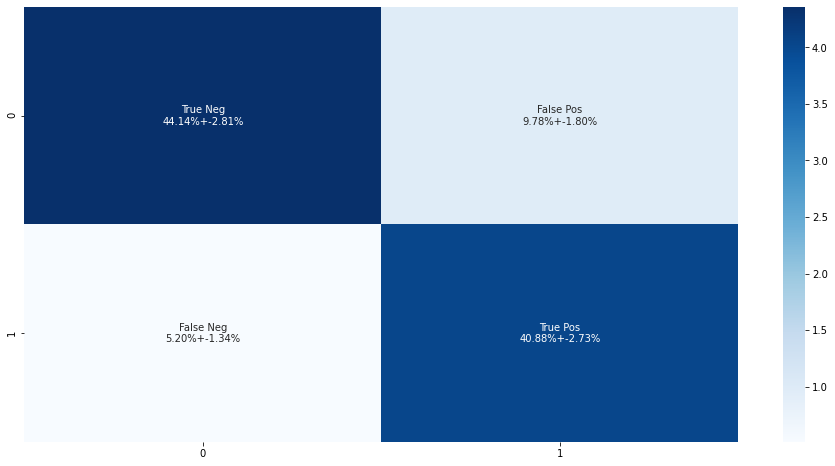

In [ ]:
loading_scores(X_encoded[features1],y,edge=0.41)
loading_scores(models,y,edge=0.41)

Actually, there is no reason to. edge = 0.43 is better.

0.8616296296296296
0.020014322918278465
0.868617146836151
0.0008858024181362217
###McFadden###
0.25843093498954633
0.01208912003291222
0.2548576880525931
0.00043807538890362177


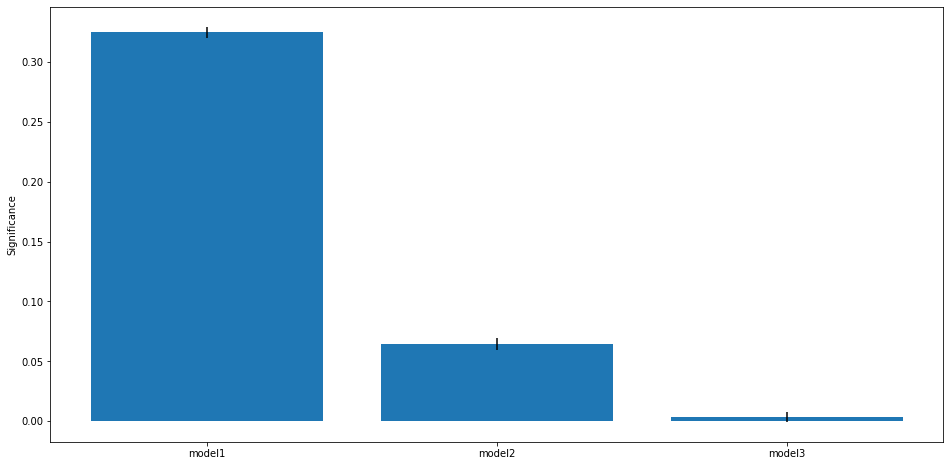

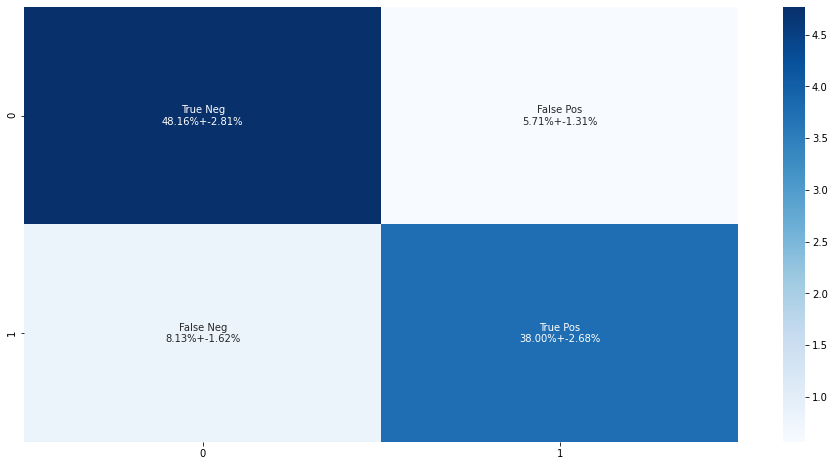

In [ ]:
scores_t,average_t = loading_scores(models,y)

0.868641975308642
0.01955552580303068
0.8686868198047062
0.0006738227521779205
###McFadden###
0.2549727798643806
0.012051051511964032
0.2548998731801723
0.00041581865971645034
###Delta_accuracy and Delta_McFadden###
Delta = Original model minus b_compare model
-0.006814814814814814
0.009350268801168626
-0.0046150132846659135
0.0026349775450777136


([1], 0)

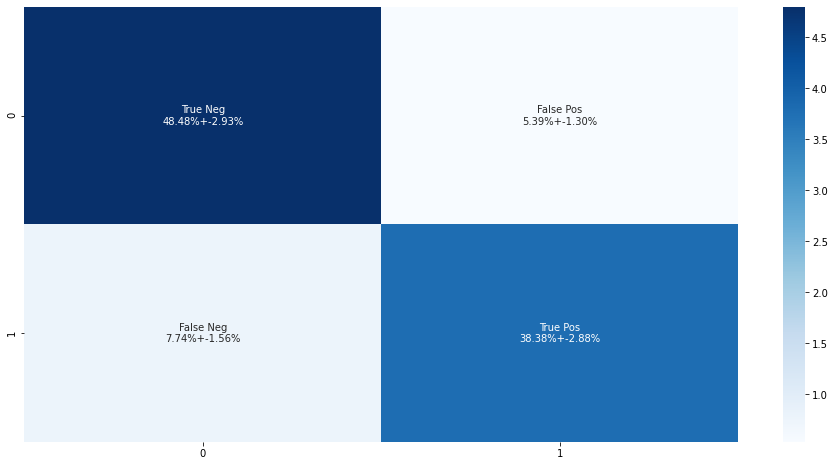

In [ ]:
loading_scores(models@scores_t+ average_t*np.ones_like(y),y,b_compare = X_encoded[features1] @ scores1 + average1*np.ones_like(y),pad=False)

We have 2 sigma of improvement on the McFadden but the size is very small: 0.0046 on 0.25 is only

In [ ]:
0.0046/0.25

0.0184

In [ ]:
0.0026/0.25

0.0104

So we improved our model McFadden by 1.84% +- 1.0%. Our accuracy changed by -0.68% +- 0.93%.

In [ ]:
%%capture output
features1 = ['sex','trestbps','thalach','cp_4.0', 'ca_0.0', 'slope_1.0','thal_7.0']
features2 = ['oldpeak','exang','slope_3.0','restecg_0.0','thal_6.0','ca_3.0','cp_2.0']
features3 = ['restecg_2.0','restecg_1.0','cp_1.0','age','fbs']
scores1,average1,_,_ = loading_scores(X_encoded[features1],y)
scores2,average2,_,_ = loading_scores(X_encoded[features2],y)
scores3,average3,_,_ = loading_scores(X_encoded[features3],y)
model1 = X_encoded[features1] @ scores1 + average1 * np.ones_like(y)
models_df = pd.DataFrame({'model1': X_encoded[features1] @ scores1 + average1*np.ones_like(y),'model2': X_encoded[features2] @ scores2 + average2*np.ones_like(y),'model3': X_encoded[features3] @ scores3 + average3*np.ones_like(y)})
scores_t,average_t,_,_ = loading_scores(models_df,y)
models = models_df @ scores_t + average_t * np.ones_like(y)


In [ ]:
%%capture output
t_accuracy = []
t_accuracy_err = []
one_accuracy = []
one_accuracy_err = []
for i in np.arange(0.4,0.61,0.01):
  _,_,accuracy_t,accuracy_err_t = loading_scores(models,y,pad=False,edge=i)
  t_accuracy.append(accuracy_t)
  t_accuracy_err.append(accuracy_err_t)
  _,_,accuracy_one,accuracy_err_one = loading_scores(model1,y,pad=False,edge=i)
  one_accuracy.append(accuracy_one)
  one_accuracy_err.append(accuracy_err_one)

ValueError: ignored

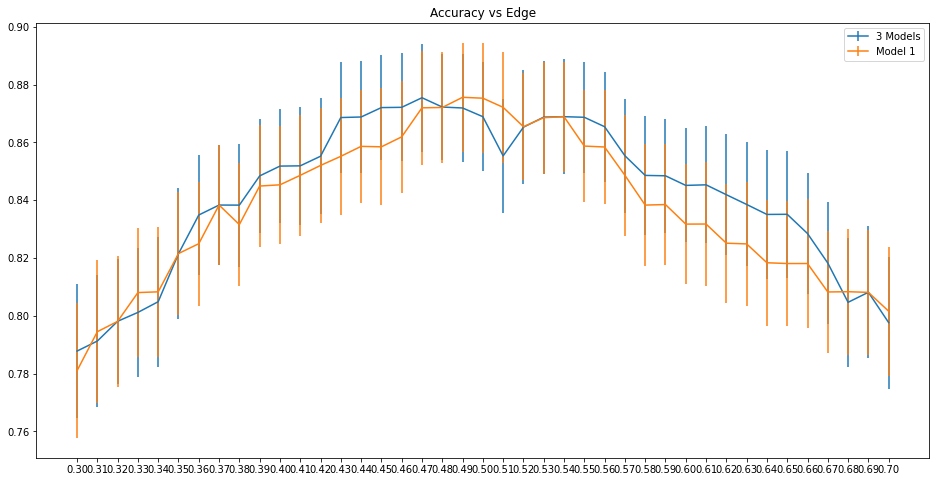

In [ ]:
fig = plt.figure()
x_range = [str('{0:.2f}'.format(i)) for i in np.arange(0.3,0.71,0.01)]
plt.errorbar(x_range,t_accuracy,yerr=t_accuracy_err,label='3 Models')
plt.errorbar(x_range,one_accuracy,yerr=one_accuracy_err, label='Model 1')
plt.title("Accuracy vs Edge") 
plt.legend()
plt.show()
plt.close()

It is possible but not sure if the 3-models is always above the model 1 for accuracy. There looks to be a region from 0.35 to 0.68 where the blue line is higher than the yellow in the wings. Let's look at the McFadden result.

In [ ]:
%%capture output
t_mcfadden = []
t_mcfadden_err = []
one_mcfadden = []
one_mcfadden_err = []
for i in np.arange(0.3,0.71,0.01):
  _,_,mcfadden_t,mcfadden_err_t = loading_scores(models,y,pad=False,edge=i,show=False)
  t_mcfadden.append(mcfadden_t)
  t_mcfadden_err.append(mcfadden_err_t)
  _,_,mcfadden_one,mcfadden_err_one = loading_scores(model1,y,pad=False,edge=i,show=False)
  one_mcfadden.append(mcfadden_one)
  one_mcfadden_err.append(mcfadden_err_one)

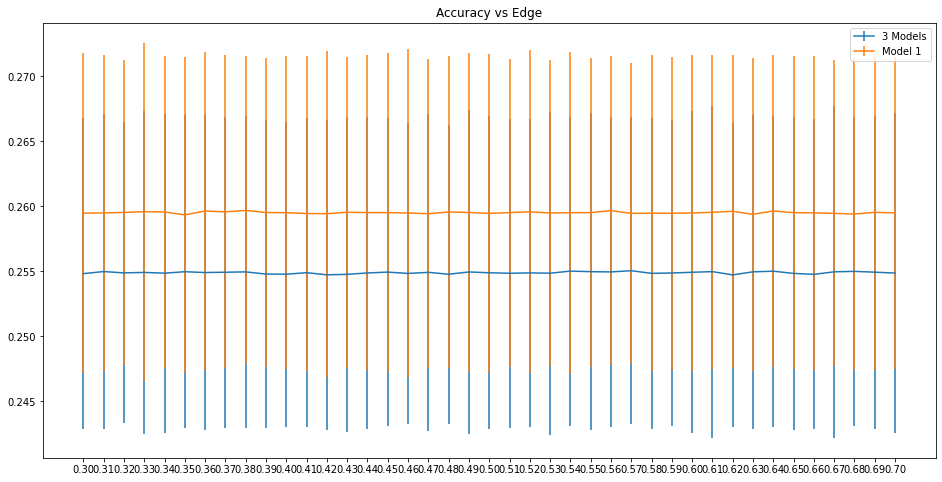

In [ ]:
fig = plt.figure()
x_range = [str('{0:.2f}'.format(i)) for i in np.arange(0.3,0.71,0.01)]
plt.errorbar(x_range,t_mcfadden,yerr=t_mcfadden_err,label='3 Models')
plt.errorbar(x_range,one_mcfadden,yerr=one_mcfadden_err, label='Model 1')
plt.title("Accuracy vs Edge") 
plt.legend()
plt.show()
plt.close()

The McFadden doesn't change of course because the edge doesn't have an effect on it.

Let's look at the delta_accuracy.

In [ ]:
delta_accuracy

0.016876543209876544

In [ ]:
%%capture output
accuracy_delta = []
accuracy_delta_err = []
for i in np.arange(0.0,1.001,0.01):
  _,_,delta_accuracy,delta_accuracy_err = loading_scores(models,y,pad=False,edge=i,b_compare=model1,show=False)
  accuracy_delta.append(delta_accuracy)
  accuracy_delta_err.append(delta_accuracy_err)

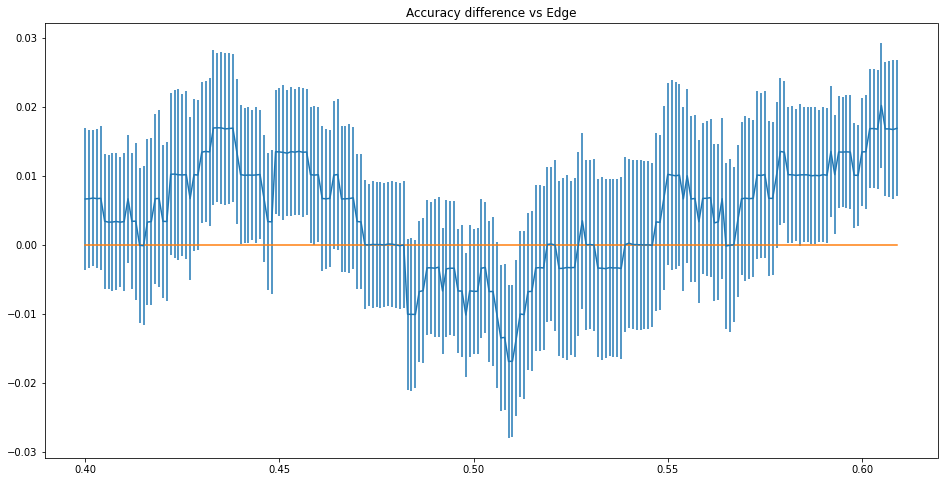

In [ ]:
fig = plt.figure()
x_range = [i for i in np.arange(0.4,0.61,0.001)]
plt.errorbar(x_range,accuracy_delta,yerr=accuracy_delta_err)
plt.title("Accuracy difference vs Edge") 
plt.plot(x_range,0*np.ones_like(x_range))
plt.show()
plt.close()

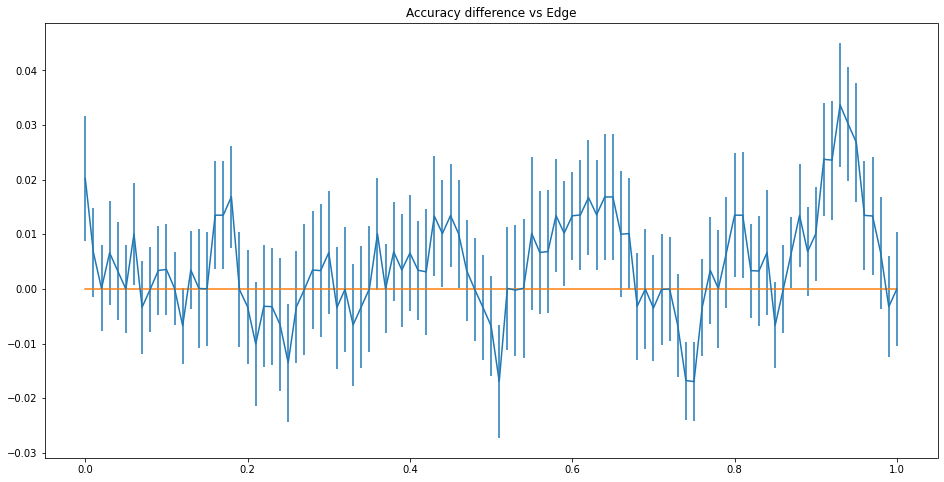

In [ ]:
fig = plt.figure()
x_range = [i for i in np.arange(0.0,1.01,0.01)]
plt.errorbar(x_range,accuracy_delta,yerr=accuracy_delta_err)
plt.title("Accuracy difference vs Edge") 
plt.plot(x_range,0*np.ones_like(x_range))
plt.show()
plt.close()

Here we can see how the 1% McFadden is distributed. A large part of it is between 0.4 and 0.7 which means it moves people that were close to 0.5 further to the right answer. It moves a few people that were very close to 0.5 in the wrong direction. It also moves some people that we knew for sure had y=1 because they had between 0.9 and 1.0 of y-predicted closer to the right answer.

Lastly we wanted to know how much improving our model by 1% improves the confidence of our answer. It depends a lot of where that 1% is added. If it is added to 50%, it makes a big difference. If it is added to 90%, it makes no difference. On average, how much difference does it make?

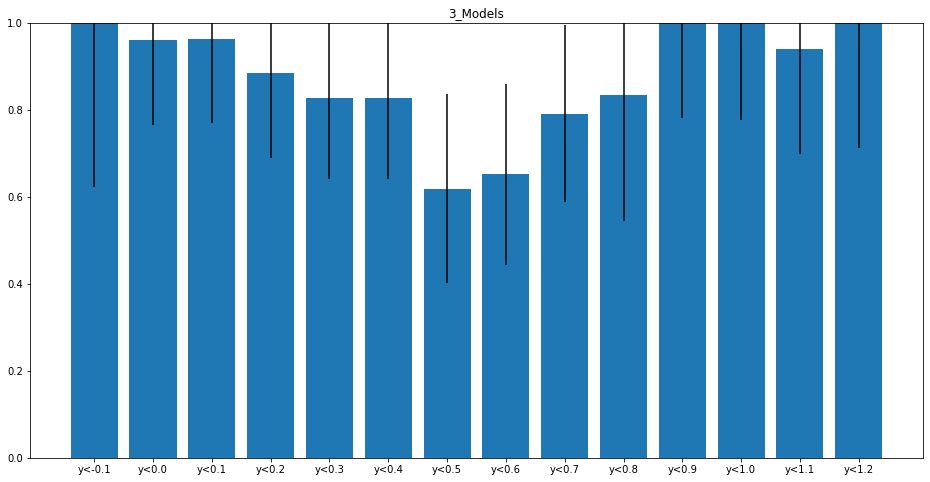

In [ ]:
import warnings
warnings.filterwarnings('ignore')
y_low, y_high, y_step = -0.2,1.2,0.1

three_models = models
temp = [np.average(y[(three_models > i) & (three_models < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
for i in range(len(np.arange(y_low,y_high,y_step))):
  if y_low + (i+1)*y_step <= 0.5:
    temp[i] = 1-temp[i]
plt.figure()
plt.bar(["y<" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(three_models[(three_models > i) & (three_models < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)])
plt.ylim([0,1])
plt.title('3_Models')
plt.show()
warnings.resetwarnings()

I'm going to do kind of a discrete derivative.

In [ ]:
len(discrete_derivative_)

13

<BarContainer object of 11 artists>

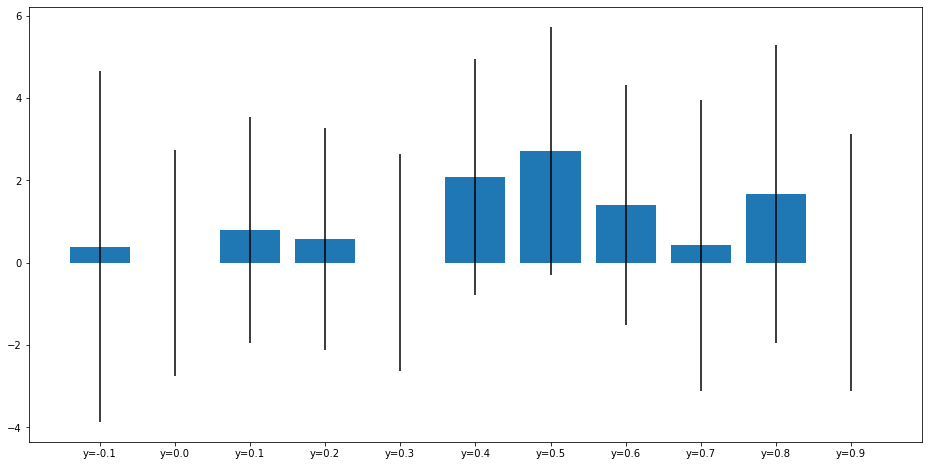

In [ ]:
y_low, y_high, y_step = -0.2,1.0,0.1
temp = [np.average(y[(three_models > i) & (three_models < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
discrete_derivative = [(temp[i+1]-temp[i])/0.1 for i in range(len(temp)-1)]
temp2 = [1/np.sqrt(three_models[(three_models > i) & (three_models < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)]
derivative_err = [np.sqrt(temp2[i+1]**2+temp2[i]**2)/0.1 for i in range(len(temp2)-1)]
plt.figure()
plt.bar(["y=" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high-y_step,y_step)],discrete_derivative,yerr=derivative_err)

This is how much better it will be for that value of y_predicted.

In [ ]:
x_x = [i+y_step for i in np.arange(y_low,y_high-y_step,y_step)]
out = 0
g = 0
for i,j in zip(accuracy_delta,x_range):
  for k in range(len(np.arange(y_low,y_high-y_step,y_step))):
    if np.abs(j-x_x[k]) <= y_step/2:
      out+= discrete_derivative[k]*i*0.01
      g+=1
'{0:0.2%}'.format(out)

'0.35%'

So even though we made our model 1% better, we only improved our confidence in it by 0.35%. The biggest problem was the unlucky drop at 0.5. Also, beyond 0.8 it doesn't change anything.

A good thing was that our model's worst performance is only about 0.35 but model_1's worst performance was at 0.25 for 0.4 < y < 0.5. However, we didn't do as well for 0.5 < y < 0.6 which is what I said above.

One of the problems is that it thinks a change from 0.9 to 1.0 is as good as a change from 0.5 to 0.6. From 0.5 to 0.6 gives us about 30% more confidence but going from 0.9 to 1.0 doesn't give us any more confidence.

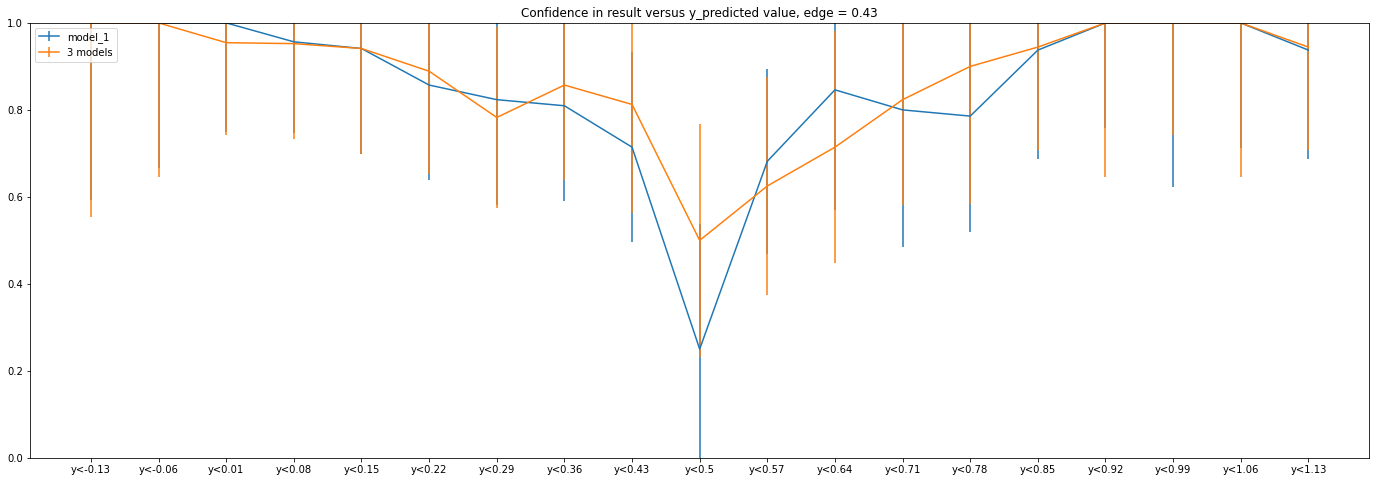

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model1 = X_encoded[features1] @ scores1 + average1 * np.ones_like(y)
y_low, y_high, y_step ,edge= -0.2,1.1,0.07,0.43
temp = [np.average(y[(model1 > i) & (model1 < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
for i in range(len(np.arange(y_low,y_high,y_step))):
  if round(y_low + (i+1/2)*y_step,1) <= edge:
    temp[i] = 1-temp[i]
fig1 = plt.figure(figsize=(24,8))

plt.errorbar(["y<" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(model1[(model1 > i) & (model1 < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='model_1')
plt.ylim([0,1])
plt.title('Model_1')

three_models = models
temp = [np.average(y[(three_models > i) & (three_models < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
for i in range(len(np.arange(y_low,y_high,y_step))):
  if round(y_low + (i+1/2)*y_step,1) <= edge:
    temp[i] = 1-temp[i]
plt.errorbar(["y<" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(three_models[(three_models > i) & (three_models < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='3 models')
plt.ylim([0,1])
plt.title(f'Confidence in result versus y_predicted value, edge = {edge}')
plt.legend()
plt.show()
warnings.resetwarnings()

With edge = 0.43, we get a good result here. Let's look at the results for a few different edge values.

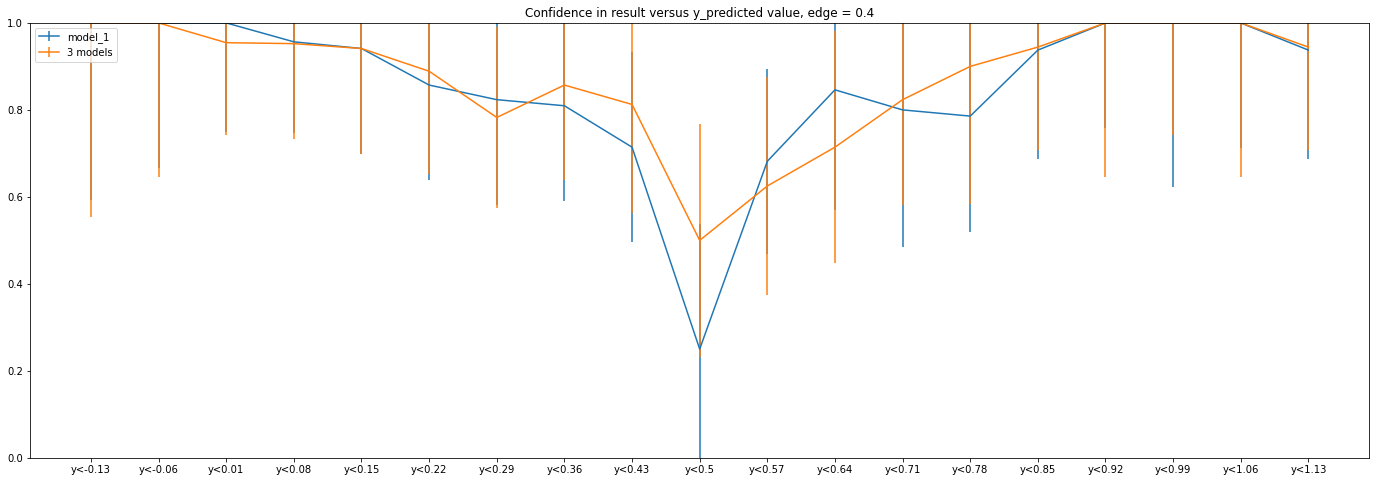

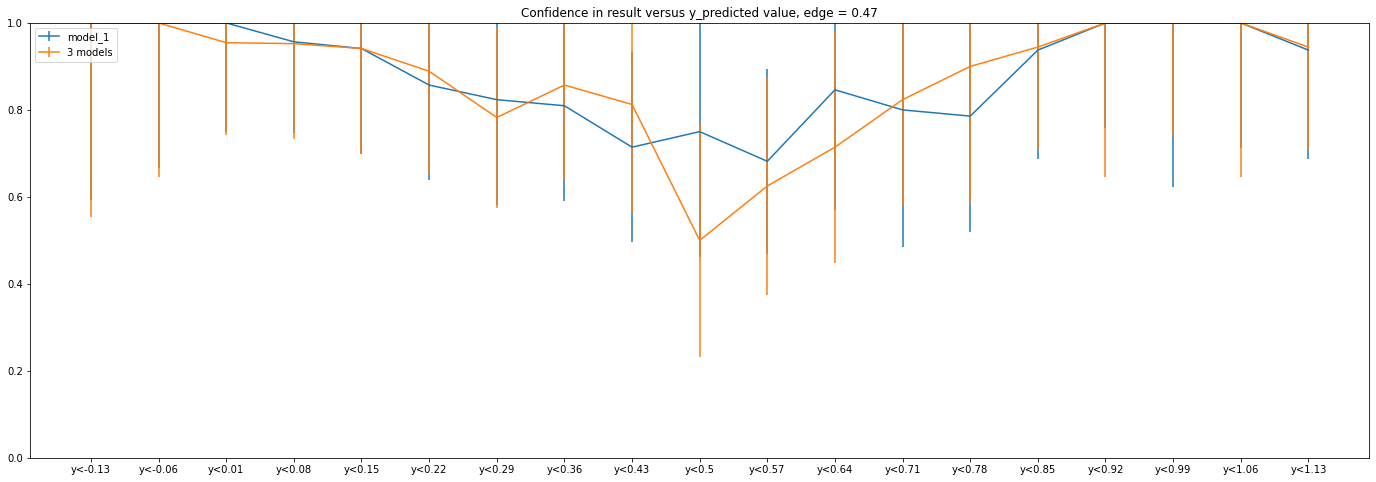

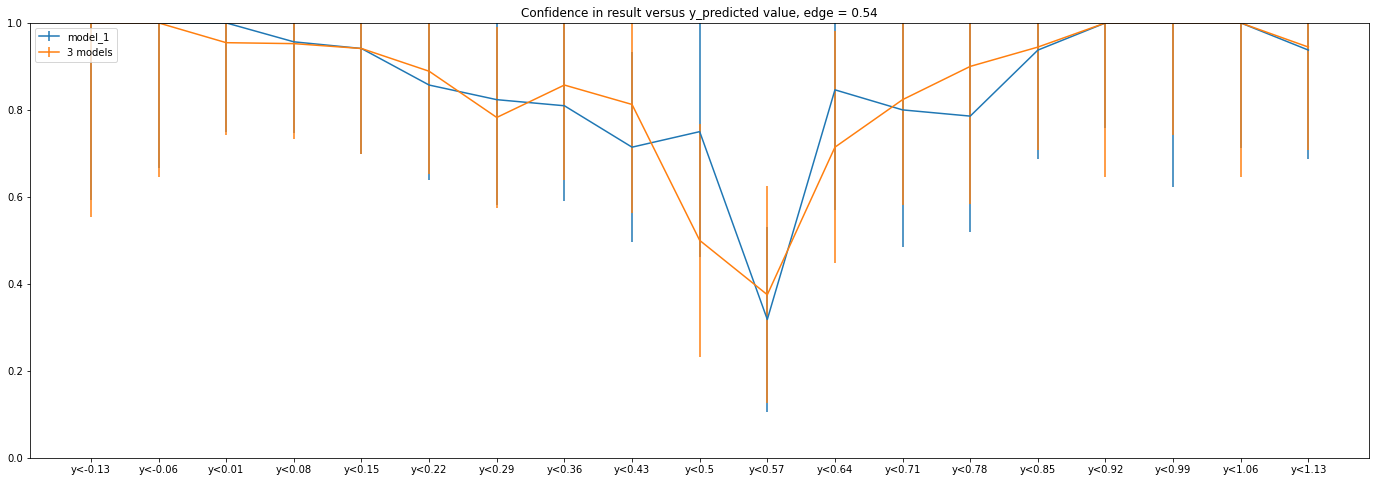

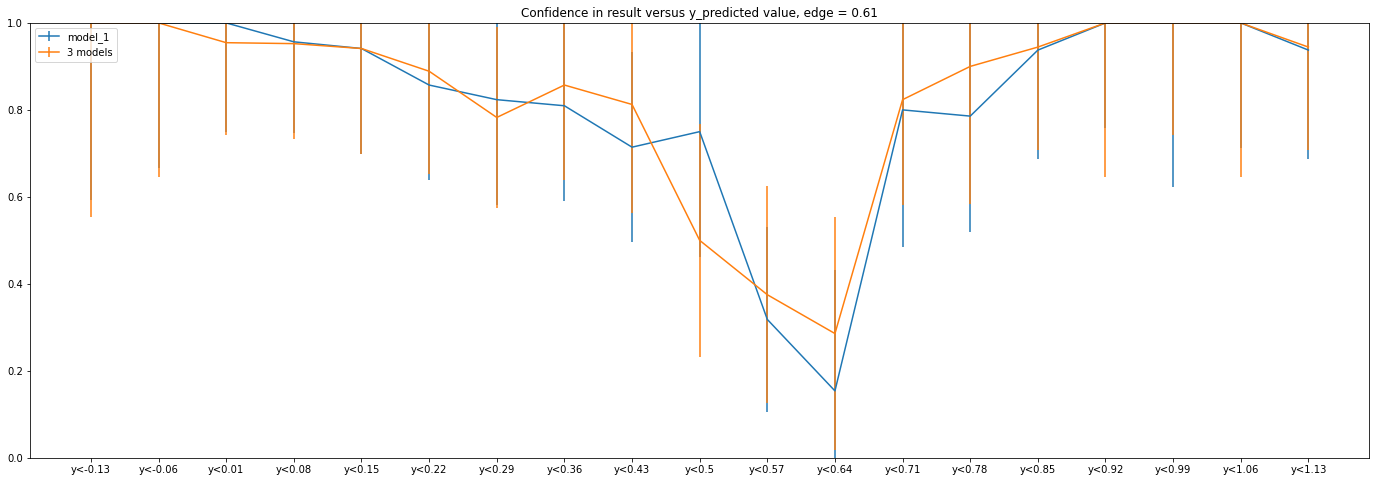

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model1 = X_encoded[features1] @ scores1 + average1 * np.ones_like(y)
for edge in np.round(np.arange(0.40,0.66,0.07),2):
  y_low, y_high, y_step= -0.2,1.1,0.07
  temp = [np.average(y[(model1 > i) & (model1 < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
  for i in range(len(np.arange(y_low,y_high,y_step))):
    if round(y_low + (i+1/2)*y_step,2) <= edge:
      temp[i] = 1-temp[i]
  fig1 = plt.figure(figsize=(24,8))

  plt.errorbar(["y<" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(model1[(model1 > i) & (model1 < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='model_1')
  plt.ylim([0,1])
  plt.title('Model_1')

  three_models = models
  temp = [np.average(y[(three_models > i) & (three_models < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
  for i in range(len(np.arange(y_low,y_high,y_step))):
    if round(y_low + (i+1/2)*y_step,2) <= edge:
      temp[i] = 1-temp[i]
  plt.errorbar(["y<" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(three_models[(three_models > i) & (three_models < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='3 models')
  plt.ylim([0,1])
  plt.title(f'Confidence in result versus y_predicted value, edge = {edge}')
  plt.legend()
  plt.show()
warnings.resetwarnings()

Model_1 with edge = 0.47 looks even better than 3_models with edge = 0.43. It really depends on what edge you need and even if the decision is not changed, having a 1% better model is better. You need to decide on the edge and then look here to see which model is better for you:

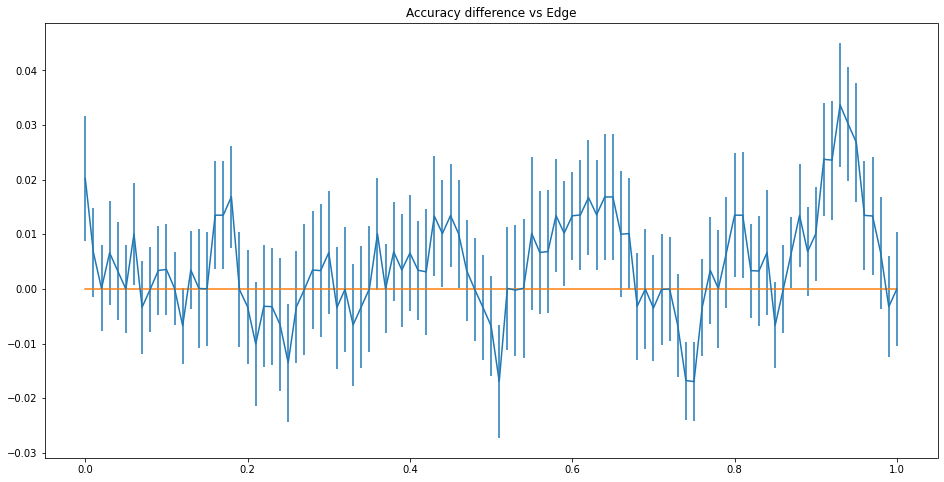

In [ ]:
fig = plt.figure()
x_range = [i for i in np.arange(0.0,1.01,0.01)]
plt.errorbar(x_range,accuracy_delta,yerr=accuracy_delta_err)
plt.title("Accuracy difference vs Edge") 
plt.plot(x_range,0*np.ones_like(x_range))
plt.show()
plt.close()

Let's do an example. Let's say you need edge = 0.40 because you want false negative < 5%.

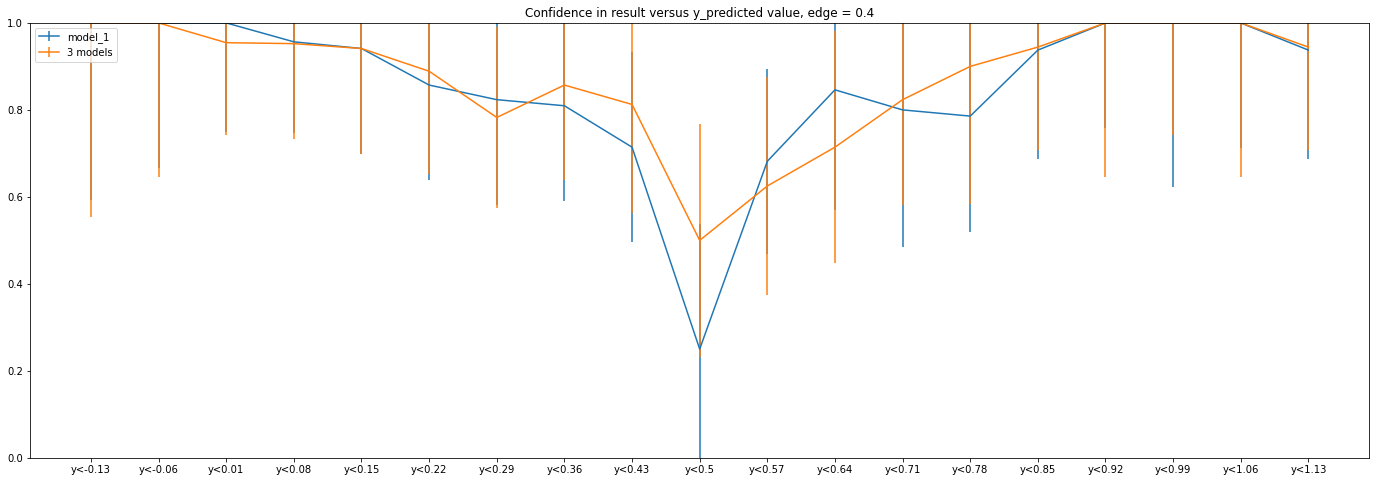

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model1 = X_encoded[features1] @ scores1 + average1 * np.ones_like(y)
y_low, y_high, y_step ,edge= -0.2,1.1,0.07,0.40
temp = [np.average(y[(model1 > i) & (model1 < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
for i in range(len(np.arange(y_low,y_high,y_step))):
  if round(y_low + (i+1/2)*y_step,1) <= edge:
    temp[i] = 1-temp[i]
fig1 = plt.figure(figsize=(24,8))

plt.errorbar(["y<" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(model1[(model1 > i) & (model1 < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='model_1')
plt.ylim([0,1])
plt.title('Model_1')

three_models = models
temp = [np.average(y[(three_models > i) & (three_models < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
for i in range(len(np.arange(y_low,y_high,y_step))):
  if round(y_low + (i+1/2)*y_step,1) <= edge:
    temp[i] = 1-temp[i]
plt.errorbar(["y<" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(three_models[(three_models > i) & (three_models < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='3 models')
plt.ylim([0,1])
plt.title(f'Confidence in result versus y_predicted value, edge = {edge}')
plt.legend()
plt.show()
warnings.resetwarnings()

I can see how much more confidence I have by using the three_model over model_1.

The most important result from today is the delta accuracy vs edge result. You can see clearly what values of y_predicted were improved and which were made worse.

Tomorrow we will do logistic regression as the last step.


In [ ]:
logistic_estimator()

In [ ]:
features1 = ['sex','trestbps','thalach','cp_4.0', 'ca_0.0', 'slope_1.0','thal_7.0']
result = cross_correlate(X_encoded[features1],y,estimator=logistic_estimator, pad=False)
test_mean = np.mean([i[0] for i in result])
test_err_mean = np.std([i[0] for i in result])/np.sqrt(10)
train_mean = np.mean([i[1] for i in result])
train_err_mean = np.std([i[1] for i in result])/np.sqrt(10)
average = np.mean([i[5] for i in result])
logistic_scores1 = result[0][2]
print(test_mean)
print(test_err_mean)


0.869080459770115
0.01578479428055962


In [ ]:
X_encoded[features1] @ logistic_scores1 + average*np.ones_like(y)

0     -1.906763
1      2.781676
2      2.869985
3     -3.008492
4     -4.704633
         ...   
297    0.401214
298   -0.867073
299    3.073104
300    3.370816
301   -1.880628
Length: 297, dtype: float64

It's like I thought. A logistic model won't do any better than a linear model. But if we put two logistic models one after another, we can get something special!

Logistic model uses max likelihood and linear model uses sum of squares so that's not necessarily true. We know from the Confidence vs y_predicted result that our data has a sigmoidal distribution so it should be better.

0.8632222222222223
0.01953041974895044
0.8737258033294619
0.0008039386862702846
###McFadden###
0.26720009511078324
0.01230294161427111
0.25948607730115303
0.0004571247405156478


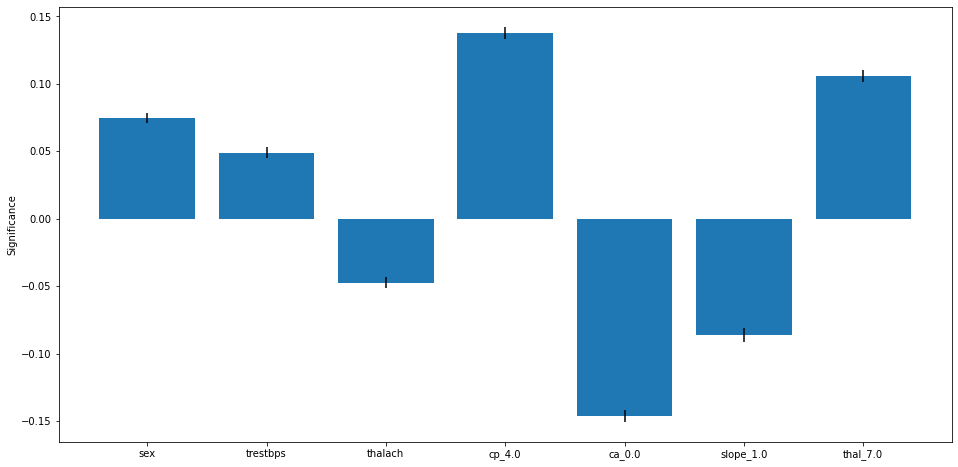

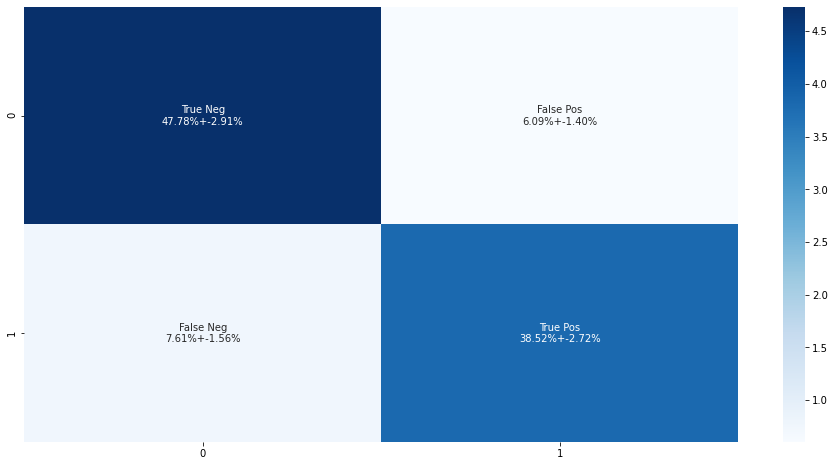

In [ ]:
scores1,average1= loading_scores(X_encoded[features1],y)

In [ ]:
features1 = ['sex','trestbps','thalach','cp_4.0', 'ca_0.0', 'slope_1.0','thal_7.0']
scaled_data = preprocessing.scale(X_encoded[features1])
scaled_data = pd.DataFrame(data=scaled_data, columns=features1, index = X_encoded.index)
means = []
errors = []
for i in range(30):
  result = cross_correlate(scaled_data,y,estimator=logistic_estimator, pad=False)
  test_mean = np.mean([i[0] for i in result])
  test_err_mean = np.std([i[0] for i in result])/np.sqrt(10)
  train_mean = np.mean([i[1] for i in result])
  train_err_mean = np.std([i[1] for i in result])/np.sqrt(10)
  means.append(test_mean)
  errors.append(test_err_mean)
print(result[0][2])
print(np.average(means))
print(np.average(errors))

sex          0.548568
trestbps     0.402458
thalach     -0.366814
cp_4.0       0.868572
ca_0.0      -1.030794
slope_1.0   -0.728717
thal_7.0     0.580911
dtype: float64
0.8638199233716475
0.01836775997528585


As we see, it uses all the columns. Also after doing it 30 times, we find that we get 0.862 +- 0.018. If we don't preprocess the data, we get 0.858 +- 0.020. It looks like preprocessing makes the answer about 0.3% better.
After doing the linear SVD, we get 0.859 +- 0.021 so it's the same. Looks like maximum likelihood doesn't give us a better answer (makes sense, it uses the same y to train). It will be easier to read confidence vs y_predicted.

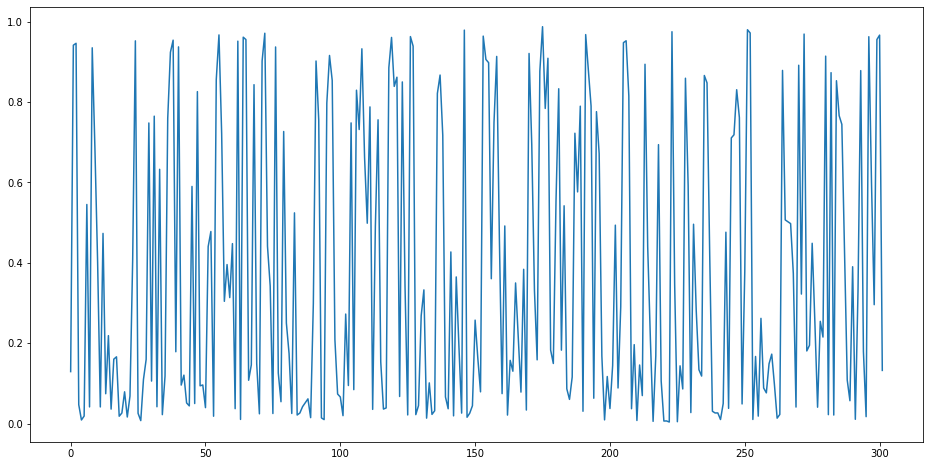

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
log_model1 = (X_encoded[features1] @ logistic_scores1 + average*np.ones_like(y)).apply(lambda row: sigmoid(row))
log_model1.plot()

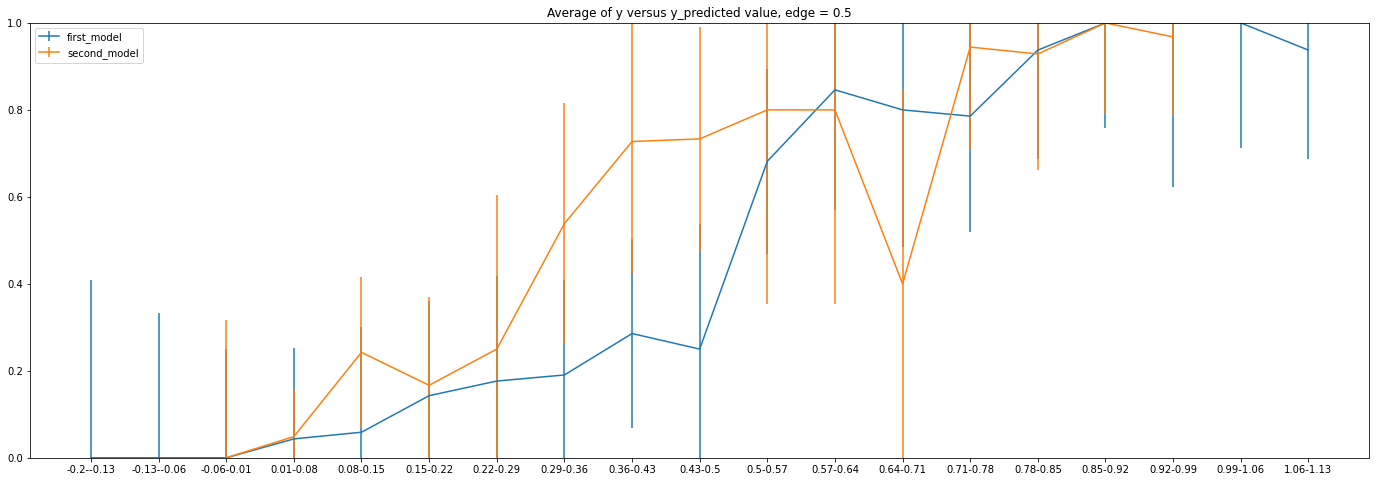

In [ ]:
import warnings
warnings.filterwarnings('ignore')
first_model = X_encoded[features1] @ scores1 + average1 * np.ones_like(y)
second_model = log_model1
y_low, y_high, y_step ,edge= -0.2,1.1,0.07,0.5
flip = False


temp = [np.average(y[(first_model > i) & (first_model < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
if flip:
  for i in range(len(np.arange(y_low,y_high,y_step))):
    if round(y_low + (i+1/2)*y_step,1) <= edge:
      temp[i] = 1-temp[i]
fig1 = plt.figure(figsize=(24,8))

plt.errorbar([np.str(round(i,2)) + "-" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(first_model[(first_model > i) & (first_model < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='first_model')
plt.ylim([0,1])

temp = [np.average(y[(second_model > i) & (second_model < i + y_step)]) for i in np.arange(y_low,y_high,y_step)]
if flip:
  for i in range(len(np.arange(y_low,y_high,y_step))):
    if round(y_low + (i+1/2)*y_step,1) <= edge:
      temp[i] = 1-temp[i]
plt.errorbar([np.str(round(i,2)) + "-" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,yerr = [1/np.sqrt(second_model[(second_model > i) & (second_model < i + y_step)].count()) for i in np.arange(y_low,y_high,y_step)],label='second_model')
plt.ylim([0,1])
if flip:
  plt.title(f'Confidence in result versus y_predicted value, edge = {edge}')
else:
  plt.title(f'Average of y versus y_predicted value, edge = {edge}')
plt.fill_between(x, y-error, y+error)
plt.legend()
plt.show()
warnings.resetwarnings()

I'm happy to call model_1 a sigmoid and log_model_1 a line. Also it's nice log_model_1 stops at 0 and 1.

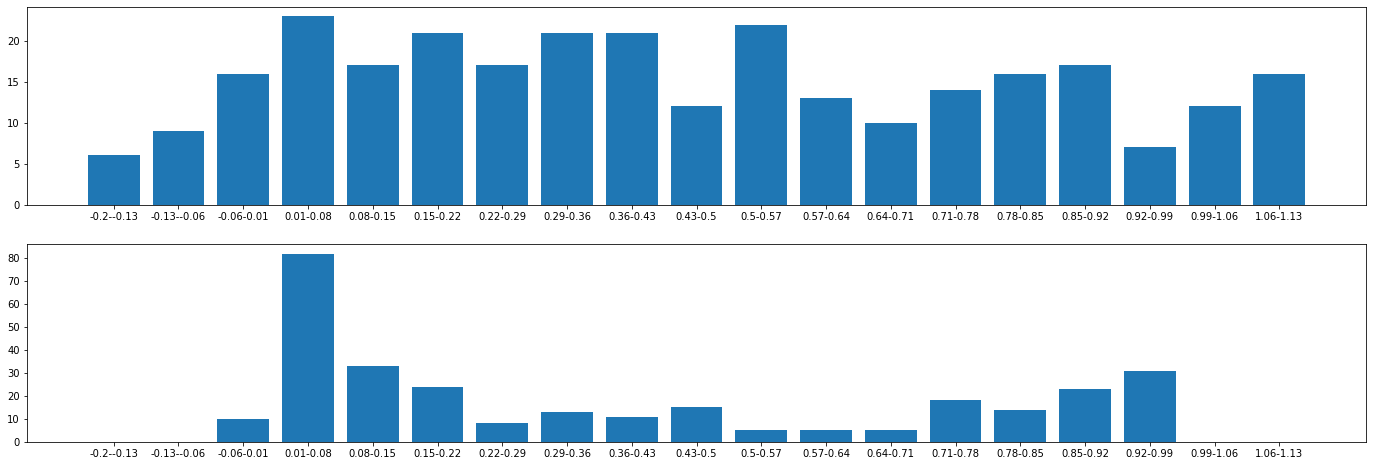

In [ ]:
import warnings
warnings.filterwarnings('ignore')
first_model = X_encoded[features1] @ scores1 + average1 * np.ones_like(y)
second_model = log_model1
y_low, y_high, y_step ,edge= -0.2,1.1,0.07,0.5

temp = [first_model[(first_model > i) & (first_model < i + y_step)].count() for i in np.arange(y_low,y_high,y_step)]
fig1 = plt.figure(figsize=(24,8))
ax1 = fig1.add_subplot(211)

plt.bar([np.str(round(i,2)) + "-" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,label='first_model')

temp = [second_model[(second_model > i) & (second_model < i + y_step)].count() for i in np.arange(y_low,y_high,y_step)]
ax2 = fig1.add_subplot(212)
plt.bar([np.str(round(i,2)) + "-" + np.str(round(i+y_step,2)) for i in np.arange(y_low,y_high,y_step)],temp,label='second_model')

plt.show()
warnings.resetwarnings()


model_1 really is a Least Squares model and log_model_1 really is logistic model!

It's very easy to know what the slope is of the log_model_1. It's 1. So any improvement made to it in delta_accuracy will be the same improvement to the confidence of our model! That is really great! It is still important where the improvements are made but at least we don't need to worry about if the delta_accuracy comes from 0.8-1.0 and having no effect. It will still have the same effect when it comes to the confidence in our model!